# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [1]:
import pandas as pd
!pip install pysentimiento
from pysentimiento import create_analyzer #
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 43.9 MB/s eta 0:00:00


## Variables globales

In [3]:
DATASETS_NAME = {
    'MISOCORPUS_2020_TRAIN': 'misocorpus2020_train.csv',
    'MISOCORPUS_2020_VAL': 'misocorpus2020_val.csv',
    'MISOCORPUS_2020_TEST': 'misocorpus2020_test.csv',
}

DATASETS_DELIMITERS = {
    'MISOCORPUS_2020': ',',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### MISOCORPUS 2020

In [4]:
df_misocorpus_train = pd.read_csv ( DATASETS_NAME['MISOCORPUS_2020_TRAIN'],
        skiprows=1,
        header=None,
        names = ["tweet", "label"],
        delimiter=DATASETS_DELIMITERS['MISOCORPUS_2020'])

----------------------------

## Sentiment Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [5]:
df_misocorpus_train.head()

tweet  label
0                  @twominbae cállate puta      1
1                    @Josumovic Puta Greta      1
2  @monasterioR @julia_otero Eres patética      1
3             @GretaThunberg Loca del coño      1
4                     @GretaThunberg cerda      1

In [6]:
sentiment_analyzer = create_analyzer("sentiment", lang="es")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [7]:
#Ejemplo de la documentacion
sentiment_analyzer.predict("Qué gran jugador es Messi")

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [8]:
def analyze_sentiment(text):
    result = sentiment_analyzer.predict(text.lower())
    sentiment = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Sentimiento detectado: {sentiment}")
    print(f"Probabilidades: {probabilities}")

    return sentiment, probabilities, text

In [9]:
text_data = df_misocorpus_train['tweet'].tolist()
results = [analyze_sentiment(text) for text in tqdm(text_data)]

  0%|          | 3/5034 [00:00<03:46, 22.23it/s]


-----------------------
Texto analizado: @twominbae cállate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7170911431312561, 'NEU': 0.19314627349376678, 'POS': 0.08976265043020248}

-----------------------
Texto analizado: @Josumovic Puta Greta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8340848088264465, 'NEU': 0.09842982143163681, 'POS': 0.06748536974191666}

-----------------------
Texto analizado: @monasterioR @julia_otero Eres patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9568045735359192, 'NEU': 0.030398527160286903, 'POS': 0.01279680710285902}

-----------------------
Texto analizado: @GretaThunberg Loca del coño
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7464326024055481, 'NEU': 0.18224261701107025, 'POS': 0.07132482528686523}

-----------------------
Texto analizado: @GretaThunberg cerda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7886508703231812, 'NEU': 0.14444740116596222, 'POS': 0.06690177321434021}

-----------------

  0%|          | 12/5034 [00:00<02:45, 30.33it/s]


-----------------------
Texto analizado: @LaFallaras Deja el alcohol cerda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7023869752883911, 'NEU': 0.23293952643871307, 'POS': 0.06467345356941223}

-----------------------
Texto analizado: @AdaColau HIJA DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8186036944389343, 'NEU': 0.11560125648975372, 'POS': 0.06579506397247314}

-----------------------
Texto analizado: @Cannabianol Greta puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7692148089408875, 'NEU': 0.13378596305847168, 'POS': 0.09699922800064087}

-----------------------
Texto analizado: Ojalá las feminazis no me den palo por subir este video ??????????? #dolar http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7047321200370789, 'NEU': 0.267249196767807, 'POS': 0.028018712997436523}

-----------------------
Texto analizado: feminismo=igualdad de hombres y mujeres. feminazi=mujeres que se creen superiores a los hombres. a ver si algún dí

  0%|          | 22/5034 [00:00<02:05, 39.97it/s]


-----------------------
Texto analizado: @LaFallaras Payasa háztelo mirar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8893329501152039, 'NEU': 0.07806739211082458, 'POS': 0.03259965404868126}

-----------------------
Texto analizado: esta es la loca que se la da de feminazi y al final el marido parece ser que es un violador o abusador http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9444366097450256, 'NEU': 0.04934275150299072, 'POS': 0.006220563780516386}

-----------------------
Texto analizado: Las feminazis del siglo XXI. Cualquier pendejada les parece una ofensa terrible: http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694560170173645, 'NEU': 0.023817256093025208, 'POS': 0.006726798135787249}

-----------------------
Texto analizado: @VauquitaS Me ha pasado lo mismo. Lo sigo haciendo y seguiré, es mi manera de saber si es una MUJER o una feminazi resentida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5144064426422119, 'NEU': 0

  1%|          | 33/5034 [00:00<01:51, 45.02it/s]


-----------------------
Texto analizado: Lo de feminazi es discutible porque si hay feministas que lo son, por ejemplo, el caso del hombre viejo y ciego entrando por error al vagón de solo mujeres en México. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8195391297340393, 'NEU': 0.1588025987148285, 'POS': 0.02165825106203556}

-----------------------
Texto analizado: @negromangueraa @Ironmanmark851 Los vídeos de las feminazis en pelotas algo ladillisimoooo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942375123500824, 'NEU': 0.04737093672156334, 'POS': 0.010253958404064178}

-----------------------
Texto analizado: @eluniversocom Quien es capaz de piropiar a las feminazis. Eso si es ser puerco. Además en la hinchada barcelonista también hay mujeres. Estas feminazis son ridículas, ahora generalizando a la hinchada de un club deportivo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9712872505187988, 'NEU': 0.02260426990687847, 'POS': 0.006108475849032402

  1%|          | 44/5034 [00:01<01:42, 48.76it/s]


-----------------------
Texto analizado: @aracelidiputada @feminisciencia @fraoneto @MujeresSanas @CeltiusAbogados Y vos sos una feminazi mal cogida que quiere matar bebes porque no quiere que otras mujeres sean madres, mucha sororidad pero las verdes como vos le desean la muerte a las pañuelos celestes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571042060852051, 'NEU': 0.03452600911259651, 'POS': 0.008369705639779568}

-----------------------
Texto analizado: @ZuluagaCamila Porque sera que las feminazis son tan feas . sera que compensan eso con al estupidez.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9196120500564575, 'NEU': 0.07248709350824356, 'POS': 0.007900930941104889}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres una perra mala....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9479405879974365, 'NEU': 0.037104297429323196, 'POS': 0.01495505589991808}

-----------------------
Texto analizado: @LaReinaDeNarnia Es qu

  1%|          | 50/5034 [00:01<01:39, 49.92it/s]


-----------------------
Texto analizado: Para todas ustedes feminazis ridículas hijas de puta. pendejas ! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9113143086433411, 'NEU': 0.061976104974746704, 'POS': 0.026709651574492455}

-----------------------
Texto analizado: Cada día vuelvo a ver otro video de las feminazis! Como son tan ridículas y locas vale! La gente pasa pena sola...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9642460346221924, 'NEU': 0.030246788635849953, 'POS': 0.005507119931280613}

-----------------------
Texto analizado: Feminazi enferma, que el infeliz ese ponga primera y arranque,ya sabe lo que le espera http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483187794685364, 'NEU': 0.04136081039905548, 'POS': 0.010320378467440605}

-----------------------
Texto analizado: La primera parada de transporte público equipada con cristales anti feminazis. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12352955

  1%|          | 62/5034 [00:01<01:42, 48.72it/s]


-----------------------
Texto analizado: @LaReinaDeNarnia Pero las feminazis ni un tweet para el extorsionandor de tweeter
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9062936902046204, 'NEU': 0.07784578204154968, 'POS': 0.01586051471531391}

-----------------------
Texto analizado: Qué tiro con las feminazis las matamos o qué???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8311858177185059, 'NEU': 0.15482720732688904, 'POS': 0.013987096026539803}

-----------------------
Texto analizado: HORROOOOOOR está casi calato con su gorro de policía y su diploma tapando su órgano genital. Ayyy y sus tetillas, quémenlo como a las feminazis que se quitan el brasier para protestar. #Sarcasm Pd. Doble moral everywhere http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9663651585578918, 'NEU': 0.028209658339619637, 'POS': 0.005425166804343462}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Hola Sra. patética .. IGUALDAD ¿ sabe lo que si

  1%|▏         | 75/5034 [00:01<01:28, 55.93it/s]


-----------------------
Texto analizado: Soñe que me linchaban 1.000 feminazis jaja Lo hermoso fue haberlas hechos enojar??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5767430663108826, 'NEU': 0.2573010325431824, 'POS': 0.16595588624477386}

-----------------------
Texto analizado: @cayetanaAT Patetica.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9162740707397461, 'NEU': 0.05702570825815201, 'POS': 0.026700222864747047}

-----------------------
Texto analizado: Asi fue como la niña se volvio feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8290643095970154, 'NEU': 0.1498326063156128, 'POS': 0.021103087812662125}

-----------------------
Texto analizado: @salartesoro No soy anti lgtb...no me molestan...ni me preocupan, son menos peligrosos que las extremistas feminazis y aborteras.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7745441794395447, 'NEU': 0.18905115127563477, 'POS': 0.03640465438365936}

-----------------------
Texto anali

  2%|▏         | 87/5034 [00:01<01:35, 51.86it/s]


-----------------------
Texto analizado: Después dicen los feminazis que el patriarcado no sirve. Un padre muere en el incendio cuando intento salvar a su hijos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9615410566329956, 'NEU': 0.03257540985941887, 'POS': 0.005883614532649517}

-----------------------
Texto analizado: Hostia, no lo sabía. Que gustito me ha dado ver esto ???. Un bloqueo de feminazi al día evita la avería. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08883418142795563, 'NEU': 0.18273518979549408, 'POS': 0.7284306883811951}

-----------------------
Texto analizado: @xeanort99 Sí, y que la menor se invente lo que quiera para condenarles a 38 años de cárcel, todo ok también. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16134782135486603, 'NEU': 0.6537192463874817, 'POS': 0.1849328577518463}

-----------------------
Texto analizado: @Alvisepf Vamos, femilocas, que lo del #Arandina se queda corto con esto.
Se

  2%|▏         | 93/5034 [00:02<01:49, 45.06it/s]


-----------------------
Texto analizado: @corbynbb_ @mendezdecadario @engelnava @mujerescreando1 @AgustinLaje @NickyMarquez1 Y en cuanto al aborto es criminal que digas que el feto ni siente, tú sabías q antes de las 3 semanas ya tiene corazón? Las FEMINAZI piden aborto sin límite de Edad Gestacional!!! Y para eso también aplican vandalismo q es lo único que saben hacer http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9011141061782837, 'NEU': 0.08783651143312454, 'POS': 0.011049432680010796}

-----------------------
Texto analizado: Vamos a dejar que la envidia feminazi llegue a Venezuela a quejarse de todo? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9413049817085266, 'NEU': 0.05421360582113266, 'POS': 0.004481385927647352}

-----------------------
Texto analizado: @carlosdanoz @vox_es El feminismo no es justicia. Y lo que ha ocurrido con la sentencia de arandina es feminismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9402197003364563

  2%|▏         | 103/5034 [00:02<02:01, 40.59it/s]


-----------------------
Texto analizado: @al99ba18 Cuidado Alba, que pueden ser violadas por los gallos y como se enteren las feminazis, te la lian parda...jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6981911659240723, 'NEU': 0.2510792911052704, 'POS': 0.05072946846485138}

-----------------------
Texto analizado: Cállate puta y chúpame el orto marico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7456352114677429, 'NEU': 0.1788145899772644, 'POS': 0.07555021345615387}

-----------------------
Texto analizado: @PATRICIOACHURRA @mvacarezza Este pato debe tener telas de arañas en la cabeza, donde están las feminazis? Ah deveras que es del mismo equipo no lo van a tocar #cinicas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801375269889832, 'NEU': 0.015882475301623344, 'POS': 0.003979950677603483}

-----------------------
Texto analizado: Alguna feminazi te contó esto? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3739774227142334, 'NEU'

  2%|▏         | 113/5034 [00:02<02:01, 40.50it/s]


-----------------------
Texto analizado: Al parecer para las feminazis hay diferentes tipos de libertad de expresión. Según entiendo está la de ellas que es absoluta y la del resto que no piensa como ellas que no debería existir porque las ofende. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8422666788101196, 'NEU': 0.14649266004562378, 'POS': 0.011240621097385883}

-----------------------
Texto analizado: Ya es probable que tengas 18 @GretaThunberg ¿QUÉ ES ESTA MIERDA? VOY EN CAMISETA Y CHUPA DE CUERO POR LA CALLE, BITCH. EN PUTO FEBRERO. ¿PARA QUÉ TE PAGAN LOS QUE MANTENÍAN A ALBERT RIVERA, GOLFA? TU MENSAJE LE SUDA EL COÑO AL CLIMA, Y YO TE COMPRÉ LOTERÍA, PERRA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700765609741211, 'NEU': 0.025484947487711906, 'POS': 0.0044384608045220375}

-----------------------
Texto analizado: @SoniaVivasRive3 @msikusimakusi Pues haz como las feminazis, ponte un lacito, denuncia al Rey y hazte súbdita del mayordomo del cha

  2%|▏         | 118/5034 [00:02<01:55, 42.42it/s]


-----------------------
Texto analizado: @emartineztv Otra palabras más para el diccionario de palabras ofensivas a las feminazi.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8538808226585388, 'NEU': 0.1314290463924408, 'POS': 0.01469010766595602}

-----------------------
Texto analizado: Quieren imponer la jerga feminazi. Carmen Calvo insiste y la RAE aborda el lenguaje inclusivo en la Constitución http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8204222321510315, 'NEU': 0.16133785247802734, 'POS': 0.018240004777908325}

-----------------------
Texto analizado: Mientras las feminazis juzgan Twitter hace su magia http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31251126527786255, 'NEU': 0.5178767442703247, 'POS': 0.16961202025413513}

-----------------------
Texto analizado: @Vynylplayer LAS FEMINAZIS MANDAN A DECIR QUE LA AGRESORA ESTABA POSEÍDA POR UN MACHO.....???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8639698624610901, 'NEU':

  3%|▎         | 128/5034 [00:02<02:12, 36.95it/s]


-----------------------
Texto analizado: La niña rata Greta Thunberg registra su nombre como marca comercial http://t.co/ vía @MediterraneoDGT Menudas piezas,ella y sus padres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.938792884349823, 'NEU': 0.049778684973716736, 'POS': 0.011428381316363811}

-----------------------
Texto analizado: @PaulinaSofiaTO Que actitud tan feminazi, pensé que éramos iguales ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9413004517555237, 'NEU': 0.04867663234472275, 'POS': 0.010022900998592377}

-----------------------
Texto analizado: @FelyArianna @laSextaTV Seguro que ella lo provocó, el no la obligó, le pidió y ella hizo. #arandina #votavox
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09150148928165436, 'NEU': 0.8027869462966919, 'POS': 0.10571155697107315}

-----------------------
Texto analizado: En el caso del Arandina a cada acusado le ha caído una condena por lo que ha hecho él más otras 2 por lo que han hecho los demás. Si m

  3%|▎         | 138/5034 [00:03<02:02, 39.87it/s]


-----------------------
Texto analizado: Feminazis ni que hijueputas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.691902220249176, 'NEU': 0.20864808559417725, 'POS': 0.09944964945316315}

-----------------------
Texto analizado: @Flunitrazepam37 @reginaphalang8 @UninorteCO Feminazis en potencia. Esa carrera las vuelve así conozco muchas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7133248448371887, 'NEU': 0.2409098893404007, 'POS': 0.04576527699828148}

-----------------------
Texto analizado: La Greta Thunberg vino en un Renfe Intercity, como sabe la cabrona de trenes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6765230298042297, 'NEU': 0.2999309003353119, 'POS': 0.023546138778328896}

-----------------------
Texto analizado: @LaFallaras A ver si crees que solo los progres podéis comer marisco patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9355307817459106, 'NEU': 0.05008816719055176, 'POS': 0.01438095886260271}

-----------------------
Texto a

  3%|▎         | 148/5034 [00:03<01:54, 42.82it/s]


-----------------------
Texto analizado: QUE DICEN AHORA LAS FEMINAZIS. QUE POR SER MUJER NO ES CORRUPTA????? @CynthiaViteri6 @alcaldiagye http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7824273109436035, 'NEU': 0.18603435158729553, 'POS': 0.031538330018520355}

-----------------------
Texto analizado: @presidenciaperu @MartinVizcarraC @MimpPeru @pcmperu Esas asquerosas feminazis de m...da, ya llegaron al Perú con esa asquerosa moda del pañuelo verde.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948593020439148, 'NEU': 0.04079002887010574, 'POS': 0.01061692088842392}

-----------------------
Texto analizado: @Isabelita123f Después no te estés quejando como las feminazis!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6038481593132019, 'NEU': 0.3248167037963867, 'POS': 0.07133512943983078}

-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @publico_es Eso corre loca que se os acaba el chiringuito
Sentimiento detectado: NEG
Probab

  3%|▎         | 153/5034 [00:03<02:20, 34.68it/s]


-----------------------
Texto analizado: @LaFallaras No me sorprende que el alcohol la haya hecho convertirse en borracha, toxicomana, puta, loca y ladrona Uf, se te va a ir la vida y la pasta en terapias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760269522666931, 'NEU': 0.02023698203265667, 'POS': 0.0037360789719969034}

-----------------------
Texto analizado: Lo unico peor que una feminazi es otra feminazi progre y guatona.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9440037608146667, 'NEU': 0.04554738849401474, 'POS': 0.010448914021253586}

-----------------------
Texto analizado: @drummniatico Es que es amiguis de la mayor incitadora al odio...la mayor feminazi...silvita buenanoche!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9023188948631287, 'NEU': 0.07791344821453094, 'POS': 0.019767580553889275}

-----------------------
Texto analizado: @_SantinoBoy @pampitaoficial Es acoso por qué no le conoces y si le dices preciosa o hermosa es un delito .... a

  3%|▎         | 157/5034 [00:03<02:35, 31.30it/s]


-----------------------
Texto analizado: Bonito expresar una opinión sin ser ofendido por ¡#twitter, #Feminazis, #politicos, #23Dic, #twitternoesreddeodio ! Triste leer comentarios sobre twits que no gustan y acosar al que expreso su idea, muy triste. Seamos mas gente y menos ofensivos ?. Comprensión por favor ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8595482110977173, 'NEU': 0.13008981943130493, 'POS': 0.010361991822719574}

-----------------------
Texto analizado: Es su gran oportunidad Masistas y Feminazis de unirse en Mordor! ? ? ? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3755972683429718, 'NEU': 0.4989766478538513, 'POS': 0.12542599439620972}

-----------------------
Texto analizado: Los hombres que defendéis la sentencia del arandina sois gilipollas, esta sentencia creará un precedente donde la palabra de la mujer es ley panda de indigentes mentales, que no os dais cuenta del peligro que corréis!
Sentimiento detectado: NEG
Probabilidades: {'

  3%|▎         | 165/5034 [00:04<02:43, 29.82it/s]


-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu 38 años de cárcel a los chavales del Arandina por las mentiras de una Lolita.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7223021388053894, 'NEU': 0.2357264757156372, 'POS': 0.041971396654844284}

-----------------------
Texto analizado: @mariodaniel712 @_CarlieYo Las que son mamonas son las feminazis y las politiquillas. Cuando enseñan más el corazón y el día a día no se sienten superiores, son más relax y no andan con cosas. Por eso sigo a gente como @_CarlieYo, tienen los pies sobre la tierra, aunque a veces jueguen a qué no ?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22231662273406982, 'NEU': 0.20103618502616882, 'POS': 0.576647162437439}

-----------------------
Texto analizado: @lafm Se van a enputar las feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8553087115287781, 'NEU': 0.10745447874069214, 'POS': 0.0372367687523365}

-----------------------
Texto analizado: - La niña m

  3%|▎         | 169/5034 [00:04<03:56, 20.56it/s]


-----------------------
Texto analizado: @eliana_valera @larepublica_pe Más miedo me daría tener un pariente como tú, por lo limitada mental que eres. Los dementes seniles son dignos de compasión, sólo la psicosis feminazi se espanta y califica sin considerar que este sujeto está claramente enfermo mental y por lo tanto según la ley es inimputable.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9782654047012329, 'NEU': 0.017044197767972946, 'POS': 0.004690358880907297}

-----------------------
Texto analizado: La pibita Greta ahora está en Davos. Me llama la atencion que el maximo exponente del cambio climatico no sean los famosos cientificos sino una pendeja de 16 años que apenas sabe hablar ingles.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9309499859809875, 'NEU': 0.06041290983557701, 'POS': 0.008637071587145329}

-----------------------
Texto analizado: las feminazis cada día están más locas. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9202981

  3%|▎         | 175/5034 [00:04<04:44, 17.09it/s]


-----------------------
Texto analizado: Los #hombres estamos sufriendo una caza de brujas #arandina #discriminaciondegenero #casoarandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.795386791229248, 'NEU': 0.1953457146883011, 'POS': 0.009267452172935009}

-----------------------
Texto analizado: Una féminazi ver a ver esto y se le va a salir un ojo ?? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8649898767471313, 'NEU': 0.12344103306531906, 'POS': 0.011569054797291756}

-----------------------
Texto analizado: @HelenaTunon @annapratx Que frágil tenés que ser para volverte una feminazi resentida con todos los hombres por una mala experiencia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776315093040466, 'NEU': 0.0182885080575943, 'POS': 0.004080052021890879}

-----------------------
Texto analizado: @pametroya @AndreaRivera_V Eres feminazi de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.957588791847229, 'NEU': 0.0292841

  4%|▎         | 181/5034 [00:05<04:01, 20.13it/s]


-----------------------
Texto analizado: @shittthing callate puta y chupa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8054262399673462, 'NEU': 0.1437649130821228, 'POS': 0.05080888420343399}

-----------------------
Texto analizado: @carthografo Gestionado por INDRA ???. ¿Qué coño tendrán q votar los españoles sobre la voluntad de los catalanes a independizarse? ¿ Acaso tiene q votar toda la familia cuando un miembro de la pareja se quiere divorciar? Como antiguamente: ¡Ni separación ni ostias y ponte a fregar, mujer!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9390556812286377, 'NEU': 0.05695508420467377, 'POS': 0.00398925319314003}

-----------------------
Texto analizado: @httpfranciscohe @FabianSanabriaS @ElJuliSastoque Jajajajaja se me vienen las féminazis?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20095515251159668, 'NEU': 0.6984503269195557, 'POS': 0.10059444606304169}

-----------------------
Texto analizado: En #Miraflores un distrito de clase med

  4%|▎         | 184/5034 [00:05<04:21, 18.58it/s]


-----------------------
Texto analizado: Sera que las feminazis celebran el nacimiento del hijo de Dios...? Digo por eso de estar de acuerdo en el aborto ? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.44777220487594604, 'NEU': 0.5140645503997803, 'POS': 0.03816322237253189}

-----------------------
Texto analizado: Feminismo = Feminazis = Mongolicas!!!! Todes??? Por favor!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8747427463531494, 'NEU': 0.11031144857406616, 'POS': 0.01494576409459114}

-----------------------
Texto analizado: Las feminazis quieren por poco que este chico vaya preso por su humor negro, porque eso es violencia y no libre expresión. Una diputada provincial amenaza físicamente a un persona en concreto, y eso no es violencia si no libertad de expresión. Hay confusión de conceptos http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9604716897010803, 'NEU': 0.03480764105916023, 'POS': 0.004720661789178848}

----------------

  4%|▍         | 190/5034 [00:05<03:38, 22.12it/s]


-----------------------
Texto analizado: @plaqueta @alereyes_c @kikijp3 @casamoradaEC @mariafernandamp @caathytorres Barcelona termina con tu grupito feminazi ..te metiste co lo que no debías meterte pendeja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9201645255088806, 'NEU': 0.06564861536026001, 'POS': 0.014186770655214787}

-----------------------
Texto analizado: @Stef_rodri Falta de respeto total para autoridades, compañeros, familares e invitados Feminazis = desubicadas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9681398868560791, 'NEU': 0.02438041940331459, 'POS': 0.007479638792574406}

-----------------------
Texto analizado: Los comunistas y las feminazis son complices de los asesinos islamicos. Silencio de Europa ante la condena a 55 años de cárcel de tres activistas iraníes por negarse a llevar velo http://t.co/ vía @publico_es
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9284006953239441, 'NEU': 0.05825521796941757, 'POS': 0.013344117440283298}

--

  4%|▍         | 197/5034 [00:05<03:05, 26.12it/s]


-----------------------
Texto analizado: Esta es una bruja sin escrúpulos, cuando una lesbiana mata a su compañera ella dice que lo hizo por que reproduce conductas machistas. No acabas de entender que el asesino es asesino sin importar su género #Feminazi #silvita http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9581089615821838, 'NEU': 0.03397660702466965, 'POS': 0.007914434187114239}

-----------------------
Texto analizado: @Sharon_moreno1 Jajaja cállate puta ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.42210447788238525, 'NEU': 0.502358615398407, 'POS': 0.07553688436746597}

-----------------------
Texto analizado: @NOmasCNE Si Madonna le pega un puñetazo a un hombre porque le jala el brazo esta bien porque es un acosador sexual. No importa cuando leas esto, siempre tendrás la culpa si eres hombre para los feminazi.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9489009380340576, 'NEU': 0.04166605323553085, 'POS': 0.009432964958250523}

----------

  4%|▍         | 203/5034 [00:05<03:05, 26.00it/s]


-----------------------
Texto analizado: @CostaGino Cinico, hipócrita, los izquierdistas como tu apoyan a las Feminazis, que odian a los hombres y al estado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970533549785614, 'NEU': 0.01839723065495491, 'POS': 0.011069136671721935}

-----------------------
Texto analizado: @Jacobo7elbobo @NacionDigital2 Y la Reinona estafadora millonaria de Greta Thumberg no dice nada no insulta a los moritos, menuda perra amastinada estafadora, que asco de niñata, ladra ahora Princesa Verde ECOLOGreta...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9685651063919067, 'NEU': 0.02449033036828041, 'POS': 0.006944602821022272}

-----------------------
Texto analizado: No todas las lesbianas odian a los hombres, me consta, las que odian a los hombres son solo las feminazis, que son un grupito minúsculo (pero ruidoso lamentablemente), a ese grupito hay que arriconarlas hasta meterlas en un galpón, cerrarlo con llave y luego quemarlo.
Sentimiento de

  4%|▍         | 208/5034 [00:06<02:37, 30.70it/s]


-----------------------
Texto analizado: @LaFallaras Payasa, das por sentada la violación, cuando se desmienta todo, que harás, pedirás perdón dejaras de cobrar y expulsar basura por tu cloaca???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9199226498603821, 'NEU': 0.06895963102579117, 'POS': 0.011117792688310146}

-----------------------
Texto analizado: @cutmyevans YA HABÍA MUERTO DAMI CÁLLATE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8770594596862793, 'NEU': 0.10295598208904266, 'POS': 0.019984541460871696}

-----------------------
Texto analizado: @luciano_hang Greta idiota
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7880116105079651, 'NEU': 0.15316882729530334, 'POS': 0.058819565922021866}

-----------------------
Texto analizado: @carlitacz ahora censuras a las personas x ser hombres! Jajajaja sos patética. Tenían razón "se va a caer" si el feminismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9577862620353699, 'NEU': 0.0322923325002193

  4%|▍         | 217/5034 [00:06<02:27, 32.70it/s]


-----------------------
Texto analizado: Ésto demuestra claramente que la "feminazi" es otra y si existen, acá está ???????? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6673188805580139, 'NEU': 0.3063303530216217, 'POS': 0.026350783184170723}

-----------------------
Texto analizado: @BatGirl_2019 ESTA BIEN, PORQUE LA GRETA ES UN PICHÓN DE FEMINAZI , CON TODO LO QUE SIGNIFICA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8515576720237732, 'NEU': 0.12689556181430817, 'POS': 0.021546803414821625}

-----------------------
Texto analizado: @CaudiaAngelica @hurgamemoriaPE @Solidaridad_PSN Lo que sale al aire es el engaño, el descaro, el caradurismo de un vago mantenido, un admirador de terrucos y un banda de feminazis y trolls de género. A no dejarse engañar por estos vendedores de sebo de culebra, a decirle no al partido morado, por embaucadores.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9443676471710205, 'NEU': 0.04709466174244881, 'POS': 0.0085377

  4%|▍         | 225/5034 [00:06<02:21, 33.89it/s]


-----------------------
Texto analizado: SE ACABA EL COP25, MENOS MAL. RESUMEN PARA DUMMIES: VINA-GRETA Thunberg, un producto de marketing para gilipollas. Efectivamente, la pequeña revolucionaria del clima es un timo. Resulta que zarpa desde Virginia... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9291857481002808, 'NEU': 0.06394320726394653, 'POS': 0.006871061399579048}

-----------------------
Texto analizado: Voy hacer tutoriales para enseñarle a las que quieran saber como bañar a un bebé, como hacer el biberon, como ponerle un pañal y como hacer arroz carne y frijoles. Guachito de pollo con culantro y contar los 3 centavos Porque con la generacion "feminazi" Sálvese quien pueda.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08488480746746063, 'NEU': 0.7944403290748596, 'POS': 0.12067492306232452}

-----------------------
Texto analizado: Feliz año nuevo a todos, excepto a los zurdos, a las feminazis, a los politicos ladrones y a los que no usan direcci

  5%|▍         | 233/5034 [00:06<02:18, 34.72it/s]


-----------------------
Texto analizado: Jajajajajajaja ya no son feminazis ahora son femitrolas http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6404189467430115, 'NEU': 0.27253836393356323, 'POS': 0.08704270422458649}

-----------------------
Texto analizado: @liatrueba La comunidad LBGT...... tiene dentro de sus filas a mucha gente que le hace daño en su lucha, porque mezclan cosas, lo mismo ocurre con las feminazis que para ellas todos somos violadores, machistas y retrógrados.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97977614402771, 'NEU': 0.017126597464084625, 'POS': 0.003097252454608679}

-----------------------
Texto analizado: Así es!. Por ejemplo, ud es preciosa mi estimada exEscoria. Yo te veo en la calle y te lanzo tu piropito, así se cabree mi esposa jaja. Estot convencido que la feminazi a quién le cabrea que le digan preciosa tiene una razón de peso diferente al irrespeto que reclama. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {

  5%|▍         | 243/5034 [00:07<01:57, 40.87it/s]


-----------------------
Texto analizado: Que sea por meritocracia. No por tener un sexo u otro. #Feministas #Feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4964469373226166, 'NEU': 0.4549402594566345, 'POS': 0.04861273616552353}

-----------------------
Texto analizado: @sheepols @ctxt_es A fregar a tu casa, ¿ verdad mujer liberal y libre?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1765821874141693, 'NEU': 0.5376242399215698, 'POS': 0.2857935428619385}

-----------------------
Texto analizado: Su palabra por delante Señora ??? asquerosidad #Feminazi #feminismo #Feministas #feminist #ElVioladorEnTuCamino #ElVioladorErasTu http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8288659453392029, 'NEU': 0.15664242208003998, 'POS': 0.014491675421595573}

-----------------------
Texto analizado: @leogarnier @ldacr Amigues su abuela! Edúquese un poquito con la RAE. A no ser que piense que es parte del “patriarcado” como dicen las feminazis...


  5%|▌         | 254/5034 [00:07<01:43, 46.16it/s]


-----------------------
Texto analizado: @AdaColau Querría veros igual de rápido multando Okupas, payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7786217927932739, 'NEU': 0.17664462327957153, 'POS': 0.04473355412483215}

-----------------------
Texto analizado: @Yarelis36210579 @jguaido Cállate puta defiendes lo indefendible ese cabron nos entrego y gente decerebrada como tú igual lo apoya pendeja, anda y le lo coges pero asegúrate que te lleve a dominicana o a Oslo y barbados en el próximo diálogo mmgva
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9487586617469788, 'NEU': 0.040517039597034454, 'POS': 0.010724280960857868}

-----------------------
Texto analizado: @DioCinicoXXX JAJAJAJJAJAJJAJAJA BRUJA FEMINAZI JAJAJJAJAJAJA Me encanta.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.040080565959215164, 'NEU': 0.17258936166763306, 'POS': 0.787330150604248}

-----------------------
Texto analizado: @Larrydimick @javifrance @davidsantosvlog No pierdas el tiempo

  5%|▌         | 265/5034 [00:07<01:36, 49.29it/s]


-----------------------
Texto analizado: @JUDITHBELANDRIA Jajaja ay Judy la feminazis no saben que es eso?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6800298690795898, 'NEU': 0.29429399967193604, 'POS': 0.025676041841506958}

-----------------------
Texto analizado: @unmatedecoca @Cerdubela2 Feminazi Galindo apoya al Zurdo Evo Morales .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8826802968978882, 'NEU': 0.09070766717195511, 'POS': 0.02661198005080223}

-----------------------
Texto analizado: @GretaThunberg where are you in the Austrálian ? Puta !
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36004629731178284, 'NEU': 0.5519723296165466, 'POS': 0.08798136562108994}

-----------------------
Texto analizado: @_aguitaecoco Cállate puta ramera tonta golfa puta tonta ramera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8934550285339355, 'NEU': 0.07914523035287857, 'POS': 0.02739977464079857}

-----------------------
Texto analizado: Pa ahí va @Evoluciona0

  5%|▌         | 276/5034 [00:07<01:35, 49.86it/s]


-----------------------
Texto analizado: Video gráfico de como se deben tratar a las feminazi violentistas #Peru #Chile #Argentina #FemiNazis http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4306313991546631, 'NEU': 0.5320360660552979, 'POS': 0.03733253479003906}

-----------------------
Texto analizado: @LaFallaras Tu lo que eres una loca histérica, sin ofender a los locos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5737785696983337, 'NEU': 0.32546061277389526, 'POS': 0.10076089203357697}

-----------------------
Texto analizado: Ay las feminazis si fuera al revés... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8170876502990723, 'NEU': 0.15280380845069885, 'POS': 0.0301086213439703}

-----------------------
Texto analizado: @susanadiaz Serás golfa.......
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5126230120658875, 'NEU': 0.39362236857414246, 'POS': 0.09375464171171188}

-----------------------
Texto analizado: @AnabelAlonso_of

  6%|▌         | 287/5034 [00:07<01:38, 48.17it/s]


-----------------------
Texto analizado: Y así comenzaron las primeras feminazis ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.829165518283844, 'NEU': 0.1557801365852356, 'POS': 0.015054379589855671}

-----------------------
Texto analizado: @gonzaperucarajo Conociendo la forma de vida de Higinio, dudo que él, te haya allanado. Seguro que las feminazis y sus ministerios aliados (mimp, minjus) y la Defensoría LGTB presionaron para quitarles presupuesto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8576788902282715, 'NEU': 0.13326294720172882, 'POS': 0.009058164432644844}

-----------------------
Texto analizado: @GretaThunberg tomar no cu puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7062623500823975, 'NEU': 0.13615573942661285, 'POS': 0.15758192539215088}

-----------------------
Texto analizado: Eso fue muy sonado, lo bien roja y feminazi también son características de ella. #AbreLosOjos http://t.co/
Sentimiento detectado: POS
Probabilidades:

  6%|▌         | 297/5034 [00:08<01:51, 42.65it/s]


-----------------------
Texto analizado: @MagalyTvLaFirme @atvpe mantenida de mierda.... en su caso las feminazis que dirán..?? igualdad de genero jaajaj chistosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8158192038536072, 'NEU': 0.1499829739332199, 'POS': 0.034197818487882614}

-----------------------
Texto analizado: @monasterioR Y además hija de zorra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8506873846054077, 'NEU': 0.11181093752384186, 'POS': 0.037501633167266846}

-----------------------
Texto analizado: @LaFallaras Firmo lo de "loca, sucia y borracha"
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39545318484306335, 'NEU': 0.5647833347320557, 'POS': 0.03976348415017128}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Se confirma!!!!! GOOOOOOOLLLLL EN LAS GAUNAS, GOOOOOOOLLLLL DE SERGIO RAMOS!!!!!!! QUÉ PATÉTICA ERES CHONI......, NI PERDER CON DIGNIDAD SABES
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9407002329826355,

  6%|▌         | 307/5034 [00:08<01:46, 44.27it/s]


-----------------------
Texto analizado: @realjuca #feminazis se alborotan x todo le afectan hasta por decirle buenos dias amiguita jajaja piensan que la quieren bacilar es x eso que para año nuevo voy a comprarme 2 monigotes de #Feminazis jajaja para quemar todo lo malo y con camareta torpedo chifladores....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8343350291252136, 'NEU': 0.1451728194952011, 'POS': 0.02049211412668228}

-----------------------
Texto analizado: @LaFallaras Ya está la puta jodida borracha esta?? a ti ni el coronavirus te entra porque se muere de lo alcoholizada que estás ?‍♂️?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.974245548248291, 'NEU': 0.021368486806750298, 'POS': 0.004385980777442455}

-----------------------
Texto analizado: @LaFallaras @iunida @ahorapodemos @perecampscampos PATETICA DESLENGUASA QUE TU TRABAJAS MUCHO. ANDA VETE PA TERUEL PATETICA MAL EDUCADA http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.93668258190155

  6%|▌         | 312/5034 [00:08<01:55, 40.86it/s]


-----------------------
Texto analizado: @nissulo26 @reygorila26 Javi, Greta Thunberg esta tan loca porque jugó a flower, fíjate si tiene mensaje.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1314851939678192, 'NEU': 0.7760464549064636, 'POS': 0.09246838092803955}

-----------------------
Texto analizado: @LaFallaras @__pbl Queda claro. Estás loca del C
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6455156207084656, 'NEU': 0.3173272907733917, 'POS': 0.037157077342271805}

-----------------------
Texto analizado: @LaFallaras TU SI QUE ERES COMICA Y PATETICA MUY PATETICA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9401819705963135, 'NEU': 0.04239540919661522, 'POS': 0.0174226276576519}

-----------------------
Texto analizado: @sse30611 pero las feminazis dicen lo contrario
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5824822187423706, 'NEU': 0.35294777154922485, 'POS': 0.06457003206014633}

-----------------------
Texto analizado: Hay una jeva intensa de

  6%|▋         | 323/5034 [00:08<02:02, 38.40it/s]


-----------------------
Texto analizado: @monasterioR Danme ganas de chorar lendo o que pon a filla de puta esta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9130551218986511, 'NEU': 0.06595784425735474, 'POS': 0.02098694257438183}

-----------------------
Texto analizado: Lindas las Feminazi cada vez más inteligentes... http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00995143223553896, 'NEU': 0.061245646327733994, 'POS': 0.9288029074668884}

-----------------------
Texto analizado: No sera por que debe pasar los 82 años Feminazi resentida. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6105457544326782, 'NEU': 0.3602543771266937, 'POS': 0.029199820011854172}

-----------------------
Texto analizado: @LaFallaras Por la edad que tiene señora,le hablaré con http://t.co/ usted tonta????se siente sola?no hay varón que se le acerque????por que no entiendo como puede ser tan patetica!!!conoce usted el cacharrito de moda????ale cómpreselo
Sentimie

  7%|▋         | 333/5034 [00:09<01:50, 42.66it/s]


-----------------------
Texto analizado: @feminista48 @EIHuevoNeraId @luminecter @emilioer @silviacarce @gatosentado @DrProChoice @ColdasiceV @ElianaCabrera9 @Vynylplayer @Thortur1 @santhros @fjsv1974 @DocLuis_Litardo @CriticalExtremo @AndrParamore @altamirano_maxi @JulietaSagnay @FlorYCafe1 @Astrea1014 @Geovyj @DrBanner50 @piipoo7 @lizbetlunar @CorteConstEcu @ippf @DejemosM @DURANFUERZA @YoSoyDiamante12 @yamnef @Lorenaegas1 @MajoMancino @lopervar Hijita NO hijita matar o asesinar no es mi estilo de vida ni satisfacción . Las feminazis sienten alegria y satisfacción al decirlo y pensar establecerlo . Es normal conducta psicopatía de su secta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6691814661026001, 'NEU': 0.29203689098358154, 'POS': 0.03878162428736687}

-----------------------
Texto analizado: @eluniversocom Por fin se pone en marcha esta idea que tuve y por lo cual muchas feminazis me juzgaron.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08099047094583511, 'NEU

  7%|▋         | 343/5034 [00:09<01:59, 39.38it/s]


-----------------------
Texto analizado: una feminazi deseandote la muerte parte 1000 http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9548692107200623, 'NEU': 0.038187794387340546, 'POS': 0.0069430191069841385}

-----------------------
Texto analizado: @LaFallaras Quedate con lo de loca y borracha?. Y lo de malfollada no creo, porque dudo que alguien quiera acostarse contigo siquiera?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7081865072250366, 'NEU': 0.28061363101005554, 'POS': 0.01119986455887556}

-----------------------
Texto analizado: @cayetanaAT Se ve que eres un invento porque no tienes ni puta idea de la derecha en españa. Te limitas a sembrar tormentas. Pero ya te vendrán las tempestades, ya. So fea.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979142427444458, 'NEU': 0.01570730470120907, 'POS': 0.005150234326720238}

-----------------------
Texto analizado: @LaFallaras Eres tu, y tu cara cerda!! Tranquila q estos no te tocan ni con un pal

  7%|▋         | 348/5034 [00:09<01:55, 40.60it/s]


-----------------------
Texto analizado: @mfigueres Entonces si se puede insultar a Zozulya, podemos llamarte puta a ti y mandarte a fregar, ¿no? Porque digo yo que si de censurar la violencia verbal se trata, o toda o ninguna.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8602544069290161, 'NEU': 0.1285891830921173, 'POS': 0.011156484484672546}

-----------------------
Texto analizado: @cayetanaAT @GPPopular @populares Anda, callate payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.642590343952179, 'NEU': 0.2722964584827423, 'POS': 0.08511324971914291}

-----------------------
Texto analizado: "Viva el patriarcado" "vuelve a la cocina" "feminazi :v" "el patriarcado ni se inmuta" "hazme un sandwich :vv" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5042290687561035, 'NEU': 0.4193167984485626, 'POS': 0.07645419985055923}

-----------------------
Texto analizado: Greta cabrona que tenes madera atrás. ¿Cuantos árboles se cortaron para hacer eso? http:

  7%|▋         | 359/5034 [00:09<01:44, 44.90it/s]


-----------------------
Texto analizado: Man ODIO a Greta Thundercat, anda a rendir las previas pedazo de europea hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9319572448730469, 'NEU': 0.05131775140762329, 'POS': 0.016724975779652596}

-----------------------
Texto analizado: @diariocorreo Y xq acá no salta ni una de esaa feminazis que no se las come ni el óxido???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8657580018043518, 'NEU': 0.12281140685081482, 'POS': 0.011430664919316769}

-----------------------
Texto analizado: Feminazis, trabajo sí hay. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21937036514282227, 'NEU': 0.5871791243553162, 'POS': 0.19345052540302277}

-----------------------
Texto analizado: @PeruanoComunica @MelissaPeschier @hectorbecerrilr Desde las Maravillosas "LINEAS de NAZCA". #Melissa es una Feminista o Lesbis o femiNAZI q' #asesinó a BECERRIL.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3837169706821441

  7%|▋         | 370/5034 [00:09<01:41, 46.00it/s]


-----------------------
Texto analizado: @InesArrimadas @carrizosacarlos @CiudadanosCs Yo creo que tienes futuro ... siendo lo payasa qué eres y los bufones qué te siguen ¡ EL CIRCO YA LO TIENES MONTADO CON 10 ACTORES DE RENOMBRE !!! ??? ¡ VIVA LOS QUE VENÍAN A REGENERAR LA POLÍTICA ?????? MENUDOS FASTASNAS ESTÁIS HECHOS !!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9514936804771423, 'NEU': 0.03787948936223984, 'POS': 0.010626878589391708}

-----------------------
Texto analizado: @Dator33 @realjuca @PoliciaEcuador Se imagina un "encuentro" entre Jorgito y una Feminazi? Eso tendría un final épico!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09353536367416382, 'NEU': 0.5008350610733032, 'POS': 0.4056295156478882}

-----------------------
Texto analizado: @locacomotumadre Jajaja así esta bien? Feminazi PELOTUDA? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8366214036941528, 'NEU': 0.14270655810832977, 'POS': 0.020672019571065903}

---------------

  8%|▊         | 381/5034 [00:10<01:40, 46.27it/s]


-----------------------
Texto analizado: @LuxAndLan Uy una feminazi ser de Luz que está convencida que todo lo que dice es cierto. Que no acepta críticas pero se cree con todo el derecho de críticar. Estas mas cercana al movimiento Nazi tu que yo. Saludos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6107141971588135, 'NEU': 0.24522610008716583, 'POS': 0.14405974745750427}

-----------------------
Texto analizado: Esperando que las feminazis saquen el éxito: "La asesina eres tú"... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6786981821060181, 'NEU': 0.27335304021835327, 'POS': 0.047948822379112244}

-----------------------
Texto analizado: @aleja_zv @CookieOfAvocado @DrBadalassi Vega tía feminazi, la que se mete y busca atención eres tú. ¿Andas necesitada? ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9430647492408752, 'NEU': 0.050686899572610855, 'POS': 0.00624832883477211}

-----------------------
Texto analizado: @LaFallaras @cuatroaldia Más b

  8%|▊         | 392/5034 [00:10<01:40, 46.17it/s]


-----------------------
Texto analizado: Este horrible hecho no deja de ser aprovechado por personas inescrupulosas llamadas comúnmente "feminazis". Siempre usan personas, sucesos y lo modifican a su antojo pero hoy les quedó mal y fue muy notoria su falta de escrúpulos y manipulación. Ojalá exista justicia esta vez http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9749715924263, 'NEU': 0.01959480531513691, 'POS': 0.005433602258563042}

-----------------------
Texto analizado: @jorgewireless @ricval2 Las pendejadas que hacen para ganar votos. Estos políticos son u a miseria. se allanan al teatro creado por feminazis y preparado con anticopacion. A donde va a para nuestra sociedad?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9758589863777161, 'NEU': 0.019427623599767685, 'POS': 0.00471340911462903}

-----------------------
Texto analizado: Woo..woo..Woo.? Detenme ese TREN #FEMINAZI de PREJUICIOS PENDEJOS q NO ayudan en NADA, sólo a hacer esta sociedad más en VE

  8%|▊         | 402/5034 [00:10<01:39, 46.33it/s]


-----------------------
Texto analizado: @LaFallaras Alfinal serás una loca mas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.687994658946991, 'NEU': 0.28423336148262024, 'POS': 0.027771979570388794}

-----------------------
Texto analizado: @LaFallaras @PeioHR Eres una cerda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9604353904724121, 'NEU': 0.02765006199479103, 'POS': 0.01191460620611906}

-----------------------
Texto analizado: @LaFallaras Anda mejor te callas que ayer estuviste como el culo en esa puta mierda de programa de la #FemiNazi @sonsolesonega al decir que los accidentes de tráfico tienen un trasfondo político. La culpa la tiene el PP ¿no? QUE TE ACUESTES!! (O mejor te bebes el perfume). http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9728457927703857, 'NEU': 0.022683851420879364, 'POS': 0.004470408894121647}

-----------------------
Texto analizado: Una feminazi "peleando" por sus izquierdos .....(a esto que "ella" hace no se le puede 

  8%|▊         | 412/5034 [00:10<01:44, 44.42it/s]


-----------------------
Texto analizado: Yo pidiéndole a mí hija feminazi que ayude con las cosas de la casa , ella contestandome ni en pedo!! Quema ese pañuelo Mabeeeeel ???? se va a caer cuando maten el machirulo que tienen adentro ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9479126334190369, 'NEU': 0.04517115280032158, 'POS': 0.006916219834238291}

-----------------------
Texto analizado: @josearamire El Papa como toda figura pública mundial tiene serías amenazas de muerte. Y si consideramos los atentados de las feminazis, su reacción es lo mas lógico del mundo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8361287713050842, 'NEU': 0.14472843706607819, 'POS': 0.019142882898449898}

-----------------------
Texto analizado: @LaFallaras VAYA PERRA AS COGIDO CHICA TE VA DAR ALGO Y TAMBIEN TE DIGO CANSINA CANSINA CANSINA http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9711299538612366, 'NEU': 0.02241523005068302, 'POS': 0.0064548533409833

  8%|▊         | 424/5034 [00:11<01:34, 48.93it/s]


-----------------------
Texto analizado: @elespectador Esta pregunta no es mas que otro atentado Feminazi".
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8965051174163818, 'NEU': 0.09363466501235962, 'POS': 0.009860248304903507}

-----------------------
Texto analizado: @NathyAlarcon1 @Vynylplayer La incoherencia estupida en la cual se manejan. Rayan en lo ridículo las feminazis.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742670655250549, 'NEU': 0.019240567460656166, 'POS': 0.006492319982498884}

-----------------------
Texto analizado: @LaFallaras Deja de drogarte estupida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8459517359733582, 'NEU': 0.128581702709198, 'POS': 0.025466585531830788}

-----------------------
Texto analizado: @LaFallaras No se puede ser más payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9453553557395935, 'NEU': 0.040926575660705566, 'POS': 0.0137180732563138}

-----------------------
Texto analizado: @LaFallaras Chanel 5 par

  9%|▊         | 429/5034 [00:11<01:35, 48.37it/s]


-----------------------
Texto analizado: @LaFallaras @elisabeni Otra ZORRA, que diga otra LOBBA. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4139379858970642, 'NEU': 0.5318083167076111, 'POS': 0.054253701120615005}

-----------------------
Texto analizado: @LaFallaras @elnacionalcat @ContadorAltsasu Parece mentira que pertenezcas a la raza humana, eres un trozo de carne putrefacta, un puto cancer. Tranquila! Caeras como todos los demas, CERDA!!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695985317230225, 'NEU': 0.02193361520767212, 'POS': 0.00846781861037016}

-----------------------
Texto analizado: @Adanyelparaiso @magdent09 Ahora los putitos sales en bola como las feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9108444452285767, 'NEU': 0.07744617760181427, 'POS': 0.01170935295522213}

-----------------------
Texto analizado: @noracheer1 @Khate85 Es que pierdo la paciencia con gente como tu, y es mas facil para mi, mandart

  9%|▊         | 440/5034 [00:11<01:38, 46.61it/s]


-----------------------
Texto analizado: @iNnFeR_HD @GretaThunberg Normal si es que es una perra esa que no va el colegio la muy fresca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8830248713493347, 'NEU': 0.09864527732133865, 'POS': 0.018329855054616928}

-----------------------
Texto analizado: @LaFallaras ¿Y a tí que te importa payasa?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.741000235080719, 'NEU': 0.2273479551076889, 'POS': 0.031651757657527924}

-----------------------
Texto analizado: @johanidl Feminazi tenía k ser
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7754262089729309, 'NEU': 0.17449969053268433, 'POS': 0.05007410794496536}

-----------------------
Texto analizado: @LaFallaras Eres patética, deja el alcohol y evítanos tus deliriums tremens.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9474173784255981, 'NEU': 0.041598040610551834, 'POS': 0.010984506458044052}

-----------------------
Texto analizado: @LaFallaras @populares @Ciudadanos

  9%|▉         | 453/5034 [00:11<01:27, 52.25it/s]


-----------------------
Texto analizado: @Eltalibanf Si es que tiene un gran corazón! Pero no sigamos magnificando las cualidades de este hermoso ejemplar porque pueden venir a reclamar las feminazis de tuirer ache ene
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.32122331857681274, 'NEU': 0.21819350123405457, 'POS': 0.4605831205844879}

-----------------------
Texto analizado: @susanadiaz Eres una payasa!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9522403478622437, 'NEU': 0.030906420201063156, 'POS': 0.016853278502821922}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres una payasa !!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9286456108093262, 'NEU': 0.04939468577504158, 'POS': 0.021959740668535233}

-----------------------
Texto analizado: @LaFallaras Perra judia, no creas que esta mieda de burbuja durará eternamente y no tengas duda de que a cada acción, habrá una reacción.
Sentimiento detectado: NEU
Probabilidades: {'

  9%|▉         | 465/5034 [00:11<01:25, 53.19it/s]


-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarezAlvarez @gabrielrufian @Pablo_Iglesias_ @agarzon La chivata de Fallaras está rabiosa por que nadie le hace caso, quiere su momento de gloria y pasan de ella como de la m***?, pobre infeliz ???? Puta Bida!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9678473472595215, 'NEU': 0.0264340341091156, 'POS': 0.005718626547604799}

-----------------------
Texto analizado: Hay una tuitera cuyo nombre no voy a decir por no hacerle 'famosa' a #Nubianaki, q se ha dado el lujo de estudiar en el extranjero y de ser una mantenida de mierda, a punta del esfuerzo de un ONVRE, su padre. Y aún así tiene el descaro de ser feminazi y quejarse del patriarcado.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9763843417167664, 'NEU': 0.019829077646136284, 'POS': 0.0037865876220166683}

-----------------------
Texto analizado

  9%|▉         | 477/5034 [00:12<01:22, 55.25it/s]


-----------------------
Texto analizado: una pregunta seria que se le puede regalar una feminazi que no se ofenda?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1880960613489151, 'NEU': 0.7777360081672668, 'POS': 0.034167852252721786}

-----------------------
Texto analizado: Este es el negocio atrás del aborto (? Las malditas aborteras venden a los bbs muertos a empresas. Feminazis horribles!!?????✊ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.935384213924408, 'NEU': 0.057576984167099, 'POS': 0.0070388708263635635}

-----------------------
Texto analizado: #OLISBITÁCORA --&gt; CUANDO LES CONVIENE HABLAN DE QUE SON UNA COMUNIDAD..... CUANDO LES CONVIENE HABLAN DE QUE REPRESENTAN A #ECUADOR . DECIDETE @jaimevargasnae ! p.s.: ahora las #feminazis te van a perseguir. #GUAYAQUIL #QUITO @CONAIE_Ecuador #CONAIE http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5174521207809448, 'NEU': 0.44934794306755066, 'POS': 0.0331999808549881}

--------------

 10%|▉         | 489/5034 [00:12<01:31, 49.79it/s]


-----------------------
Texto analizado: Las feminazis van con todo, solo falta que le busquen pelea a don armando a freddy y a daniel valencia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4868737459182739, 'NEU': 0.40351203083992004, 'POS': 0.10961420834064484}

-----------------------
Texto analizado: @agencialavieja Aca no te acompaño, queridísimo Cubrepileta. Si lo hubiese hecho el padre las gordas feminazis arrancarían palos, antorchas e irían a pedir su cabeza con alguna fiscal cabeza de tacho. Te mando un abrazo gigante, crack ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9108235836029053, 'NEU': 0.07677048444747925, 'POS': 0.01240586768835783}

-----------------------
Texto analizado: @isaac_babel Es una propuesta, seriamente desquiciada. Habría que tomarla en cuenta. A las feminazis les va a encantar.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13115166127681732, 'NEU': 0.40465325117111206, 'POS': 0.4641951024532318}

-------------------

 10%|▉         | 495/5034 [00:12<01:31, 49.80it/s]


-----------------------
Texto analizado: Nos va a tocar salirles a las feminazi a hacer Performance de familia... No soy violador!! América está despertando , el comunismo debe ser controlado. @elmonitosanchez @cesarcorredor10 @HassNassar http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8807850480079651, 'NEU': 0.10035725682973862, 'POS': 0.01885770447552204}

-----------------------
Texto analizado: @mouse_cl La oportunidad perfecta para las #Feministas #Feminazis #aborteras ya son feas torpes y verdes, no se tienen q aprender ningún guion simplemente actuar como siempre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7077152132987976, 'NEU': 0.2650567293167114, 'POS': 0.02722802385687828}

-----------------------
Texto analizado: "Contra las feminazis" ¡Locuras a granel! Fenomenoide vs himno feminazi. @MgtowCualquiera http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6558721661567688, 'NEU': 0.23544101417064667, 'POS': 0.10868682712316513}

----

 10%|█         | 507/5034 [00:12<01:45, 42.75it/s]


-----------------------
Texto analizado: Cómo duele leer que otras pibas insultan a las que salieron a marchar pidiendo justicia por Tania, hermana.. estoy segura que si algún día te pasa algo esas "feminazis" serían las primeras en pedir justicia por vos. *aunque no te representen*
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585999250411987, 'NEU': 0.03322143852710724, 'POS': 0.00817872118204832}

-----------------------
Texto analizado: @sdaquino Feminazis en vez de orcos.....así se pone más terrorífica la pelicula....
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1422111988067627, 'NEU': 0.6513016223907471, 'POS': 0.20648716390132904}

-----------------------
Texto analizado: @VickosAdventure Hay q tener cuidado con la conexión entre los pensamientos y el área del habla. A mí se me suele escapar un "vieja de mierda" o "¡qué feminazi incogible!".
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7864518761634827, 'NEU': 0.19277331233024597, 'POS': 0.0207747891545

 10%|█         | 512/5034 [00:13<02:13, 33.89it/s]


-----------------------
Texto analizado: Uno de los requisitos para ser feminazi es ser feisisimaaaa jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8151535987854004, 'NEU': 0.1726658195257187, 'POS': 0.01218051090836525}

-----------------------
Texto analizado: @meiermq Sus tetas cambiaron el mundo jajaja es una feminazi pero discrepo sí es una gran artista, lástima que el neomarxismo la capturó.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07911708950996399, 'NEU': 0.18008942902088165, 'POS': 0.7407935261726379}

-----------------------
Texto analizado: @DoyletJuan @caathytorres @PoliciaEcuador Buena esa compita?? Todos los emelecistas UNIDOS contra las feminazis @silvitabuendia @LoloMino
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04276064783334732, 'NEU': 0.2922116219997406, 'POS': 0.6650276780128479}

-----------------------
Texto analizado: Bueno, ya, al Blueprint... la compañera mia, que le digo "perro mojado" de cariño hoy no quiso venir... que se

 10%|█         | 519/5034 [00:13<01:51, 40.34it/s]


-----------------------
Texto analizado: @El_Omicroniano @paurubiof Ya estas tortilleras feminazis rompe mucho los huevos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9704691171646118, 'NEU': 0.022981716319918633, 'POS': 0.006549123674631119}

-----------------------
Texto analizado: @MilagrosLeivaG Yo pensé que era una loca feminazi de 26 años, por la cara en algunas fotos. Ahora que veo que es una chiquilla de 16, todo mi respeto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8325765132904053, 'NEU': 0.15745669603347778, 'POS': 0.009966802783310413}

-----------------------
Texto analizado: Una feminazi en pedo http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5162045359611511, 'NEU': 0.38944771885871887, 'POS': 0.09434771537780762}

-----------------------
Texto analizado: Jajajaja los jugadores de la sub 17 del América son unos putos cracks ? vaya interpretación del violador eres tú, hasta a mi me dieron ganas de hacer un video de tan majestuosa core

 10%|█         | 528/5034 [00:13<02:28, 30.26it/s]


-----------------------
Texto analizado: @LibranosM @Leticia041271 Se cocinan en su propio caldo. Y esta vez, por más relato que quieran hacer, está su libro y hay películas de la época que demuestran su línea de pensamiento. ¡Feminazis! ¡¡CHÚPENLA!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6954882740974426, 'NEU': 0.23798386752605438, 'POS': 0.06652788072824478}

-----------------------
Texto analizado: Feminazi ve a una mujer con su bebe en la mano y le gritan a la mama que alli nace un violador jaajajjajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8248764276504517, 'NEU': 0.15229874849319458, 'POS': 0.02282489277422428}

-----------------------
Texto analizado: Q idiota ??‍♂️ como eras feminazi a están atacando a todo ???? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576627016067505, 'NEU': 0.03544247895479202, 'POS': 0.006894828286021948}

-----------------------
Texto analizado: Una cosa es ayudar a víctimas reales de violencia y otra

 11%|█         | 532/5034 [00:13<02:45, 27.23it/s]


-----------------------
Texto analizado: @lilalvsherworld Eso dirán los niños cuando recuerden las marchas feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5799160599708557, 'NEU': 0.3553619682788849, 'POS': 0.06472192704677582}

-----------------------
Texto analizado: @OEMatias @Mr_Blonde77 @OsogordoIntenso Las mujeres normales si, las féminazis radicales son todas androginos sin culo sin tetas, sin alma...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8973590731620789, 'NEU': 0.09334217011928558, 'POS': 0.009298650547862053}

-----------------------
Texto analizado: Feminazi, Asesina. El Abuelito Asesinado por una Feminazi... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9372866749763489, 'NEU': 0.048855483531951904, 'POS': 0.013857780024409294}

-----------------------
Texto analizado: @FalaciasProgres quieren igualdad las feminazis abortistas? pero castigan 1 boludo q se equivocó q tiene muy merecido el repudio social pero de ahí a sancion

 11%|█         | 541/5034 [00:13<02:17, 32.61it/s]


-----------------------
Texto analizado: Qué pensará sobre la medida que tomó el partido político que tanto defiende el gnomo parásito, feminazi y virgen de CUIL de @OfeFernandez_ ?! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9226245880126953, 'NEU': 0.06463566422462463, 'POS': 0.01273974310606718}

-----------------------
Texto analizado: Y disculparan cualquier cosita, cualquier tweet que no les haya gustado.. Este mensaje va para todos menos para las feminazis.. Esas locas de mierda bien merecido se tienen cada palabra emitida ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8824224472045898, 'NEU': 0.1062348484992981, 'POS': 0.011342594400048256}

-----------------------
Texto analizado: Viendo el vídeo me coloco en su lugar y reaccionaria casi igual. Me estoy retirando y me agarran y jalan con brusquedad, claro que molesta además le dió un manoton como a los niños que hacen mal. Dejen la paja que es mujer y toda la sarta de tonterías feminazis. http:/

 11%|█         | 552/5034 [00:14<01:54, 39.12it/s]


-----------------------
Texto analizado: ?No es q vienen, llegaron, los tiempos difíciles, ya están aquí con todo y sus movimientos apocalipticos del cambio climático , el demencial y patético feminazi el adoctrinamiento de genero y otro tanto más que te atenazan, pero ojo! no cuestiones ,estarías agrediendo al mundo❗ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9566084146499634, 'NEU': 0.0397946834564209, 'POS': 0.003596948692575097}

-----------------------
Texto analizado: @Eichler71918287 @manemairif @elandrelo @politikcorrecta Así es,yo no tengo en problema en decirle sus verdades a estas feminazis hdp,pero me tienen bloqueado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6425961256027222, 'NEU': 0.30308616161346436, 'POS': 0.054317668080329895}

-----------------------
Texto analizado: Las FemiNazi mexicanas llenas de odio e ira queman biblias y exigen al presidente que Dios sea borrado. Como en los días de la Nazi alemana de Hitler quemaban los libro

 11%|█         | 563/5034 [00:14<01:52, 39.57it/s]


-----------------------
Texto analizado: @Zambranitis @PinolilloV Y qué opinas de las lesbianas aborteras y feminazis que queman iglesias? Ahí no te rasgas las vestiduras ni te sentís ofendido? De seguro ellas si son muy civilizadas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4694000482559204, 'NEU': 0.4135749638080597, 'POS': 0.11702495068311691}

-----------------------
Texto analizado: @yosoyandrepro @lanena_dh Ustedes son las que crearon una canción ridícula, con la cual no han salvado ni una sola mujer. Más bien hacen un baile de algo tan delicado como la violación, dan asco como feminazis.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801165461540222, 'NEU': 0.014890660531818867, 'POS': 0.0049927979707717896}

-----------------------
Texto analizado: @Don_Muchin @silvitabuendia Si sras feminazis en este caso les doy la razón hay que matar ao feto. Pero sras feminazis porque no proponen la MUERTE del violador esa si es la solución porque el VIOLADOR seguirá viol

 11%|█▏        | 568/5034 [00:14<01:54, 38.96it/s]


-----------------------
Texto analizado: Detesto la soutas feminazis de mierda que se ocultan en las comisarías de familia en las fiscalia en en los jueces de mierda la nueva guerra es feminazi contra los machos esa es la 2 guerra mundial. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9687694907188416, 'NEU': 0.024456152692437172, 'POS': 0.0067743645049631596}

-----------------------
Texto analizado: @villagrankm @caathytorres @PoliciaEcuador Es en serio? Por un ‘preciosa’ arman tanto relajo? No se dan cuenta q apoyar eso es darles más gasolina a estas #feminazis disfrasadas de feministas? No joda! Una cosa es decir ‘preciosa’ y otra muy distinta faltar el respeto o decir una grosería! Basta ya de quejarse x todo!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9551088213920593, 'NEU': 0.03935372084379196, 'POS': 0.005537440534681082}

-----------------------
Texto analizado: @juancasaenz1976 Esa feminazi de la Buendía es un aborto de la cordura
Sentimiento d

 12%|█▏        | 579/5034 [00:14<01:39, 44.63it/s]


-----------------------
Texto analizado: Aunque hubiera ido de manera consentida... Por ahí saldrán quienes dirán que lo hizo para llamar la atención, porque fijo que era una feminazi y escogió meterse en una bolsa negra para que se viera más dramático... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8739154934883118, 'NEU': 0.11548353731632233, 'POS': 0.010601014830172062}

-----------------------
Texto analizado: La Greta informa...????? te digo yo que esta niña es medio boba!!! ???? al final te digo yo, que los cubatas nos los vamos a tener que beber con las manos!!! ??‍♂️??‍♂️??‍♂️??‍♂️… http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.943919837474823, 'NEU': 0.05205647274851799, 'POS': 0.004023781977593899}

-----------------------
Texto analizado: @NiusDiario Ojalá os violen a todas a ver q hsceis iris a fregar barrer y cocinar anda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9250723719596863, 'NEU': 0.06148272007703781, 'POS': 0.013

 12%|█▏        | 590/5034 [00:15<01:31, 48.39it/s]


-----------------------
Texto analizado: @GretaThunberg @davidhogg111 Cayate pendeja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8203330636024475, 'NEU': 0.14218741655349731, 'POS': 0.037479545921087265}

-----------------------
Texto analizado: Feminazi Venezolana causa furor en los comics.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7991777062416077, 'NEU': 0.17970602214336395, 'POS': 0.02111632190644741}

-----------------------
Texto analizado: greta hija puta devuélvenos la calefacción
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8821326494216919, 'NEU': 0.09078159183263779, 'POS': 0.027085792273283005}

-----------------------
Texto analizado: @blogcyh @wizagp @Alejandro_muba Solo miren la cara de esa cuatro ojos como lo miraba. Hay Feminazis, por que odian a los hombres?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9286131262779236, 'NEU': 0.06022924557328224, 'POS': 0.011157659813761711}

-----------------------
Texto analizado: @EllaDiarioAM 

 12%|█▏        | 601/5034 [00:15<01:31, 48.24it/s]


-----------------------
Texto analizado: @negromangueraa @Ironmanmark851 @maykellrumbos1 Dr Black gracias a lo coquetas de las Venezolanas aquí las feminazis son muy poquitas ? no temas
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.30429571866989136, 'NEU': 0.6422749757766724, 'POS': 0.053429290652275085}

-----------------------
Texto analizado: Pero si es el tino no es acoso? Donde estan las feminazis cuando se les necesita? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9361534714698792, 'NEU': 0.058483149856328964, 'POS': 0.005363397300243378}

-----------------------
Texto analizado: @pochoharb1 Otra feminazi ardida.. no hay más explicacion
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8762651681900024, 'NEU': 0.08857263624668121, 'POS': 0.03516225889325142}

-----------------------
Texto analizado: @FafaTaz @ramirorv84 @beto16bsc Jajajajaja oye tantas experiencias cachudas tienes q encamas vergas??? Jajaja típico de un reprimido pero tranqui q tu

 12%|█▏        | 612/5034 [00:15<01:32, 47.77it/s]


-----------------------
Texto analizado: Oye y el detalle de que Greta Thunberg lleve siempre el abrigo como una gilipollas???? Que te vas a constipar chica!!! Y luego culparás al obrero que se enciende una fogata a las 7am!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9753943681716919, 'NEU': 0.021353235468268394, 'POS': 0.003252329770475626}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Queeee.. esta minicomunista loca no hace un coño solo andar pegando berrinches.. muy por el contrario a Boyan Slat.. que desde lo 16 años trabajo y creo un sistema efectivo. Esta muchachita lo unico que hace es no ir a clases y culpar a los demas a punta de cantaletas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9283487796783447, 'NEU': 0.0644221380352974, 'POS': 0.007229000795632601}

-----------------------
Texto analizado: Crónica : La advertencia de Greta Thunberg ;Atu casa pendeja estúpida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.882384419441223

 12%|█▏        | 623/5034 [00:15<01:30, 48.93it/s]


-----------------------
Texto analizado: La GRETA esta no tiene ni puta idea de nada. 16 años y nos viene a dar lecciones? Yo tengo 3 hoteles, contrato a 20 personas diferentes cada medio año, tengo algún empleado con el sueldo mínimo y me va a venir esta a decir tonterías sobre el cambio climático?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967630922794342, 'NEU': 0.027365777641534805, 'POS': 0.005003286525607109}

-----------------------
Texto analizado: Por respetar el trabajo de Greta no haces de menos el de ningún otro activista, la tonta del culo esta diciendo que no hagáis caso a una niña que ha hecho oir a los principales líderes mundiales y potenciado enormemente la concienciación es la que hace cero bien a la causa ✖️ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9019560813903809, 'NEU': 0.08282479643821716, 'POS': 0.015219121240079403}

-----------------------
Texto analizado: @JovenEuropeo La mentira del mundo es @GretaThunberg Yo no se por qu

 13%|█▎        | 634/5034 [00:15<01:32, 47.64it/s]


-----------------------
Texto analizado: Pues con Pablo Iglesias me pasa igual. Es como el lento y torpe de clase al que no se porqué hay que esperarle y aplaudirle cualquier cosita que diga o haga... es tonto, habla para tontos y le aplauden los tontos. Me hierve la sangre como cuando a la Greta por ser tonta la adoran
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776341915130615, 'NEU': 0.019576076418161392, 'POS': 0.002789708087220788}

-----------------------
Texto analizado: @GretaThunberg A tambien eres apolitica, como la loca @DeniseDresserG
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11745674908161163, 'NEU': 0.75970059633255, 'POS': 0.12284263223409653}

-----------------------
Texto analizado: Greta de verdad esta re loca, en vez de culpar a nuestra especie por destruir a otras especies, culpa a otros seres humanos por destruirle la infancia sorry pero eso es muy egoísta. Enserio se creen que nosotros vamos a ser sensibles con nuestros semejantes cuando ni r

 13%|█▎        | 645/5034 [00:16<01:31, 48.12it/s]


-----------------------
Texto analizado: Gente riéndose a carcajadas con la burla de Netflix a los Cristianos, pero llorando cuando se burlan de la canción feminazi.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6313787698745728, 'NEU': 0.32786455750465393, 'POS': 0.04075661674141884}

-----------------------
Texto analizado: Para esa època no era feminazi. xD http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3232969045639038, 'NEU': 0.5954672694206238, 'POS': 0.08123587816953659}

-----------------------
Texto analizado: Hasta cuando @Lenin tenemos que soportar a esta inepta #FEMINAZI-Promuerte???? Ya Basta !!!! #FueraRomoFuera http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9674022197723389, 'NEU': 0.028363585472106934, 'POS': 0.004234206397086382}

-----------------------
Texto analizado: Feminazi digan algo !!!. Atención que no me dirijo al distinguido Movimiento Feminista al cual respeto y admiro por su causa justa. Me dirijo a las que han

 13%|█▎        | 655/5034 [00:16<01:35, 46.09it/s]


-----------------------
Texto analizado: Las mujeres nunca mienten segun la ley feminazi. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38019800186157227, 'NEU': 0.44545289874076843, 'POS': 0.1743490844964981}

-----------------------
Texto analizado: @mpilartroyaf @ramirogarciaf @GretaThunberg Otra vieja blanca feminazi que se traga todas las mentiras de una pseudo activista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585718512535095, 'NEU': 0.032505545765161514, 'POS': 0.008922592736780643}

-----------------------
Texto analizado: @urievictorious Exclamó la desconocida! Rubius, tiene el derecho de vender lo que quiera, cuando quiera. Además que tiene el dinero para comprarse todas las putas del mundo y no pajearse. Saludos feminazi.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17329588532447815, 'NEU': 0.610760509967804, 'POS': 0.2159436196088791}

-----------------------
Texto analizado: Una mujer que da una cachetada a la odiología feminazi..

 13%|█▎        | 660/5034 [00:16<01:34, 46.35it/s]


-----------------------
Texto analizado: ¿Cómo se les dice a las feminazis? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5133399367332458, 'NEU': 0.45973294973373413, 'POS': 0.026927078142762184}

-----------------------
Texto analizado: Por un 2020 con más féminas y menos feminazis. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2321079820394516, 'NEU': 0.40290823578834534, 'POS': 0.36498376727104187}

-----------------------
Texto analizado: @realjuca UNA SOLA PALABRA , FEMINAZI. de ahi x otro lado existen mujeres normales q actuan sin odio a los hombres q aceptan un halago o un piropo educado y sutil sin sentirse invadidas en su espacio y obviamente repudian las groserias y la mala educacion ,como tiene q ser
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25983303785324097, 'NEU': 0.5851553082466125, 'POS': 0.15501168370246887}

-----------------------
Texto analizado: @MartaMirantes @JuanCarlosAG87 @FonsiLoaiza Eres, podemita verdad? I

 13%|█▎        | 665/5034 [00:16<01:43, 42.42it/s]


-----------------------
Texto analizado: @WaykaPeru @gonzaperucarajo agárrate que viene el ataque feminazi!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.43818244338035583, 'NEU': 0.4769279658794403, 'POS': 0.08488960564136505}

-----------------------
Texto analizado: @Vynylplayer Uhmm, la verdad no hay comparación, a pesar de toda la hipocresía y falsedad, el tema religioso tiene buenas intenciones y ayuda a mucha gente entre hospitales, escuelas, etc. Las feminazis no han hecho nada más que joder la existencia a todo el mundo, a TODO el mundo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7602762579917908, 'NEU': 0.1611545830965042, 'POS': 0.07856913655996323}

-----------------------
Texto analizado: Ahí tienen su "esas feminazis son unas exageradas". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9368967413902283, 'NEU': 0.040902335196733475, 'POS': 0.022200901061296463}

-----------------------
Texto analizado: @VillamilBMauro Algunas mujeres ya 

 13%|█▎        | 670/5034 [00:16<02:06, 34.57it/s]


-----------------------
Texto analizado: Y las progres y feminazis no dirán, “y ¿por qué tiene que ser niño Jesús? ¿Acaso no puede ser la niña Jesusina?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7624374032020569, 'NEU': 0.21892708539962769, 'POS': 0.018635448068380356}

-----------------------
Texto analizado: Feminazis defendiendo a Jimena Barón, es una pervertida, además ella vive sexualizandose constantemente, su Instagram parece el perfil de una prostituta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9636759161949158, 'NEU': 0.02853054739534855, 'POS': 0.0077934712171554565}

-----------------------
Texto analizado: @GabyGnazzo Si es asi esta bien yo estoy con las feministas no las feminazis q han dañado el movimiento
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.23245146870613098, 'NEU': 0.3525262475013733, 'POS': 0.4150222837924957}

-----------------------
Texto analizado: @holasoyvitico @PedroMCasals Y sin dar lástima ni exigir cuotas mínimas solo por

 13%|█▎        | 678/5034 [00:17<02:32, 28.57it/s]


-----------------------
Texto analizado: Manual de supervivencia con utensilios, tan necesarios e imperdibles, como un glosario y una descripción, exhaustiva y divertida, de los diferentes tipos de “feminazis”. #FeministInternet #cristinaseguí http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07256960868835449, 'NEU': 0.5999035835266113, 'POS': 0.3275268077850342}

-----------------------
Texto analizado: Yo , desestresándome de tanta feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5375373959541321, 'NEU': 0.4194811284542084, 'POS': 0.04298139363527298}

-----------------------
Texto analizado: Estoy siguiendo este caso de cerca, no pongo mis manos al fuego por nadie pero me da muy mala espina la presión que ejercieron las diputadas FemiNazi del MAS y las mentiras q se le descubrieron a la parte acusadora http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9809746146202087, 'NEU': 0.015884794294834137, 'POS': 0.00314053893089294

 14%|█▎        | 686/5034 [00:17<02:25, 29.96it/s]


-----------------------
Texto analizado: @unionlx @infobae Este país es bananero, prensa a Tinelli, Maradona, al espectáculo, a las feminazis, a los chorros, a los políticos, le damos asilo a Evo Morales, país de peronchos sin educación, en fin...en este momento no se me ocurren más cosas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9839521050453186, 'NEU': 0.013609710149466991, 'POS': 0.0024381198454648256}

-----------------------
Texto analizado: hizo al principio, se convirtió en una burla en redes sociales. Si solo quedaba en que fue piropeada en la calle, la mayoría la hubieran apoyado, sin embargo el discurso pedorro feminazi del final consiguieron totalmente el efecto contrario.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9289652109146118, 'NEU': 0.061783816665410995, 'POS': 0.00925101712346077}

-----------------------
Texto analizado: @JeanMary_ Me molesta lo del machismo por que para mi igual esta mal si la victima es mujer u hombre, pero uds las féminasis 

 14%|█▎        | 690/5034 [00:17<02:27, 29.51it/s]


-----------------------
Texto analizado: Hasta ahorita no escucho el dichoso "himno feminazi", al parecer es muy pegajoso y el hit del verano... No, no quiero escucharlo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8723470568656921, 'NEU': 0.11681334674358368, 'POS': 0.010839583352208138}

-----------------------
Texto analizado: @LesterToledo Ya nadie cree en políticos en Venezuela. Las feminazis están mejor organizadas que la oposición. Se viene una tercera vía no muy prometedores intelectualmente pero si de armas tomar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5076870322227478, 'NEU': 0.4118730425834656, 'POS': 0.08043999969959259}

-----------------------
Texto analizado: @noyougirlss soy un manojo d nervios pq si m re putea y m dice virga d mierda feminazi etc etc m va a dOLER JAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9530889987945557, 'NEU': 0.04199419915676117, 'POS': 0.004916755948215723}

-----------------------
Texto analizado: Este cas

 14%|█▍        | 699/5034 [00:17<02:13, 32.49it/s]


-----------------------
Texto analizado: El feminismo es peor que un cáncer. El cancer es una enfermedad y nos molesta xq aun no existe cura. El feminismo es una ideología que podes seguirla o no. De nosotros depende tener claro hasta donde si y hasta donde no http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8722420334815979, 'NEU': 0.1144481748342514, 'POS': 0.013309775851666927}

-----------------------
Texto analizado: Ya te enteraste que una feminazi mató a Solsiret, descuartizó y ocultó el cadáver dos años? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8749839663505554, 'NEU': 0.11503228545188904, 'POS': 0.009983619675040245}

-----------------------
Texto analizado: En la secta feminazi ya están haciendo sacrificios de onvres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8951278924942017, 'NEU': 0.09553411602973938, 'POS': 0.009338019415736198}

-----------------------
Texto analizado: Aquí Doña Rita hablando de violación de la democra

 14%|█▍        | 707/5034 [00:18<02:09, 33.33it/s]


-----------------------
Texto analizado: @solkgayoso @Walo_FA Jajajaja estas feminazis dan risa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8532519340515137, 'NEU': 0.10610511898994446, 'POS': 0.04064298793673515}

-----------------------
Texto analizado: @LaEtxebarria @Alvisepf Lucía "la tonta del culo" Etxebarría, feminista, menos cuando los violadores atacan sus dogmas progres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9030969142913818, 'NEU': 0.07738105952739716, 'POS': 0.019522052258253098}

-----------------------
Texto analizado: Féminazis tijeresticas brutas ??‍♂️ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8616828322410583, 'NEU': 0.12262646108865738, 'POS': 0.01569073274731636}

-----------------------
Texto analizado: @cuervotb @Scarayado @cestico_rosso @lavozdegalicia Pues mira, me parece más ético defender a los jueces, juristas y policías que intentan proteger a las mujeres que atacarlos sistemáticamente porque me siento amenaza

 14%|█▍        | 716/5034 [00:18<02:14, 32.10it/s]


-----------------------
Texto analizado: Jajajjaajjaajj feminazis en 3 2 1 ...... http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.44918665289878845, 'NEU': 0.47631725668907166, 'POS': 0.07449615001678467}

-----------------------
Texto analizado: Yo quiero saber por qué todas las feminazis tiene la pollina súper corta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8969536423683167, 'NEU': 0.09585020691156387, 'POS': 0.007196207996457815}

-----------------------
Texto analizado: @el_pais El feminismo en latinoamericano se dividió en feministas y feminazis. Deben uds aclarar a cual movimiento se refiere.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7199565768241882, 'NEU': 0.2685842514038086, 'POS': 0.011459199711680412}

-----------------------
Texto analizado: Tiene razón. Si sos mujer policia, o provida por ejemplo o si una mujer hace una falsa denuncia y sale a luz ni el colectivo ni ninguna feminazi dicen algo. Ellas son sororas entre ellas y cuand

 14%|█▍        | 720/5034 [00:18<02:14, 32.09it/s]


-----------------------
Texto analizado: @iceldaperez Las feminazis se enojarán. Porque siembran arboles que es sl símbolo fálico del patriarcado y no siembran ostiones con galletitas? jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9166675209999084, 'NEU': 0.07453397661447525, 'POS': 0.008798480965197086}

-----------------------
Texto analizado: @isabelmarti Jajajajs psicóloga de pacotilla en contra de evidencias reales y objetivas. Oiga no nos tomen el pelo q eso ha sido una orgia en toda regla. La justicia feminista apesta ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9723585247993469, 'NEU': 0.023282470181584358, 'POS': 0.004358924459666014}

-----------------------
Texto analizado: @camilabellota Si fuera feminista, seria "zorrora" y te tendría un poco de compasión por ser tan weona. No sigo ideologias, guacha. Por lo demás, facil dedicarse a la prostitución, pero lo encuentro riesgoso e indigno, no quiero actuar como alguien que ya tiene neurosifilis como t

 14%|█▍        | 728/5034 [00:18<02:25, 29.59it/s]


-----------------------
Texto analizado: @TNocturna69 @Vernica44073685 @FlorLucas El feminismo 3.O se inventó para evitar q la especie humana se reproduzca y pagar 1/2 sueldo. Clara Schumann, Madame Curie...nacieron mucho antes...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.47725987434387207, 'NEU': 0.490660160779953, 'POS': 0.03207995370030403}

-----------------------
Texto analizado: @ActualidadRT el día que alexa me pueda masturbar me compraré una. Mientras tanto sigue siendo menos inútil una mujer. Este comentario machista fue patrocinado por #BolasPatriarcalesSAdeCV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.865218460559845, 'NEU': 0.12713821232318878, 'POS': 0.00764338718727231}

-----------------------
Texto analizado: @Nissan_ESP @RAEinforma Si las mujeres necesitan una vocal para ser visibles estan jodidas, o mejor dicho, no la necesitan es propaganda progre, de feminazis. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967491865158081, '

 15%|█▍        | 733/5034 [00:18<02:10, 33.05it/s]


-----------------------
Texto analizado: Lo que pasó en el Sambil demuestra cómo de jodida está la sociedad venezolana. Pero mientras esto pasa, estúpidos dicen que todo está bien porque "hay Nutella en los negocios" y hay estúpidas queriendo meter el feminismo en venezuela. ¿Qué?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9729039072990417, 'NEU': 0.023766953498125076, 'POS': 0.0033292085863649845}

-----------------------
Texto analizado: @cuueevaaas @baadayez @gioofernandez @UC_oficial @MeTooDeLaUC_ Gracias por asumir mi género y sobretodo mi clase social. Con un tuit acabas de dejar claro que vuestro 'feminismo' únicamente es una lucha de unas pocas que discriminan y rechazan a las que no piensan como vosotras. En fin.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9506707191467285, 'NEU': 0.03793332353234291, 'POS': 0.011395961977541447}

-----------------------
Texto analizado: segundo menosprecia a las amas de casa que no saben nada a comparación de ella que apre

 15%|█▍        | 741/5034 [00:19<02:25, 29.60it/s]


-----------------------
Texto analizado: Por un nuevo año sin violencia contra las mujeres; salvo con Rosa Bartra, keiko, sus hijas, su abogada, martha chavez y todas esas brujas apañadoras del fujiaprismocorrupto ¿Asi, o mas comprometidas con la causa feminista? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.850391149520874, 'NEU': 0.13198761641979218, 'POS': 0.017621269449591637}

-----------------------
Texto analizado: Hoy me dijeron que tenia cara de feminista, qué vergüenza
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9628458023071289, 'NEU': 0.0321904718875885, 'POS': 0.004963826388120651}

-----------------------
Texto analizado: @Delamasa123 Esto es una guarra sinvergüenza. Menos mal que eso y el feminismo no tiene nada que ver.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9510790109634399, 'NEU': 0.03619755804538727, 'POS': 0.01272343285381794}

-----------------------
Texto analizado: @maytela70 @PrinzessinAdora @ladymadrizfree @AveryanovA

 15%|█▍        | 751/5034 [00:19<01:54, 37.29it/s]


-----------------------
Texto analizado: @Kachkaniraqmi94 @veritatisperu Otra troll pro género y feminazi, a silenciar a la femitroll.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8108136057853699, 'NEU': 0.15933352708816528, 'POS': 0.02985282428562641}

-----------------------
Texto analizado: @cagento1 @FedericoHaDicho @Slaanesh_Adria Yo pensaba que eran más mayores, he visto el caso por encima solo. Pero vamos, que es lo que nos toca vivir en este totalitarismo feminazi.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9636481404304504, 'NEU': 0.03281044214963913, 'POS': 0.0035413966979831457}

-----------------------
Texto analizado: Acá está la feminazi con pelos cagandose d calor???? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.93216472864151, 'NEU': 0.05838547274470329, 'POS': 0.009449735283851624}

-----------------------
Texto analizado: @PedroMCasals Que dicen las feminazis? Violencia de género o discusión entre hembras?
Sentimiento detectado

 15%|█▌        | 761/5034 [00:19<01:40, 42.43it/s]


-----------------------
Texto analizado: En lo particular, miro cada vez más difícil una verdadera oposición, definitivamente la @AlianzaCivicaNi dejo de ser esa esperanza para el pueblo, se quedó con los empresarios pro-gobierno y la @UnidadNic está llena de sandinistas renovados y feminazis! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9758871793746948, 'NEU': 0.02102511003613472, 'POS': 0.0030877564568072557}

-----------------------
Texto analizado: Jajajaja a por la cena jajajaja #Feminazi #LasTesis #MALEDUCADA #10Dic # http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7503015995025635, 'NEU': 0.22853802144527435, 'POS': 0.021160421893000603}

-----------------------
Texto analizado: Que ni se enteren la Feminazis que el Delfin quedó campeón xq son capaces de llevarseles a todas la burritas ??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8498439192771912, 'NEU': 0.12663018703460693, 'POS': 0.023525850847363472}

-----------------------

 15%|█▌        | 772/5034 [00:19<01:34, 45.33it/s]


-----------------------
Texto analizado: Me gustó y lo comparto.. Creo que lo haremos por casa (Se agradece cero bullying LGBTI+ o Feminazi) http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.004283071495592594, 'NEU': 0.09690146148204803, 'POS': 0.8988154530525208}

-----------------------
Texto analizado: @milenacarola @mujerescreando1 @AgustinLaje @NickyMarquez1 Fue en el Teatro 16 de julio #LaPaz A última hora las feminazi bolivianas boicotearon el debate y al final @AgustinLaje y @NickyMarquez1 solo dieron algunas palabras al público y respondieron preguntas. Fue bochornoso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9503189325332642, 'NEU': 0.04560856148600578, 'POS': 0.004072403535246849}

-----------------------
Texto analizado: El "inocente" movimiento feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8689336180686951, 'NEU': 0.1040191799402237, 'POS': 0.027047164738178253}

-----------------------
Texto analizado: @LaLauraGuev

 16%|█▌        | 782/5034 [00:20<01:33, 45.69it/s]


-----------------------
Texto analizado: @Lenin Usted tiene una Feminazi de ministra @mariapaularomo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9277281761169434, 'NEU': 0.059862736612558365, 'POS': 0.012409059330821037}

-----------------------
Texto analizado: A las Feminazi les encantará esta bellezura! así se admira la vida! No se aborta! http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0047979289665818214, 'NEU': 0.04348103702068329, 'POS': 0.9517210125923157}

-----------------------
Texto analizado: @ivonne6800 Que fàcil es generalizar. Despuès como siempre, se contradicen criticando a las feminazis con que todos somos violadores?????????????????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9704097509384155, 'NEU': 0.023744137957692146, 'POS': 0.005846152547746897}

-----------------------
Texto analizado: Locas feminazis seguidoras de la venenosa de la Lorena Peña http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.93690407276153

 16%|█▌        | 793/5034 [00:20<01:29, 47.57it/s]


-----------------------
Texto analizado: @bernayito @deniseramosm Así es de gente Denise tiene tendencias feminazis de odio Alós hombres al parecer
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528008103370667, 'NEU': 0.04092729836702347, 'POS': 0.006271897815167904}

-----------------------
Texto analizado: Me parece una historia inventada de esas que abundan en Twitter para generar dizque conciencia, esta vez inventada por las feminazis. Los de las taquillas son rapidísimos, ni le hablan, ni miran a la gente. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700058698654175, 'NEU': 0.02584862895309925, 'POS': 0.004145515616983175}

-----------------------
Texto analizado: @mgarridopif @GregorioLpez Magaly Medina también es feminazi? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5245246887207031, 'NEU': 0.44764214754104614, 'POS': 0.02783317118883133}

-----------------------
Texto analizado: @CNNEE Jajajaja violacion ... típica feminazi
S

 16%|█▌        | 804/5034 [00:20<01:24, 49.80it/s]


-----------------------
Texto analizado: @joseantoniokast A todos los COMUNISTAS, SOCIALISTAS, FÉMINISTAS Y FÉMINAZIS, los invito muy cordialmente a que se vayan a vivir a Venezuela un mes, si resisten al comunismo (sin IPhone, sin cine, sin agua, sin luz, sin Nike, sin Adidas, sin Samsung, sin Wifi sin Netflix) los respeto!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3926182687282562, 'NEU': 0.4957738220691681, 'POS': 0.11160800606012344}

-----------------------
Texto analizado: @esquinabaja Me encanta esos ojos. ? Sorry feminazis !!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07619713991880417, 'NEU': 0.3115465044975281, 'POS': 0.6122562885284424}

-----------------------
Texto analizado: Por lo qué se ve son puras mujeres.... #feministas #Feminazis Así piden respeto? Derechos? Faltando el respeto y violando derechos de los demás ... Bravo http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9614272117614746, 'NEU': 0.032929349690675735, 'POS': 0.0056

 16%|█▌        | 815/5034 [00:20<01:25, 49.14it/s]


-----------------------
Texto analizado: hasta cuando sr @sebastianpinera va a permitir esas agresiones si no tiene los pantalones para reprimir a esas feminazis renuncie, sr @Pontifex_es seguira en silencio,mire y escuche en chile a nuestra iglesia la estan vejando y ud no hace nada y si no puede o no quiere, renuncie http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9646241664886475, 'NEU': 0.0306874867528677, 'POS': 0.004688316956162453}

-----------------------
Texto analizado: Así como vamos con las feministas y feminazis, la película "Un macho en el planeta de las mujeres" del caballo Rojas pareciera más bien una profecía. Es que escuchandolas, nos odian y no nos necesitan, linda la igualdad. ... ya llévame Diosito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9737476110458374, 'NEU': 0.022485405206680298, 'POS': 0.0037670189049094915}

-----------------------
Texto analizado: Se llama ABORTO Eso de "interrupción del embarazo" sería válido solo si después

 16%|█▋        | 827/5034 [00:20<01:26, 48.54it/s]


-----------------------
Texto analizado: @grisasexual Cobardes feminazis, a pero si dicen que están en la primera línea de guerra, claro en un país que no las puede tocar, pero en un islamico dónde si existe el patriarcado allá no tienen los ovarios
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.969168484210968, 'NEU': 0.02297573909163475, 'POS': 0.007855776697397232}

-----------------------
Texto analizado: @larepublica_pe Estoy de acuerdo con lo dicho por el sacerdote.... estás feminazis y LGTB hablan de pedofilia, cuando ellos apoyan a las organizaciones de pedofilos de eatados Unidos.... y no dicen nada sobre la NAMBLA... acá en Peru no van a prosperar....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9687806963920593, 'NEU': 0.026938574388623238, 'POS': 0.004280804190784693}

-----------------------
Texto analizado: Uy no! Le salió competencia a #SuirySobrino y a #DafneHuilca Otra terrorista biológica...entre feminazis abortistas renegadas de la heterosexualidad, qu

 17%|█▋        | 838/5034 [00:21<01:26, 48.54it/s]


-----------------------
Texto analizado: Feminazi cegada y burra, aparte. Mira que ridiculiza a nuestros héroes Que ridiculicen a tu abuela!! Y de paso a tu papá, abuelo, hijos e hijas !!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9687490463256836, 'NEU': 0.02411266602575779, 'POS': 0.007138265296816826}

-----------------------
Texto analizado: @Looly84 ¡Baia, baia! ¡Pero que sensibles están "todes"! En las marchas feminazis parodian a todo el que no es como ellas, hasta recuerdo una que vestida como la virgen María hizo una parodia de aborto de Jesús niño ¿Y? Nadie les dijo nada. Ahora aparece este flaco y se ponen locas...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9409233927726746, 'NEU': 0.052800603210926056, 'POS': 0.00627592159435153}

-----------------------
Texto analizado: Y librame de las feminazi... Amén ??
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11660729348659515, 'NEU': 0.7435989379882812, 'POS': 0.13979372382164001}

------

 17%|█▋        | 849/5034 [00:21<01:23, 49.94it/s]


-----------------------
Texto analizado: #ElVioladorEresTú Están de acuerdo en que la única manera de frenar a las #Feminazi es con un pelotón de fusilamiento en los encuentros feministas ? #elasesinosoyyo #AsuncionPresidencial #AlbertoFernandez #PlazaDeMayo #ChampionsLeague #BellasArtes #우린_매일_더_단단해져
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4966605603694916, 'NEU': 0.4568352997303009, 'POS': 0.04650406166911125}

-----------------------
Texto analizado: Es innegable la superioridad moral del Indie. Solo Conociendo Rusia y la feminazi de Barbi Recanati en la asunción de Bigote, el resto son todos artistas rancios
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9403163194656372, 'NEU': 0.04960932210087776, 'POS': 0.010074377059936523}

-----------------------
Texto analizado: Nunca me ha gustado Mon Laferte. Y menos ahora que anda interactuando con La*ren. No quiero que su mala influencia feminazi le lave mas la cabeza de lo que la tiene a L.
Sentimiento detectado: NEG

 17%|█▋        | 861/5034 [00:21<01:20, 52.11it/s]


-----------------------
Texto analizado: Que bueno que su mamá jugó con muñecas y no era féminazi! http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.023497531190514565, 'NEU': 0.14110520482063293, 'POS': 0.8353972434997559}

-----------------------
Texto analizado: Yo No puedo creer la cantidad de comentarios de Feminazis pidiendo la renuncia del Papa, fue una mujer la que agarro la mano del Papa un Sr. mayor y no conforme con eso lo apretaba y no lo soltaba ? Qué les pasa??? ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694827198982239, 'NEU': 0.025661787018179893, 'POS': 0.004855521488934755}

-----------------------
Texto analizado: ¡Han cantado Bingo señores! #ElVioladorEresTu #Feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7584091424942017, 'NEU': 0.21874569356441498, 'POS': 0.022845212370157242}

-----------------------
Texto analizado: Las #Feminazis agrediendo a otras mujeres y así exigen no ser más violentadas. ?
Sentimien

 17%|█▋        | 873/5034 [00:21<01:24, 49.06it/s]


-----------------------
Texto analizado: @okdiario @cakealatake Cada vez que una feminazi comunista habla de erradicar @vox_es lo que habla es de volver al 36.....que lo tengan en cuenta si sus palabras se las come en el futuro el odio genera odio.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9218516945838928, 'NEU': 0.07238945364952087, 'POS': 0.005758856423199177}

-----------------------
Texto analizado: @PaulusHC Las respuestas al tweet. Entre los insultos y los deseos de muerte... Solitas se retratan las feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9446455240249634, 'NEU': 0.046258341521024704, 'POS': 0.009096122346818447}

-----------------------
Texto analizado: Aquí en tuiter las mujeres son feminazis empoderarlas y todo pero en la calle andan con miedo las cerotas doble moral
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9159713983535767, 'NEU': 0.06716114282608032, 'POS': 0.016867510974407196}

-----------------------
Texto analizado: @Or

 18%|█▊        | 884/5034 [00:22<01:23, 49.75it/s]


-----------------------
Texto analizado: @josejimenezr6 Fastidiosas y las feminazis!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9290831089019775, 'NEU': 0.04747863486409187, 'POS': 0.023438289761543274}

-----------------------
Texto analizado: @barvak Cada día están más locas las feminazis.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9427727460861206, 'NEU': 0.04562908038496971, 'POS': 0.01159812230616808}

-----------------------
Texto analizado: @Daniescox @25Laconte No es novedad todas las feminazis son tortillera por eso odian tanto al varón.??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8669686317443848, 'NEU': 0.12090829014778137, 'POS': 0.01212304551154375}

-----------------------
Texto analizado: @ladelmar_ @2000DeComapan Señora feminazi calmese
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6803971529006958, 'NEU': 0.2681483328342438, 'POS': 0.05145454406738281}

-----------------------
Texto analizado: @crhoycom El fanatismo en esas person

 18%|█▊        | 894/5034 [00:22<01:24, 48.86it/s]


-----------------------
Texto analizado: Me sigo riendo de esto a pesar que es viejo video! #feminazis #redpill #mgtow #sigma http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4213750660419464, 'NEU': 0.5474951267242432, 'POS': 0.03112979047000408}

-----------------------
Texto analizado: @infobae Ya salió alguna feminazi a decir que el bullyng se hubiese evitado con el aborto legal?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.800426721572876, 'NEU': 0.18728135526180267, 'POS': 0.01229199767112732}

-----------------------
Texto analizado: Les colectives de todes les chiques de le defense de les dereches de les mujeres golpeades, ne ven e salir e repudier el pepe golpeader?? ? Sen unes pioles berberes ustedes, boludes !!! #Feminazis oportunistas? ? #FelizMiercoles #PapaFrancisco #PapaGolpeador #papacomunista http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8850917816162109, 'NEU': 0.09679821878671646, 'POS': 0.018109895288944244}

-----------

 18%|█▊        | 905/5034 [00:22<01:23, 49.41it/s]


-----------------------
Texto analizado: Jajajs dedicado para las feminazis... http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4316297471523285, 'NEU': 0.45366376638412476, 'POS': 0.11470653116703033}

-----------------------
Texto analizado: #JusticeForJohnnyDepp Hice un vídeo ridiculizando a las feminazis en repudio a la denuncia falsa de Amber Heard contra Johnny Depp http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4508172571659088, 'NEU': 0.4785831868648529, 'POS': 0.07059962302446365}

-----------------------
Texto analizado: @manrevca @Ux100pre @larepublica_pe Puro caviar debe ser, porque esa premisa es ideologizada, pero efectivamente es generalización como suelen hacer las feminazis. La realidad dice que una de ellas acaba de matar a otra, así que mejor no digas mucho.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8707215189933777, 'NEU': 0.11996231228113174, 'POS': 0.009316136129200459}

-----------------------
Texto analizado: casi 

 18%|█▊        | 915/5034 [00:22<01:26, 47.89it/s]


-----------------------
Texto analizado: El patriarcado no existe !!!! Dale rt hasta q le llegue a una féminazi! ! http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33559006452560425, 'NEU': 0.5325184464454651, 'POS': 0.13189148902893066}

-----------------------
Texto analizado: @Isabelita123f @lennerap Carolina...para entender a las feminazis tendrias que hacerte el mismo brain wash que le hacen a ellas...y quedarias igualita...0 glamourous look, llena de odio y amargada...no veo sonrisas en esas mujeres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.929338276386261, 'NEU': 0.06228702887892723, 'POS': 0.008374679833650589}

-----------------------
Texto analizado: Me encanta paisalandia porque es homofriendly y no hay feminazis.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.008700583130121231, 'NEU': 0.0878462865948677, 'POS': 0.9034531712532043}

-----------------------
Texto analizado: @TC_Peru Que también difundan las audiencias en las 47 lenguas ind

 18%|█▊        | 925/5034 [00:23<01:31, 44.79it/s]


-----------------------
Texto analizado: '@AngelRCuba Señor @sebastianpinera es un deber ciudadano dejar a todas ésas feminazis allà en Varadero, que gocen el pago de sus servicios por haber destruído Chile,faltaba más, cucharaditas de su propia medicina y a bailar manííí ? bien alegres con ésos ratonetes,no se olviden del video!!!'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7432901263237, 'NEU': 0.20429180562496185, 'POS': 0.05241807550191879}

-----------------------
Texto analizado: @exitosape Feminazis asesinas: http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8304164409637451, 'NEU': 0.12432719022035599, 'POS': 0.04525625705718994}

-----------------------
Texto analizado: Ahí les hablan feminazis. Y sí como ven esos pañuelos verdes son sinónimo de si al aborto. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.647040605545044, 'NEU': 0.2615799009799957, 'POS': 0.09137941896915436}

-----------------------
Texto analizado: @

 19%|█▊        | 936/5034 [00:23<01:27, 46.96it/s]


-----------------------
Texto analizado: @putavidajdr Callate puta perra asquerosa de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9345090985298157, 'NEU': 0.04248600825667381, 'POS': 0.023004896938800812}

-----------------------
Texto analizado: @eljueves @Karlostentador Es un ensayo, en breve se suspenden por puta, te violo a fregar....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.760536789894104, 'NEU': 0.22570651769638062, 'POS': 0.013756622560322285}

-----------------------
Texto analizado: @DraGoogle @toi_fa Y tu con la tuya y mas siendo mujer ,x cuantos vas ya ,tienes la camada ? Pues animo y a x la siguiente y en un paron ve a a trabajar a una fabrica de costurera y a fregar a casa ??‍♂️??‍♂️??‍♂️??‍♂️??‍♂️ de verdad que estas muyyyy ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9099000692367554, 'NEU': 0.08270516991615295, 'POS': 0.007394740357995033}

-----------------------
Texto analizado: @ViVaFranCoSex69 Las mujeres a fregar
Sentimiento 

 19%|█▉        | 947/5034 [00:23<01:24, 48.60it/s]


-----------------------
Texto analizado: [26/12/19 22:29:50] Mar?: Te das cuenta [26/12/19 22:29:52] Mar?: que va a venir [26/12/19 22:29:57] Mar?:Por una pijA [26/12/19 22:30:04] Mar?: Y no por nosotras q somos sus amigas [26/12/19 22:30:10] Mar?: Es una zorra [26/12/19 22:30:17] Mar?: Callate puta es amor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8798454999923706, 'NEU': 0.10609594732522964, 'POS': 0.014058589935302734}

-----------------------
Texto analizado: Luciana anda a fregar los corotos http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.738692045211792, 'NEU': 0.21585580706596375, 'POS': 0.04545215144753456}

-----------------------
Texto analizado: @lcvelyhiro callate puta, abandonados estamos :(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9761714339256287, 'NEU': 0.01847401075065136, 'POS': 0.005354596767574549}

-----------------------
Texto analizado: @SamanthaCatiel cállate puta que al rato voy por él ?
Sentimiento detectado: NEG
Proba

 19%|█▉        | 958/5034 [00:23<01:21, 50.16it/s]


-----------------------
Texto analizado: @zukaritas__ callate puta el mio tienr gd y bts
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6068555116653442, 'NEU': 0.3650563061237335, 'POS': 0.028088197112083435}

-----------------------
Texto analizado: Chicas, que si estudiáis psicología no valéis una puta mierda. Mejor a fregar o yo qué sé. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.962929904460907, 'NEU': 0.029547467827796936, 'POS': 0.007522613741457462}

-----------------------
Texto analizado: Mugres cucarachas se kieren pasar de listas y mamonas conmigo pero se ban a fregar los are tragarse sus palabras a todos juntos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9687381982803345, 'NEU': 0.02365783415734768, 'POS': 0.007603952195495367}

-----------------------
Texto analizado: @warkentin Cállate puta sin familia ni amigos .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8809331059455872, 'NEU': 0.09750066697597504, 'POS': 0.0215661861002

 19%|█▉        | 964/5034 [00:23<01:22, 49.07it/s]


-----------------------
Texto analizado: ¿Pecaste climaticamente? No hay problema, el problema se arregla rezando cuarenta "Ave Greta que estás Majareta" y treinta "Greta Nuestra que estás en la ONU", oraciones de la moderna y progresista Iglesia Climática de los Ultimos Días de Santa Greta: http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4156855046749115, 'NEU': 0.47584864497184753, 'POS': 0.10846591740846634}

-----------------------
Texto analizado: Unas ganas de tirarle una cebollita a la ventana de Greta y que le agarre un ataque epiléptico, zurda estúpida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9445792436599731, 'NEU': 0.041131842881441116, 'POS': 0.014288955368101597}

-----------------------
Texto analizado: @CNNEE Greta es una estupida útil por los izquierdozos y verdosos....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562925696372986, 'NEU': 0.035630468279123306, 'POS': 0.00807694811373949}

-----------------------
Texto analizado: G

 19%|█▉        | 975/5034 [00:24<01:24, 48.23it/s]


-----------------------
Texto analizado: @miliherrer callate puta estupida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8579149842262268, 'NEU': 0.10369502007961273, 'POS': 0.0383899062871933}

-----------------------
Texto analizado: @MrZoroald A ver a mi visualmente la verdad es que me gustan, pero que puto asco. Togekiss era aguantable hasta esta generacion, que ahora puede subirse la velocidad y la vida con su dinamax y pegarle flincheos a todo dios, anda a fregar hada psicotica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9131010174751282, 'NEU': 0.06928736716508865, 'POS': 0.017611630260944366}

-----------------------
Texto analizado: @gongalery Pues que el bizarro de su padre haga una consulta ciudadana, si se ponen pedos o se van a fregar a su progenitora todos los de la 4ta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9486294388771057, 'NEU': 0.039143096655607224, 'POS': 0.012227506376802921}

-----------------------
Texto analizado: @DinoNuggetsJPG q

 20%|█▉        | 987/5034 [00:24<01:18, 51.71it/s]


-----------------------
Texto analizado: @GretaThunberg Quedate ya alli, loca del coño, no salgas mas por el mundo a dar por culo, subnormal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9371439814567566, 'NEU': 0.0502866692841053, 'POS': 0.012569419108331203}

-----------------------
Texto analizado: Muy buen artículo y que razón tiene hasta el gorro de la histérica Vina-greta http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5074105858802795, 'NEU': 0.10660407692193985, 'POS': 0.3859853446483612}

-----------------------
Texto analizado: @la_patilla Esta Greta es una loca de Carretera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8556907176971436, 'NEU': 0.12290065735578537, 'POS': 0.021408721804618835}

-----------------------
Texto analizado: @DanielValderrey Pues yo me he comprado 50 cápsulas de @nespressoES hoy. Que venga a por mí la Greta Majareta ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26105085015296936, 'NEU': 0.6189953088760376, '

 20%|█▉        | 999/5034 [00:24<01:16, 52.43it/s]


-----------------------
Texto analizado: @martinzamacois La he mandao a fregar literalmente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9065287113189697, 'NEU': 0.08104441314935684, 'POS': 0.012426954694092274}

-----------------------
Texto analizado: @papayannss Callate puta ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6748368144035339, 'NEU': 0.2615475654602051, 'POS': 0.06361561268568039}

-----------------------
Texto analizado: Pero se propone legalizar el aborto, no legalizar las violaciones y femicidios Amalia dejá el porro http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8378799557685852, 'NEU': 0.1322283297777176, 'POS': 0.02989167533814907}

-----------------------
Texto analizado: @MalenaMassa @alferdez Callate tilinga anda a fregar sacando fotos pedorras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9501217603683472, 'NEU': 0.038679592311382294, 'POS': 0.011198736727237701}

-----------------------
Texto analizado: @AvionPresidEs

 20%|██        | 1011/5034 [00:24<01:17, 52.08it/s]


-----------------------
Texto analizado: Me descojono ? todo esto para decir que algunos la tienen pequeña ... no eres seria mujer, anda vete un rato a fregar a ver si se te pasa la angustia ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9691401720046997, 'NEU': 0.026587005704641342, 'POS': 0.0042727794498205185}

-----------------------
Texto analizado: callate puta o te secuestro tu celular http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7181167602539062, 'NEU': 0.2438613474369049, 'POS': 0.03802188113331795}

-----------------------
Texto analizado: @noyougirlss callate puta q te pwnsas q sigo siento tu pasiva? no mi amor areodillate y chupame la pija
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8865888118743896, 'NEU': 0.10032089799642563, 'POS': 0.013090267777442932}

-----------------------
Texto analizado: MUJER | Un caso de cara dura machuna de tantos es el futbol ... !es que las mujeres no juegan tan bien al futbol que los hombre

 20%|██        | 1023/5034 [00:24<01:19, 50.23it/s]


-----------------------
Texto analizado: las bolas llenas tengo de la greta esa cerra el ocote pendeja virga a quien carajo le importa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9216088056564331, 'NEU': 0.059092387557029724, 'POS': 0.019298741593956947}

-----------------------
Texto analizado: Cá puta de greta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7950114607810974, 'NEU': 0.12225771695375443, 'POS': 0.08273080736398697}

-----------------------
Texto analizado: Greta me parece la típica prima GILIPOLLAS que mientras cenas en navidad te suelta una parrafada copiada de el discurso de cualquier orador barato sobre un mundo que solo puede ser utópico y si no le das la razón o das algun matiz se enfada, llora y te llama FASCISTA or whatever.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9738602042198181, 'NEU': 0.02313726395368576, 'POS': 0.003002472221851349}

-----------------------
Texto analizado: @juanjojambrina @montano66 Usted a catamarán, como la lo

 20%|██        | 1029/5034 [00:25<01:24, 47.63it/s]


-----------------------
Texto analizado: Al chile me caga Greta Thunberg, me super mega caga solo de verla estoy hasta la madre de verla. Me emputa verle su puta cara. ✌?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9768168330192566, 'NEU': 0.01818588189780712, 'POS': 0.0049972920678555965}

-----------------------
Texto analizado: Lo que me faltaba, que una pendeja me diga lo que tengo que consumir o dejar de hacer. No me rompas las pelotas, yo hago lo que quiero yo "Greta Thunberg en la Cumbre del Clima: "Ya no tenemos tiempo para dejar de lado la ciencia"" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8813222050666809, 'NEU': 0.10313565284013748, 'POS': 0.015542099252343178}

-----------------------
Texto analizado: de verdad q estoy hasta el coño de la puta Greta y todos los famosos diciendo q tenemos q salvar el planeta como si fuera nuestra culpa y no de las multinacionales
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9779160618782043, 'NEU': 

 21%|██        | 1040/5034 [00:25<01:21, 48.77it/s]


-----------------------
Texto analizado: Los Koalas achicharrados y tu donde andas @GretaThunberg ? #Golfa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8433902263641357, 'NEU': 0.1455022394657135, 'POS': 0.011107595637440681}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Mocosa histérica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8340929746627808, 'NEU': 0.11918807029724121, 'POS': 0.04671899601817131}

-----------------------
Texto analizado: @elmundociencia @GretaThunberg @nature @MarJungle Claro sí...Igualito lograr la "supremacía cuántica" q haber dejado el cole, no ser un genio ni saber de Medio Ambiente y tener problemas mentales y q tu logro "científico" sea dejar el bachillerato obligatorio para pegarte 1 par de gritos de loca en una feria Igualito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7564035058021545, 'NEU': 0.21629741787910461, 'POS': 0.027299080044031143}

-----------------------
Texto analizado: “Amo a Greta. No por su

 21%|██        | 1052/5034 [00:25<01:24, 47.03it/s]


-----------------------
Texto analizado: @MariaPopi6 @Lauralagartija @spanishrevorg Y DESPUÉS ME VIENEN A HABLAR DE LA PELOTUDA DE GRETA THUNBERG...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8641825318336487, 'NEU': 0.11209403723478317, 'POS': 0.02372342348098755}

-----------------------
Texto analizado: Que payasa eres Greta Thunberg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9620869159698486, 'NEU': 0.028085172176361084, 'POS': 0.009827825240790844}

-----------------------
Texto analizado: Que VERGÜENZA DE PREGUNTA ES ESTA??? QUE LE FOLLEN AL PUTO ÁRBOL DE MIERDA A GREENPEACE A GRETA TUS MUERTOS Y A SU PUTA MADRE. YODITA I LOVE YOU MADAFAKIN PEQUEÑO❤️ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9614174962043762, 'NEU': 0.02880518138408661, 'POS': 0.00977741926908493}

-----------------------
Texto analizado: @hermanntertsch La izquierda ya no sabe que hacer para convertir a Greta Majareta en su Madame Curie.
Sentimiento detectado: NEG
Pro

 21%|██        | 1057/5034 [00:25<01:28, 45.03it/s]


-----------------------
Texto analizado: @GretaThunberg estúpida. Has visto que hay un incendio de grandes proporciones en Australia. . me pregunto algo. Porque np has salido de bocona a decir algo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.910668671131134, 'NEU': 0.08194199204444885, 'POS': 0.007389406207948923}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Un loca de carretera más!!!! Tanto científico real, estudiando e investigando, y es a este ser a quién van a premiar (con incluirla ese ranking)? #NMJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8407944440841675, 'NEU': 0.15031982958316803, 'POS': 0.008885717950761318}

-----------------------
Texto analizado: Un oceano de distancia entre el joven Slat y la histérica Gr*t* Y "Este vídeo evidencia la manipulación política que se le ha dado al discurso de Greta Thunberg" on YouTube http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.868482768535614, 'NEU': 0.11461307853460312, 'P

 21%|██        | 1069/5034 [00:25<01:20, 49.24it/s]


-----------------------
Texto analizado: @Argote_gelehter @BoPunto Esa Greta pendeja está informando acerca de #australia desde hace muchos dias. Ella tiene 17 años y consiguió más que tu en 100 vidas. Parece que tu eres la P E N D E J A y envidiosa http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9509198665618896, 'NEU': 0.0441262386739254, 'POS': 0.004953919444233179}

-----------------------
Texto analizado: @MousemallowTV @XhanShu @DalasReview En todo casi estaría hablando de la MAYORÍA, y si la mayoría de "feministas" son así de gilipollas, normal que pensemos que el movimiento es una burla al feminismo que fue en el S. XVIII.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8810701370239258, 'NEU': 0.108209989964962, 'POS': 0.010719850659370422}

-----------------------
Texto analizado: Ni que no hubieran niños enfermos y con hambre en África y Latam para que estén detrás del culo de una boba Hp resentida!! http://t.co/
Sentimiento detectado: NEG
Probabilida

 21%|██▏       | 1081/5034 [00:26<01:22, 47.89it/s]


-----------------------
Texto analizado: Ese es el problema de esta pelotuda: le caga la cabeza a otros chicos http://t.co/ - http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9689831137657166, 'NEU': 0.024535827338695526, 'POS': 0.006481003016233444}

-----------------------
Texto analizado: @bbcmundo No me gusta Greta, se parece una loca y no me inspira confianza. Ella sobre actùa y se parece drogadicta. Hubieran puesto a una joven con rostro màs dulce y educada, no a una zombie amargada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9697784781455994, 'NEU': 0.02457399107515812, 'POS': 0.0056475200690329075}

-----------------------
Texto analizado: Respirar también contamina según Greta Thunberg me cago en su vida zorra http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955414354801178, 'NEU': 0.035587552934885025, 'POS': 0.008998136036098003}

-----------------------
Texto analizado: @Lega_Fernando Lo que estoy diciendo que ese puesto de un AC

 22%|██▏       | 1092/5034 [00:26<01:19, 49.58it/s]


-----------------------
Texto analizado: Anda a estudiar greta hija de puta. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8156914710998535, 'NEU': 0.12507030367851257, 'POS': 0.05923818051815033}

-----------------------
Texto analizado: @eljueves Bien. Sale Greta que puede que sea la más gilipollas de todas.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24096977710723877, 'NEU': 0.6342415809631348, 'POS': 0.12478861212730408}

-----------------------
Texto analizado: Interesante @GretaThunberg adolecente histerica, ignora Geología basica calla lo mucho que contaminan los volcanes. Y los datos que guarda el árbol de Dalarna de más de 9500 años en su natal Suecia. El clima siempre cambia hay manchas solares y movimiento http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9104440808296204, 'NEU': 0.08032146841287613, 'POS': 0.009234467521309853}

-----------------------
Texto analizado: Greta pendeja pelotuda, ahora no decis nada? http://t.co/
S

 22%|██▏       | 1105/5034 [00:26<01:11, 54.76it/s]


-----------------------
Texto analizado: @Manu_Litoo Puta Greta ajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.744300127029419, 'NEU': 0.16264690458774567, 'POS': 0.09305299818515778}

-----------------------
Texto analizado: @AgustinRosety y la estúpida de Greta será feliz!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31441327929496765, 'NEU': 0.6008223295211792, 'POS': 0.08476436138153076}

-----------------------
Texto analizado: La gula es un pecado y yo soy un pecador Greta majareta me la pone prieta #alfredgarcía 2019
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8407139182090759, 'NEU': 0.1443362832069397, 'POS': 0.014949850738048553}

-----------------------
Texto analizado: @GretaThunberg por payasa ??????????? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48533737659454346, 'NEU': 0.4722561538219452, 'POS': 0.042406413704156876}

-----------------------
Texto analizado: Toma @GretaThunberg En tu puta cara!! @Espball http://t.co/

 22%|██▏       | 1117/5034 [00:26<01:15, 51.70it/s]


-----------------------
Texto analizado: La loca Greta habrá dicho que para este tipo de goliplleces no la llamen más. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6350648999214172, 'NEU': 0.34835347533226013, 'POS': 0.01658165082335472}

-----------------------
Texto analizado: Pero a ti quién te silencia pedazo de hija de la gran puta tarada, si conectan todas las TV en directo con el puerto de Lisboa porque llegas de hacer las Américas. Greta no es más que el juguete de las multinacionales y Soros. Y pronto, el juguete roto. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9615651965141296, 'NEU': 0.03217702731490135, 'POS': 0.006257912609726191}

-----------------------
Texto analizado: @GretaThunberg De dónde salió está bobita mlp? Solo porque le hizo muecas a Trump entonces lo que diga es ley? Pobre pendeja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485594034194946, 'NEU': 0.043846577405929565, 'POS': 0.00759399076923728}

-------

 22%|██▏       | 1123/5034 [00:27<01:18, 50.12it/s]


-----------------------
Texto analizado: @jdpe1608 @picachu129 Greta es una pendeja también. Pinche morra títere
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9677846431732178, 'NEU': 0.0226900577545166, 'POS': 0.009525314904749393}

-----------------------
Texto analizado: Puta Greta estas q te sales http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9236210584640503, 'NEU': 0.052472274750471115, 'POS': 0.02390669658780098}

-----------------------
Texto analizado: Que malaaaaaa lechee puta greta pero quieen es esa niñaaaa. El bombo que la querais daaar que sabe ella de ma vida que monolgos tiene que daaaaaar deee verdad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9377802014350891, 'NEU': 0.053588636219501495, 'POS': 0.008631173521280289}

-----------------------
Texto analizado: @sebastianpinera La juventud te exije?... Baboso ctm, dale tribuna a la pendeja de greta, saco de huevas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.964177131652832, '

 22%|██▏       | 1129/5034 [00:27<01:19, 48.85it/s]


-----------------------
Texto analizado: Si la jeta de Greta Thunberg no tiene ni puta idea sobre medio ambiente, ¿os imagináis la idea que tiene el Bardem, aprendiz de la Greta? ¿Por qué será que los rojos vomunistas que mejor viven, son los que más se quejan y reubinfican? ¿Miedo a perder el chollo? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694483876228333, 'NEU': 0.026827454566955566, 'POS': 0.0037241890095174313}

-----------------------
Texto analizado: El mundo está jodido desde que los medios sólo le dan difusión a cualquier imbécil que promueva el odio como @JulianRoman la pendeja Greta, @petrogustavo @EpaColombia1 o @JuanManSantos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9732826352119446, 'NEU': 0.022275367751717567, 'POS': 0.004441972356289625}

-----------------------
Texto analizado: El cambio climático es consecuencia de la insistencia de la puta pesada de la Greta esta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9821388721466

 23%|██▎       | 1134/5034 [00:27<01:50, 35.26it/s]


-----------------------
Texto analizado: @OlgaAlie @EstacioSEDR @louloucruz @danteperezberen @_cavica_ @LatineEtGraece @pnique @Anarcofascista1 Y tú a fregar, mujer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5231297612190247, 'NEU': 0.3763665556907654, 'POS': 0.1005035787820816}

-----------------------
Texto analizado: @DarthVaderATM Tu puta madre Greta, déjame en Paz!..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9145349860191345, 'NEU': 0.06374964863061905, 'POS': 0.021715398877859116}

-----------------------
Texto analizado: "Habéis ido menos a la escuela que Greta Thunberg" Gervais se carga dos pájaros de un chiste: los famosos de Hollywood, en su cara, y la histérica climática sueca. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9592621922492981, 'NEU': 0.03418881446123123, 'POS': 0.006549046374857426}

-----------------------
Texto analizado: @GretaThunberg Ojalá te agarre cáncer hija de puta
Sentimiento detectado: NEG
Probabilidades: {'

 23%|██▎       | 1143/5034 [00:27<02:21, 27.57it/s]


-----------------------
Texto analizado: Díganle a la pendeja carita chueca de @GretaThunberg (Pagada por la zurdería internacional) q sus seguidores chilenos q marchaban x un medio ambiente libre de contaminación hoy están haciendo mierda el aire quemando neumáticos, haciendo barricadas y destruyendo todo a su paso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9747658967971802, 'NEU': 0.019063614308834076, 'POS': 0.00617047306150198}

-----------------------
Texto analizado: GRETA HIJA DE PUTA COGE EL METRO Y DIME QUE NO PREFIERES IR EN UN DIÉSEL.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9396746158599854, 'NEU': 0.0472690649330616, 'POS': 0.013056240044534206}

-----------------------
Texto analizado: De eso Greta no ha dicho nada, valiente zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.931230366230011, 'NEU': 0.053113240748643875, 'POS': 0.015656404197216034}

-----------------------
Texto analizado: @el_pais Tanto postureo para acabar viajando en prim

 23%|██▎       | 1147/5034 [00:27<02:10, 29.87it/s]


-----------------------
Texto analizado: Buena pregunta, contando los billetes que ha ganado Greta Majareta. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10752853006124496, 'NEU': 0.5341354608535767, 'POS': 0.3583360016345978}

-----------------------
Texto analizado: @GretaThunberg Payasa. Deja de burlarte de la gente normal, que sí hemos tenido que ir así, muchas veces. Ricachona, ¡Basta ya de abroncar a las personas humildes, con tus locuras disparatadas!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9651997685432434, 'NEU': 0.02638467587530613, 'POS': 0.00841554719954729}

-----------------------
Texto analizado: @GretaThunberg MOCOSA MENTIROSA!!! MASCOTA D SOROS VIAJA EN PRIMERA CLASE!!! MASCOTA D SOROS ES ALIMENTADA COMO CERDA!!! Q CLASE D PADRES TIENE ESTA MASCOTA?? ??????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9478839635848999, 'NEU': 0.041514310985803604, 'POS': 0.010601778514683247}

-----------------------
Texto analizado: tengo un 

 23%|██▎       | 1151/5034 [00:28<02:18, 28.00it/s]


-----------------------
Texto analizado: @ldpsincomplejos @raqueltejero_ Qué se cuenta Greta Majareta?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4081279933452606, 'NEU': 0.5355087518692017, 'POS': 0.056363269686698914}

-----------------------
Texto analizado: Pendeja mentirosa! @GretaThunberg ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8108648061752319, 'NEU': 0.1486445516347885, 'POS': 0.04049063101410866}

-----------------------
Texto analizado: La Greta en Time y esta loca como una de las que cambió al mundo. Solo por pelarse las tetas. Hay gente que está salvando animales en peligro de extinción, buscando curas para... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8252465724945068, 'NEU': 0.15225712954998016, 'POS': 0.022496385499835014}

-----------------------
Texto analizado: @elhigadodmarita @jgabelas Quieren convertirla en un ídolo de barro...NO PASA NADA con la MOCOSA GRETA ...!!! Publicidad inflada engañosa y patética

 23%|██▎       | 1158/5034 [00:28<02:44, 23.60it/s]


-----------------------
Texto analizado: Dice la pendeja que denunció a Argentina ante la ONU mientras hay más de 30% de pibreza y los pibitos wichis están desnutridos en el medio del impenetrable. Greta y sus problemas de primer mundo. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9734116792678833, 'NEU': 0.02271861955523491, 'POS': 0.003869684413075447}

-----------------------
Texto analizado: Greta vete al colegio de una puta vez
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9160809516906738, 'NEU': 0.0685901865363121, 'POS': 0.015328904613852501}

-----------------------
Texto analizado: @Famelica_legion @navedelmisterio @GretaThunberg Greta es una niña histérica y manipulada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461313486099243, 'NEU': 0.043944261968135834, 'POS': 0.009924396872520447}

-----------------------
Texto analizado: @elEconomistaes Preguntadle a Greta Majareta.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.35419622063

 23%|██▎       | 1165/5034 [00:28<02:31, 25.48it/s]


-----------------------
Texto analizado: Esta tía es gilipollas. ¿No entiende que hay gente cuyo único medio de transporte a la península o a cualquier otro sitio es coger un puto avión? ¿Qué pretende, que los que vivimos en una isla vayamos en un bonito catamarán como Greta hasta la otra orilla? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9690647125244141, 'NEU': 0.027332598343491554, 'POS': 0.0036026209127157927}

-----------------------
Texto analizado: @YolandaRuizCe Malala es una buena mujer la greta es una loca que predica pero no aplica
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14029735326766968, 'NEU': 0.35756582021713257, 'POS': 0.5021368861198425}

-----------------------
Texto analizado: a casa puta @GretaThunberg http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31040874123573303, 'NEU': 0.5217372179031372, 'POS': 0.16785405576229095}

-----------------------
Texto analizado: @AdaColau @GretaThunberg Mira Colau 

 23%|██▎       | 1171/5034 [00:28<02:34, 24.92it/s]


-----------------------
Texto analizado: Greta majareta le ha cojido gusto al dinero y la fama está va a por un casoplon http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9108457565307617, 'NEU': 0.07248274981975555, 'POS': 0.01667146198451519}

-----------------------
Texto analizado: Le dije: te regalo mi corazón y la hija de puta lo tomó literal. *Ojo con los que se la pasan prometiendo bajar la luna que las consecuencias podrían ser catastróficas y Greta Thumberg se encabrona mal. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742242097854614, 'NEU': 0.02230997569859028, 'POS': 0.003465824294835329}

-----------------------
Texto analizado: La niña rata tiene menos años que Greta Thunberg y parece de la edad de Carmen Sevilla. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9153417944908142, 'NEU': 0.0729016438126564, 'POS': 0.011756539344787598}

-----------------------
Texto analizado: @OsogordoIntenso @MaceWinduRIGHT @Russia

 23%|██▎       | 1175/5034 [00:29<02:25, 26.60it/s]


-----------------------
Texto analizado: @EUCouncil @GretaThunberg Pero y ésta pava quién coño se cree que es para estar ahí dando consejos de nada??? Y la gente como gilipollas bailándole el agua como si fuera algún tipo de profesional experto de lo que sea... Que es una puta niña que no tiene ni la ESO, SUBNORMALES!!! Si es que yo no sé...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9665838479995728, 'NEU': 0.028711549937725067, 'POS': 0.004704698454588652}

-----------------------
Texto analizado: @larepublica_co Y la estúpida de la, Greta q ha hecho x el clima además d viajar en clase alta y en yate.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9509190917015076, 'NEU': 0.043819185346364975, 'POS': 0.005261755548417568}

-----------------------
Texto analizado: Greta @GretaThunberg Perra, da una charla, que se te cae el coño http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8995553255081177, 'NEU': 0.07787829637527466, 'POS': 0.02256636880338192}

-

 23%|██▎       | 1178/5034 [00:29<02:41, 23.89it/s]


-----------------------
Texto analizado: @fvvckmomo @GretaThunberg O coger y señalar a quienes de verdad están jodiendo el planeta, la muy cabrona va y te dice que la culpa es tuya Civil medio mierda de a pie que no llegas a fin de mes, venga hasta luego.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9805973172187805, 'NEU': 0.015856213867664337, 'POS': 0.0035465597175061703}

-----------------------
Texto analizado: Es q no me canso de encontrarle la razón. Esto, a diferencia del onanismo cerebral del progreizquierdismo, es hablar con datos, con evidencia. Q la pendeja iluminada de Greta, diga q estamos ad portas de una extinción masiva y q haya imbéciles q le rinden culto, preocupa. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9376670718193054, 'NEU': 0.04625215753912926, 'POS': 0.01608070358633995}


 23%|██▎       | 1181/5034 [00:29<03:40, 17.49it/s]


-----------------------
Texto analizado: Hay Presidentes como el de México, que ha sacado el avión presidencial a subasta porque va en contra de su moral usarlo. Y Presidentes como el de España, que declaran la emergencia climática y cogen su jet privado rumbo a Suiza para hacerse la foto postureta con Greta Majareta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9581457376480103, 'NEU': 0.03662877157330513, 'POS': 0.005225519184023142}

-----------------------
Texto analizado: @Patrikcs1 Esta payasa se ha querido marcar un Greta Thunberg pero le ha salido cutre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9669212102890015, 'NEU': 0.02806157059967518, 'POS': 0.005017150659114122}

-----------------------
Texto analizado: Hipócrita, apocalíptica e histérica, GRETA ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9530957341194153, 'NEU': 0.0421200692653656, 'POS': 0.0047842347994446754}


 24%|██▎       | 1184/5034 [00:29<04:15, 15.05it/s]


-----------------------
Texto analizado: @eddy92024697 Tan linda y tonta la comunista @GretaThunberg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8299432396888733, 'NEU': 0.1194119080901146, 'POS': 0.05064480006694794}

-----------------------
Texto analizado: @__lander__ Él era de Izquierdas pero vota a VOX POR CULPA DE LA PUTA GRETA THUMBERG DE LOS COJONES QUÉ ES LO QUE NO ENTIENDES LANDER SI LO HA DEJADO CLARISIMO.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528096914291382, 'NEU': 0.03951013460755348, 'POS': 0.007680224720388651}

-----------------------
Texto analizado: Que sorpresa esta pendeja sueca re culeada. Pero por algo digo Greta Trueno, ese no es su nombre :) http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7264875769615173, 'NEU': 0.22395415604114532, 'POS': 0.04955834150314331}

-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos Es una pendeja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.89566

 24%|██▎       | 1188/5034 [00:30<04:27, 14.36it/s]


-----------------------
Texto analizado: @GretaThunberg Deja de vender humo pendeja. Le estás infectando la cabeza a miles de jóvenes con tus estupideces. No sos el personaje del año. Sólo sos una fea noticia pasajera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9764785766601562, 'NEU': 0.017869142815470695, 'POS': 0.005652237683534622}

-----------------------
Texto analizado: @dlacalle Hasta mismísimos güevos de Greta Majareta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9420399069786072, 'NEU': 0.037821680307388306, 'POS': 0.020138444378972054}

-----------------------
Texto analizado: @MRethatcher @FrayJosepho El postureo de Greta la majareta es infinito
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9187729954719543, 'NEU': 0.0671776607632637, 'POS': 0.014049345627427101}


 24%|██▎       | 1192/5034 [00:30<04:34, 14.00it/s]


-----------------------
Texto analizado: @GretaThunberg Porque hacen famosa a gente estúpida?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9334523677825928, 'NEU': 0.058441903442144394, 'POS': 0.008105698972940445}

-----------------------
Texto analizado: una opinión clara sobre greta y es que no voy a idolatrar a una niñata histérica que nos echa la culpa a todos de “no haber tenido infancia” cuando vive entre fajos de dinero y hay niños rompiéndose el culo trabajando a kilometros para que su familia pueda comer un plato de arroz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9370256662368774, 'NEU': 0.053945157676935196, 'POS': 0.00902923196554184}

-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos ¿Sería diferente si @GretaThunberg fuera un joven? Si fuera un joven, seguro sería un trans LGBTI, histérica... estúpida y hasta puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8766682744026184, 'NEU': 0.11231151968240738, 'POS'

 24%|██▍       | 1196/5034 [00:30<04:47, 13.34it/s]


-----------------------
Texto analizado: Greta sigue siendo una chucky diabólica que se está autodestruyendo, ésta en cambio es sólo una tarifada boba, pero parecido tienen http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.925173282623291, 'NEU': 0.06305940449237823, 'POS': 0.011767279356718063}

-----------------------
Texto analizado: @GretaThunberg @estefi_cam Pinche pendeja.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9041903614997864, 'NEU': 0.06455009430646896, 'POS': 0.03125954419374466}

-----------------------
Texto analizado: Puedo entender que Greta Thunberg haya conseguido que los gobiernos se percaten del cambio climático . Pero esta ni es científica ni es nada. Es una puta cria que no ha terminado la ESO y no debe encontrarse en el puesto con científicos de verdad. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698578715324402, 'NEU': 0.02529510296881199, 'POS': 0.004847109317779541}


 24%|██▍       | 1200/5034 [00:30<04:15, 15.02it/s]


-----------------------
Texto analizado: @Anmavital @diego_gon Greta majareta la ecolojeta.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2837306261062622, 'NEU': 0.5824675559997559, 'POS': 0.13380180299282074}

-----------------------
Texto analizado: @EFEverde @GretaThunberg A veces esta escuintla hace unas caras d loca q de verdad dan miedo, asi ni ganas d apoyarla?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96821129322052, 'NEU': 0.02819417230784893, 'POS': 0.0035944690462201834}

-----------------------
Texto analizado: A veces hace falta que te digan que sos una pelotuda. Pero bueno, siempre termino haciendo lo mismo ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9586553573608398, 'NEU': 0.03826706483960152, 'POS': 0.003077602479606867}

-----------------------
Texto analizado: El Cranko sueco ha llegado a Madrid, eso sí, sin derroche de medios policiales pagados de nuestros bolsillos. Vete a Benidorm a tomar el sol, payasa. http://t.co/
Sen

 24%|██▍       | 1207/5034 [00:31<02:42, 23.61it/s]


-----------------------
Texto analizado: @MiltonJuancl @nox_ven @Asisomos El “lado negro de Greta” la chiquita histérica manipulada ambiciosamente por el padre (casi como Luis Miguel )
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6884341239929199, 'NEU': 0.28114014863967896, 'POS': 0.03042578510940075}

-----------------------
Texto analizado: @PhilAMellows Greta Majareta es la Madame Curie de la izquierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7610008716583252, 'NEU': 0.19146929681301117, 'POS': 0.04752977192401886}

-----------------------
Texto analizado: @GretaThunberg Ojalá digas la verdad de quienes t financian y dejes de ser una puta pendeja malcriada nena de mamá y papá comunista q aman los dólares y euros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9426050186157227, 'NEU': 0.044121094048023224, 'POS': 0.01327380258589983}

-----------------------
Texto analizado: @GretaThunberg Tú eres tonta y en tu HOME no hay botijo.
Sentimiento detectado: NE

 24%|██▍       | 1213/5034 [00:31<02:32, 25.00it/s]


-----------------------
Texto analizado: La Greta Thunberg como la gran puta viendo como gastas en auto hoteles en vez de chimar ecológicamente en el monte. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9600034356117249, 'NEU': 0.035049330443143845, 'POS': 0.004947205074131489}

-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos Esa pendeja no hace nada no mueve masas solo habla como cotorra no hace nada no dice cosas coherentes X eso genera odio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.963331937789917, 'NEU': 0.02977754920721054, 'POS': 0.0068905409425497055}

-----------------------
Texto analizado: @GretaThunberg Deja de viajar en avión cabrona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8780237436294556, 'NEU': 0.10490341484546661, 'POS': 0.017072785645723343}

-----------------------
Texto analizado: 42 millones de heroes que hacen mas por el medio ambiente que la pendeja de @GretaThunberg http://t.co/
Sen

 24%|██▍       | 1216/5034 [00:31<02:38, 24.04it/s]


-----------------------
Texto analizado: Vaya Greta Majareta la que ha liado.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9496700167655945, 'NEU': 0.03727515786886215, 'POS': 0.013054831884801388}

-----------------------
Texto analizado: @GretaThunberg Relajate y anda al cine nena boba. Lo mismo recomiendo a las focas zurdas que te siguen.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7487406730651855, 'NEU': 0.18678432703018188, 'POS': 0.06447506695985794}

-----------------------
Texto analizado: Kien es la greta tumber esa? Asco de niña, menuda payasa. Lastima se pierda por esas zonas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.978335440158844, 'NEU': 0.016979573294520378, 'POS': 0.0046850345097482204}

-----------------------
Texto analizado: @elenepelopolle Otra vez la puta niña intentando llamar la atención me riéndose con la greta tumberta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9411801695823669, 'NEU': 0.05282025784254074, 'POS': 0.005999

 24%|██▍       | 1223/5034 [00:31<02:19, 27.31it/s]


-----------------------
Texto analizado: @lopezdoriga Está niña tiene una cara de loca y doble personalidad es un títere, engaña con sus rollos. ??. @GretaThunberg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461329579353333, 'NEU': 0.04581913352012634, 'POS': 0.008047818206250668}

-----------------------
Texto analizado: @DailyKaffee @GretaThunberg @LordofBoard Eres una tonta útil para aquellos que te manipulan...????????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9016337990760803, 'NEU': 0.08739267289638519, 'POS': 0.010973451659083366}

-----------------------
Texto analizado: @monerohernandez Greta la loca ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24105393886566162, 'NEU': 0.7115309834480286, 'POS': 0.04741509258747101}

-----------------------
Texto analizado: @CNNEE Esa Greta no me agrada, parece una loca y su rostro de drogada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9660353064537048, 'NEU': 0.026654411107301712, 'POS': 0.0073103080

 24%|██▍       | 1230/5034 [00:32<02:21, 26.86it/s]


-----------------------
Texto analizado: @PublimetroChile Ojalá una estúpida foto, y la mentira tras ella, sirva para desmitificar a la pendex odiosa d Greta Thunberg y su familia. Pero para la Izquierda todo vale, no me extraña más publicidad y dinero para ellos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9645792245864868, 'NEU': 0.029538210481405258, 'POS': 0.005882644094526768}

-----------------------
Texto analizado: Entré al Twitter de la pelotuda de Greta y quién dijo que uno no podía sacar algo lindo? Mira ese paisaje! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8531674146652222, 'NEU': 0.11942142993211746, 'POS': 0.02741111069917679}

-----------------------
Texto analizado: @Natlo29 Dame jamón en el avión Greta la majareta ???
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12099867314100266, 'NEU': 0.8440426588058472, 'POS': 0.03495872765779495}

-----------------------
Texto analizado: @ReporteYa @GretaThunberg @realDonaldTrump @alberto

 25%|██▍       | 1238/5034 [00:32<01:59, 31.71it/s]


-----------------------
Texto analizado: momento para recordar que la greta sigue siendo una puta americana
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8264750242233276, 'NEU': 0.1479378342628479, 'POS': 0.025587182492017746}

-----------------------
Texto analizado: Greta esta LOCA http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6472002863883972, 'NEU': 0.26732006669044495, 'POS': 0.08547963947057724}

-----------------------
Texto analizado: @niniaexorcista @mejoreszasca @DB_Presse @GretaThunberg @MoonsSailor @diego_gon Mejor que la niña boba no vaya a la India porque lo lleva claro.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5023892521858215, 'NEU': 0.4152591824531555, 'POS': 0.08235158771276474}

-----------------------
Texto analizado: @JuanManuelSalin Si entre ellos está la loca de Greta Thunberg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5730512738227844, 'NEU': 0.3805926740169525, 'POS': 0.04635605961084366}

---------------------

 25%|██▍       | 1248/5034 [00:32<01:38, 38.49it/s]


-----------------------
Texto analizado: Elon Musk ha hecho más por el medio ambiente que la mocosa de Greta Thunberg, se tenía que decir y se dijo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1560298353433609, 'NEU': 0.2056441605091095, 'POS': 0.6383260488510132}

-----------------------
Texto analizado: @GretaThunberg Niña cállate de una puta vez
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.887500524520874, 'NEU': 0.08380062133073807, 'POS': 0.028698861598968506}

-----------------------
Texto analizado: JAJAJA AAYY GRETA...QUE TE CREES QUE SOMOS GILIPOLLAS! PONTE A ESTUDIAR! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8957545757293701, 'NEU': 0.08950237929821014, 'POS': 0.014743128791451454}

-----------------------
Texto analizado: La Greta esa sí q es lista con 15 años no va al instituto, quejándose de cosas que no tiene ni puta idea, cobrando 500.000 por cada charla y encima dice que le hemos quitado la infancia y yo aquí estudiando como un 

 25%|██▍       | 1253/5034 [00:32<01:39, 37.82it/s]


-----------------------
Texto analizado: PERO QUE CALOR HERMANO AL FINAL LA PENDEJA TROLA ESA DE GRETA TENIA RAZÓN, TENGO LOS HUEVOS AL PLATO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9645176529884338, 'NEU': 0.02369936741888523, 'POS': 0.01178293488919735}

-----------------------
Texto analizado: Al menos de Greta ya no se acuerda ni la loca de su madre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5060237050056458, 'NEU': 0.4185517430305481, 'POS': 0.07542452216148376}

-----------------------
Texto analizado: @javiersolana No es ningun desastre Es un desastre para vuestra agenda política y liberal. Para vuestro movimiento izquierdoso. Para vuestra revolución ideologica. Uds no escucharon a los técnicos Escucharon a los políticos A la niñita idiota greta. Bueno .. ahí está.!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9629513025283813, 'NEU': 0.03021084889769554, 'POS': 0.006837822031229734}

-----------------------
Texto analizado: GRETA CALLATE LA PUTA

 25%|██▌       | 1262/5034 [00:32<01:46, 35.49it/s]


-----------------------
Texto analizado: Prefiero mil veces a la Greta que a esta pendeja ignorante correista que debería irse a Cuba. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8907373547554016, 'NEU': 0.07957121729850769, 'POS': 0.029691385105252266}

-----------------------
Texto analizado: Ahora subirán los precios de los billetes aéreos. será más caro ir a casa a ver a sus familias a millones de personas. Gracias por nada Greta. Tonta útiles de lobbys y los poderosos. #GretaMarioneta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9569181799888611, 'NEU': 0.03648991137742996, 'POS': 0.006591834127902985}

-----------------------
Texto analizado: Que cabrona la Greta que decía que había calentamiento global... Pero calentamiento de que si ESTAMOS A -2 GRADOS. En fin hipocresía...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9465263485908508, 'NEU': 0.046428099274635315, 'POS': 0.007045540027320385}

-----------------------
Texto analizado: @Gret

 25%|██▌       | 1270/5034 [00:33<01:51, 33.70it/s]


-----------------------
Texto analizado: Tengo que ir al Xanadú, pero el clima sigue sin quererme. Bastante tengo conmigo, como para que encima no me quiera ni el clima. Puta Greta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9817312955856323, 'NEU': 0.015762237831950188, 'POS': 0.0025064137298613787}

-----------------------
Texto analizado: Como os la están colando con la payasa de Greta Thunberg. Se está riendo de todos y haciendose millonaria a vuestra costa. Si es que sois retrasados ??‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9803517460823059, 'NEU': 0.01490156352519989, 'POS': 0.004746642429381609}

-----------------------
Texto analizado: Pero de esto no se hablará, es mas importante la gilipollas de la Greta http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9042201042175293, 'NEU': 0.08679460734128952, 'POS': 0.008985258638858795}

-----------------------
Texto analizado: Toda la progresía temerosa del "Apocalipsis" de Greta Majareta y a

 25%|██▌       | 1276/5034 [00:33<01:36, 39.07it/s]


-----------------------
Texto analizado: @alonso_dm @hermanntertsch Oh no, la Greta Majareta otra vez no!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7131035923957825, 'NEU': 0.25640633702278137, 'POS': 0.030490025877952576}

-----------------------
Texto analizado: @RevistaSemana @GretaThunberg @SosSemana Pendeja no se baña y hablando guevonadas http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8452177047729492, 'NEU': 0.13507606089115143, 'POS': 0.019706184044480324}

-----------------------
Texto analizado: @el_pais Que Greta es gilipollas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9069792032241821, 'NEU': 0.07909978926181793, 'POS': 0.013921071775257587}

-----------------------
Texto analizado: que pendeja forra la greta, igual ella no, los empresarios que la usan http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775505661964417, 'NEU': 0.016433490440249443, 'POS': 0.006015955936163664}

-----------------------
Texto analizado

 26%|██▌       | 1287/5034 [00:33<01:32, 40.39it/s]


-----------------------
Texto analizado: Callate il Ylenia cállate puta asquerosa. No tienes ni protagonismo sucia #TentacionesDBTFinal1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9450364112854004, 'NEU': 0.03859221935272217, 'POS': 0.016371363773941994}

-----------------------
Texto analizado: Ah pinches micos imbeciles, que les hacen los pobres mariconsitos, a nadie le afecta esa pinche pintura, al contrario se ve con madre, esta gente junto con las feministas extremistas, machistas y violador@s,y deberían ser erradicados del mundo http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775964021682739, 'NEU': 0.014019844122231007, 'POS': 0.008383750915527344}

-----------------------
Texto analizado: @r0minx Quien a comparado eso con la violacion? Simplemente que las feministas intentan agredir a los hombres alegando sobre el tamaño de su pene.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9173464775085449, 'NEU': 0.07462475448846817, 'POS': 0.008028662

 26%|██▌       | 1298/5034 [00:33<01:26, 43.29it/s]


-----------------------
Texto analizado: @BatGirl_2019 Greta es una pendeja manipulada que cree que tiene voz propia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9675496220588684, 'NEU': 0.026720326393842697, 'POS': 0.005730000324547291}

-----------------------
Texto analizado: Esta tía es la más cerda, asquerosa, subnormal, tonta, inútil, inculta y deficiente que hay sobre el planeta. Ni Greta llega a este nivel de deficiencia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9787321090698242, 'NEU': 0.01642775721848011, 'POS': 0.004840137902647257}

-----------------------
Texto analizado: Greta puta y calva
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8955281376838684, 'NEU': 0.0807756632566452, 'POS': 0.02369626984000206}

-----------------------
Texto analizado: @GretaThunberg Gilipollas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.45414575934410095, 'NEU': 0.3751537799835205, 'POS': 0.17070040106773376}

-----------------------
Texto anal

 26%|██▌       | 1310/5034 [00:34<01:16, 48.70it/s]


-----------------------
Texto analizado: @MariuxNsQpA @HoneyAndCats Callate puta yo hago lo que quiera B)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2715235948562622, 'NEU': 0.6101158857345581, 'POS': 0.11836053431034088}

-----------------------
Texto analizado: Greta Thurnberg es una malparida boba hijueputa. Tarde o temprano se torcerá.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.890541672706604, 'NEU': 0.07962771505117416, 'POS': 0.029830560088157654}

-----------------------
Texto analizado: Me tienen q dar el Oscar al hombre q mejor le hace al planeta porq meo todos los días mientras me baño ? en tu cara Greta estupida http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9153273105621338, 'NEU': 0.06538498401641846, 'POS': 0.019287696108222008}

-----------------------
Texto analizado: Ya faltaba la puta greta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9278621673583984, 'NEU': 0.06077762693166733, 'POS': 0.011360183358192444}

----------

 26%|██▋       | 1322/5034 [00:34<01:12, 51.10it/s]


-----------------------
Texto analizado: Greta la majareta nunca ha visitado ni se ha quejado en los paises q más contaminan dl mundo, una marioneta d la extrema izquierda comunista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9296971559524536, 'NEU': 0.056657373905181885, 'POS': 0.013645580969750881}

-----------------------
Texto analizado: @ActualidadRT Coño. La Greta está loquita, de eso no tengo dudas. Pero esta es como su prima loca del kinder.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.432676762342453, 'NEU': 0.4502735137939453, 'POS': 0.11704974621534348}

-----------------------
Texto analizado: La pelotuda de Greta thunberg tiene prensa porque los padres son gente reconocida en Suecia... Dejen de romper las pelotas. Está todo armado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9065436124801636, 'NEU': 0.08215530961751938, 'POS': 0.011301090940833092}

-----------------------
Texto analizado: @SintesisMexico @rcpenilou @stevenmnuchin1 Greta es una m

 27%|██▋       | 1336/5034 [00:34<01:04, 57.46it/s]


-----------------------
Texto analizado: @escovargabriela @jguaido También greta "la loca" habló en ese foro ??
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24323654174804688, 'NEU': 0.7227635979652405, 'POS': 0.03399985283613205}

-----------------------
Texto analizado: El forro hijo de puta de Tinelli me hace acordar a la boluda de Greta echándonos la culpa a todos de que sus viejos le arruinaron la infancia. http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9827429056167603, 'NEU': 0.012873508036136627, 'POS': 0.004383644554764032}

-----------------------
Texto analizado: A Greta la critico por ser una puta marioneta no por ser vegana o no, este chaval es un niño de 12 años q se ha hecho viral por decir q le gustan los pilotes si de vd pensáis q es comparable empezad a medicaos y a ser posible de más.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9161485433578491, 'NEU': 0.07081418484449387, 'POS': 0.013037212193012238}

---------------

 27%|██▋       | 1348/5034 [00:34<01:10, 52.17it/s]


-----------------------
Texto analizado: Como la odio a esa greta la loca de la ecologia pendeja andate al baile culiate a alguno nose si ya tamos condenados
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9591492414474487, 'NEU': 0.03447473421692848, 'POS': 0.006376062054187059}

-----------------------
Texto analizado: @FalaciasProgres @AgustinLaje Lisa es inteligente, Greta es solo una pendeja pelotuda y resentida jaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.38601598143577576, 'NEU': 0.37510690093040466, 'POS': 0.23887711763381958}

-----------------------
Texto analizado: @dieeegonzzalezz Greta Thunberg, no es nada en contra del ecologismo estoy a favor esque la puta niña repelente me cae mu mal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9233460426330566, 'NEU': 0.054854366928339005, 'POS': 0.02179965004324913}

-----------------------
Texto analizado: Buah, qué movida en el siglo xix. Os acordáis de la niña que luchó en contra de la esclavitud? La patr

 27%|██▋       | 1354/5034 [00:34<01:14, 49.42it/s]


-----------------------
Texto analizado: ¡Estoy hasta la verga de esa perra llamada Greta no se que! Puta activista de cagada, a leguas se nota que es urgencia de pito
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.971897304058075, 'NEU': 0.020176010206341743, 'POS': 0.007926654070615768}

-----------------------
Texto analizado: @TroyanaLa @SINDO56027912 #greta la majareta en otro performance de papá y mamá. En un mundo sin tanto imbécil progre, disculpe la redundancia, esta niña estaría siendo cuidada y tratada de su trastorno adecuadamente. Ahora es un títere al servicio de multinacionales y gobiernos del pensamiento único
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8298991918563843, 'NEU': 0.15642765164375305, 'POS': 0.013673156499862671}

-----------------------
Texto analizado: @mgarcia318 @juanamartinez12 Si el mundo tiene como referente o "líder" a una pendeja sin experiencia en nada y que además posee un claro trastorno del espectro autista. No es más que una c

 27%|██▋       | 1365/5034 [00:35<01:21, 44.77it/s]


-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Resultas patetica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571120142936707, 'NEU': 0.029807111248373985, 'POS': 0.01308095920830965}

-----------------------
Texto analizado: @cayetanaAT Qué restitución,tarada? No ha sido presidente nunca. Loca de los gatos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8666669130325317, 'NEU': 0.11118817329406738, 'POS': 0.02214491181075573}

-----------------------
Texto analizado: @InesArrimadas Que pasó con eso de acatar las sentencias judiciales!? ?? Payasa!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8576931953430176, 'NEU': 0.12257905304431915, 'POS': 0.01972774975001812}

-----------------------
Texto analizado: @AdaColau Feliz año, hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.40068840980529785, 'NEU': 0.344037801027298, 'POS': 0.2552737593650818}

-----------------------
Texto analizado: @cayetanaAT Eres demasiado estúpida c

 27%|██▋       | 1376/5034 [00:35<01:19, 46.29it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Tienes mucha pinta tu de agricultora... Tienes mas pinta de cerda que de ganadera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8939113616943359, 'NEU': 0.08544907718896866, 'POS': 0.020639538764953613}

-----------------------
Texto analizado: @InesArrimadas @carrizosacarlos ???? Sois la inmensa mayoría para pedir eso. La mayoría silenciosa!! Payasa! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9406566023826599, 'NEU': 0.04999377951025963, 'POS': 0.00934963021427393}

-----------------------
Texto analizado: @InesArrimadas Acuéstate payasa!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8404228687286377, 'NEU': 0.12714573740959167, 'POS': 0.03243139013648033}

-----------------------
Texto analizado: @InesArrimadas Pero que dices loca!! ??? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4176240563392639, 'NEU': 0.4509117901325226, 'POS': 0.1314641535282135}

-----

 28%|██▊       | 1388/5034 [00:35<01:10, 51.47it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Esta señora no ha ido a vendimia en su puta vida. Ni a podar. Ni a sacar borde. Ni siquiera a recoger manzanas. Que no hay que agacharse. Asco, es poco.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9725568294525146, 'NEU': 0.022293835878372192, 'POS': 0.005149411968886852}

-----------------------
Texto analizado: @InesArrimadas Abstente Zorra y no pasaria, MALPARIDA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5734217762947083, 'NEU': 0.3882572650909424, 'POS': 0.03832094743847847}

-----------------------
Texto analizado: @InesArrimadas Si no fueras tan estúpida no pondrías al descubierto, mirando para otros, lo quepretendes tú, afortunadamente eres tan lerda e inútil que no lo has conseguido, ni siquiera has conseguido un golpe de efecto, más bien te has un martillazo en los dedos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9660079479217529, 'NEU': 0.02851509489119053, 'POS': 0.00547699490

 28%|██▊       | 1400/5034 [00:35<01:10, 51.62it/s]


-----------------------
Texto analizado: @InesArrimadas Tía eres patética, quien te crees que eres tú? O tu partido?. No habéis aprendido nada con el ostiazo de las elecciones!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9749489426612854, 'NEU': 0.018685299903154373, 'POS': 0.006365731358528137}

-----------------------
Texto analizado: @InesArrimadas Vete un poquito solo un poquito a la puta MUERDA. DEGENERADA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9331923723220825, 'NEU': 0.046993013471364975, 'POS': 0.019814636558294296}

-----------------------
Texto analizado: @cayetanaAT @libertaddigital Supongo que te refieres a ti Payasa http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6183531284332275, 'NEU': 0.35047978162765503, 'POS': 0.031167156994342804}

-----------------------
Texto analizado: @cayetanaAT Venga Cayetana que tú has sido mucho más ingeniosa...te estás quedando sin chistes ya? Aún antes de que haya gobierno?guarda fuerzas y chistes P

 28%|██▊       | 1412/5034 [00:36<01:08, 52.92it/s]


-----------------------
Texto analizado: Mi más absoluto apoyo a estos chavales del #Arandina. Ellos son las verdaderas vixpctimas de esta miserable justicia feminazista que tenemos. . . http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9665741324424744, 'NEU': 0.025969715788960457, 'POS': 0.007456202059984207}

-----------------------
Texto analizado: Una niña se acuesta con los que la da la gana y cuando se entera su madre miente y arruina la vida a estos chicos. Fin. #Arandina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9619117379188538, 'NEU': 0.03283306211233139, 'POS': 0.005255306139588356}

-----------------------
Texto analizado: Que no volváisloca a la hermana que tiene toda la puta razón. QUE DIGAIS LAS PRUEBAS COÑO, MENOS ROLLOS Y LAS PRUEBAS QUE PERMITEN QUE SE META A UNOS CHAVALES A 38 AÑOS DE CÁRCEL. LOCOS QUE ESTÁIS LOCOS Y LA SOCIEDAD LO PAGARÁ. #espejo16d
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.957098662853241, 'NEU': 0.0342946387

 28%|██▊       | 1425/5034 [00:36<01:05, 55.40it/s]


-----------------------
Texto analizado: Se veía venir ➡️➡️➡️➡️ La niña rata Greta Thunberg registra su nombre como marca comercial http://t.co/ vía @MediterraneoDGT
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7408843040466309, 'NEU': 0.2355094701051712, 'POS': 0.02360621839761734}

-----------------------
Texto analizado: El cambio climático no existe unga unga. La puta Greta nos tiene engañados unga unga Maldita sociedad consumista que nos hace pagar por bolsas de papel unga unga -ambientólogos issues
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9745580554008484, 'NEU': 0.021989421918988228, 'POS': 0.0034525867085903883}

-----------------------
Texto analizado: @tvnnoticias La impostora greta dice la portada. Hipócrita, apocaliptica, histérica.Ya se le cayó la máscara al inscribir su nombre como una marca comercial. Ahora va a vender una diversidad de artículos solo poniendo su rostro.Sus intenciones eran esas.Crear su propia marca y ganar dinero? http://t.co/
Sent

 28%|██▊       | 1432/5034 [00:36<01:04, 55.70it/s]


-----------------------
Texto analizado: Me hace gracia esas películas de muchachitos guiris que se pierden en la Selva o en el monte y todo acaba muy mal, esos guiris luego vienen a Canarias a perderse en putos senderos de mierda marcados en verde y hay que sacar el helicoptero, de eso no dice nada la puta Greta. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9857763648033142, 'NEU': 0.011935033835470676, 'POS': 0.002288529183715582}

-----------------------
Texto analizado: @cayetanaAT Caye, sabes si dan paga de incapacidad por loca?? Es para una amiga...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13882873952388763, 'NEU': 0.8324995636940002, 'POS': 0.02867170050740242}

-----------------------
Texto analizado: @Irene_Montero_ @crazycat__ana Tú eres gilipollas y no te das cuenta.... Tú, que trepas a base de chupar vas a dar lecciones a los demás.... No eres más falsa porque no te entrenas, pero no te entrenas por vaga, no por falta de tiempo, porque hace

 29%|██▊       | 1444/5034 [00:36<01:15, 47.41it/s]


-----------------------
Texto analizado: @InesArrimadas Inés, oleis a leche, a liberales ibericos, a adoquines! Pero sobretodo a SILENCIO! Ni tu marido? Te hace ni puta caso, pesada!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9807159900665283, 'NEU': 0.014719454571604729, 'POS': 0.004564542789012194}

-----------------------
Texto analizado: @InesArrimadas Y tu quién eres? A quien representas? Hahahjajaja Patética oyendote en CatRadio decir que lo del TJUe no afecta hahahjaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9014925360679626, 'NEU': 0.09097554534673691, 'POS': 0.007531892042607069}

-----------------------
Texto analizado: @cayetanaAT Eres una hija de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.953082799911499, 'NEU': 0.029088983312249184, 'POS': 0.017828240990638733}

-----------------------
Texto analizado: @InesArrimadas Montapollos porque no te mueres perra , aquí tienes carne ???? http://t.co/
Sentimiento detectado: NEG
Probabilidades:

 29%|██▉       | 1455/5034 [00:36<01:14, 47.96it/s]


-----------------------
Texto analizado: @catracalivre Hipócrita apocalíptica histérica (como os petistas) A impostora Greta na revista francesa http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8596654534339905, 'NEU': 0.10519169270992279, 'POS': 0.03514276072382927}

-----------------------
Texto analizado: @FradeCelso @GretaThunberg Tú eres una persona muy tonta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9360160827636719, 'NEU': 0.052084147930145264, 'POS': 0.011899762786924839}

-----------------------
Texto analizado: @20m Pero en el TIMES aparece La Greta... La niña tonta esa! Hay que reconocer a los verdaderos... Los verdaderos HEROES Gracias por su tiempo su ayuda y su amor a la humanidad
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19383707642555237, 'NEU': 0.4222264587879181, 'POS': 0.38393646478652954}

-----------------------
Texto analizado: Que venga Greta aquí a pasar frío la hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG

 29%|██▉       | 1460/5034 [00:37<01:15, 47.26it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Hija de puta canalla...si.ponemos aqui todo lo que te deseamos y no dudes que te llegará, nos cierran esto...adi que no escupas hacia arriba retrasada!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970508873462677, 'NEU': 0.023072252050042152, 'POS': 0.006418924313038588}

-----------------------
Texto analizado: @AnabelAlonso_of Eres un trozo de mierda estúpida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9640769362449646, 'NEU': 0.024247027933597565, 'POS': 0.011675982736051083}

-----------------------
Texto analizado: @LaFallaras @maxpradera Y de paso tú ríendote de ti misma. Eres patética.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9684532284736633, 'NEU': 0.026021702215075493, 'POS': 0.005525186192244291}

-----------------------
Texto analizado: @AnabelAlonso_of ¿Por qué no actualizas el marcador, payasa?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528063535690308, 'NEU': 0.039873018860

 29%|██▉       | 1474/5034 [00:37<01:11, 50.05it/s]


-----------------------
Texto analizado: @LaFallaras Das mucho asco y lo sabes. Amargada patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9697474241256714, 'NEU': 0.020434806123375893, 'POS': 0.009817798621952534}

-----------------------
Texto analizado: @AnabelAlonso_of Menuda estúpida!!! Sigues retratándote en Twitter a diario maja.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9479809999465942, 'NEU': 0.040400709956884384, 'POS': 0.011618228629231453}

-----------------------
Texto analizado: @LaFallaras Definitivamente la farlopa que te metes te tiene absolutamente descerebrada, fea de cojones,tu si que eres la peste negra cerda!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9637473225593567, 'NEU': 0.026881316676735878, 'POS': 0.009371398948132992}

-----------------------
Texto analizado: @LaFallaras Puta borracha de mierda que no sabe mas que soltar pestes por la boca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9721503853797913, 'NEU': 0.020

 30%|██▉       | 1488/5034 [00:37<01:06, 53.69it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Eres mierda y de mierda se ten recordara toda tu puta vida, y cuando mueras serás recordada como lo que eres, basura de mierda. Los muertos por covid19 te están esperando...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9666830897331238, 'NEU': 0.02467689849436283, 'POS': 0.008640065789222717}

-----------------------
Texto analizado: @LaFallaras Deja de beber. En serio. Ya me das pena. Eres patética. Roba pasta dental. Eso lo haces genial
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9706997871398926, 'NEU': 0.021429503336548805, 'POS': 0.007870643399655819}

-----------------------
Texto analizado: @AnabelAlonso_of Eres una puta bocazas... ve yendo al geriátrico que estas ya un poco en plan abuela cascarrabias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9783101081848145, 'NEU': 0.01753152161836624, 'POS': 0.004158321302384138}

-----------------------
Texto analizado: @AnabelAlonso_of Estúpida e imbécil

 30%|██▉       | 1494/5034 [00:37<01:19, 44.75it/s]


-----------------------
Texto analizado: @LaFallaras No sólo eres tonta de cojones, eres mala y bicha; tú eres un virus en si mismo, CERDA!!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9660773277282715, 'NEU': 0.025136200711131096, 'POS': 0.008786404505372047}

-----------------------
Texto analizado: @LaFallaras Se lo ha pagado él, so estúpida. Hace con su dinero lo que le sale de los huevetes, como si quiere comprar una mansión en Galapagar. Ahí está el meollo de la basura como tú
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9477210640907288, 'NEU': 0.04072189703583717, 'POS': 0.011557023972272873}

-----------------------
Texto analizado: @LaFallaras @agarzon @populares @elpce @iunida Con los asesinos de niños te te refieres. Quien apoya a asesinos de niños es cómplice de esos asesinatos. Aplícatelo cerda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003686904907227, 'NEU': 0.08525976538658142, 'POS': 0.014371558092534542}

-----------------------
Text

 30%|██▉       | 1504/5034 [00:38<01:22, 42.91it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Por culpa de lerdas como tú, ahora estamos de puta madre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9629037976264954, 'NEU': 0.026979960501194, 'POS': 0.01011616364121437}

-----------------------
Texto analizado: @AnabelAlonso_of Subnormal. Idiota. Estúpida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9242857098579407, 'NEU': 0.0586932934820652, 'POS': 0.017020979896187782}

-----------------------
Texto analizado: @LaFallaras La mejor manera de demostrar la bajeza y cobardia humana es ensuciar la memoria y el recuerdo de una persona muerta. Es vd patética y digna de lástima en vida, en muerte tanta paz llevé como descanso deje.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9796964526176453, 'NEU': 0.01412374246865511, 'POS': 0.006179739721119404}

-----------------------
Texto analizado: @LaFallaras Y tan tranquilo, payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6141931414604187, 'NEU'

 30%|███       | 1514/5034 [00:38<01:22, 42.54it/s]


-----------------------
Texto analizado: @LaFallaras Y sin embargo críticas que los demás opinen igual que tú de si mismos. Resultas PATÉTICA!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9722139239311218, 'NEU': 0.020270442590117455, 'POS': 0.007515603210777044}

-----------------------
Texto analizado: @susanadiaz Eres patética bocachancla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9589290618896484, 'NEU': 0.02462899126112461, 'POS': 0.016441944986581802}

-----------------------
Texto analizado: @InesArrimadas patética como siempre. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9214684367179871, 'NEU': 0.06056416779756546, 'POS': 0.01796748861670494}

-----------------------
Texto analizado: @cayetanaAT Tómate la puta pastilla de una puta veeeeeeeeeezzzzzzzzz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8466731309890747, 'NEU': 0.11358027905225754, 'POS': 0.03974655270576477}

-----------------------
Texto analizado: @InesArrimadas No 

 30%|███       | 1527/5034 [00:38<01:11, 48.98it/s]


-----------------------
Texto analizado: @InesArrimadas ¡Patética! Lo no hicisteis con 57 diputados para una mayoría absoluta, pretendeis imponerlo ahora con 10. ¡Vergüenza !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9686558246612549, 'NEU': 0.022232018411159515, 'POS': 0.00911217462271452}

-----------------------
Texto analizado: @InesArrimadas Y tu rabiando como una perra ????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.800320565700531, 'NEU': 0.17303526401519775, 'POS': 0.0266441460698843}

-----------------------
Texto analizado: @InesArrimadas ERES LA TÍA MÁS PAYASA DEL SIGLO !!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9529688358306885, 'NEU': 0.031084807589650154, 'POS': 0.015946412459015846}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Se llama democracia, payasa facha fracasada...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8745055794715881, 'NEU': 0.10443149507045746, 'POS': 0.021062882617115974

 31%|███       | 1539/5034 [00:38<01:08, 51.00it/s]


-----------------------
Texto analizado: @InesArrimadas Se ha vuelto loca ??????está poseída por Rosa Díaz ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7382754683494568, 'NEU': 0.23593531548976898, 'POS': 0.02578921616077423}

-----------------------
Texto analizado: @InesArrimadas No puedes ser más patética! ! No has aprendido nada después del batacazo que os habéis llegado en ciudadanos sigue así y no queda nada para que desaparezca C's , te lo aseguro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9465275406837463, 'NEU': 0.03611292317509651, 'POS': 0.01735958456993103}

-----------------------
Texto analizado: @cayetanaAT Tú sabes mucho de ultras. Tu família apoyo a la junta militar argentina, asesina de miles de ciudadanos y te deleitas jodiendo a la ciudadanía de Catalunya, perra fascista. Me cago en tu calavera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9743820428848267, 'NEU': 0.017669079825282097, 'POS': 0.007948879152536392}

---------------------

 31%|███       | 1551/5034 [00:38<01:06, 52.11it/s]


-----------------------
Texto analizado: La Izquierda Indigenista ha llegado a poner leyes inútiles que favorezcan a ese sector sin importar que sean corruptos . La Izquierda de Mesa propone lo mismo,pero favoreciendo a las Feminazis . ¿Quieres feminazis Mexicanas que queman y destruyen Universidades y libros? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9740928411483765, 'NEU': 0.02234644442796707, 'POS': 0.003560766577720642}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs tia eres una puta pesadaaaaa, a ver ganado las elecciones que no respetais nada. 10 escaños, iros para casa de una puta vez
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9777911305427551, 'NEU': 0.01711428537964821, 'POS': 0.005094527266919613}

-----------------------
Texto analizado: @AnabelAlonso_of @pabloharour Hola estupida, como van las cifras?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19741001725196838, 'NEU': 0.7261958122253418, 'POS': 0.0763941

 31%|███       | 1557/5034 [00:39<01:17, 45.06it/s]


-----------------------
Texto analizado: @LaFallaras Menuda payasa estas echa.. ??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9305640459060669, 'NEU': 0.05163738504052162, 'POS': 0.017798567190766335}

-----------------------
Texto analizado: @monasterioR Que poca verguenza tienes. CERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9626113176345825, 'NEU': 0.022125210613012314, 'POS': 0.01526347454637289}

-----------------------
Texto analizado: @InesArrimadas Montapollos, cada dia q pasa te acercas mas a la loca Rosa Diez, cansina,pesada y sobre todo MEN TI RO SA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9741655588150024, 'NEU': 0.01749364100396633, 'POS': 0.008340743370354176}

-----------------------
Texto analizado: @Irene_Montero_ Que golfa eres...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9488593935966492, 'NEU': 0.031139742583036423, 'POS': 0.020000847056508064}

-----------------------
Texto analizado: @InesArrimadas Que tia mas payasa.

 31%|███       | 1567/5034 [00:39<01:17, 44.47it/s]


-----------------------
Texto analizado: @InesArrimadas Estas loca ya no sabes que decir, vete ya cansina!!!! Deja de soltar mierda por la boca ...... http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9491536021232605, 'NEU': 0.0399915874004364, 'POS': 0.010854870080947876}

-----------------------
Texto analizado: @cayetanaAT Que te pasa vieja loca.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7473841309547424, 'NEU': 0.20477308332920074, 'POS': 0.04784277454018593}

-----------------------
Texto analizado: @InesArrimadas @cayetanaAT Ponerlo en práctica vosotros y vuestros socios.. Puta necia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8598157167434692, 'NEU': 0.11377114802598953, 'POS': 0.02641313336789608}

-----------------------
Texto analizado: @InesArrimadas Patética amoral ni vergüenza de seguir hablando?consigue un terapeuta estás desiquilibrada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9558472037315369, 'N

 31%|███▏      | 1580/5034 [00:39<01:09, 49.71it/s]


-----------------------
Texto analizado: @InesArrimadas Eres tan PATÉTICA !!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9628574848175049, 'NEU': 0.024821162223815918, 'POS': 0.012321342714130878}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Te acabo de ver y eres patética y das vergüenza ajena, vete a casa a tomar por culo, retrasada!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9769269824028015, 'NEU': 0.016829464584589005, 'POS': 0.006243620067834854}

-----------------------
Texto analizado: @InesArrimadas @guardiacivil @PSOE Es lo que tiene gobernar, y no ser una donnadie coño tú, payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8903623223304749, 'NEU': 0.09046168625354767, 'POS': 0.019176021218299866}

-----------------------
Texto analizado: @InesArrimadas Estamos contentos casi ocho millones de españoles, te parece poco para que vayas por ahí faltandonos al respeto, sigues sin entender nada, estúpida.
Sentimiento de

 32%|███▏      | 1593/5034 [00:39<01:04, 53.07it/s]


-----------------------
Texto analizado: @InesArrimadas @Susanna8138 De verdad eres tan patética? Montapollos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9546464085578918, 'NEU': 0.03543311357498169, 'POS': 0.009920421056449413}

-----------------------
Texto analizado: @InesArrimadas Inés la loca del pueblo.....
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33525440096855164, 'NEU': 0.5343201160430908, 'POS': 0.13042552769184113}

-----------------------
Texto analizado: @cayetanaAT Mira a tu alrededor que tienes miles de ladrones con pulserita de bandera de España, algunos en la cárcel, y piensa quien va a ser tu vicepresidente, y llora, zorra fascista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9456215500831604, 'NEU': 0.03991217911243439, 'POS': 0.014466236345469952}

-----------------------
Texto analizado: @InesArrimadas Patética e IRRELEVANTE. SI NO QUIERES ESA DERIVA, HABERLE DADO TÚ LOS 10 votos, inútil.
Sentimiento detectado: NEG
Probabilidades: {'N

 32%|███▏      | 1599/5034 [00:39<01:06, 51.28it/s]


-----------------------
Texto analizado: @InesArrimadas Al final vas a hacer que tu propia familia sienta vergüenza ajena...a parte de pasar a la historia ( que en unos años verán los que están por nacer) como la diputada mas VENENOSA, PATÉTICA Y MALEDUCADA! Conseguiste serlo en Catalunya y en Madrid lo estás bordando!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760075211524963, 'NEU': 0.018556682392954826, 'POS': 0.005435823928564787}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Pero, se ha vuelto loca, o sólo es una persona sinverguenza ... Cómo se atreve a sacar la cabeza del balde. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9182933568954468, 'NEU': 0.07460714876651764, 'POS': 0.007099523674696684}

-----------------------
Texto analizado: @cayetanaAT CAYETANA, LOCA DE MIERDA. TE INFORMO, EN VENEZUELA EL PUEBLO QUIERE A SU PRESIDENTE NICOLÁS MADURO MOROS Y LUCHAREMOS POR ÉL, CON NUESTRA SANGRE SI ES NECESARIO!! ESTÁS MEANDO F

 32%|███▏      | 1611/5034 [00:40<01:10, 48.31it/s]


-----------------------
Texto analizado: @InesArrimadas Cuanto antes reconozcas que estás acabada, antes acabará tu sufrimiento. Desde fuera resultas patética.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9580569863319397, 'NEU': 0.03258390724658966, 'POS': 0.009359117597341537}

-----------------------
Texto analizado: @InesArrimadas Estas Loca!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5486263036727905, 'NEU': 0.30377039313316345, 'POS': 0.14760324358940125}

-----------------------
Texto analizado: @InesArrimadas es entre penosa y patética...todavía no he decidido ...unineuronal seguro...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9492886066436768, 'NEU': 0.044766418635845184, 'POS': 0.0059449393302202225}

-----------------------
Texto analizado: @Irene_Montero_ Libertad de expresión???? Perfecto. Eres una HDP vale eso??? Derechos??? Aver payasa vete a sacar una carera y luego ven a darnos clases. A ti nadie te voto......., soys unos arrastrados que l

 32%|███▏      | 1621/5034 [00:40<01:13, 46.14it/s]


-----------------------
Texto analizado: @InesArrimadas Lo que has hecho con el cartel de hoy, con el CV de la portavoz socialista, bruja, que eres una bruja, no tiene nombre. Ridícula y patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9718719720840454, 'NEU': 0.020272547379136086, 'POS': 0.007855542935431004}

-----------------------
Texto analizado: @InesArrimadas Pero que payasa eres, Arrimadas. Menos mal que estais acabados políticamente. Porque vuestra estulticia es peligrosísima.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9657591581344604, 'NEU': 0.023181375116109848, 'POS': 0.011059470474720001}

-----------------------
Texto analizado: @InesArrimadas Ones, más tonta, q lo que llevas entremedio, que cojones pides, si tienes 10 D, deja de chupar del bote, deja la política, o mejor, vete a Génova 13,estran encantado de ser asesora de cayetana, vas a hundir todavía más a cs, al país no te necesita, as demostrado q eres patetica
Sentimiento detectado: NEG
Pro

 32%|███▏      | 1632/5034 [00:40<01:11, 47.83it/s]


-----------------------
Texto analizado: @cayetanaAT Mírate, payasa de los cojones... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5434724688529968, 'NEU': 0.3603527545928955, 'POS': 0.09617477655410767}

-----------------------
Texto analizado: @AdaColau @openarms_fund Estás hablando a niños maldita loca ,no dando un mitin,ellos solo quieren jugar ,no cambiar el mundo .eres una acomplejada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9716994166374207, 'NEU': 0.02296825312077999, 'POS': 0.005332357250154018}

-----------------------
Texto analizado: @InesArrimadas Jajjajajaja.Patetica .Cómprate unos Escaños golpista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8840286731719971, 'NEU': 0.07867281138896942, 'POS': 0.037298478186130524}

-----------------------
Texto analizado: @monasterioR ¿De verdad? ¿Eres así de estúpida normalmente o es puro postureo? Por qué en serio tu nivel de estupidez es alarmante.
Sentimiento detectado: NEG
Probabilidades: {

 33%|███▎      | 1642/5034 [00:40<01:17, 43.84it/s]


-----------------------
Texto analizado: @cayetanaAT Ahora sólo falta decirle que su madre es puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3053129315376282, 'NEU': 0.5646399259567261, 'POS': 0.13004709780216217}

-----------------------
Texto analizado: @AdaColau Pero a la Plataforma por la Lengua (catalana) que vigilan lo que hablan los niños en el patio y que propugna una sola lengua los sentamos para que nos den consejos y subvencionamos, payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9027670621871948, 'NEU': 0.08465812355279922, 'POS': 0.012574871070683002}

-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Eres patética! Anda y ve a poner el culo a Ferraz, no vaya a ser que te quedes sin sillón, inútil!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562541842460632, 'NEU': 0.032415762543678284, 'POS': 0.01133000012487173}

-----------------------
Texto analizado: @InesArrimadas @anacoca58 Simplemente eres patetica

 33%|███▎      | 1652/5034 [00:41<01:18, 43.13it/s]


-----------------------
Texto analizado: @susanadiaz Susana cierra la boca anda que escucharte a ti hablar es como oir hablar a un asno vale? Que no sabes ni de que hablas y te duele no estar gobernando Andalucia...te pica y ves como con vosotros iba todo de puta pena...asi que cierra la boquita ya por el bien de todos ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9809787273406982, 'NEU': 0.015549026429653168, 'POS': 0.003472283948212862}

-----------------------
Texto analizado: @InesArrimadas Realmente, eres patética! Mientes más que hablas...Afortunadamente, te quedan dos telediarios.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9666540026664734, 'NEU': 0.024355964735150337, 'POS': 0.008990009315311909}

-----------------------
Texto analizado: @InesArrimadas Eres patética,lo tuyo no tiene cura,cuanto más #MontesElPollo, más ridícula eres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9666790962219238, 'NEU': 0.02441941574215889, 'POS': 0.008901506662368774}

 33%|███▎      | 1657/5034 [00:41<01:42, 32.97it/s]


-----------------------
Texto analizado: @Irene_Montero_ Queréis más control socialista en las universidades. Os aprovechais de niños desorientados que no saben lo que quieren. Soy cubano, a mi no me engañas. Tu eres una cerda comunista. Que no ha tabajado en su vida Que vives de papa Estado.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9708086252212524, 'NEU': 0.02438659407198429, 'POS': 0.00480475090444088}

-----------------------
Texto analizado: @Irene_Montero_ Cierra esa bocaza que luego entran hembras del pollo y te atragantas, ponte a trabajar de una puta vez en tu vida es po que tienes que hacer!☺☺
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9641870856285095, 'NEU': 0.026878584176301956, 'POS': 0.008934258483350277}

-----------------------
Texto analizado: @cayetanaAT TU PUTA MADRE. CABRONA. COME POLLAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.918813169002533, 'NEU': 0.04988613724708557, 'POS': 0.03130073472857475}

-----------------------
Texto 

 33%|███▎      | 1669/5034 [00:41<01:21, 41.14it/s]


-----------------------
Texto analizado: @InesArrimadas @elmundoes Y de que eres patética cuando te vas a conveder, http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8961042165756226, 'NEU': 0.0966636911034584, 'POS': 0.007232114672660828}

-----------------------
Texto analizado: @cayetanaAT Estoy segura de que si ETA siguiese matando tu,asquerosa,estarias callada y escondida. Eres la típica hija de puta envalentonada porque sabe que no le puede pasar nada. Se te tenían que aparecer los muertos y pedirte cuentas,so desgracià.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9702033400535583, 'NEU': 0.02333131432533264, 'POS': 0.006465317215770483}

-----------------------
Texto analizado: @monasterioR Esta sinvergüenza y lacaya de un genocida soplando pollas, lávate la boca bastarda franquista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9344593286514282, 'NEU': 0.046192631125450134, 'POS': 0.019348012283444405}

-----------------------
Texto analizado: @I

 34%|███▎      | 1687/5034 [00:41<00:54, 61.65it/s]


-----------------------
Texto analizado: @InesArrimadas Ahh pero montapollos aún no ha dimitido, es patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9427375793457031, 'NEU': 0.04344136640429497, 'POS': 0.013821069151163101}

-----------------------
Texto analizado: @InesArrimadas LOCA...... ERES LOOOCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.547335684299469, 'NEU': 0.31091517210006714, 'POS': 0.14174917340278625}

-----------------------
Texto analizado: @cayetanaAT Lo voy a decir sencillito para que lo pueda entender una escoria humana como tú: HIJA DE PUTA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8948440551757812, 'NEU': 0.07907862216234207, 'POS': 0.026077356189489365}

-----------------------
Texto analizado: @InesArrimadas PAYASA DE PACOTILLA!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8851439356803894, 'NEU': 0.06823474168777466, 'POS': 0.04662137106060982}

-----------------------
Texto analizado: @InesArrimadas Que patética y

 34%|███▍      | 1706/5034 [00:42<00:43, 76.48it/s]


-----------------------
Texto analizado: @InesArrimadas Payasa¡que tenéis DIEZ(10) diputados,que los españoles os hemos mandado al cubo de la basura,paso previo al vertedero y a vuestra desaparición,que sois insignificantes¿aún no lo ves?debe ser que últimamente que vas “emporrada “o que te pegas unos lingotazos ya de buena mañana
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9710856676101685, 'NEU': 0.022592686116695404, 'POS': 0.00632170494645834}

-----------------------
Texto analizado: @monasterioR Premio Loca del coño 2019
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3711654543876648, 'NEU': 0.374466210603714, 'POS': 0.2543683350086212}

-----------------------
Texto analizado: @monasterioR @julia_otero Tonta no lo siguiente, que sabrás tú del campo y su gente, PATETICA y ESTAFADORA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9577628374099731, 'NEU': 0.03330481797456741, 'POS': 0.008932334370911121}

-----------------------
Texto analizado: @susanadiaz @P

 34%|███▍      | 1715/5034 [00:42<00:41, 80.12it/s]


-----------------------
Texto analizado: @A3Noticias Eso es falso, solamente existen cambios climáticos desde que los predice Greta majareta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6058724522590637, 'NEU': 0.3615686297416687, 'POS': 0.03255893662571907}

-----------------------
Texto analizado: @ameliarueda @GretaThunberg Si Oscar Arias le dieron el Nobel, porque nos va extrañar una ricachona, burgués, blanca histérica, que abandonó la escuela, y que se va inmortalizar con su vestimenta y apariencia de eterna niña, para vender lastima, se lo den..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688068628311157, 'NEU': 0.0278202835470438, 'POS': 0.0033728862181305885}

-----------------------
Texto analizado: @GAKRG Capa de ozono Calentamiento global Cambio climático Gurús ambientalistas La tonta greta Onu La población va se alimentar de pastillas producidas por la industria química? Van a poner restricción al aliento de ser humano? Al final son 24h/día de emisión d

 34%|███▍      | 1732/5034 [00:42<00:50, 65.27it/s]


-----------------------
Texto analizado: @cayetanaAT A cagar la vía, estúpida ignorant!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7824349999427795, 'NEU': 0.13090486824512482, 'POS': 0.08666013926267624}

-----------------------
Texto analizado: @InesArrimadas Funciona?!!!!!, para quién??!!!! Da gracias a que te haya recibido, yo no lo hubiera hecho por bocaclanclas y estupida¡!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8665074110031128, 'NEU': 0.11618032306432724, 'POS': 0.017312290146946907}

-----------------------
Texto analizado: @InesArrimadas Que inútil eres, que cortita eres, que ilusa eres, que patética sigues siendo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.982154369354248, 'NEU': 0.012968122027814388, 'POS': 0.004877530504018068}

-----------------------
Texto analizado: @AdaColau Has quitado que a parte de subir el precio del metro que ya un viaje no valga durante una hora , he tenido que comprar otro por salir un momento a la calle. Eres 

 35%|███▍      | 1746/5034 [00:42<00:50, 64.51it/s]


-----------------------
Texto analizado: Yo: dale zorra vení Greta: mañana nos juntamos gil YO NECESITO AMOR, CARIÑO Y TERNURA HOY DESCONSIDERADA DEL ORTO HOY NECESITO ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5678550601005554, 'NEU': 0.3855064809322357, 'POS': 0.046638548374176025}

-----------------------
Texto analizado: Greta Thunberg..... decidio meterse a loca. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7234357595443726, 'NEU': 0.25562453269958496, 'POS': 0.02093973569571972}

-----------------------
Texto analizado: @GretaThunberg Solo faltaba la loca esta...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8270154595375061, 'NEU': 0.15565834939479828, 'POS': 0.01732618734240532}

-----------------------
Texto analizado: @WRadioColombia @GretaThunberg A nadie le importa esta niñita boba útil jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7642883658409119, 'NEU': 0.20577608048915863, 'POS': 0.029935529455542564}

-----------

 35%|███▍      | 1760/5034 [00:42<00:50, 65.24it/s]


-----------------------
Texto analizado: @cayetanaAT Vete a cagar, payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9171577095985413, 'NEU': 0.05160463973879814, 'POS': 0.031237661838531494}

-----------------------
Texto analizado: @cayetanaAT Hija de puta loca. Si supieras la verdad. Aca en venezuela nadie apoya a ese cobarde de guaido. Nos traiciono y se lleno de millones de dolares. Vamos a ver si investigas un poquito pendeja de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948750376701355, 'NEU': 0.036887336522340775, 'POS': 0.01436232216656208}

-----------------------
Texto analizado: @AdaColau @IdiazAyuso Arregla tu ruinosa ciudad y deja en paz lo que funciona bien, payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9336063265800476, 'NEU': 0.05172227323055267, 'POS': 0.014671414159238338}

-----------------------
Texto analizado: @InesArrimadas Patetica , repetitiva, mentirosa . Cuando hablas de corrupcion , con quien gobiernas en Andaluci

 35%|███▌      | 1774/5034 [00:43<00:48, 66.89it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Patética ! Indecente y muy ridícula!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9566887021064758, 'NEU': 0.029724495485424995, 'POS': 0.01358681358397007}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs ESTAS ACABADA, YA LO QUE TE FALTABBA ES MANIPULAR DIPUTADOS DE OTROS PARTIDOS, PATETICA NO, LO SIGUIENTE.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9669209718704224, 'NEU': 0.028080197051167488, 'POS': 0.004998826887458563}

-----------------------
Texto analizado: @InesArrimadas Eres patética!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9582111835479736, 'NEU': 0.02698500081896782, 'POS': 0.014803788624703884}

-----------------------
Texto analizado: @InesArrimadas En Venezuela no tienen ni puta idea de quién eres. Enferma.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9444482326507568, 'NEU': 0.04403747245669365, 'POS': 0.011514263227581978}

----------

 36%|███▌      | 1788/5034 [00:43<00:48, 66.38it/s]


-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Que poca vergüenza tienes. Espero que acabes en una cárcel sin ver la luz del sol durante el resto de tu vida, ladrona y payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688952565193176, 'NEU': 0.02024269290268421, 'POS': 0.010862127877771854}

-----------------------
Texto analizado: @monasterioR Ni dos minutos puedes durar sin ser estúpida madre mía
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511352777481079, 'NEU': 0.03999055549502373, 'POS': 0.008874081075191498}

-----------------------
Texto analizado: @monasterioR @julia_otero Se refiere al régimen franquista, estupida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6918014883995056, 'NEU': 0.2873370051383972, 'POS': 0.02086149901151657}

-----------------------
Texto analizado: @monasterioR @madrid_vox Pero que payasa más grande!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9136475324630737, 'NEU': 0.0653953105211258, 'POS

 36%|███▌      | 1803/5034 [00:43<00:48, 66.57it/s]


-----------------------
Texto analizado: @InesArrimadas No en tens ni puta idea!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7330036163330078, 'NEU': 0.1566299945116043, 'POS': 0.11036641895771027}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Cabrona si es culpa tuya Susanita.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8520826697349548, 'NEU': 0.12960471212863922, 'POS': 0.01831265538930893}

-----------------------
Texto analizado: @InesArrimadas @guardiacivil @PSOE Artimañas_Arrimadas. ..Payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7868359088897705, 'NEU': 0.19187696278095245, 'POS': 0.02128714881837368}

-----------------------
Texto analizado: @LaFallaras @ivanedlm A ti te querría ver yo en los años de Plomo protegiendo tu nuca y la de los tuyos, payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8437694907188416, 'NEU': 0.12767554819583893, 'POS': 0.028554918244481087}

-----------------------
Texto analizado: @I

 36%|███▌      | 1817/5034 [00:43<00:48, 66.05it/s]


-----------------------
Texto analizado: @LaFallaras No está hecha la miel para la boca de la cerda ... tú, Gotas de Oro en botes de litro y medio... eso si es que te lavas ..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8966046571731567, 'NEU': 0.09210047125816345, 'POS': 0.011294920928776264}

-----------------------
Texto analizado: @LaFallaras Hombre lo de puta y el culo te va a costar dejarlo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8732474446296692, 'NEU': 0.10043695569038391, 'POS': 0.02631555125117302}

-----------------------
Texto analizado: @LaFallaras Joder, pero a esta loca nadie le va a quitar el teléfono....?‍♂️. Que tía más pedante y repetitiva.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9692034721374512, 'NEU': 0.025028817355632782, 'POS': 0.005767800845205784}

-----------------------
Texto analizado: @LaFallaras De los moros violadores no dices ni mu puta gilipollas!! Tu solo intentas joder a quien te interesa. Eres repugnante y una ver

 36%|███▌      | 1824/5034 [00:43<00:51, 62.09it/s]


-----------------------
Texto analizado: @LaFallaras LOCA, Cristina, lo tuyo se llama LOCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6958511471748352, 'NEU': 0.2509419918060303, 'POS': 0.053206849843263626}

-----------------------
Texto analizado: @LaFallaras @voxpopul El violador lo será tu puta madre, que ya está bien hombre, hartita tenéis a la sociedad ya, no sabéis más que sembrar odio por que sólo proyectáis el que sentís por vosotras mismas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9771133661270142, 'NEU': 0.017895532771945, 'POS': 0.004991122521460056}

-----------------------
Texto analizado: @LaFallaras Ni loby ,ni loba , eres payasa comunista, por cierto el comunismo está penado en la zona euro aplícate el cuento.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.885326623916626, 'NEU': 0.0925302654504776, 'POS': 0.022143026813864708}

-----------------------
Texto analizado: @LaFallaras Deja ya de una puta vez de crispar a la gente. Empieza por t

 37%|███▋      | 1838/5034 [00:44<00:50, 63.14it/s]


-----------------------
Texto analizado: @cayetanaAT @MasDeUno @OndaCero_es Yo hago un llamamiento contra la simplicidad de tu “diálogo” contra tu falta de verdad y oportunismo, y por que te largues de una puta vez, pesada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9556858539581299, 'NEU': 0.036110956221818924, 'POS': 0.00820322334766388}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs estas LOCA....y borracha... tienes delirios, ya sabemos todos por ti misma a consecuencia de que «sustancias».....estás llena de odio, y en los programas te tienen por loca sectaria, no por periodista, todo el mundo lo sabe, igual todo el mundo menos tu... pirada...!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9678569436073303, 'NEU': 0.02713545598089695, 'POS': 0.005007606465369463}

-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarez

 37%|███▋      | 1852/5034 [00:44<00:52, 60.63it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres una mierda seca, so loca.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9139587879180908, 'NEU': 0.06077561900019646, 'POS': 0.025265587493777275}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs No dejas de dar un asco terrorífico payasa ... deja la botella YA!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9668262600898743, 'NEU': 0.024141330271959305, 'POS': 0.009032336063683033}

-----------------------
Texto analizado: @cayetanaAT Déjate de preguntar por el #Delcypollas y cuéntanos esto de una puta vez, que esto sí que nos afecta a los españoles y a nuestros bolsillos... #vaga http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9564952850341797, 'NEU': 0.03991185128688812, 'POS': 0.0035928997676819563}

-----------------------
Texto analizado: @InesArrimadas Choni, eres patética.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96482217

 37%|███▋      | 1867/5034 [00:44<00:50, 62.66it/s]


-----------------------
Texto analizado: @monasterioR ¿Para qué arquitecto si ser una payasa se te da mejor?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6987737417221069, 'NEU': 0.23481279611587524, 'POS': 0.06641347706317902}

-----------------------
Texto analizado: @monasterioR Estás como una puta regadera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9399258494377136, 'NEU': 0.04861611872911453, 'POS': 0.011457975953817368}

-----------------------
Texto analizado: @cayetanaAT No sea estúpida! Nadie está dando golpe parlamentario!!!! Sólo que a Guaidó no lo quiere nadie!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6731842160224915, 'NEU': 0.28735387325286865, 'POS': 0.039461903274059296}

-----------------------
Texto analizado: @InesArrimadas Eres patética,así sin más calificativo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.92558354139328, 'NEU': 0.05114661529660225, 'POS': 0.023269910365343094}

-----------------------
Texto analizado: @In

 37%|███▋      | 1886/5034 [00:44<00:40, 77.78it/s]


-----------------------
Texto analizado: @InesArrimadas Se nota tanto que ni tú te crees lo que dices que empiezas a ser entre penosa y patética.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9716727137565613, 'NEU': 0.022645253688097, 'POS': 0.005682028364390135}

-----------------------
Texto analizado: @InesArrimadas Que patética eres, Inés... Llamando golpe de estado a un referéndum (eso sí, ilegal) y llamando democracia a un golpe de estado. Que pena de verdad... Ponerse al lado de los corruptos, terroristas narcotraficantes y ricos y dejando de lado a los CIUDADANOS de a pie.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9818199872970581, 'NEU': 0.012521510943770409, 'POS': 0.005658573471009731}

-----------------------
Texto analizado: @InesArrimadas ¿Arrimadas, dóndes estabas en la anterior legislatura, cuando pudisteis formar gobierno con Sánchez y tu jefe, Rivera, prefirió ser famosete con Malú? Eres todavía más patética y fracasada que Rivera. @CiudadanosCs #d

 38%|███▊      | 1905/5034 [00:44<00:37, 84.46it/s]


-----------------------
Texto analizado: @InesArrimadas que patética eres!!!!!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9605769515037537, 'NEU': 0.02751145139336586, 'POS': 0.011911636218428612}

-----------------------
Texto analizado: @cayetanaAT Si te parece cantaremos el cara al sol. Además de patética eres de lo mas ridículo, por decirlo suave
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9357638359069824, 'NEU': 0.05405600741505623, 'POS': 0.01018019113689661}

-----------------------
Texto analizado: @cayetanaAT Y tiene que venir una extranjera a explicarnos lo que no pasa en nuestro país, . ¿Por qué no te dedicas al criticar al tuyo? Cierra la boca ante el pais que te da de comer, estupida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9771270155906677, 'NEU': 0.019242815673351288, 'POS': 0.003630207385867834}

-----------------------
Texto analizado: @AdaColau @IdiazAyuso Díaz Ayuso padece un claro trastorno histriónico de la personalid

 38%|███▊      | 1924/5034 [00:45<00:35, 87.07it/s]


-----------------------
Texto analizado: No hay peor enemigo de una mujer, que otra mujer... y si encima es feminazi, que Dios se apiade de tu alma. Tanto que hablan de patriarcado y violencia de género, uds necesitan mirarse un poco al espejo primero.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9668688178062439, 'NEU': 0.027357278391718864, 'POS': 0.005773946177214384}

-----------------------
Texto analizado: Mayra Couto: He perdido trabajo por decir lo que pienso.http://t.co/ con las justas llega a feminazi, alguien q le preste un sencillo para un tinte decente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9166708588600159, 'NEU': 0.07978695631027222, 'POS': 0.0035421298816800117}

-----------------------
Texto analizado: @lauracamilavs Para las putas feminazis todo es violación
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241171479225159, 'NEU': 0.0622815266251564, 'POS': 0.013601298443973064}

-----------------------
Texto analizado: Que respondan "las da

 39%|███▊      | 1943/5034 [00:45<00:34, 88.35it/s]


-----------------------
Texto analizado: @GenaroGaleano En cierta forma así es, al igual que las femilocas o feminazis que hacen un show y buscan la manera de generar conflicto donde no lo hay con argumentos hiper absurdos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9195581078529358, 'NEU': 0.07307298481464386, 'POS': 0.007368905935436487}

-----------------------
Texto analizado: Después el escándalo es un pibe que se disfraza de feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8792005181312561, 'NEU': 0.10004883259534836, 'POS': 0.020750632509589195}

-----------------------
Texto analizado: @grisasexual @AgoizS Si los piropos son respetuosos y bonitos bienvenidos sean. Halagar la belleza no debería ser un crimen ni una falta de respeto ni una agresión. Cosas enfermas de las feminazis que todo lo que hacen los hombres les parece malo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8914486765861511, 'NEU': 0.0728721022605896, 'POS': 0.03567917

 39%|███▉      | 1961/5034 [00:45<00:35, 85.95it/s]


-----------------------
Texto analizado: A esas hijueputas feminazis deberían mandarlas a la guerra, no se las aguanta ni la madre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.954600989818573, 'NEU': 0.03167461231350899, 'POS': 0.013724391348659992}

-----------------------
Texto analizado: @Rosario_Sasieta Por fin alguien que tiene los ojos puestos en la realidad ???. Si alguna feminazi Lee tu tuit seguro que te manda a la horca ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.38430020213127136, 'NEU': 0.3725457191467285, 'POS': 0.24315407872200012}

-----------------------
Texto analizado: @saveriovivas Dónde es , no puede ser tanta crueldad de las FEMINAZIS ese recién nacido salió de una mujer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9444669485092163, 'NEU': 0.047159843146800995, 'POS': 0.00837328378111124}

-----------------------
Texto analizado: @adrescala @SoniaVivasRive3 Una perfecta idiota .. ese discurso de una feminazi prácticamente nos no dieron

 39%|███▉      | 1980/5034 [00:45<00:35, 87.21it/s]


-----------------------
Texto analizado: @InesArrimadas @jguaido Y a ti qué cojones te importa. SO PAYASA!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9120990633964539, 'NEU': 0.06758692860603333, 'POS': 0.020314086228609085}

-----------------------
Texto analizado: @monasterioR Patética!!. Que pena de señora
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9620463252067566, 'NEU': 0.0233315322548151, 'POS': 0.014622257091104984}

-----------------------
Texto analizado: @monasterioR @vox_es @eldiariomurcia Payasa fascista, vuélvete a Cuba tramposa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8944289684295654, 'NEU': 0.08034997433423996, 'POS': 0.02522105723619461}

-----------------------
Texto analizado: @LaFallaras Estas loca del coño!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8198001980781555, 'NEU': 0.13598842918872833, 'POS': 0.044211361557245255}

-----------------------
Texto analizado: @LaFallaras @cuatroaldia Más bien una zorra.
Sentimient

 40%|███▉      | 1999/5034 [00:46<00:33, 90.03it/s]


-----------------------
Texto analizado: Estas locas feminazis van a lograr lo que nadie ha logrado jamás. Llegan aquí a quemar banderas de #Bsc #Cse y #LDU y van a lograr que las 3 barras bravas se unan en un objetivo común. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15378057956695557, 'NEU': 0.516050398349762, 'POS': 0.33016905188560486}

-----------------------
Texto analizado: Cuando una #FemiNazi saca un cuchillo /// Pero le sacas un pan y un jamón y te hace un sándwich por instinto . http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7812502384185791, 'NEU': 0.18870306015014648, 'POS': 0.03004671074450016}

-----------------------
Texto analizado: Feminazis en el sexo: Dame más duro, jalame el cabello, nalgueame, ahorcame, háblame sucio. Aaaahhh... Pero si a un hombre se le ocurre decirles "Preciosa": Sucio, pervertido, acosador, el violador eres tú.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.867957353591919, 'NEU': 0.1153646931052

 40%|████      | 2019/5034 [00:46<00:32, 91.78it/s]


-----------------------
Texto analizado: @centuriondevox Todas las feminazis, tienen la manía de ir enseñando las tetas por la calle. Debe ser un residuo atávico. ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9531927704811096, 'NEU': 0.04176952317357063, 'POS': 0.005037811119109392}

-----------------------
Texto analizado: @centuriondevox Estas no son mujeres son carne con tetas y ninguna neurona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561002850532532, 'NEU': 0.037610314786434174, 'POS': 0.006289404816925526}

-----------------------
Texto analizado: @centuriondevox Una puta psicópata de mierda .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9383551478385925, 'NEU': 0.039090320467948914, 'POS': 0.022554537281394005}

-----------------------
Texto analizado: @MetalDamned @SoySchMia @Camilo74114443 @DalasReview No conozco ninguna mediática con la que coincido, como dije en otro comentario, está lleno de feministas radicales que dan asco
Sentimiento detecta

 41%|████      | 2039/5034 [00:46<00:32, 92.68it/s]


-----------------------
Texto analizado: @moises_paz @its_yuniikua @arvg093 @iecalderon @GabyGnazzo @flormizrachi @ZulayRL Shhh! Amigo este post esta lleno de feminazis Te van a linchar bro?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8118772506713867, 'NEU': 0.17107057571411133, 'POS': 0.01705213263630867}

-----------------------
Texto analizado: Al igual que los LGTBXYZ, las feminazis solo buscan la depravacion de la sociedad corriempo a los niños. En esta imagen pueden observar abuso infantil, cuando deberia estar jugando, estudiando, y con su inocencia intacta. Depende de nosotros oponernos … http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9249255061149597, 'NEU': 0.06726016104221344, 'POS': 0.007814314216375351}

-----------------------
Texto analizado: Si @AnabelAlonso_of tuviese un mínimo de decencia y respeto, borraría este tuit y pediría disculpas. Esto no va de ideologías, esto va de la salud de todo un país, de muchos enfermos y de f

 41%|████      | 2059/5034 [00:46<00:33, 89.94it/s]


-----------------------
Texto analizado: @SeguidoMario Tiene que ser feminazi por cojones. Porque lo decís las 4 locas que dominais el Twitter, verdad?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9110101461410522, 'NEU': 0.0681145116686821, 'POS': 0.020875416696071625}

-----------------------
Texto analizado: @Lolafergut @TemplarioGR @ivanedlm Jaajaja no hay mas ciega que la que no quiere ver!!!! Veras cd empiecen las feminazis a dar positivo. Parece que las ministras si lo sabian http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7953996658325195, 'NEU': 0.1717188060283661, 'POS': 0.03288152441382408}

-----------------------
Texto analizado: @camisan75 @JMVivancoHRW No saben cuánto le ha costado y costará al mundo en materia de valores las “desinteresadas” donaciones de este ser: Feminazis, aborto legal, pedofilia, lobbies gay, etc., La familia a punto de desaparecer
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9819009900093079, 'NEU': 0.014857018366

 41%|████▏     | 2079/5034 [00:46<00:32, 90.02it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Mira que eres estúpida ahor a Cadi hay más muertes que asesinatos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9313127994537354, 'NEU': 0.058465998619794846, 'POS': 0.01022128202021122}

-----------------------
Texto analizado: @LeticiaDolera Esta es la del puto coñazo de la serie de movistar? Imposible pasar del capítulo 3 ni haciendo un esfuerzo, patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9808074831962585, 'NEU': 0.016079502180218697, 'POS': 0.0031130663119256496}

-----------------------
Texto analizado: @LaFallaras Cristina, estás enferma? O estáa loca? O quizás vienes de otro planeta? Siempre pensando en follar. Sea lo que sea, siempre acabas en el mismo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9231995344161987, 'NEU': 0.07306667417287827, 'POS': 0.003733842633664608}

-----------------------
Texto analizado: @LaFallaras @RamonEspinar @IdiazAyuso @populares @ComunidadMadrid Lo de uste

 42%|████▏     | 2099/5034 [00:47<00:32, 91.72it/s]


-----------------------
Texto analizado: @PSOE Mujeres que hicieron historia, Cleopatra, Isabel, Blanca, Teresa, Curie, Agustina... Mujeres sin historia, Lastra, Montero y agrupaciones de feminazis en búsqueda de cuota o subvenciones.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9166107773780823, 'NEU': 0.07199646532535553, 'POS': 0.011392781510949135}

-----------------------
Texto analizado: a ver, @pnique, que vas de enanomotorizao y no dices más que bobás. La culpa de Pedro Sánchez es no haber tomado medidas antes para evitar el contagio. Prohibiendo actos como la mierda de manifa de feminazis http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.975212812423706, 'NEU': 0.019670424982905388, 'POS': 0.0051167006604373455}

-----------------------
Texto analizado: @IreneMontero 2 Ambulancias en la puerta de tú casa... GETAS... FEMINAZI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.882354736328125, 'NEU': 0.09178577363491058, 'POS': 0.025859471410512924}

-

 42%|████▏     | 2120/5034 [00:47<00:30, 95.29it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Estúpida que te crees con el derecho de burlarte de las creencias de los demás... luego pide respeto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9314083456993103, 'NEU': 0.05514920875430107, 'POS': 0.013442435301840305}

-----------------------
Texto analizado: @LaFallaras Eres una zorra, ahí lo cojas tú también
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7508735060691833, 'NEU': 0.15702079236507416, 'POS': 0.09210564196109772}

-----------------------
Texto analizado: @LaFallaras Tu levitas con el ron payasa!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.764603316783905, 'NEU': 0.20673048496246338, 'POS': 0.02866625227034092}

-----------------------
Texto analizado: @LaFallaras @publico_es Cada día más loca, la fallaras en su estado puro de idiotez http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9064062833786011, 'NEU': 0.08247686922550201, 'POS': 0.011116880923509598}

------------

 43%|████▎     | 2140/5034 [00:47<00:30, 93.61it/s]


-----------------------
Texto analizado: @AdaColau Eres gilipollas y lo sabes. Payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9378752112388611, 'NEU': 0.04402001202106476, 'POS': 0.018104728311300278}

-----------------------
Texto analizado: @cayetanaAT @jguaido @AsambleaVE Quieres de una puta vez dedicarte a España y dejar ya Venezuela, o por lo contrario habla también de Arabia saudí
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8455389738082886, 'NEU': 0.13699640333652496, 'POS': 0.01746460609138012}

-----------------------
Texto analizado: @cayetanaAT Loca del coño.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8370285630226135, 'NEU': 0.11753174662590027, 'POS': 0.04543973505496979}

-----------------------
Texto analizado: @InesArrimadas @jguaido Esta vendiendo a su pueblo, so payasa!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9259551167488098, 'NEU': 0.05691564083099365, 'POS': 0.017129292711615562}

-----------------------
Texto analiza

 43%|████▎     | 2150/5034 [00:47<00:32, 89.82it/s]


-----------------------
Texto analizado: @InesArrimadas Lo de hoy no es ser Mal educada, es de perra sarnosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9593876004219055, 'NEU': 0.03293290734291077, 'POS': 0.00767942750826478}

-----------------------
Texto analizado: @cayetanaAT @policia Fue fuego Amigó payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6092844605445862, 'NEU': 0.3248038589954376, 'POS': 0.0659116581082344}

-----------------------
Texto analizado: @susanadiaz Callada como una perra, traidora a España
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9529581069946289, 'NEU': 0.03548990935087204, 'POS': 0.011551986448466778}

-----------------------
Texto analizado: @InesArrimadas Señora INCULTA en el juicio del "proces" los jueces dijeron que no hubo GOLPE A LA DEMOCRACIA. Eres tonta o no lees lo que no te interesa PAYASA. Dimite y vete a la mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571969509124756, 'NEU': 0.03366274759173393,

 43%|████▎     | 2170/5034 [00:47<00:31, 90.22it/s]


-----------------------
Texto analizado: @cayetanaAT usted es una hija de la gran puta, fascista usted si es una criminal por desear lo peor para sus companyeros de profession.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.972367525100708, 'NEU': 0.019900795072317123, 'POS': 0.007731704507023096}

-----------------------
Texto analizado: @Irene_Montero_ Cerda asquerosa. Lo vuestro es,desaparecer del mapa político en España y el binomio coletas carrapato y piojoso, es estar imputado en Bolivia! Peazo de canallas sin vergüenzas!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543269276618958, 'NEU': 0.029181048274040222, 'POS': 0.016492018476128578}

-----------------------
Texto analizado: @InesArrimadas Herederos de batasuna?? es que eres tan patética. ¿Tu de quien eres heredera? ¿Te recuerdo quién es tu padre?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9402608871459961, 'NEU': 0.05150764063000679, 'POS': 0.008231534622609615}

-----------------------
Texto ana

 44%|████▎     | 2190/5034 [00:48<00:30, 92.20it/s]


-----------------------
Texto analizado: La del orgasmo clitoriano y no vaginal seguro es española, de aquí salen todas las trastornadas feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6124137043952942, 'NEU': 0.3604825735092163, 'POS': 0.027103673666715622}

-----------------------
Texto analizado: @elpuce @elespanolcom No existen mujeres violadoras. ¿Verdad feminazis?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6062577366828918, 'NEU': 0.28393787145614624, 'POS': 0.1098044365644455}

-----------------------
Texto analizado: @Cesarsvlla La paja se la está hacemiendo en privado. El vídeo es un delito que saldriera a la luz. Me de vergüenza tu comentario feminazi. Si son losaudios de una niña a la@que le gusta joder la vida a tres Ríos todos quería protegerla. Pero si uno se pajes en su casa le jodeis la vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9692933559417725, 'NEU': 0.023735428228974342, 'POS': 0.0069712083786726}

-----------------------
Tex

 44%|████▍     | 2210/5034 [00:48<00:30, 93.74it/s]


-----------------------
Texto analizado: @FonsiLoaiza A ésta infraser si le podríamos llamar feminazi.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4309810996055603, 'NEU': 0.525812566280365, 'POS': 0.043206289410591125}

-----------------------
Texto analizado: @por_Hispania_ @Denna12_0 La típica feminazi cargándose a un animal.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9261805415153503, 'NEU': 0.05651627480983734, 'POS': 0.01730317436158657}

-----------------------
Texto analizado: @PATRICIOACHURRA @mvacarezza Con razón sus hijas marchan con las feminazis, todo calza!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.812523365020752, 'NEU': 0.1599513292312622, 'POS': 0.02752525359392166}

-----------------------
Texto analizado: @salvameoficial lo que nos faltaba una poligonera choni cutre analfabeta con morros de pato dando clases de feminismo. HASTA LOS huevos del machaque feminazi para mas inri cutre y soltando estupideces que hace años que no pasan. IROS A

 44%|████▍     | 2230/5034 [00:48<00:30, 91.56it/s]


-----------------------
Texto analizado: @InesArrimadas @XAVIERMONDRAGO2 @JuanMarin_Cs @GuillermoDiazCs @noelialosada Nadie te echará en falta. Desaparece de una puta vez, montapollos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8924694657325745, 'NEU': 0.08788534253835678, 'POS': 0.019645148888230324}

-----------------------
Texto analizado: @monasterioR tienes muy poca vergüenza, bastarda http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9687213897705078, 'NEU': 0.020970318466424942, 'POS': 0.010308307595551014}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs El Parlamento Europeo reconoce como eurodiputado a Junqueras pese a la decisión de la JEC, eres ESTUPIDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9649967551231384, 'NEU': 0.02905988320708275, 'POS': 0.005943406838923693}

-----------------------
Texto analizado: @cayetanaAT @EmmanuelMacron Rogaría a los franceses no hagan ni caso a la paranoica individua esta con acent

 45%|████▍     | 2250/5034 [00:48<00:31, 89.55it/s]


-----------------------
Texto analizado: @MistralS @LaFallaras Y otras a escribir como feminazis descerebradas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8027219176292419, 'NEU': 0.18176764249801636, 'POS': 0.015510446391999722}

-----------------------
Texto analizado: @BumperCrop1 No quiero pensar las gordas tirapedos feminazis lo que aportaran al efecto invernadero...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8764589428901672, 'NEU': 0.11114627867937088, 'POS': 0.01239465456455946}

-----------------------
Texto analizado: @jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 trozos de pizza ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8146587610244751, 'NEU': 0.17665155231952667, 'POS': 0.008689680136740208}

-----------------------
Texto analizado: Yo a mi jefe: yo vuelvo al restaurante pero no a fregar platos. Disney: toma, 7 meses pa fregar que se ve que no te hemos insistido suficiente con el contrato an

 45%|████▌     | 2270/5034 [00:49<00:30, 91.01it/s]


-----------------------
Texto analizado: No lo vayan a comenzar a fregar porfa ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7928575277328491, 'NEU': 0.18510127067565918, 'POS': 0.02204119600355625}

-----------------------
Texto analizado: si mami cree que yo voy a fregar ese traterio de orita, ta queda?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11897033452987671, 'NEU': 0.8509686589241028, 'POS': 0.03006105124950409}

-----------------------
Texto analizado: Al jugar online con nombre de tía me mandaban a fregar y venían a matarme en masa. Me puse el nombre de mi perro y los dos últimos dígitos del añonque nací y andando. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8346797823905945, 'NEU': 0.1596766859292984, 'POS': 0.005643496755510569}

-----------------------
Texto analizado: Bertín Osborne es un hijo de puta. Tú también. Provocar no es vestir una minifalda, es llevar una bandera de España a una manifestación independentista.

 45%|████▌     | 2290/5034 [00:49<00:29, 91.67it/s]


-----------------------
Texto analizado: Lo bonito de los sobrinos es que los puedes devolver cuando empiezan a fregar.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.011743642389774323, 'NEU': 0.06104579195380211, 'POS': 0.9272106289863586}

-----------------------
Texto analizado: Pero vas a fregar con esta http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8845201730728149, 'NEU': 0.09519632160663605, 'POS': 0.02028357796370983}

-----------------------
Texto analizado: estoy en la cocina buscando una playlist bien chingona para ponerme a fregar porque EN ESTA CASA NADIE SIRVE PARA UNA VERGA COÑOELAMADREMEQUIEROIR DESESTAMIERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9346468448638916, 'NEU': 0.05484659597277641, 'POS': 0.010506553575396538}

-----------------------
Texto analizado: “¿Cómo pueden dar espacio a una mocosa?” así se refirió Bolsonaro a Greta Thunberg http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NE

 46%|████▌     | 2310/5034 [00:49<00:29, 91.33it/s]


-----------------------
Texto analizado: greta errejón está de puta madre pero creo que yoda bebé ojos brendan fraser sigue ganando
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10228626430034637, 'NEU': 0.2786964178085327, 'POS': 0.6190173625946045}

-----------------------
Texto analizado: Hijo de puta y extremista. Igual me tiene bloqueado este tronco de lameculos #Castrista. Cómo se atreve criticar al Gobierno británico? Como diría Greta Thunberg: How dare you?? #RecuerdalaUMAP #CastroFusilóGays #CastroDesterróGays #CastroEncarcelóGays #CastroReprimióGays http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8846465945243835, 'NEU': 0.10568977147340775, 'POS': 0.009663619101047516}

-----------------------
Texto analizado: CUMBRE CLIMA GRETA - Bolsonaro tilda a Greta de "mocosa" y ella lo asume en Twitter http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4383854269981384, 'NEU': 0.4880474805831909, 'POS': 0.07356709986925125}

------

 46%|████▌     | 2320/5034 [00:49<00:29, 90.71it/s]


-----------------------
Texto analizado: NOTAS 2019 pelearse por internet: empieza a saber a poco Greta Thunberg: meme Cataluña: fútbol con esteroides disney: nazis ultracapitalistas lo del clima: nazis con datos isis: quién se acuerda tener razón: el reservado de los gilipollas BREAKTHROUGH DEL AÑO: ser nazi en público
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.907190203666687, 'NEU': 0.08526120334863663, 'POS': 0.0075486502610147}

-----------------------
Texto analizado: Jair Bolsonaro ‘no se corta’ y arremete contra «la mocosa» Greta Thunberg http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5522022247314453, 'NEU': 0.3169967234134674, 'POS': 0.13080111145973206}

-----------------------
Texto analizado: En un continente con una historia plagada de violaciones de derechos humanos, dictaduras, conflictos y violencia; expertos, especialistas y periodistas con largo camino en esas áreas, ofrecen consejos para coberturas de calidad sobre el tema. http://t.co/

 46%|████▋     | 2340/5034 [00:49<00:31, 85.16it/s]


-----------------------
Texto analizado: @OfeFernandez_ @Mariano_Villa Tampoco lloran y tiemblan, tampoco tantoo.. El hacer un chiste de mal gusto no te hace violador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6520770192146301, 'NEU': 0.3146832585334778, 'POS': 0.033239707350730896}

-----------------------
Texto analizado: El Gobierno Nacional conoció el caso Furukawa en 2018. Hasta hoy ha tolerado que la empresa opere en impunidad. Demandamos la violación a los #DDHH de miles de personas sometidas a #EsclavitudModerna y exigimos #JusticiaYReparación #FurukawaNuncaMas @mariapaularomo @CecyChaconC http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9005348086357117, 'NEU': 0.09160568565130234, 'POS': 0.007859507575631142}

-----------------------
Texto analizado: Junto a las personas asesinadas, violadas y vejadas sexualmente por agentes del Estado, los ciudadanos mutilados en sus ojos, son la representación más feroz e imperecedera de las sistemáticas violacio

 47%|████▋     | 2359/5034 [00:50<00:30, 87.04it/s]


-----------------------
Texto analizado: Quien defiende a violadores es quien guarda silencio tras cada caso de manada extrangera que queda en libertad y encima los apoya. ¿Que defendéis a las mujeres? los cojones. #ArandaNoMeGusta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9711794257164001, 'NEU': 0.022545309737324715, 'POS': 0.006275220774114132}

-----------------------
Texto analizado: Tijuana 2019 Reloaded: El Violador eres tu en Reggaeton en un velorio.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2338237762451172, 'NEU': 0.6871256232261658, 'POS': 0.07905060052871704}

-----------------------
Texto analizado: @hromeronogales “El estado opresor es un macho violador, el estado opresor es un macho violador...” ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7908617854118347, 'NEU': 0.18553176522254944, 'POS': 0.023606382310390472}

-----------------------
Texto analizado: @Journal_UN_ONU @radiofrance @dwnews @RT_com @IvanDuque @IntlCrimCourt @XHNews @CruzR

 47%|████▋     | 2378/5034 [00:50<00:29, 89.75it/s]


-----------------------
Texto analizado: Hombres gritando "no soy un violador" jaja que risa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.686215341091156, 'NEU': 0.26651743054389954, 'POS': 0.04726721718907356}

-----------------------
Texto analizado: @pcortes79 @Chilenapreocup2 @jebus_dice Es una incoherencia enorme.. los encargados de "atrapar a ladrones, asesinos, violadores, traficantes etc.. son los mismos "Efectivos" de carabineros? Y la institución los deja impune.. como no tirarles mierda? Si no cumplen las leyes que juran cumplir ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9634466767311096, 'NEU': 0.028070718050003052, 'POS': 0.008482588455080986}

-----------------------
Texto analizado: @primiciasyacom Tu hijo es.un violador estúpido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9115580320358276, 'NEU': 0.06393089145421982, 'POS': 0.0245110634714365}

-----------------------
Texto analizado: Hay dos clases de gente los que vinieron a este mundo a 

 48%|████▊     | 2398/5034 [00:50<00:28, 91.08it/s]


-----------------------
Texto analizado: @NooeeeD8 El violador eres tú
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7852914929389954, 'NEU': 0.1648147851228714, 'POS': 0.049893710762262344}

-----------------------
Texto analizado: Joven en Argentina se disfraza de "víctima de feminicidio" en su graduación http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7129450440406799, 'NEU': 0.24040760099887848, 'POS': 0.046647313982248306}

-----------------------
Texto analizado: @lore_moyaa La querian espiar jovencita...drone violador ese
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9169684648513794, 'NEU': 0.07008399069309235, 'POS': 0.012947579845786095}

-----------------------
Texto analizado: @glezpik Y es curioso, ¿no? Porque los argumentos contra el feminismo siempre son Not All Men, pero, en los casos de violación y/o abuso sexual, SIEMPRE se justifica la violación con "soy un hombre/somos hombres, no me pude contener". http://t.co/
Sentimie

 48%|████▊     | 2418/5034 [00:50<00:28, 90.52it/s]


-----------------------
Texto analizado: Hoy me desperté con que un ardido bobo hijueputa me metió dizque en una lista de feminazis JAJAJAJAJAJAJAJAJAJA ¿Le dicen ustedes o le digo yo? JAJAJAJAJAJAJAJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7096274495124817, 'NEU': 0.262451171875, 'POS': 0.027921395376324654}

-----------------------
Texto analizado: Acá esperamos un feminicidio más para recién actuar, para que las autoridades se movilicen, den castigos y luego para qué, volver a lo mismo... Edúcate amigo machito, no te sientas ofendido cuando te dicen el violador eres tú y tildes de feminazis a quienes luchan por un cambio http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9823700189590454, 'NEU': 0.015117376111447811, 'POS': 0.002512506674975157}

-----------------------
Texto analizado: Tengo a una en facebook que comprarte cosas haciéndose la feminista y a la hora comparte cosas llamando feminazis a las mujeres en marchas y protestas, decídete mamita
Se

 48%|████▊     | 2438/5034 [00:50<00:29, 88.01it/s]


-----------------------
Texto analizado: los avances del feminismo xd http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14255428314208984, 'NEU': 0.4906131625175476, 'POS': 0.3668324947357178}

-----------------------
Texto analizado: #Internacional | “Es impresionante que la prensa le dé espacio a una mocosa como ella” Así se refirió el presidente brasileño @jairbolsonaro a @GretaThunberg, luego de que la activista sueca condenara el asesinato de indígenas en el Amazonas. @GiovanniCelisS http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8644991517066956, 'NEU': 0.1068112775683403, 'POS': 0.028689555823802948}

-----------------------
Texto analizado: @GirautaOficial Le recomiendo echar un vistazo el titular sobre la farsa del viaje en tren de Greta, Goebbels era un pobre idiota al lado de esta gente.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8715358972549438, 'NEU': 0.10512877255678177, 'POS': 0.023335255682468414}

-----------------------
T

 49%|████▉     | 2456/5034 [00:51<00:29, 87.10it/s]


-----------------------
Texto analizado: Amo a las mujeres que hacen stand up Amo a las mujeres feministas que hacen stand up Amo a las mujeres gay que hacen stand up Quiero ser una mujer gay feminista que hace stand up.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06821884959936142, 'NEU': 0.46418654918670654, 'POS': 0.46759456396102905}

-----------------------
Texto analizado: @LeonorBohme Aquí queda más que claro que el feminismo y el apoyo del género termina cuando piensas diferente al resto, no hay una "unidad" de género común, se llenan la boca con el "ni una menos" o con el "violador en tu camino", 0ero claro, piensas diferente y te quieren linchar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.961354672908783, 'NEU': 0.03417826443910599, 'POS': 0.00446704076603055}

-----------------------
Texto analizado: Osea yung beef inventó el feminismo de clase era una gilipollez pero después de "no hay una canción sobre vender droga mejor que 33" deje de leer porque ya es

 49%|████▉     | 2475/5034 [00:51<00:28, 88.71it/s]


-----------------------
Texto analizado: #LoMásLeído Alfonso Ussía y una fundadora de VOX difunden datos personales de la víctima del Arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6574689149856567, 'NEU': 0.29382601380348206, 'POS': 0.04870506748557091}

-----------------------
Texto analizado: Yo jamás podría ser feminazi, a mí sí me gusta que me peguen, me ahorquen, me muerdan, me insulten ... Lo siento les eh fallado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9135834574699402, 'NEU': 0.07462882995605469, 'POS': 0.011787679977715015}

-----------------------
Texto analizado: Que intolerante está la gente. Cuando respondo a un ataque tanto a la religión católica como a mi persona... termino siendo la nefasta y la feminazi. Y lo más gracioso es que comentan desde su casa tirados en un sillón sin nisiquiera hacer nada por alguien !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.980295717716217, 'NEU': 0.017040623351931572, 'POS': 0.002663722

 50%|████▉     | 2494/5034 [00:51<00:28, 89.05it/s]


-----------------------
Texto analizado: @MMagan82 El feminismo del siglo XXI. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4785415232181549, 'NEU': 0.39655178785324097, 'POS': 0.12490670382976532}

-----------------------
Texto analizado: @alfonsvarela No sé si es el rugby lo que les pudre el cerebro, quiero creer q no pq estoy a favor del deporte. Pero tmp te vengas a hacer el piola diciéndole a una mina como vivir su feminismo. La desconstrucción es para todxs, para vos y para ellas. Si te burlas entras en un círculo d mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9426718950271606, 'NEU': 0.04932079464197159, 'POS': 0.008007314056158066}

-----------------------
Texto analizado: @lattedae No dije que eras feminista... yo estaba hablando con otra usuario y vos me respondiste, quedaste enganchada al hilo y por eso seguimos. Te estoy hablando del origen de mi enojo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2656116783618927, 'NEU': 0.672253

 50%|████▉     | 2513/5034 [00:51<00:28, 89.63it/s]


-----------------------
Texto analizado: Greta Thunberg viendo como soy un idiota empacando regalos y desperdicio mucho papel http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9598265886306763, 'NEU': 0.037093378603458405, 'POS': 0.0030800816603004932}

-----------------------
Texto analizado: Ya está bien de esta estupida cancel culture de perfección moral. A mi me la suda su vida privada y lo que haga aparte de la audiencia, seguiré viendo las películas de Greta Thun... De Woody Allen.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8812930583953857, 'NEU': 0.09827406704425812, 'POS': 0.02043292485177517}

-----------------------
Texto analizado: #CuartoMilenio Iker no te preocupes si a Greta no la comparan con Felix, a Greta la comparan con la Virgen Mery.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12052308768033981, 'NEU': 0.778974711894989, 'POS': 0.10050223022699356}

-----------------------
Texto analizado: Bolsonaro tilda de “mocosa” a Thunberg, 

 50%|█████     | 2531/5034 [00:51<00:29, 85.30it/s]


-----------------------
Texto analizado: Bolsonaro llama “mocosa” a Greta Thunberg http://t.co/ vía @24matins_es #10Dic #Noticias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4788624942302704, 'NEU': 0.46439993381500244, 'POS': 0.05673753842711449}

-----------------------
Texto analizado: Avisenle a @jairbolsonaro quién está en la Revista @time hoy ? Jair Bolsonaro llamó “mocosa” a Greta Thunberg: la reacción de la activista - Infobae http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6259776949882507, 'NEU': 0.32275182008743286, 'POS': 0.0512704998254776}

-----------------------
Texto analizado: @greta_bond19 Puta madre tengo ganas de verla
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2931492328643799, 'NEU': 0.31845343112945557, 'POS': 0.38839736580848694}

-----------------------
Texto analizado: #10Dic La activista Greta Thunberg, que asiste a la Cumbre del Clima de Madrid (COP25), fue tildada este martes de "mocosa" ("pirralha") por el presidente 

 50%|█████     | 2540/5034 [00:52<00:29, 84.31it/s]


-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thunberg y así reaccionó la activista sueca » http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.41357001662254333, 'NEU': 0.37684983015060425, 'POS': 0.20958010852336884}

-----------------------
Texto analizado: #SemanaMTP | La escritora, de 87 años, afirmó que a raíz del hecho quedó embarazada✍️? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38714325428009033, 'NEU': 0.5867264270782471, 'POS': 0.02613029070198536}

-----------------------
Texto analizado: Cuando vamos a sacarnos esos términos de mierda para calificar a las mujeres?! Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg | Tecnología | EL PAÍS http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760740995407104, 'NEU': 0.021800560876727104, 'POS': 0.0021253612358123064}

-----------------------
Texto analizado: y habrá gente que creerá que tengo 

 51%|█████     | 2558/5034 [00:52<00:29, 82.54it/s]


-----------------------
Texto analizado: @elmundoes Sois unos violadores grupales,no tenéis perdón ni justificación posible. Animales...puercos HDP.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9684226512908936, 'NEU': 0.02077813819050789, 'POS': 0.010799147188663483}

-----------------------
Texto analizado: @Sinolodigo2 @HathorSelk @LizaThornfield @VictorSabater4 @EugeniodOrs_ Ha empezado blanqueando violadores, para después justificar abusadores y, finalmente, ha tenido que sacar a los etarras. Tienes razón, o es un miserable o está en siguiente nivel.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9466345906257629, 'NEU': 0.042367611080408096, 'POS': 0.010997837409377098}

-----------------------
Texto analizado: Chadwick asegura que jamás permitió violación a los DD.HH. » http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4517969489097595, 'NEU': 0.390756756067276, 'POS': 0.1574462503194809}

-----------------------
Texto analizado: Histé

 51%|█████     | 2576/5034 [00:52<00:28, 85.34it/s]


-----------------------
Texto analizado: Dos condenados de 'La Manada' de Manresa se saltan la vista de ingreso en prisión http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6043689250946045, 'NEU': 0.33256757259368896, 'POS': 0.06306346505880356}

-----------------------
Texto analizado: @pepequilla @erioerioerio @esRadio_CyL @Carmen06755533 Yo estaba frente al Ministerio de Justicia en apoyo a la víctima de la violación de Manresa. ¿Dónde estabas tú? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4140390455722809, 'NEU': 0.516187846660614, 'POS': 0.0697731077671051}

-----------------------
Texto analizado: O SEA QUE LA BELLA DURMIENTE FUE VIOLADA POR EL PRÍNCIPE CUANDO CAYÓ DORMIDA, TUVO DOS HIJOS Y SE DESPERTÓ CUANDO ESCUCHÓ EL LLANTO DE UNO DE ELLOS, POR DIOS QUE MIERDA ME HACÍAN VER CUANDO ERA PEQUEÑA AUXILIO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590260982513428, 'NEU': 0.037740565836429596, 'POS': 0.0032333764247596264}

-------

 52%|█████▏    | 2594/5034 [00:52<00:30, 80.05it/s]


-----------------------
Texto analizado: @LaFallaras ¿Hay que juzgar a las personas por como visten? Cristina Fallarás: *sube esto* Yo: Ah, fil da puta agora si emtendo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.690665066242218, 'NEU': 0.2879829704761505, 'POS': 0.021351898089051247}

-----------------------
Texto analizado: @cayetanaAT Hijos de la gran puta traidores a la Constitución Española perro Sánchez Pérez castejon,el pnv,potemos y la madre que los parió y pp y ciudadanos mirando al sol?Cabrones
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96900475025177, 'NEU': 0.021202128380537033, 'POS': 0.009793158620595932}

-----------------------
Texto analizado: @monasterioR Cállate anda que no has visto una puta película.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9263821244239807, 'NEU': 0.0600939616560936, 'POS': 0.013523845933377743}

-----------------------
Texto analizado: @InesArrimadas QUE HIJO DE LA GRAN PUTA! PERO NO PODRANNNNNNNNNNNNNNNNNNNNNNNNNN

 52%|█████▏    | 2613/5034 [00:53<00:30, 80.04it/s]


-----------------------
Texto analizado: @InesArrimadas conoces un hijo de puta que sale en la foto? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5323614478111267, 'NEU': 0.4316423237323761, 'POS': 0.0359962061047554}

-----------------------
Texto analizado: @monasterioR @julia_otero "A los que tienen el toro". No has pisado un prau en la puta vida. Urbanita.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9256106019020081, 'NEU': 0.06294327229261398, 'POS': 0.011446192860603333}

-----------------------
Texto analizado: @InesArrimadas Anda, pero todavía existí? ???. Los españoles como tú dices, ya os pusieron donde estáis, osea en la Puta irrelevancia. Ale a seguir echando bilis. ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.960654079914093, 'NEU': 0.035194214433431625, 'POS': 0.004151725210249424}

-----------------------
Texto analizado: @LaFallaras @elnacionalcat @ContadorAltsasu Que rabien? Que rabie tu puta madre.
Sentimiento detectado: NEG


 52%|█████▏    | 2631/5034 [00:53<00:29, 82.37it/s]


-----------------------
Texto analizado: @LaFallaras Ne cago en la puta, los tíos, y alguna mujer también, somos imbeciles? Por qué he de sentir vergüenza de que me cuelgue un trocito? Estamos enfermos cuando no podemos respetar a la mitad del planeta. ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9819320440292358, 'NEU': 0.015298978425562382, 'POS': 0.0027689056005328894}

-----------------------
Texto analizado: @AdaColau YO NO OS BASTA CON TENER A UN PISTOLERO MUNICIPAL QUE SE DEDICA A ASESINAR PERROS A TIROS EN LA CALLE COMO EL ASESINO DE SOTA AHORA LA EMPRENDEIS CON GATOS DE LA CALLE , SOIS PUTA GENTUZA Y ESPERO QUE REVENTEIS DE MIERDA ASQUEROSOS http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9812595248222351, 'NEU': 0.014034213498234749, 'POS': 0.004706291481852531}

-----------------------
Texto analizado: @LeticiaDolera Leticia, supongo q no tienes ni puta idea de batallas y utilitzas esto a tu favor. verdad?
Sentimiento detectado: NEG
Probabilida

 53%|█████▎    | 2649/5034 [00:53<00:29, 80.64it/s]


-----------------------
Texto analizado: #Arandina hay que tener un poco de cerebro y atenerse a las consecuencias. Estos señores no pueden hacerse los inocentes, pretender que nos creamos que quedaron para jugar a las tacitas y que ella es la culpable. No hay provocación que justifique una violación. NO!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9475155472755432, 'NEU': 0.045978911221027374, 'POS': 0.006505465134978294}

-----------------------
Texto analizado: @monasterioR Callate dios callate, no me toques Star Wars facha de los cojones. Que no tienes ni puta idea.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635140895843506, 'NEU': 0.02734760195016861, 'POS': 0.009138337336480618}

-----------------------
Texto analizado: @AdaColau Q puta mierda....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9501281380653381, 'NEU': 0.03750542923808098, 'POS': 0.012366387993097305}

-----------------------
Texto analizado: @InesArrimadas @CiudadanaMartaR Es curioso q

 53%|█████▎    | 2668/5034 [00:53<00:27, 84.59it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Tú sí q no tienes ni puta idea de lo q es el campo. Ven y te explico yo como es, con clases prácticas...ya verás q pronto se te quita esa sonrisa de la cara...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.3993939161300659, 'NEU': 0.35938090085983276, 'POS': 0.2412252128124237}

-----------------------
Texto analizado: @InesArrimadas @EFEnoticias Venga ya Ines, fundios con UPyD de una puta vez, y te escucharemos desde el grupo mixto ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8885923027992249, 'NEU': 0.09766823053359985, 'POS': 0.013739455491304398}

-----------------------
Texto analizado: @cayetanaAT Hijo de puta...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8911927938461304, 'NEU': 0.06772125512361526, 'POS': 0.041085951030254364}

-----------------------
Texto analizado: @LaFallaras Lo de la manada "original" ya fue algo vergonzoso, pero lo de estos 3 pavos ya está a otro nivel. Flagra

 53%|█████▎    | 2677/5034 [00:53<00:27, 84.35it/s]


-----------------------
Texto analizado: @BeatrizGimeno1 @Sergio01210846 Si es violacion ,altas penas ,si es con fuerza ,drogas,etc .mayor pena .si es menor mayor todavia ....pero violacion es si no es consentido ....hay la duda 38 años a personas que no tienen 20...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7106969356536865, 'NEU': 0.27555444836616516, 'POS': 0.01374859269708395}

-----------------------
Texto analizado: @ribeirlice Eu vou ser o cara de 30 que o pessoal vai fazer aqueles documentários "Ele tem 38 anos, mas pensa que ainda tem 14 anos"
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2749219238758087, 'NEU': 0.5185099244117737, 'POS': 0.2065681368112564}

-----------------------
Texto analizado: #LoMásLeído Rubén Sánchez ofrece las pruebas a la víctima del Arandina para denunciar a Ussía http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.44856342673301697, 'NEU': 0.4633828103542328, 'POS': 0.08805378526449203}

-----------------------
Tex

 54%|█████▎    | 2695/5034 [00:53<00:28, 81.65it/s]


-----------------------
Texto analizado: 38 anos depois, estamos na final do mundial contra o mesmo adversário. Que Deus esteja ao nosso lado!!!! Voltaremos voltaremos, a ser o número 1... ?⭐️⚫️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1460186392068863, 'NEU': 0.5834368467330933, 'POS': 0.27054455876350403}

-----------------------
Texto analizado: Engraçado os antis dizendo que estamos empolgados. Não me venha com hipocrisia. Esperamos 38 anos por isso. Não sabemos o que rolará no sábado, então o momento é pra ser desfrutado. Se seu time não te proporciona empolgação, o problema não é do Flamengo. É seu.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5900781750679016, 'NEU': 0.22393007576465607, 'POS': 0.18599174916744232}

-----------------------
Texto analizado: @mariioalvarezzz @RobertoJauregiM @OpenMinded40 @Piticlina1989 Es evidente que lo que hacen es de desvergonzados, y yo creo que deben pisar la cárcel, pero 38 años...
Sentimiento detectado: NEG
Probabilida

 54%|█████▍    | 2714/5034 [00:54<00:27, 85.29it/s]


-----------------------
Texto analizado: La Asamblea Feminista de Aranda convoca una concentración de apoyo a la víctima del 'Caso Arandina' http://t.co/ vía @Radio_Aranda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4378844201564789, 'NEU': 0.4148883521556854, 'POS': 0.14722727239131927}

-----------------------
Texto analizado: Condenas de hasta 38 años, eh? ?‍♀️ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2563197910785675, 'NEU': 0.6686810255050659, 'POS': 0.07499916106462479}

-----------------------
Texto analizado: @gmm223 En libertad hasta que tome el Tribunal la decisión de si ingresan o no, pero si los han dejado irse será porque no van a entrar finalmente. Muy loco todo, 38 años encima y en la calle.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7064407467842102, 'NEU': 0.2772137224674225, 'POS': 0.01634548231959343}

-----------------------
Texto analizado: VÍDEO ▶️| Libertad provisional a los tres exjugadores de la Arandina ?? Fiscalía 

 54%|█████▍    | 2732/5034 [00:54<00:26, 86.25it/s]


-----------------------
Texto analizado: @susanadiaz 38 años de pobreza, miseria, enchufismo y choriceo..... Pena de mi Andalucía
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9753232598304749, 'NEU': 0.01832713559269905, 'POS': 0.006349651608616114}

-----------------------
Texto analizado: @tbanobre @Norteo65859299 @urkotxa @WTA_ever @Jesus__Mejias @Shine_McShine @CristinaSegui_ Si, toda una barbaridad que se paga con 38 años de cárcel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8788154125213623, 'NEU': 0.09740155190229416, 'POS': 0.023782964795827866}

-----------------------
Texto analizado: @plantzduda KKKKKKKK quando tu pensa que não, parece que tu tá com 38 anos e divorciado, maior barrigão KKKKKK
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5217016935348511, 'NEU': 0.28420156240463257, 'POS': 0.19409674406051636}

-----------------------
Texto analizado: Multa de hasta 20 millones y 5 años de cárcel por difundir los audios de la víctima de la Arandina h

 55%|█████▍    | 2749/5034 [00:54<00:33, 68.70it/s]


-----------------------
Texto analizado: Se não ganharmos, já estamos super felizes. Zeramos brasileirão, carioca, copa Mickey e o mais importante. Libertadores depois de 38 anos !
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.035772014409303665, 'NEU': 0.1602146178483963, 'POS': 0.8040134310722351}

-----------------------
Texto analizado: Se agente ganhar,(e vamos ganhar) será de um gigante e se perde(que não vamos perde) será de um gigante também. Dia 21 é logo ai. 14:30 depois de 38 anos. Vou te ver @Flamengo ser campeão mundial de novo.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07908524572849274, 'NEU': 0.24575269222259521, 'POS': 0.6751620769500732}

-----------------------
Texto analizado: @mariioalvarezzz @OpenMinded40 @Piticlina1989 Aquí se ve la nula idea que tienes de los hechos y de la sentencia. Si hubiera sido "obligada" o "llevada" hubiera tenido que ser condenado por agresión por esa penetración, y ha sido absuelto por no probarse ser inconsentido y s

 55%|█████▍    | 2757/5034 [00:54<00:33, 67.44it/s]


-----------------------
Texto analizado: La sentencia que emocionó a Spielberg: Caso Arandina | UTBH http://t.co/ vía @YouTube
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2522762715816498, 'NEU': 0.5075679421424866, 'POS': 0.24015575647354126}

-----------------------
Texto analizado: #AUDIO ? | No te pierdas el momento en el que Herrera compara la sentencia de la Arandina con las de Rodrigo Lanza o José Bretón: "¿Proporcionalidad?"? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5782197713851929, 'NEU': 0.40099966526031494, 'POS': 0.020780552178621292}

-----------------------
Texto analizado: @RubiConchi @alejandrosanmo el fachismo es meter 38 años de carcel a unos chavales por una tonta que pilló un ataque de rabia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9555079936981201, 'NEU': 0.03735098987817764, 'POS': 0.00714111840352416}

-----------------------
Texto analizado: El juzgado investiga la filtración de los audios de la víctima de los exju

 55%|█████▍    | 2764/5034 [00:54<00:35, 63.78it/s]


-----------------------
Texto analizado: Quienes dicen que a los del Arandina les han destrozado la vida, llaman a chicas para que les hagan felaciones de 3 en 3 y luego acostarse con ellas? Dejando de lado la edad de ella,os parece normal la situación? Igual ya hay que aparcar la fantasía del grupo de tíos con 1 mujer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955834686756134, 'NEU': 0.040740471333265305, 'POS': 0.0034248006995767355}

-----------------------
Texto analizado: cuando mi viejo se pelea con la jermu le hace cara, chicos no sabes LAS CARAS QUE LE HACE LPM ME HACE TENTAR EL SORETE AGUSTIN TENES 38 AÑOS POR FAVOR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9360588192939758, 'NEU': 0.049105048179626465, 'POS': 0.01483618002384901}

-----------------------
Texto analizado: La típica de: “es que yo conozco a uno del caso Arandina y sé que no haría eso” me parece tan absurdo como si la madre, el padre o algún familiar de un violador/asesino dijese que su hi

 55%|█████▌    | 2777/5034 [00:55<00:41, 54.24it/s]


-----------------------
Texto analizado: España no es Arabia Saudí, aquí no se follan niñas sin que te pase nada. A la cárcel, imbéciles. Entrevista a uno de los condenados del Caso Arandina: "Pagamos las resacas de las demás manadas" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9346137642860413, 'NEU': 0.05662984400987625, 'POS': 0.008756453171372414}

-----------------------
Texto analizado: @VictorSoutullo Hombre claro que alomejor por buena conducta, servicios alomejor sale antes... así es nuestro código penal... Pero los años a los que estaba condenado era mayor.... Al final los del arandina aver en cuantos quedan, cuántos están realmente....
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2423418015241623, 'NEU': 0.7157208323478699, 'POS': 0.041937392204999924}

-----------------------
Texto analizado: @francis_uu ¿Estáis seguros que este tampoco jugaba en el Arandina?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5182346701622009, 'NEU': 0.45754

 55%|█████▌    | 2792/5034 [00:55<00:36, 60.86it/s]


-----------------------
Texto analizado: Los jugadores del Arandina se quedan tirados, ahora tienen que defender a Zozulia. Los fachas no dan abasto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9812291860580444, 'NEU': 0.014756962656974792, 'POS': 0.004013906233012676}

-----------------------
Texto analizado: @Mariana48190681 @lavecinadearri3 @Genu31759908 @Marcos19805 @JuanfraEscudero Con todas te incluyes, creo que la chica que denunció a los de Arandina es más madura que tú. Pero me van a salir las Navidades gratis
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28753358125686646, 'NEU': 0.6574771404266357, 'POS': 0.05498930439352989}

-----------------------
Texto analizado: Que sí...q.yo también tengo mi opinión sobre la sentencia de los jugadores de la #Arandina.... Y sí, efectivamente me la guardo. Principalmente porque creo q no tengo conocimiento suficiente. Y por q esto de no opinar me está gustando.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.41450741

 56%|█████▌    | 2807/5034 [00:55<00:34, 65.34it/s]


-----------------------
Texto analizado: @nahrachada 38 anos Tati
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22136275470256805, 'NEU': 0.4095938503742218, 'POS': 0.36904338002204895}

-----------------------
Texto analizado: @Thalyaa_santos @ErikaLaurenzo Na moral Thalya, tá parecendo sapatão de 38 anos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.657136082649231, 'NEU': 0.2217879295349121, 'POS': 0.12107601761817932}

-----------------------
Texto analizado: @daniel29111985 @juleno_14 @FabioMelo22 @agfon21 Esperamos 38 anos para ser bi campeão da libertadores
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24515852332115173, 'NEU': 0.38118427991867065, 'POS': 0.3736571967601776}

-----------------------
Texto analizado: Qué casualidad que los violadores del Arandina digan que empezarían a salir cosas y dos días después se filtraran los audios. Yo creo que no hace falta ser Sherlock.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7218921184539795, 'NEU': 0

 56%|█████▌    | 2821/5034 [00:55<00:33, 65.72it/s]


-----------------------
Texto analizado: Enquanto participava de uma partida de futebol society, o goleiro Dias sentiu dores no peito e foi conduzido a uma unidade médica da cidade, o Hospital São Vicente de Paula. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3905041813850403, 'NEU': 0.4095945954322815, 'POS': 0.19990123808383942}

-----------------------
Texto analizado: no se encontró ninguna prueba de restos biologicos en interior de la casa ni si quiera rastros de sábanas lavadas, aun así carentes de pruebas aplican la perspectiva de género y condenan a 38 años de cárcel a unos chicos de 18 años ¿donde está la igualdad aquí?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9658297300338745, 'NEU': 0.031056201085448265, 'POS': 0.0031141038052737713}

-----------------------
Texto analizado: @jpenalta @Jaleosa_ @Inesita49487794 @go_rocko @fiscal_es @interiorgob @guardiacivil @policia @DefensorPuebloE Claro que si, sin duda!! Pero que un o una menor no tenga 

 56%|█████▋    | 2836/5034 [00:56<00:33, 66.50it/s]


-----------------------
Texto analizado: @StrangeLetrado @Yell0w_Fever Lo explique como lo explique y quiera explicarlo la realidad es que 38 años son para irte a la Conchinchina y desaparecer. Ni qué fueran terroristas!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9274373650550842, 'NEU': 0.06539832055568695, 'POS': 0.007164397276937962}

-----------------------
Texto analizado: No, cabrones, pagan por que violaron, por eso pagan. Y ustedes, @elmundoes día con día demuestran más su probrísimo periodismo, vergüenza debería darles. #Arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9818876385688782, 'NEU': 0.014212244190275669, 'POS': 0.0039000846445560455}

-----------------------
Texto analizado: #FelizMartes Twitter es enorme y seguro que nos hemos tropezado estos días con lumbreras cavernarios que están difundiendo los audios de la MENOR víctima de los tres ex-jugadores del Arandina. Ya sabemos lo que hay que hacer. http://t.co/
Sentimiento detectad

 57%|█████▋    | 2850/5034 [00:56<00:36, 59.12it/s]


-----------------------
Texto analizado: @PicBravedick @MariaJamardoC Los 38 años es debido a dos penas por cooperación necesaria
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1139090359210968, 'NEU': 0.8310495018959045, 'POS': 0.055041417479515076}

-----------------------
Texto analizado: @Carmen06755533 @ebecadal @djmixe01 @camino_bueno @samuelbeticovlc @Andrea_Lazaro_8 @juvini100 Yo realmente entiendo la concentración. Tendrán familiares, amigos, algún radical político y forofos de la Arandina que no ven más allá del hecho de ser de su equipo de fútbol (unga, unga). Eso juntará unos 200 que solo verán eso. Que son sus colegas a los que hay que apoyar. ?‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.559572696685791, 'NEU': 0.41502317786216736, 'POS': 0.02540406584739685}

-----------------------
Texto analizado: 3- grupo de hombres viola a niña de 14 años borracha y drogada, inconsciente. -12 AÑOS DE PRISIÓN. 4- grupo de hombres viola niña de 15 años. -38 AÑOS DE P

 57%|█████▋    | 2863/5034 [00:56<00:39, 54.97it/s]


-----------------------
Texto analizado: Si defienden así a los jugadores de la Arandina, qué no harán con los CR7 de turno (y sí, es un análisis secundario y tangencial)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8274586796760559, 'NEU': 0.15791913866996765, 'POS': 0.014622216112911701}

-----------------------
Texto analizado: @nikamonina Sin hablar del caso Arandina porque no me interesa opinar de algo que sé nada. Una relación 19-15 no me parece nada raro, otra cosa es 24-15.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.281838595867157, 'NEU': 0.694970965385437, 'POS': 0.023190466687083244}

-----------------------
Texto analizado: Asomarse a ciertos pensamientos que ha suscitado la sentencia del caso #Arandina es desolador. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979150652885437, 'NEU': 0.01863705925643444, 'POS': 0.0022123076487332582}

-----------------------
Texto analizado: @PerdigueroSIPEp A las mujeres infieles. Las musulmanas van

 57%|█████▋    | 2869/5034 [00:56<00:38, 55.56it/s]


-----------------------
Texto analizado: Hablan los tres ex jugadores de La Arandina condenados: «Es una vergüenza, la denuncia es falsa» http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9386157393455505, 'NEU': 0.05367365851998329, 'POS': 0.007710584904998541}

-----------------------
Texto analizado: Uno de los exjugadores de la Arandina: "¿38 años de qué? ¿A quién he matado?" http://t.co/ Informa @lauracorama http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6878392696380615, 'NEU': 0.2888903319835663, 'POS': 0.023270344361662865}

-----------------------
Texto analizado: La sentencia contra los jugadores de La Arandina muestra lo que pudo haber sido la condena contra #LaManada, por @SabelaRulinha http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8462371230125427, 'NEU': 0.13812346756458282, 'POS': 0.015639398247003555}

-----------------------
Texto analizado: La «disparidad de versiones» de la víctima por «aparentar ex

 57%|█████▋    | 2881/5034 [00:56<00:39, 54.25it/s]


-----------------------
Texto analizado: .@facua denuncia ante la @AEPD_es la difusión de audios de la víctima de agresión sexual por tres exjugadores de la Arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7107270956039429, 'NEU': 0.2616267204284668, 'POS': 0.027646154165267944}

-----------------------
Texto analizado: El portavoz de @facua, @RubenSanchezTW, ha anunciado que se pondrán este viernes a disposición judicial los certificados de la difusión de los audios de la víctima del 'Caso Arandina' http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24998031556606293, 'NEU': 0.5779370069503784, 'POS': 0.17208264768123627}

-----------------------
Texto analizado: @radioactivovel @Virabhadra_1 De hombres no, de salidos como tú y depravados como los hdgp de la arandina. no te equivoques...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.924365758895874, 'NEU': 0.06123512238264084, 'POS': 0.014399169944226742}

-----------------------
Texto 

 58%|█████▊    | 2895/5034 [00:57<00:36, 58.93it/s]


-----------------------
Texto analizado: @LaFallaras No sé quien eres, y me da igual la verdad, pero salvo insultos como vieja, loca, guarra, jamás he visto un comportamiento así como que te escupan en la calle. Vives en un barrio de la Edad Media o como va? Agradeceria respuestas normales grax
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8876279592514038, 'NEU': 0.10498728603124619, 'POS': 0.007384695112705231}

-----------------------
Texto analizado: Tener relaciones sexuales con una menor, así ella consienta, debe ser penado. En eso estamos de acuerdo todos. Que la pena este muy por encima de crímenes como el asesinato u otros casos de violación mucho peores... ese es el verdadero problema del Caso Arandina. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9331783652305603, 'NEU': 0.05953964963555336, 'POS': 0.007281960919499397}

-----------------------
Texto analizado: 12 años frente a 38 de los de la arandina. Es que ni habiéndola violado (cosa que esto

 58%|█████▊    | 2912/5034 [00:57<00:30, 68.71it/s]


-----------------------
Texto analizado: @Barbijaputa Si lo ha dicho al final, que yo tengo una perra de 8 meses y estaba muy preocupada por el tema, y lo he escuchado
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3722885549068451, 'NEU': 0.5773792266845703, 'POS': 0.05033215507864952}

-----------------------
Texto analizado: @ibarweb @MAbolicion @TFeminista_ Cultura puede ser, jueces u policía lo pongo más en duda. A la sentencia de la Arandina me remito
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.696384072303772, 'NEU': 0.2911269962787628, 'POS': 0.012488944455981255}

-----------------------
Texto analizado: @eraseuncactus @mbasmiles Pedíais? Tú sabes lo que YO he pedido en cada caso? Vaya, no estarás acusándome sin pruebas, como han hecho con los de la Arandina?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6322396993637085, 'NEU': 0.34865236282348633, 'POS': 0.019107986241579056}

-----------------------
Texto analizado: Este hilo es terrible porque narra 

 58%|█████▊    | 2929/5034 [00:57<00:28, 74.63it/s]


-----------------------
Texto analizado: El conocido como 'negro de Vox', Bertrand Ndongo, ha vuelto a ser noticia tras causar un importante revuelo en redes tras la sentencia del Caso Arandina: "¿Qué es eso de niña menor? La ley desampara a varones" ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.938777506351471, 'NEU': 0.05585724487900734, 'POS': 0.005365203600376844}

-----------------------
Texto analizado: @SorianoEdu @tonyfollonero @monontse1970 @elisabeni Los presuntos agresores de Manresa amenazaron con la pistola a todo el mundo para "que no se fueran de la lengua". En el caso Arandina no recuerdo muy bien quien realizaba estas mismas amenazas...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6872965693473816, 'NEU': 0.28555092215538025, 'POS': 0.027152452617883682}

-----------------------
Texto analizado: Los vecinos de Aranda de Duero se movilizan en defensa de los exjugadores de la Arandina condenados por violación http://t.co/
Sentimiento detect

 59%|█████▊    | 2946/5034 [00:57<00:26, 79.09it/s]


-----------------------
Texto analizado: Greta cozzolino está acá,me vuelvo loca creo q si la llego a ver me desmayo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39545321464538574, 'NEU': 0.4661274552345276, 'POS': 0.13841933012008667}

-----------------------
Texto analizado: A veces tripeo una conversación normal y de la nada alguien sale usando el término “feminazi” o responsabilizando al feminismo poco más de la deuda externa del país. Está bien si quieren ser básicos, pero la falta de empatía extrema no es algo humano.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688441157341003, 'NEU': 0.028494328260421753, 'POS': 0.0026616014074534178}

-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/ vía @elpais_tec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9537501931190491, 'NEU': 0.04003019630908966, 'POS': 0.006219629663974047}

-----------------------
Texto analiza

 59%|█████▉    | 2965/5034 [00:58<00:24, 83.43it/s]


-----------------------
Texto analizado: Hay que admirar a @GretaThunberg. Después de que Jair Bolsonaro le llamase «pirralha» (mocosa), se lo ha puesto de biografía de Twitter. Con dos ovarios.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.4083157479763031, 'NEU': 0.17598216235637665, 'POS': 0.41570210456848145}

-----------------------
Texto analizado: ENTÉRATE: "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil - RT http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7608194351196289, 'NEU': 0.20032326877117157, 'POS': 0.03885727748274803}

-----------------------
Texto analizado: El primer mandatario de Brasil se refirió a la joven activista como "mocosa" luego de su denuncia http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4153831899166107, 'NEU': 0.49287423491477966, 'POS': 0.09174257516860962}

-----------------------
Texto analizado: @feider79 @GretaThunberg Jajaja más mierda eres tu

 59%|█████▉    | 2983/5034 [00:58<00:24, 82.35it/s]


-----------------------
Texto analizado: @Elenunki1 @DanidonostiMAD Greta va para 17. Comparar hablar sobre cambio climático y una agresión sexual de tres adultos sobre una menor de edad es de gilipollas integral. Y eso no es ninguna exageración.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.940895140171051, 'NEU': 0.04882637783885002, 'POS': 0.010278414003551006}

-----------------------
Texto analizado: Hay gente tan hija de puta, que se merece morir de la peor manera http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9788464307785034, 'NEU': 0.014500320889055729, 'POS': 0.006653269752860069}

-----------------------
Texto analizado: El único que resiste a la profeta del Medioambientalismo Catastrofista, una de las máscaras de la Izquierda hoy día. Bolsonaro calificó de "mocosa" a Greta Thunberg y así respondió la joven sueca - 10/12/2019 - EL PAÍS Uruguay http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8758273720741272, 'NEU': 0.1076817661523

 60%|█████▉    | 3001/5034 [00:58<00:24, 83.86it/s]


-----------------------
Texto analizado: #Internacional #Bolsonaro ataca a #GretaThunberg “Es impresionante que la prensa le dé espacio a una mocosa como esa” http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7785962224006653, 'NEU': 0.197177454829216, 'POS': 0.02422630786895752}

-----------------------
Texto analizado: ‘Histérica, marioneta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter’ Un análisis de más de 400.000 tuits muestra cómo hablan los españoles de la activista sueca. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9292302131652832, 'NEU': 0.06071219593286514, 'POS': 0.010057597421109676}

-----------------------
Texto analizado: Los insultos a @GretaThunberg los hacen en su mayoría hombres y muchos son machistas: "histérica", "puta", "niñata". Currazo de @jordipc, @borjandrinot y @ruben_casa en @el_pais analizando 400.000 tuits http://t.co/ #cop25 #COP25Madrid http://t.co/
Sentimiento dete

 60%|█████▉    | 3020/5034 [00:58<00:23, 86.89it/s]


-----------------------
Texto analizado: Y luego crean un producto de marketing como Greta Thunberg para presionar a los políticos, y así nos acabaran jodiendo a todos. Ojalá pete el planeta y nos vayamos todos a tomar por culo, por lo menos dejaríamos de aguantar a los gilipollas de turno.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9624673128128052, 'NEU': 0.032082006335258484, 'POS': 0.005450753960758448}

-----------------------
Texto analizado: #ElSoldelBajío El presidente de #Brasil, llamó "mocosa" a #GretaThunberg, después que la joven activista sueca condenara el asesinato de dos indígenas en la Amazonía. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6172538995742798, 'NEU': 0.3483448922634125, 'POS': 0.03440117835998535}

-----------------------
Texto analizado: ‼️Una mocosa como esa‼️: @jairbolsonaro carga contra Greta Thunberg por denunciar ?asesinato de indígenas en #Brasil http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.91512

 60%|██████    | 3038/5034 [00:58<00:23, 86.36it/s]


-----------------------
Texto analizado: @_gorka_12 @GretaThunberg Me cago en mi puta madre Gorka vaya puto héroe JAKSFJSJFJJSAK
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5256040096282959, 'NEU': 0.2591418921947479, 'POS': 0.21525409817695618}

-----------------------
Texto analizado: @Kilauea22 @viktorbir @KRLS @GretaThunberg @JosepBorrellF @EU_Commission Te doy las gracias por haberme hecho revisar todos los tweets como MPE de @KRLS. Reconozco que mi primer tweet fue precipitado y fruto de mis prejuicios Una vez concluida la revisión, te puedo decir que mi juicio (no prejuicio) es queso actividad como MPE es patética.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9316329956054688, 'NEU': 0.06153407692909241, 'POS': 0.006832948885858059}

-----------------------
Texto analizado: @nicetomeet_Juls Es la puta ama!! A sus pieses!!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009483609348535538, 'NEU': 0.019950300455093384, 'POS': 0.9705660343170166}

-----------

 61%|██████    | 3057/5034 [00:59<00:22, 87.30it/s]


-----------------------
Texto analizado: @Greta_Romario Mi perra no se altera ni con la pirotecnia ,es la única cuerda en la casa ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5288885831832886, 'NEU': 0.4257020652294159, 'POS': 0.045409318059682846}

-----------------------
Texto analizado: #Actualidad | Al Gore, Greta Thunberg... ¿y para cuándo los científicos? ➡ La activista sueca atraerá hoy todos los focos. Preguntamos a científicos por este fenómeno social que eclipsará, incluso, a la propia cumbre. http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1689535528421402, 'NEU': 0.7426801919937134, 'POS': 0.08836619555950165}

-----------------------
Texto analizado: Greta Thunberg ya está en Madrid. Esta mañana la activista sueca ha acudido por sorpresa a la Cumbre del Clima, antes de participar en la #MarchaPorElClima de esta tarde http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.032667290419340134, 'NEU': 0.17381528

 61%|██████    | 3075/5034 [00:59<00:23, 84.34it/s]


-----------------------
Texto analizado: ? #EnDirecto #MarchaPorElClima #GretaThunberg ➡ Masiva asistencia en el arranque de la Marcha por el Clima con Greta Thumberg. Os dejamos los testimonios de dos chilenos asistentes a la marcha. ? @helengenillo http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16139937937259674, 'NEU': 0.6329902410507202, 'POS': 0.20561036467552185}

-----------------------
Texto analizado: ? #EnDirecto | Greta Thunberg ➡ “No podemos permitirnos ni un día más sin que se tomen medidas” ➡ Miles de personas participarán en la concentración que comenzará en Atocha y culminará en Nuevos Ministerios, con Thunberg como principal protagonista. http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2974642217159271, 'NEU': 0.6090073585510254, 'POS': 0.09352840483188629}

-----------------------
Texto analizado: ? #EnDirecto #MarchaPorElClima #GretaThunberg ➡ Los ojos del mundo pendientes de Greta en la Marcha por el Cl

 61%|██████▏   | 3094/5034 [00:59<00:21, 88.23it/s]


-----------------------
Texto analizado: Alguien dijo; "Vivir sin leer es peligroso, obliga a conformarse con la vida". Un perro no sabe leer, pero nos da lecciones de vida. Capaz de dar una amistad verdadera y entregar su cariño incondicional sin pedir nada a cambio. Cuánto me enseñó mi perra Greta #MieGenteChachi12Feb http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.42184537649154663, 'NEU': 0.28206944465637207, 'POS': 0.29608526825904846}

-----------------------
Texto analizado: Es tan nerd Greta me vuelve loca
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.18305185437202454, 'NEU': 0.19948817789554596, 'POS': 0.6174600124359131}

-----------------------
Texto analizado: @AndinoOkey 'Greta Thunder', qué hijo de puta...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7520394921302795, 'NEU': 0.19014494121074677, 'POS': 0.05781559646129608}

-----------------------
Texto analizado: En las estaciones de metro hay basuras donde viene con letra grande envase

 62%|██████▏   | 3113/5034 [00:59<00:21, 89.13it/s]


-----------------------
Texto analizado: El presidente de Brasil insultó a Greta y ella le respondió http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5511558055877686, 'NEU': 0.37521234154701233, 'POS': 0.07363186031579971}

-----------------------
Texto analizado: Bolsonaro llama «mocosa» a Greta Thunberg por denunciar asesinato de indígenas en Brasil http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6375288367271423, 'NEU': 0.28574278950691223, 'POS': 0.07672835886478424}

-----------------------
Texto analizado: Bolsonaro le dijo "mocosa" a Greta Thunberg y la activista le respondió con ironía: El presidente de… http://t.co/ - Argentina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6498864889144897, 'NEU': 0.29606401920318604, 'POS': 0.05404948443174362}

-----------------------
Texto analizado: acabo de ver mujercitas devuelta y posta me indigna mucho que greta no este nominada la puta madre
Sentimiento detectado: NEG
Probabilid

 62%|██████▏   | 3132/5034 [00:59<00:21, 89.23it/s]


-----------------------
Texto analizado: "Es impresionante que la prensa le dé espacio a esa mocosa", dijo el presidente de Brasil. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.953393816947937, 'NEU': 0.03542545810341835, 'POS': 0.0111808180809021}

-----------------------
Texto analizado: @Slaanesh_Adria XD jajjajajajajajaj Como molaría ser Greta Thunberg para que me la sudasen las notas de un gilipollas de la categoría que lo eres tu. XD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8037931323051453, 'NEU': 0.16068461537361145, 'POS': 0.0355222187936306}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter Un análisis de más de 400.000 tuits muestra cómo hablan los españoles de la activista sueca http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9314777255058289, 'NEU': 0.058219052851200104, 'POS': 0.01030321978032589}

-----------------------
Texto ana

 63%|██████▎   | 3151/5034 [01:00<00:21, 89.07it/s]


-----------------------
Texto analizado: Ya discutí con novia pero todavía tengo atragantado a Cabandie y no me vengan con que hace falta un político fiel a CFK por cuestiones de poder porque el medio ambiente NECESITA UN PUTO AMBIENTALISTA, UN ECÓLOGO O PUTA GRETA THUNBERG NO UN BOLUDO (IN)ÚTIL gracias y disculpen.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8887023329734802, 'NEU': 0.10282395780086517, 'POS': 0.00847376324236393}

-----------------------
Texto analizado: - Mira Greta !!! Vino de verdad, no con productos químicos de esos de mierda. - Esa botella es de plástico? - Me cago ya en dios con la puta Ikeanense !!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9395388960838318, 'NEU': 0.049117445945739746, 'POS': 0.011343641206622124}

-----------------------
Texto analizado: #Bolsonaro tilda a #Greta de “mocosa” y ella lo asume en #Twitter #CambioClimatico #ambiente http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.34692701697349

 63%|██████▎   | 3160/5034 [01:00<00:26, 71.93it/s]


-----------------------
Texto analizado: #elIntermedio Si la intervención más esperada de una Cumbre Mundial del Clina es la de una chica de dieciséis años, una de dos; o somos gilipollas o nos importa una mierda el clima. Si Greta fuera del sudeste asiático, alabaría su coherencia y empatizaría con su situación.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8967366218566895, 'NEU': 0.09324275702238083, 'POS': 0.01002063974738121}

-----------------------
Texto analizado: Esas cosas: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter | Tecnología | EL PAÍS http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9068528413772583, 'NEU': 0.08684339374303818, 'POS': 0.006303880363702774}

-----------------------
Texto analizado: El presidente brasileño, Jair Bolsonaro, calificó a la activista Greta Thunberg de "mocosa". Dijo eso en respuesta a una publicación en Facebook de un activista climático sueco de 16 años http://t.co/
Se

 63%|██████▎   | 3168/5034 [01:00<00:31, 59.28it/s]


-----------------------
Texto analizado: Bolsonaro tilda de "mocosa" a Greta Thunberg tras sus críticas a los asesinatos de indígenas en Brasil http://t.co/ vía @DLasAmericas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8006375432014465, 'NEU': 0.16548475623130798, 'POS': 0.0338776558637619}

-----------------------
Texto analizado: Bolsonaro calificó de "mocosa" a Greta Thunberg y así respondió la joven sueca http://t.co/ vía @elpaisuy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4788095951080322, 'NEU': 0.4131711423397064, 'POS': 0.10801922529935837}

-----------------------
Texto analizado: Esto es aterrador y nos debe hacer refleccionar, no como algunos Uribistas y Bolsonaristas que tildan a Greta Tintin Eleonora Ernman, de loca, miles de Koalas, canguros ? ys ovejas han muertos a causa de los incendios en Australia, por culpa del recalentamiento global http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.922308623790741, 'NEU': 0.064133420586586, 'POS

 63%|██████▎   | 3175/5034 [01:00<00:35, 52.86it/s]


-----------------------
Texto analizado: De verdad hay quien sigue pensando que no nos están tomando por gilipollas? Ya sólo falta que sea ella quien diga cuándo intervienen científicos de primer nivel. En fin.... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9415212869644165, 'NEU': 0.05169421061873436, 'POS': 0.006784543395042419}

-----------------------
Texto analizado: El punto de inflexión ha llegado. Cada generación que nos venga será más idiota que la anterior... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9237194061279297, 'NEU': 0.07075539976358414, 'POS': 0.005525172222405672}

-----------------------
Texto analizado: Greta Thunberg elegida como Persona del Año por la revista @TIME. La derecha conservadora, la que la ninguneó, trató de mocosa y mandó a regresar al colegio, debe estar con espuma en la boca en estos momentos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9357887506484985, 'NEU': 0.05423589795827865

 63%|██████▎   | 3187/5034 [01:01<00:36, 50.21it/s]


-----------------------
Texto analizado: Los militantes de @vox_es estará temblando con el argumentario de Podemos, por su solidez y su finura. Vean un ejemplo: -Si se les dice : Greta es una niñata ( o pija, tanto da) -Contestarán: “ y tú un gilipollas” Aristóteles a su lado, Forrest Gump.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9227070212364197, 'NEU': 0.06871750950813293, 'POS': 0.008575406856834888}

-----------------------
Texto analizado: #ÚltimaHora | El presidente de Brasil, Jair Bolsonaro, trató este martes de "mocosa" a Greta Thunberg, después que la joven activista sueca condenara el asesinato de dos indígenas en la Amazonía. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7472100853919983, 'NEU': 0.2137419581413269, 'POS': 0.03904799744486809}

-----------------------
Texto analizado: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg | Tecnología | EL PAÍS http://t.co/
Sentimiento detectado: NEG
Pr

 64%|██████▎   | 3199/5034 [01:01<00:37, 49.44it/s]


-----------------------
Texto analizado: Bolsonaro tilda a activista Greta Thunberg de "mocosa" y ella lo asume en su cuenta Twitter - http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6080944538116455, 'NEU': 0.3295488655567169, 'POS': 0.062356676906347275}

-----------------------
Texto analizado: Nadie: Greta: Cuidad el medio ambiente hijos de puta! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8229038715362549, 'NEU': 0.13215787708759308, 'POS': 0.04493829980492592}

-----------------------
Texto analizado: @varo_maya que va, ademas asi reciclas que esta de puta madre lo dice greta thunberg
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.016029443591833115, 'NEU': 0.0975734069943428, 'POS': 0.886397123336792}

-----------------------
Texto analizado: Bolsonaro trató de "mocosa" a Greta Thunberg por una crítica http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6388481855392456, 'NEU': 0.3076340258121

 64%|██████▍   | 3212/5034 [01:01<00:35, 51.19it/s]


-----------------------
Texto analizado: Greta Thunberg trolea a Jair Bolsonaro, presidente de Brasil, después de que este la llame ''mocosa'' http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6489908695220947, 'NEU': 0.2953695058822632, 'POS': 0.05563957244157791}

-----------------------
Texto analizado: ¡¡¡Y tú legañoso!!!? Bolsonaro llama "mocosa" a Greta Thunberg http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7431047558784485, 'NEU': 0.2222195863723755, 'POS': 0.034675583243370056}

-----------------------
Texto analizado: Loco les mostre el culo a mis amigues y no sabia que la puta se greta me estaba filmando
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8397367000579834, 'NEU': 0.14838914573192596, 'POS': 0.011874036863446236}

-----------------------
Texto analizado: Jair Bolsonaro llama “mocosa” a Greta Thunberg http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5118133425712585, 'NEU': 0.3697763979434967, 'POS': 0.1184

 64%|██████▍   | 3218/5034 [01:01<00:35, 50.92it/s]


-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thunberg tras condenar asesinato de indígenas La activista de tan sólo 16 años, se ha convertido en un ícono de la juventud preocupada con el cambio climático http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8207332491874695, 'NEU': 0.13277021050453186, 'POS': 0.046496570110321045}

-----------------------
Texto analizado: Entonces pa que yo me entere ya que resido en Madrid: El coche eléctrico más barato en el mercado cuesta *23.000 euros. Eso es 3.8x veces más que el coche más barato que se vende en España. Gracias Greta. Gracias Lobbies. Gracias al hijo de puta que inventó el Diesel.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.618036150932312, 'NEU': 0.25388282537460327, 'POS': 0.12808102369308472}

-----------------------
Texto analizado: @LeoSuarez00 @HydeTheWicked @Thortur1 @JMilei @GretaThunberg Ah coño, un pubertario idiota xd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0

 64%|██████▍   | 3231/5034 [01:01<00:34, 51.73it/s]


-----------------------
Texto analizado: @Toomuchlovewil2 @LaFallaras @SofCastanon @ensanro @ahorapodemos @iunida Si. ¿Pasamos de Greta porqué es menor o le hacemos personaje del año? Y no defiendo ni justifico a los tres "adultos" porqué hay que ser gilipollas para hacer lo que hicieron. Para abortar no necesita la supervisión de un tutor, ¿ahí sí sabe en lo que anda?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8204850554466248, 'NEU': 0.1634734719991684, 'POS': 0.016041455790400505}

-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thumberg http://t.co/ vía @abc_es
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5756301879882812, 'NEU': 0.3332958221435547, 'POS': 0.09107406437397003}

-----------------------
Texto analizado: Greta Thunberg cuando se enteró que Jair Bolsonaro le dijo "mocosa" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5336267948150635, 'NEU': 0.40066730976104736, 'POS': 0.06570587307214737}

--------------

 64%|██████▍   | 3242/5034 [01:02<00:42, 42.58it/s]


-----------------------
Texto analizado: @greta_granados @NekaVilchez Cuál es el problema en decir que son venezolanos si lo fueron??, y no vengan con su estúpida xenofobia, a los malos ciudadanos se les denuncia con todos los detalles posibles.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9168434739112854, 'NEU': 0.07623076438903809, 'POS': 0.006925827357918024}

-----------------------
Texto analizado: Mi conclusión final es viendo lo de greta .podemos . Psoe chavistas psoe y toda la basura mediática de la izquierda ..es que cada dia hay mas gilipollas en el mundo y eso de progresistas una m ..cada dia hay mas ignorancia y la cual trae mas maldad ...el humano se destruirá
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979460597038269, 'NEU': 0.0170187596231699, 'POS': 0.003520654747262597}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Es bueno saber que la revista 'Nature', es una puta mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.960

 65%|██████▍   | 3252/5034 [01:02<00:41, 43.19it/s]


-----------------------
Texto analizado: Pregunta en serio, cuando alguien le explique a Greta Thunberg que su propia respiración genera CO2: ¿Le explotará el cerebro y se quedará en coma autista de por vida? ¿Se quemará a lo bonzo, y decenas de miles de gilipollas en todo el mundo seguirán su ejemplo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9132047295570374, 'NEU': 0.08178152143955231, 'POS': 0.005013817921280861}

-----------------------
Texto analizado: #MéxicoyelMundo El presidente de Brasil, Jair Bolsonaro, llamó “mocosa” a Greta Thunberg, por condenar el asesinato de dos indígenas en la Amazonia. Nota completa: ⬇️⬇️⬇️ http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46650969982147217, 'NEU': 0.487751841545105, 'POS': 0.04573837295174599}

-----------------------
Texto analizado: Para hacérselo mirar... ¡Què vergüenza! Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/ vía @elpais_t

 65%|██████▍   | 3264/5034 [01:02<00:35, 49.28it/s]


-----------------------
Texto analizado: Ahora resulta que Greta Thumberg, se hace la manicura, lleva las uñas largas y pintadas. Y le gusta disparar con un rifle... En serio, la gente es tan tonta? O es que no soportan la realidad y se tienen que inventar una paralela para sentirse mejor.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9386792778968811, 'NEU': 0.05537066236138344, 'POS': 0.005950055550783873}

-----------------------
Texto analizado: #MundoCri Apenas unas horas después de la declaración de Bolsonaro, Greta respondió de una forma bien sutil y, en su perfil en Twitter, abajo de su nombre, agregó la palabra "pirralha". http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20702993869781494, 'NEU': 0.6746912598609924, 'POS': 0.11827874183654785}

-----------------------
Texto analizado: Según la loca de la Marinovic son "oligofrénicos" los que admiran a Greta. (¡¡¡Puta que hay hartos oligofrénicos!!!) http://t.co/
Sentimiento detectado: NEG
Probabilidade

 65%|██████▍   | 3270/5034 [01:02<00:37, 47.59it/s]


-----------------------
Texto analizado: La semana pasada nos visitó Greta y la dejamos así de guapa! Greta tiene una cuenta de Instagram muy bonita, por si queréis seguirle, es @thespanishpomeranian #peluqueriacanina #madrid #tetuan #MixPeludos #nochebuena #perra http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029462002217769623, 'NEU': 0.3793179988861084, 'POS': 0.5912200212478638}

-----------------------
Texto analizado: Ejemplo español Histérica, marioneta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter http://t.co/ vía @elpais_tec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9648451805114746, 'NEU': 0.030352815985679626, 'POS': 0.00480203190818429}

-----------------------
Texto analizado: #Brasil ?? Jair Bolsonaro habla sobre Greta Thunberg: "Increíble como la prensa le ha dado tanto espacio a la mocosa esa" Yo: http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8406382203102112, 'NEU': 0.14052820205688

 65%|██████▌   | 3281/5034 [01:03<00:37, 46.84it/s]


-----------------------
Texto analizado: los que utilizáis el hashtag de rip greta sois gilipollas sinceramente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773894548416138, 'NEU': 0.017876654863357544, 'POS': 0.004734014626592398}

-----------------------
Texto analizado: El presidente de Brasil sigue los pasos de su homólogo de EEUU, Donald Trump, quien también hizo un comentario en contra de la adolescente activista. ???? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7776604890823364, 'NEU': 0.1976446807384491, 'POS': 0.02469487302005291}

-----------------------
Texto analizado: El presidente de Brasil, Jair Bolsonaro, trató de "mocosa" a Greta Thunberg. "Greta ya dijo que los indígenas murieron porque estaban defendiendo la Amazonía (...) Es impresionante que la prensa le dé espacio a una mocosa como ella". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9415639638900757, 'NEU': 0.047386284917593, 'POS': 0.011049764230847359}

------

 65%|██████▌   | 3293/5034 [01:03<00:34, 50.26it/s]


-----------------------
Texto analizado: hay tantas razones por las que se puede webear a Camila Flores, que lo del peluche, aparte de machista, es ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9517112970352173, 'NEU': 0.04234917461872101, 'POS': 0.005939514376223087}

-----------------------
Texto analizado: @claudiapalacios @AlejandroRia @valeriedomi @YomeLlamo @Valerie_D_Fans Escribes un libro feminista pero criticas la labor d una reina (más allá d su significado, el reinado abre muchas) críticas cómo se viste una mujer (Valerie no decide cómo se viste?) Y además exiges la presencia d un hombre cuando criticas la labor de uno? Coherencia...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8223406076431274, 'NEU': 0.1649819165468216, 'POS': 0.012677413411438465}

-----------------------
Texto analizado: Así me siento cada vez que alguien de ese combo le hace una crítica al feminismo burgués por más que esté de acuerdo. http://t.co/
Sentimiento detectado: NEG
Probabil

 66%|██████▌   | 3305/5034 [01:03<00:32, 52.85it/s]


-----------------------
Texto analizado: ESPECTÁCULOS | “Como caído del cielo” enfrenta a Pedro Infante al feminismo http://t.co/ @OMARCHAPARRO http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7075599431991577, 'NEU': 0.22303064167499542, 'POS': 0.06940940022468567}

-----------------------
Texto analizado: Soy feminista porque soy mujer y sería estúpido no estar de mi propio lado.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8847131729125977, 'NEU': 0.10351940244436264, 'POS': 0.011767321266233921}

-----------------------
Texto analizado: Muy feminista con tu nueva novia carnal, pero cuando andabas con mi amiga bien que la violentabas HIJO DE PUTA MADRE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.953194260597229, 'NEU': 0.02742251567542553, 'POS': 0.019383324310183525}

-----------------------
Texto analizado: Odio los 25 de diciembre , queda el tufo de la familia hipócrita y machista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.98094660043

 66%|██████▌   | 3317/5034 [01:03<00:33, 51.48it/s]


-----------------------
Texto analizado: a fregar lo que queda sucio y seguiré viendo The Commitments 1991. voy por el minuto 3 ?‍♂️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.055245574563741684, 'NEU': 0.8523507118225098, 'POS': 0.09240369498729706}

-----------------------
Texto analizado: @lussssyyy @GarroboXXI JAJAJJAJAJAJAJAJJAJA bueno m han ayudado a fregar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4982403814792633, 'NEU': 0.443442702293396, 'POS': 0.05831688642501831}

-----------------------
Texto analizado: @pillarwamuu *No hace mucho más a parte de it a fregar los platos y leer mientras duerme, echándole alguna mirada de vez en cuando asegurándose de que estaba bien*
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02449469454586506, 'NEU': 0.37786218523979187, 'POS': 0.5976430773735046}

-----------------------
Texto analizado: Le encontré el lado divertido a fregar... ? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0410174317657

 66%|██████▌   | 3324/5034 [01:03<00:31, 54.30it/s]


-----------------------
Texto analizado: @The_Romer_Crazy @merokas405 @hermanntertsch Pues a mí me echarían pero jamás de los jamases cargaría contra los que lo darían todo por la @guardiacivil @policia y @EjercitoTierra @EjercitoAire @EJTO_FAM_GN Antes me iría a fregar a váteres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7405871748924255, 'NEU': 0.2207033783197403, 'POS': 0.038709480315446854}

-----------------------
Texto analizado: Me disponía a fregar y me encuentro con esto. Casualmente este mes me llegó una factura de $60.00 cuando siempre pagaba $20. En un casa que vivimls dos personas y apenas estamos en la casa porque estamos siempre trabajando. @ACUEDUCTOSPR http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8400371074676514, 'NEU': 0.15155330300331116, 'POS': 0.008409623987972736}

-----------------------
Texto analizado: @Artesano77 @perradesatan Pero estamos ahora viendo la investidura y resulta que @perradesatan se fue a fregar los platos por q

 66%|██████▋   | 3336/5034 [01:04<00:36, 46.25it/s]


-----------------------
Texto analizado: ¿Sigue siendo micro-machismo si a ellas les digo "princesas" y a ellos les digo "príncipes"?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.44218605756759644, 'NEU': 0.5395000576972961, 'POS': 0.018313881009817123}

-----------------------
Texto analizado: @P_Feminista Manda cojones, reivindicáis derechos basados en el sexo y luego os llenáis la boca hablando de privilegios masculinos...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9515845775604248, 'NEU': 0.03641538694500923, 'POS': 0.012000051327049732}

-----------------------
Texto analizado: @CarlaFaesler Busquen la de Sin piyama de Becky G y Natti Natasha... Yo digo que hasta feminista es ? (cc. @mariafernandamp)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08750977367162704, 'NEU': 0.8121887445449829, 'POS': 0.10030143707990646}

-----------------------
Texto analizado: Pablo de Lora, el profesor boicoteado por grupos feministas: "Lo peor son los tibios" http://t.co

 67%|██████▋   | 3354/5034 [01:04<00:25, 64.84it/s]


-----------------------
Texto analizado: @emiliano_roche @delfiponciano12 Es aliada feminista amigo esta libre de mal esa tipa
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04215038940310478, 'NEU': 0.3964328467845917, 'POS': 0.561416745185852}

-----------------------
Texto analizado: @Nat_Gastelum El tema de la menstruación sí se relaciona con el feminismo, pero existen tipos. Primero, no es lo mismo género, expresión de género, sexo y sexualidad.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22864212095737457, 'NEU': 0.7264630198478699, 'POS': 0.04489482566714287}

-----------------------
Texto analizado: @Diego_Schalper O sea que ese acuerdo era el techo y efectivamente se cagaron a la ciudadanía. Prepárate wn, la ola feminista se volverá TUSUNAMI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.866760790348053, 'NEU': 0.12253255397081375, 'POS': 0.01070661935955286}

-----------------------
Texto analizado: @P_Feminista Vaya actitud violenta y fea en contra de l

 67%|██████▋   | 3371/5034 [01:04<00:22, 74.39it/s]


-----------------------
Texto analizado: "Ya no puedes hacer chistes de nada, ahora te crucifican", dijo @EugenioDerbez al considerar que el feminismo ha afectado a la comedia ?http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9570378661155701, 'NEU': 0.038130130618810654, 'POS': 0.0048320237547159195}

-----------------------
Texto analizado: El machismo también es comprar x cosa y pregunten: ¿te lo dio tu novio/papá?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7608721852302551, 'NEU': 0.2325359731912613, 'POS': 0.006591877434402704}

-----------------------
Texto analizado: El Trece va a pasar un especial de Midachi. Primero: no había cerrado ese antro?, Segundo: algo más machista no había, no? dale atrasas 30 años. Tercero: como odio a Los Midachi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9224792122840881, 'NEU': 0.07062572240829468, 'POS': 0.006895160768181086}

-----------------------
Texto analizado: Estudiante se burla del femini

 67%|██████▋   | 3388/5034 [01:04<00:21, 76.95it/s]


-----------------------
Texto analizado: Nunca me ofrendo cuando me dicen feminazi porque la verdad es que yo sí odio a todos los hombres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8536762595176697, 'NEU': 0.1216256245970726, 'POS': 0.02469811774790287}

-----------------------
Texto analizado: ¿Es un pájaro? ¿Es un avión?... ¡NO! ¡ES SUPER-MACHIRULO! ?⚡? Otro héroe sin capa que lucha contra la bestia feminazi ¡Vaya huevazos! ??? ¡No puedo parar de verlo! #ElVioladorEresTú #Feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8694502115249634, 'NEU': 0.11963323503732681, 'POS': 0.010916618630290031}

-----------------------
Texto analizado: Los manes ya empezaron a hablar de machismo y "feminazis". Qué miedo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308414459228516, 'NEU': 0.061742693185806274, 'POS': 0.007415930274873972}

-----------------------
Texto analizado: En México son las FemiNazi y en Bélgica los musulmanes queman arbolitos de N

 68%|██████▊   | 3406/5034 [01:04<00:19, 81.84it/s]


-----------------------
Texto analizado: y kedan re cavernícolas viendo una piba con el pañuelo verde y diciéndole "feminazi" "hueca" siendo q ni la conocen/escucharon hablar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9454473257064819, 'NEU': 0.04883388429880142, 'POS': 0.005718783475458622}

-----------------------
Texto analizado: Un amigo me dijo que con esa canción de "La culpa no era mía?" le daba miedo salir a la calle y que "una feminazi" le cortara el pito. Qué bien. Acaba de descubrir lo que sentimos muchas mujeres al salir a la calle. Claro que sin lo del pito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48077839612960815, 'NEU': 0.31317004561424255, 'POS': 0.20605149865150452}

-----------------------
Texto analizado: Mi esposo es policia y nunca me dijo un piropo pero sus compañeros sí y los odiaba por babosos no por lo que me decian, seria una mentirosa si dijera que alguno me dijo algo denigrante, se imaginan que yo hubiera sido feminazi en esos tiempo

 68%|██████▊   | 3425/5034 [01:05<00:18, 85.93it/s]


-----------------------
Texto analizado: Ayer una compañera contó que la/el entrenador/a les pegaba cuando hacían las cosas mal, yo quedé :ll y me dice a lo que pasa es que vos sos feminazi? WATWATWAT?????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6984440088272095, 'NEU': 0.2905830144882202, 'POS': 0.010972965508699417}

-----------------------
Texto analizado: Me encantan esos tweets de “Venezuela no es machista pero...”osea hay tantas historias de machismo que recuerdo y aun asi se que los machistas dirian ay pero eso no es ser machista vale estas feminazi nojombre vale todo es machismo para ellas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6535553932189941, 'NEU': 0.3091179430484772, 'POS': 0.037326712161302567}

-----------------------
Texto analizado: Un padre viola y asesina a su hija de 10 años. Luego la cuelga de un árbol del patio de su casa para fingir un suicidio. Este horrible hecho no deja de ser aprovechado para q onvres nos llamen feminazis por decir

 68%|██████▊   | 3444/5034 [01:05<00:18, 87.10it/s]


-----------------------
Texto analizado: @natalia_velilla @JudgeTheZipper Juraría que es exactamente lo que haces tú misma con el feminismo y la paridad en la carrera judicial jaja http://t.co/ Inventar un problema, convencer a la ciudadanía, tener al congreso de los diputados entero detrás intentando resolver ese problema de paridad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6462953090667725, 'NEU': 0.31085488200187683, 'POS': 0.04284980893135071}

-----------------------
Texto analizado: Así es como me ve mi vieja después que llego de joda y cae a la cocina. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1960587203502655, 'NEU': 0.5672214031219482, 'POS': 0.23671989142894745}

-----------------------
Texto analizado: @burdeosparis @elconfidencial A fregar platos kabron, o largate a Venezuela a comer 3 comidas diarias.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6738677620887756, 'NEU': 0.28351014852523804, 'POS': 0.04262206703424454}

----------

 69%|██████▉   | 3462/5034 [01:05<00:18, 86.05it/s]


-----------------------
Texto analizado: @c_escipion Que vergüenza, es absurdo, esto no es ni machismo ni feminismo ni nada, es un equipo que necesita un MÍNIMO, y si es así es porque es imprescindible, la solución de verdad es omitir esa evaluación? Vergüenza e inseguridad en un cuerpo de élite.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9791507720947266, 'NEU': 0.017295444384217262, 'POS': 0.0035538121592253447}

-----------------------
Texto analizado: @Llega_Ixtab @RadfemNoEsTerf @P_Feminista @JaumedUrgell Bloqueadores, no hormonas. Ya que difamas aprende de lo que hablas, aunque estonces no serias terfa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5345208048820496, 'NEU': 0.4094674587249756, 'POS': 0.056011781096458435}

-----------------------
Texto analizado: La relatora especial de Naciones Unidas sobre la violencia contra la mujer, Dubravka Simonovic, ha asegurado que a pesar de que la adopción de la ley de violencia de género supone un «avance significativo

 69%|██████▉   | 3471/5034 [01:05<00:19, 82.06it/s]


-----------------------
Texto analizado: ¿Que puede hacer Greta con lo que sucede en Australia? Gente pendeja que la critica y la atacan.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9825971722602844, 'NEU': 0.014194553717970848, 'POS': 0.003208325244486332}

-----------------------
Texto analizado: Patricia Madrid dice que la gente no es tonta... ? Se comieron la pastilla con Greta... los padres están currando como locos y la gurisa ni termina el liceo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9373612403869629, 'NEU': 0.05878923833370209, 'POS': 0.0038494730833917856}

-----------------------
Texto analizado: El fascista le responde así a una niña:"Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8651875257492065, 'NEU': 0.11478836089372635, 'POS': 0.020024145022034645}

-----------------------
Texto analizado: El tercer insulto más veces ded

 69%|██████▉   | 3489/5034 [01:05<00:18, 83.08it/s]


-----------------------
Texto analizado: ¿Qué relación existe entre Bad Gyal (@bad_gyal_pussy) y Greta Thunberg (@GretaThunberg)? Ya puedes leer nuestra reseña de Zorra para descubrirlo. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10566249489784241, 'NEU': 0.4171980619430542, 'POS': 0.477139413356781}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590460658073425, 'NEU': 0.03496750444173813, 'POS': 0.005986448377370834}

-----------------------
Texto analizado: @GretaThunberg quiero mi verificado niña de 16 años hijos de puta @verified
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8563641905784607, 'NEU': 0.1287107616662979, 'POS': 0.014925060793757439}

-----------------------
Texto analizado: Impresionante como le dan espacio a una mocosa: Bolsonaro a Greta Thunberg y ella le respondió h

 70%|██████▉   | 3509/5034 [01:06<00:17, 86.98it/s]


-----------------------
Texto analizado: LE QUISO SUBIR LA CALIDAD Y LO TRANSFORMÓ EN GRETA THUNBERG LA PUTA MADRE @frnkssxul http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9099244475364685, 'NEU': 0.0780259519815445, 'POS': 0.012049568817019463}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ Yo me quedo con el mensaje, sí, una puta cría Allá cada uno...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9314849376678467, 'NEU': 0.059360139071941376, 'POS': 0.00915495678782463}

-----------------------
Texto analizado: Dice que los críticos de Greta no dan palo al agua y se queda tan ancho el hijo puta este. Currantes que vemos cómo utilizan a una niña para que multinacionales más contaminantes laven la cara no te lo vamos a perdonar. Prefiero a VOX que a una izquierda de derechas. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9847295880317688, '

 70%|███████   | 3528/5034 [01:06<00:17, 88.37it/s]


-----------------------
Texto analizado: #Greta, la activista que seduce a los paparazzis, llega a Madrid ➡ A sus 16 años, la hija de un actor y una cantante de ópera, se ha convertido en un fenómeno mediático sin precedentes. http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17439992725849152, 'NEU': 0.58580082654953, 'POS': 0.23979924619197845}

-----------------------
Texto analizado: ?En imágenes: así ha sido la llegada de Greta Thunberg a Madrid http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.35428211092948914, 'NEU': 0.3467849791049957, 'POS': 0.2989329397678375}

-----------------------
Texto analizado: ? Greta Thunberg se une a una multitudinaria Marcha por el Clima en Madrid que también denuncia la situación en Chile http://t.co/ Una crónica de @belenremacha con fotos de @OlmoCalvo y vídeos de @Alejandrov_NB, @nandoochando y @joseverdu_ #MarchaPorElClima http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2042119950

 70%|███████   | 3546/5034 [01:06<00:17, 87.02it/s]


-----------------------
Texto analizado: @el_pais ¿Pero que tiene que ver el machismo con Greta? Es que si se llamara Manolo se diría lo mismo, que un ser humano de 16 años no tiene ni puta idea de lo que habla, sobre todo si los temas de los que opina son científicos, y que debe estar escolarizado.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9552243947982788, 'NEU': 0.04146990925073624, 'POS': 0.0033057413529604673}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg. Sin comentarios :( http://t.co/ vía @elpais_tec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9764760732650757, 'NEU': 0.019618824124336243, 'POS': 0.0039051049388945103}

-----------------------
Texto analizado: gente que se siente amenazada por Greta Thunberg, episodio mil millón: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Sentimiento detectado:

 71%|███████   | 3564/5034 [01:06<00:17, 83.71it/s]


-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9518706798553467, 'NEU': 0.04129622504115105, 'POS': 0.006833015009760857}

-----------------------
Texto analizado: Ayer entré por primera vez en mi vida en Primark. Compré. Perdóname Greta ???mañana mismo lo devuelvo. Es basura. (Puta basura como diría aquel)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5694448947906494, 'NEU': 0.4099629819393158, 'POS': 0.02059214748442173}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de "mocosa" y ella le responde http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5644636154174805, 'NEU': 0.35001999139785767, 'POS': 0.08551634103059769}

-----------------------
Texto analizado: #MedioAmbiente | Bolsonaro llama ‘mocosa’ a Greta Thumberg ➡ La joven activista había condenado la muerte de dos indígena

 71%|███████   | 3582/5034 [01:07<00:17, 82.71it/s]


-----------------------
Texto analizado: Le voy a decir a los fiscales 1/2pelo como D.Trump le dijo la adolescente histerica d Greta Chill Greta Chill. Relajense fiscalilos relajense cual es la euforia?.Son tan poca cosa q no soportan ver libre a Keiko Fujimori? O se les va el aguinaldo? El pavo? Paneton? Solo digo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9097759127616882, 'NEU': 0.08554783463478088, 'POS': 0.004676160402595997}

-----------------------
Texto analizado: @JornalOGlobo Que machismo gente??
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.42934077978134155, 'NEU': 0.5233473777770996, 'POS': 0.04731190949678421}

-----------------------
Texto analizado: Esta fue la reacción de @GretaThunberg luego de que el presidente de #Brasil la llamara "mocosa" http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5199103951454163, 'NEU': 0.4136207401752472, 'POS': 0.06646886467933655}

-----------------------
Texto analizado: @serainaya Quien

 71%|███████▏  | 3591/5034 [01:07<00:20, 71.55it/s]


-----------------------
Texto analizado: Bolsonaro llama ‘mocosa’ a la activista Greta Thunberg http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6816301345825195, 'NEU': 0.24852433800697327, 'POS': 0.0698455274105072}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de «mocosa» y ella lo asume en Twitter http://t.co/ #NDigital
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.581429660320282, 'NEU': 0.3837873637676239, 'POS': 0.03478296101093292}

-----------------------
Texto analizado: Greta Thunberg orgullosa viendo como Bad Gyal ha reciclado Hookah para hacer Zorra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3559496998786926, 'NEU': 0.508492648601532, 'POS': 0.13555768132209778}

-----------------------
Texto analizado: ¿El 59% de los españoles son gilipollas, o están alienados por las mentiras de Greta Thumberg, o seguramente, como siempre El País manipula y miente? http://t.co/
Sentimiento detectado: NEG
Probabilidades: 

 72%|███████▏  | 3606/5034 [01:07<00:21, 65.80it/s]


-----------------------
Texto analizado: Me interesa el discurso del rey lo mismo que el de Greta. Entre 0 y una puta mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9581402540206909, 'NEU': 0.03467267006635666, 'POS': 0.007187058683484793}

-----------------------
Texto analizado: Lo de la Greta y sucedáneos da pena y da puta vergüenza, pero cómo no vas a politizar el cambio climático cuando es prácticamente consecuencia directa del capitalismo????? Antes de grabarse 11 minutos escuchándose, jactándose y dándose bombo debería hacer un poquito de análisis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.974230945110321, 'NEU': 0.02208675816655159, 'POS': 0.003682198701426387}

-----------------------
Texto analizado: @rspolito @phillipkra1 Y lo peor es que no lo tenes a los zurdos ambientalistas, a greta, a los medios progres, a los veggies rompiendo las bolas y culpando a presidentes por lo que sucede allá, ser de izquierda es simplemente ser una puta basura de perso

 72%|███████▏  | 3620/5034 [01:07<00:22, 62.22it/s]


-----------------------
Texto analizado: Mandad a Greta a Alemania a ver si organiza lo del reciclaje de una puta vez, que a mí me tienen hasta los cojones esta gente con las basuras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.947318434715271, 'NEU': 0.04252690449357033, 'POS': 0.010154715739190578}

-----------------------
Texto analizado: @aschapire Que lindo dibujo las rayas de Greta! Creo que se llama “ blotched” ese patrón. Es hermosa la loca! ?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.003311984706670046, 'NEU': 0.027394574135541916, 'POS': 0.969293475151062}

-----------------------
Texto analizado: Jair Bolsonaro llamó “mocosa” a Greta Thunberg: la reacción de la activista http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4422925114631653, 'NEU': 0.37154000997543335, 'POS': 0.18616747856140137}

-----------------------
Texto analizado: Me da igual que Extremoduro se vayan, me da igual Greta Thunberg, me da igual la puta Navidad y por si acas

 72%|███████▏  | 3627/5034 [01:07<00:24, 57.86it/s]


-----------------------
Texto analizado: Lógica fascista: Greta es una pobre cría que debería estar en el colegio y no siendo un títere del neomarxismo ecologista de sus padres/ Soros La chica de 15 de Aranda es una guarra que sabe latín y embaucó a unos inocentes tipos. Dais un asco increíble hijos de la gran puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9783414602279663, 'NEU': 0.017218103632330894, 'POS': 0.004440441727638245}

-----------------------
Texto analizado: @PutoIon @GretaThunberg @jack En Palencia sí que llueve. Puta bida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571621417999268, 'NEU': 0.0340907983481884, 'POS': 0.008747050538659096}

-----------------------
Texto analizado: Greta Thunberg denuncia asesinato d indígenas en #Brasil y #bolsonarofascista arremete contra ella llamándola MOCOSA. "Los indígenas están siendo literalmente asesinados ....Es una vergüenza que el mundo permanezca en silencio ante esto". #SomosCuba http://t.co/
Sentimiento 

 72%|███████▏  | 3639/5034 [01:08<00:24, 57.51it/s]


-----------------------
Texto analizado: @DalasReview aver aver hijo de tu puta madre, primer punto, no te metas con dross porque en primera el hace mucho mejor contenido que tu sea falsa o no la informacion, segunda cabron admito que tienes huevos para meterte con alguien como dross, porque ese wey te hace mierda literalmente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9613337516784668, 'NEU': 0.03061719983816147, 'POS': 0.008049052208662033}

-----------------------
Texto analizado: @CapitanaPsycho @nebitsmusic @Zenaida_Kawaii @EasyAsk @DalasReview A si? Entonces puedes afirmar que también es absurdo que un juicio se suspenda porque están afectados? Además, esa es la única puta prueba que tienes? AJAJAJAJAJA, esque eres flipante tio! ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9507997035980225, 'NEU': 0.04221630096435547, 'POS': 0.006984067149460316}

-----------------------
Texto analizado: @Hex12_ @DalasReview @eljueves Que puta mierda es esta
Sentimiento detec

 73%|███████▎  | 3653/5034 [01:08<00:22, 60.75it/s]


-----------------------
Texto analizado: "¡Tierra a la vista!": Greta Thunberg atracará esta misma mañana en costas portuguesas http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1803419291973114, 'NEU': 0.5357480645179749, 'POS': 0.28391000628471375}

-----------------------
Texto analizado: @DalasReview El youtuber con menos credibilidad de todo internet, hablando mierda de Dross nuevamente, pensé que ya se había suicidado este pendejo. Ya tardaste en suicidarte, hazte un favor y vuelve a YouTube un lugar mejor. Jodido hijo de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776251912117004, 'NEU': 0.016325848177075386, 'POS': 0.006048922892659903}

-----------------------
Texto analizado: Greta Thunberg permanecerá "unos días" en Lisboa antes de viajar a Madrid http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16729970276355743, 'NEU': 0.6455717086791992, 'POS': 0.18712857365608215}

-----------------------
Texto analizado: "¿Realmente nece

 73%|███████▎  | 3668/5034 [01:08<00:20, 66.13it/s]


-----------------------
Texto analizado: @jiq12 @DalasReview Da igual que edad tengas el regueton es una Puta mierda Tampoco importa a cuánta gente le guste igual puede estar mal, por ej esclavizar a personas todo el mundo li hacia pero eso no significa que este bien
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.926762044429779, 'NEU': 0.06410668790340424, 'POS': 0.009131267666816711}

-----------------------
Texto analizado: @DalasReview "Difundan" JAJAJAJAJA ostia puta la pena que das loco, siendo troleado por el dross de 2009 en el 2020. JAJAJAJAJA solo tu podias ser tan gilipollas ?? Difundan gente.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9620791673660278, 'NEU': 0.028665883466601372, 'POS': 0.009254916571080685}

-----------------------
Texto analizado: Ángel López Maraver DIPUTADO de Vox sobre el Caso Arandina: ➡️respetamos como no puede ser de otra manera la decisión judicial ➡️por lo tanto 38 años no, mejor toda la vida en la cárcel ?¿Van a desautorizar a e

 73%|███████▎  | 3683/5034 [01:08<00:19, 68.10it/s]


-----------------------
Texto analizado: ? DIRECTO | La activista sueca Greta Thunberg, a su llegada a Lisboa: "Vamos a continuar haciendo todo lo que podamos para que se priorice la lucha contra el cambio climático" http://t.co/ #COP25 http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2572239637374878, 'NEU': 0.3515366315841675, 'POS': 0.3912394344806671}

-----------------------
Texto analizado: Aguado se une a quienes critican a Greta Thunberg: "Contra el cambio climático no se lucha viniendo en catamarán" http://t.co/ #Cop25Madrid2019
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.806277871131897, 'NEU': 0.1563040018081665, 'POS': 0.03741809353232384}

-----------------------
Texto analizado: Un coche eléctrico y un patinete esperan a Greta Thunberg en Madrid http://t.co/ #COP25Madrid
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.35166341066360474, 'NEU': 0.4942972660064697, 'POS': 0.15403927862644196}

-----------------------
Texto analizado: @Ovi_Mas

 73%|███████▎  | 3697/5034 [01:08<00:21, 63.47it/s]


-----------------------
Texto analizado: Iberia contesta a Greta sobre las alternativas de viaje: «En trayectos de más de 1.500 km no hay alternativa al avión» http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8266324400901794, 'NEU': 0.15862281620502472, 'POS': 0.014744779095053673}

-----------------------
Texto analizado: Los rostros de la #COP25, más allá de Greta, por @JaviSkan http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4639101028442383, 'NEU': 0.392502099275589, 'POS': 0.14358781278133392}

-----------------------
Texto analizado: ? Lucas Rohan nos cuenta la última hora antes de la llegada de Greta Thunberg a Lisboa http://t.co/ #COP25 http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.30712416768074036, 'NEU': 0.5917889475822449, 'POS': 0.10108692944049835}

-----------------------
Texto analizado: Mensaje al padre de la Arandina más famosa de España http://t.co/ vía @YouTube
Sentimiento detectado: POS
Probabili

 74%|███████▎  | 3711/5034 [01:09<00:21, 60.27it/s]


-----------------------
Texto analizado: Sensibilidades y simpatias aparte ayer se produjo a mi parecer una de las sentencias mas injustas de los ultimos tiempos. La de los tipos del arandina. Y algo de eso debe de haber porque en todas las cadenas estubieron un buen rato intentando justificarla #LaCafeteraUKexit
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9542824029922485, 'NEU': 0.041415777057409286, 'POS': 0.004301820881664753}

-----------------------
Texto analizado: @CCivicaCatalana Y al desgraciado asesino la caen 5 años de prisión y como lleva cumplidos 4 y pico en junio del año que viene sale. Y lo más triste es que a los de la Arandina les van a meter 38 años y van a pasarse veinte en la cárcel. Casi mejor la hubieran matado con una bandera de España
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9600006937980652, 'NEU': 0.03209049627184868, 'POS': 0.007908733561635017}

-----------------------
Texto analizado: ?? ¿Qué tal el día? Acaba la segunda jornada de l

 74%|███████▍  | 3724/5034 [01:09<00:23, 55.48it/s]


-----------------------
Texto analizado: ##COP25 | Así será el viaje de Greta de Portugal a Madrid ➡ La activista al final irá desde Salamanca y no por Galicia por culpa del mal tiempo para llegar a la Cumbre del Clima de la Capital. http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2726428508758545, 'NEU': 0.6818892359733582, 'POS': 0.04546795040369034}

-----------------------
Texto analizado: @LaFallaras @populares @PSOE Fue el PSOE de Zapatero para ganar las elecciones, y si yo hubiera sido Aznar hubiera suspendido las elecciones!! El PSOE de Zapatero junto con Francias, Marruecos y los amigos de la puta ETA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8775201439857483, 'NEU': 0.10724236071109772, 'POS': 0.015237520448863506}

-----------------------
Texto analizado: Greta Thunberg reivindica la ciencia y la justicia climática ante el plenario de la #COP25: "La política que se necesita no existe en la actualidad", por @JaviSkan http://t.co/ htt

 74%|███████▍  | 3736/5034 [01:09<00:24, 54.00it/s]


-----------------------
Texto analizado: @LekeUwu @DalasReview Publicó un directo donde discute con tres feministas a la vez pero despues tuvo otro debate con una sola feminista
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28619128465652466, 'NEU': 0.6615694761276245, 'POS': 0.052239302545785904}

-----------------------
Texto analizado: @Ferr66462699 @SSadchange @PaolaaMora54 @DalasReview Antes que ponga el directo con las feministas chilenas, aclaró que eran aquellas que lo insultaban y no representaban el verdadero movimiento feminista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.826202929019928, 'NEU': 0.1570381224155426, 'POS': 0.016758957877755165}

-----------------------
Texto analizado: Greta se une a miles de personas en una gran marcha por el clima en Madrid http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07123585045337677, 'NEU': 0.22644707560539246, 'POS': 0.7023170590400696}

-----------------------
Texto analizado: @DalasReview Dalas, 

 74%|███████▍  | 3742/5034 [01:09<00:26, 48.83it/s]


-----------------------
Texto analizado: Yo follo poco y me da envidia que los de Arandina van a follar como locos en la cárcel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9312388300895691, 'NEU': 0.05839776247739792, 'POS': 0.010363304056227207}

-----------------------
Texto analizado: @FlanaganMcPhee El el mismo sitio que la paga feminazi, creo. Si lo encontráis, que rule. Que me interesa pedir la mía ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.020595140755176544, 'NEU': 0.931111216545105, 'POS': 0.048293691128492355}

-----------------------
Texto analizado: La activista ambiental Greta Thunberg, de 16 años, fue elegida como la personalidad del año 2019 de la revista Time http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12590034306049347, 'NEU': 0.5150166153907776, 'POS': 0.35908305644989014}

-----------------------
Texto analizado: El caso Arandina, según mi opinión, no se si sabéis que en la tele no pueden emitir absolutamente todo y se ha d

 75%|███████▍  | 3757/5034 [01:10<00:21, 59.47it/s]


-----------------------
Texto analizado: Podemos denuncia en la Fiscalía a Ussía, Cristina Seguí y Perdiguero por difundir audios de la víctima del caso Arandina Todo mi apoyo y simpatía para Ussía y Seguí.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7657522559165955, 'NEU': 0.17289522290229797, 'POS': 0.061352480202913284}

-----------------------
Texto analizado: Acabamos de saber que @CristinaSegui_ no tiene donde presentar su libro en León No somos ni feminazis ni totalitarios, somos gente que defiende nuestros derechos y no permite la misoginia en nuestra ciudad CANCELADO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6142786741256714, 'NEU': 0.2501986026763916, 'POS': 0.13552266359329224}

-----------------------
Texto analizado: Greta y el diluvio universal http://t.co/ ✍ tribuna abierta de @GomaMariano, Fundador y presidente de @EspanaForo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18039536476135254, 'NEU': 0.7307312488555908, 'POS': 0.0888733938336372

 75%|███████▍  | 3774/5034 [01:10<00:17, 71.33it/s]


-----------------------
Texto analizado: ??? La PRESUNCION DE INOCENCIA ha muerto, CASO ARANDINA - La Nicoteca y ... http://t.co/ vía @YouTube
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.724617063999176, 'NEU': 0.26069384813308716, 'POS': 0.014689072035253048}

-----------------------
Texto analizado: @jotae1e @jesuko11 @DefensorGc @CristinaSegui_ @Javihh33 Pero si buscas víctima arandina es posible que te salga, aunque no pongas la palabra desnuda.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13268864154815674, 'NEU': 0.7903292179107666, 'POS': 0.07698218524456024}

-----------------------
Texto analizado: con mi crush empezamos hablar ayer y hoy ya me mandó un mensaje de buenos días, ustedes q onda
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07868939638137817, 'NEU': 0.5519220232963562, 'POS': 0.3693885803222656}

-----------------------
Texto analizado: Esta es la ingeniosa respuesta de Greta Thunberg a Trump luego de que el presidente estadounidense la cr

 75%|███████▌  | 3792/5034 [01:10<00:15, 77.94it/s]


-----------------------
Texto analizado: "Una adolescente que trabaja en su problema de manejo de la ira. Ahora se relaja y mira una buena película antigua con un amigo", es la nueva descripción en la bio de @GretaThunberg ? http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0348433218896389, 'NEU': 0.4299883246421814, 'POS': 0.5351683497428894}

-----------------------
Texto analizado: La esperanza para enfrentar la crisis climática viene de las personas: Greta Thunberg http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22474738955497742, 'NEU': 0.33931195735931396, 'POS': 0.4359406530857086}

-----------------------
Texto analizado: 'Y Greta conquistó España', el análisis de @radiocable http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22807374596595764, 'NEU': 0.24137425422668457, 'POS': 0.5305519700050354}

-----------------------
Texto analizado: #LoMásLeído en Actualidad: Trump, Bolsonaro y el machismo contr

 76%|███████▌  | 3811/5034 [01:10<00:14, 83.54it/s]


-----------------------
Texto analizado: Me estaba encantando mi clase micro hasta que dijo mi profe “feminazis” mucha maestría pero 0 educación.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9161515831947327, 'NEU': 0.06274372339248657, 'POS': 0.02110465243458748}

-----------------------
Texto analizado: Recordemos que el candidato de V0X al Congreso de Diputados de Madrid nombró de “harpia y fulana” a la menor violada por los jugadores del Arandina, a los cuales le han caido 38 años.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8912094831466675, 'NEU': 0.09809324890375137, 'POS': 0.01069725677371025}

-----------------------
Texto analizado: @Emitallica @HidomaruDaniel @ohmycruelheart se cree re picante usando un emoticono de 2012 "jaja feminazi :-)"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6090604662895203, 'NEU': 0.3303753137588501, 'POS': 0.06056421995162964}

-----------------------
Texto analizado: @indigentecheto @Monchiito_ Pobrecito la sociedad lo

 76%|███████▌  | 3830/5034 [01:10<00:14, 85.91it/s]


-----------------------
Texto analizado: INDEPENDIENTEMENTE SU LA PENA DE LOS VIOLADORES DE ARANDINA 38 AÑOS. QUE SI O QUE NOOO. ES JUSTA PORQUE NO ES LA ÚNICA MANERA PARA QUE AQUELLOS DESALMADOS SE LO PIENSEN.LOS JUECES HAN HECHO SU TRABAJO LO MISMO HARÁN CON LOS QUE ASESINAN 500 AÑOS PARA QUW NI QUEDE IMPUNE ELDELITO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9171724915504456, 'NEU': 0.07340099662542343, 'POS': 0.00942661240696907}

-----------------------
Texto analizado: Greta es un estupendo medidor para comprobar cuando una cumbre internacional es una puta mierda. Lo de Davos es una reputísima mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9243860840797424, 'NEU': 0.05920738726854324, 'POS': 0.01640646904706955}

-----------------------
Texto analizado: los que lo hacen el árbol o son Greta Thumberg o son gilipollas http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9240415096282959, 'NEU': 0.06578505039215088, 'POS': 0.010173431597650051}


 76%|███████▋  | 3848/5034 [01:11<00:14, 83.55it/s]


-----------------------
Texto analizado: Greta tiene teatro... Mucho... Pero hay que ser gilipollas para hacer semejante comentario... En este gobierno de tahures, enfermos y mermados, no se salva nadie... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9792681932449341, 'NEU': 0.015938716009259224, 'POS': 0.00479317968711257}

-----------------------
Texto analizado: No puede acabar el año sin decir que si Greta Thunberg fuera hombre no sería histérica, sería aguerrido. No estaría loca, estaría convencido de lo quiere.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10618047416210175, 'NEU': 0.4838993549346924, 'POS': 0.4099201261997223}

-----------------------
Texto analizado: Traducción: Greta os recuerda que debéis reciclar. Hijos de puta, que el mundo se está acabando y seguís igual. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9599626660346985, 'NEU': 0.03308383747935295, 'POS': 0.006953498348593712}

-----------------------
Texto ana

 77%|███████▋  | 3867/5034 [01:11<00:13, 86.26it/s]


-----------------------
Texto analizado: De Greta Thunberg ni puta idea, pero de vosotros que no se pueden publicar más soplapolleces en menos tiempo ni duplicando la plantilla. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9633256793022156, 'NEU': 0.031624797731637955, 'POS': 0.005049492232501507}

-----------------------
Texto analizado: Temas para nochebuena: 1. Europa es ETA. 2. El bable rompe España. 3. Pedro Sánchez es un traidor. 4. La piscina del coletas. 5. Los chavales de la Arandina. 6. Nos comen los negros. Si con esto no triunfáis es que no tenéis carisma ni na.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9515312314033508, 'NEU': 0.04014257341623306, 'POS': 0.0083262138068676}

-----------------------
Texto analizado: La gente es idiota y la organización torpe. Este país se mueve así y luego damos argumentos, si es queeeee ? Greta Thunberg sale de la marcha por el clima en la que participan miles de personas en Madrid http://t.co/ vía @el_pais

 77%|███████▋  | 3886/5034 [01:11<00:12, 88.65it/s]


-----------------------
Texto analizado: Hay más de 14.000 tuits con estas descalificaciones para Greta Thunberg, una niña que lo único malo que ha hecho ha sido pedir más acción contra el cambio climático Insultan más los hombres e insultan así: "estúpida", "histérica" "puta" y "majareta" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9820694923400879, 'NEU': 0.015153615735471249, 'POS': 0.0027768355794250965}

-----------------------
Texto analizado: La activista había denunciado que los indios "están muriendo" por defender la Amazonia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8193697929382324, 'NEU': 0.1496356725692749, 'POS': 0.03099452331662178}

-----------------------
Texto analizado: Un mocoso como ese: Jair Bolsonaro se va contra Greta Thunberg por denunciar asesinato de Indios en el Amazonas http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8480862975120544, 'NEU': 0.12378261983394623, 'POS': 0.028131144121289253}

-

 78%|███████▊  | 3905/5034 [01:11<00:12, 89.20it/s]


-----------------------
Texto analizado: Una persona como Bolsonaro... ¿De qué forma contrinuiría a promocionar a un líder prefabricado? Porque si lo apoya abiertamente es como denigrarlo. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9166248440742493, 'NEU': 0.07778963446617126, 'POS': 0.005585459526628256}

-----------------------
Texto analizado: La condena del caso Arandina me parece desproporcionada? Sí. Pienso que tendrían que ser menos años de prisión? NO. Pienso que otros delitos (terrorismo, asesinato, homicidio, homicidio imprudente, homicidio involuntario...) se condenan con penas demasiado bajas. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9179062247276306, 'NEU': 0.0751291885972023, 'POS': 0.006964702159166336}

-----------------------
Texto analizado: La Manada del Arandina: "El contundente mensaje que lanza la sentencia de la Arandina servirá para prevenir violaciones grupales" http://t.co/
Sentimiento detectado: POS
Probabilida

 78%|███████▊  | 3923/5034 [01:11<00:12, 87.56it/s]


-----------------------
Texto analizado: Me da mucha risa que la raza que comparte memes de Greta Thunberg respecto a su infancia robada, son personas que nunca en su perra vida hicieron nada relacionado con el activismo y viven como reyes. Ya dejen de mamar y mejor compartan información enriquecedora o memes chidos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9596993327140808, 'NEU': 0.030276982113718987, 'POS': 0.010023679584264755}

-----------------------
Texto analizado: Después de esto, en unos años, vendrá otra Greta a decirte que eres un hijo de puta por seguir viviendo después de los 70, consumiendo recursos del planeta que necesitan los más jóvenes, y que te tomes la pastilla de una puta vez. "La Fuga de Logan" se hace realidad. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9636139273643494, 'NEU': 0.03114365041255951, 'POS': 0.005242423620074987}

-----------------------
Texto analizado: La perra más buena del mundo. La más fiel y la mejor compa

 78%|███████▊  | 3941/5034 [01:12<00:12, 84.46it/s]


-----------------------
Texto analizado: "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6991366147994995, 'NEU': 0.2573360204696655, 'POS': 0.04352738708257675}

-----------------------
Texto analizado: @LVPibai Y Greta dando la turra con salvar un planeta destinado a ser arrasado por un pedrusco. No me jodas Ibai. El pelo te queda de puta madre así, bro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562426209449768, 'NEU': 0.03412924334406853, 'POS': 0.009628073312342167}

-----------------------
Texto analizado: Greta Thunberg es una “mocosa”, dice el presidente de Brasil, Jair Bolsonaro http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5256584286689758, 'NEU': 0.3752477765083313, 'POS': 0.09909377247095108}

-----------------------
Texto analizado: Uno de los del Arandina ha dicho “no entiendo porqué voy a la carcel, no hemos matado a nadie” Este 

 79%|███████▊  | 3960/5034 [01:12<00:12, 86.21it/s]


-----------------------
Texto analizado: No entiendo tanto odio hacia Greta, es una niña que únicamente quiere cambiar el mundo, y verteis vuestra puta mala baba verde sin argumentos. La mayoría tenéis que dar gracias de saber escribir, porque por lo demás sois unos inútiles.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9772500395774841, 'NEU': 0.01740890182554722, 'POS': 0.005341081880033016}

-----------------------
Texto analizado: @jokin04262750 No estoy empeñado. Es q ERES UN NAZI. Defiendes a nazis como victor lainez y los violadores pederastas de la arandina... Asumelo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9568969011306763, 'NEU': 0.035455942153930664, 'POS': 0.007647206541150808}

-----------------------
Texto analizado: @miximad8 @Enzo_Galb Que se les condene cuando sean violadores, en el caso arandina supuestamente follaron y se hicieron mamadas pero no hay ninguna prueba de ello, se inspeccionó la casa y no se encontró absolutamente nada y no hay i

 79%|███████▉  | 3978/5034 [01:12<00:12, 84.42it/s]


-----------------------
Texto analizado: Algunos machotes descerebrados y misóginos insultan a Greta. Claro que cuando ven que ella obtiene más mérito que ellos, no les queda otra que despreciar y burlarse para disimular su inseguridad herida.?? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9586876630783081, 'NEU': 0.03395470976829529, 'POS': 0.007357641588896513}

-----------------------
Texto analizado: @Alonso_GD Y ya empezó con la cantaleta de "progre". Esta gente ni siquiera es muy creativa para insultar: desde Laje hasta el troll con dos seguidores utilizan esa palabreja, casi tanto como "feminazi".
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9480433464050293, 'NEU': 0.04512888193130493, 'POS': 0.006827701814472675}

-----------------------
Texto analizado: A vos, que te burlas de las marchas y movimientos feministas, A vos, qué pretendes llamar la atención y hacerte sentir grande llamándome feminazi, A vos, que te conté lo que me pasó cuánto tenía 4

 79%|███████▉  | 3996/5034 [01:12<00:12, 84.59it/s]


-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que hombres españoles dedican a Greta Thunbe… http://t.co/ ➜ http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9384241104125977, 'NEU': 0.05094313621520996, 'POS': 0.010632693767547607}

-----------------------
Texto analizado: Este idiota sigue el mismo camino que nos llevó al 18 de octubre. Persiste en preocuparse de los delfines y de la greta, cuando la insurrección nos tiene con el agua al cuello. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9805117249488831, 'NEU': 0.015886947512626648, 'POS': 0.003601377597078681}

-----------------------
Texto analizado: Afortunadamente el odio irracional es como el barro, y el tiempo arrancará esa pátina estúpida pintada por los poderosos. El día de mañana recordaremos a Greta Thumberg como la niña que se gritó durante el desfile del emperador que estábamos TODOS desnudos. http://t.co/
Sentimiento detectado: NEG
P

 80%|███████▉  | 4015/5034 [01:13<00:11, 86.89it/s]


-----------------------
Texto analizado: Me vais a apedrear. Pero pienso que en el caso Carlota deberían de despedir y llevar a juicio a la gente que trabajaba en ese entonces no al programa. Si hay un violador en un equipo de fútbol, hacen juicio al jugador, no al equipo entero, ni al club. #MeGustaGHVIP11D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9397529363632202, 'NEU': 0.054240282624959946, 'POS': 0.0060068401508033276}

-----------------------
Texto analizado: Los exjugadores del Arandina condenados permanecerán en libertad provisional http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19650495052337646, 'NEU': 0.6920616030693054, 'POS': 0.11143345385789871}

-----------------------
Texto analizado: @__ColdCoffeee Y dónde dice ella que los gobiernos no tienen que cambiar? Pero no es la gente la que decide a quién poner en los gobiernos? No es la gente la que vota las políticas a seguir? Otra que critica sin tener puta idea de lo que dice Greta, en fin, 

 80%|████████  | 4034/5034 [01:13<00:11, 85.00it/s]


-----------------------
Texto analizado: ¿Qué problema tienen los hombres españoles con una niña de 14 años que señala el cambio climático en la Tierra? Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a @GretaThunberg | Tecnología | EL PAÍS http://t.co/ ¡Bravo Greta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9795272946357727, 'NEU': 0.01782604306936264, 'POS': 0.00264663714915514}

-----------------------
Texto analizado: Es normal que haya gente a la que le moleste muchísimo Greta como es normal que haya gilipollas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9146348237991333, 'NEU': 0.07227656990289688, 'POS': 0.01308866310864687}

-----------------------
Texto analizado: El presidente de #Brasil calificó a la activista sueca de cambio climático Greta Thunberg como una "mocosa" después de que condenó la violencia contra los indígenas que fueron asesinados en la #Amazonía http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG':

 80%|████████  | 4052/5034 [01:13<00:11, 85.32it/s]


-----------------------
Texto analizado: Caso Arandina, si los audios y demás pruebas determinan que no hubo violación pues habrá que retirar la condena por ello. Pero por sexo con una menor eso no se les pueden quitar ni un solo dia. Que paguen por lo que tienen que pagar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6215294599533081, 'NEU': 0.33468225598335266, 'POS': 0.043788276612758636}

-----------------------
Texto analizado: Unidas Podemos denuncia a Alfonso Ussía y a un policía por la difusión de audios del 'caso Arandina' http://t.co/ El único que se ha preocupado por una niña violada, los demás sin complicarse, y de la derecha...mejor enjaularla Una poquita de humanidad con una niña.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.945742666721344, 'NEU': 0.04647350311279297, 'POS': 0.007783818989992142}

-----------------------
Texto analizado: Dice uno de los violadores del Arandina que si esto pasa hace quince años no habría pasado nada y estaría en su casa. 

 81%|████████  | 4071/5034 [01:13<00:11, 87.43it/s]


-----------------------
Texto analizado: Lo que es una j*** barbaridad es este tweet. No, no se condena igual a las chavalas, porque las chavalas son las víctimas. Se condena igual a los agresores que son quienes cometen el delito. Y es el mismo delito, sea en un piso o en un portal.#Arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9620215892791748, 'NEU': 0.031544074416160583, 'POS': 0.0064343553967773914}

-----------------------
Texto analizado: La Audiencia Provincial de Burgos decide hoy si los tres exjugadores de la Arandina ingresan en prisión http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.37468817830085754, 'NEU': 0.574396014213562, 'POS': 0.05091577395796776}

-----------------------
Texto analizado: @SaintAyoub Discúlpame un momento que voy a fregar el suelo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4926171600818634, 'NEU': 0.45621100068092346, 'POS': 0.05117187276482582}

-----------------------
Texto ana

 81%|████████  | 4090/5034 [01:13<00:10, 87.39it/s]


-----------------------
Texto analizado: @InesArrimadas A sanchez ahí que dar un escarmiento donde le duela en toda su puta vida ...yo no creo que aguantaría sus tonterías sus manipulaciones que hace mentiroso chulo..al final España no es de el.. Es del pueblo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717752933502197, 'NEU': 0.0197993665933609, 'POS': 0.008425329811871052}

-----------------------
Texto analizado: @CochiAguilar Ojalá no le toque nunca encontrar a su hija, madre, novia, hermana adentro de una bolsa asesinada y violada Me encantaría saber que clase de trastorno mental tiene este chabon como para que le dé placer burlarse de un tema como este. Me preocupa que se reciban personas así.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9736343622207642, 'NEU': 0.021987874060869217, 'POS': 0.0043778084218502045}

-----------------------
Texto analizado: #Internacional ? Un grupo de legisladoras cantaron en el parlamento turco la canción de protesta, ‘Un violad

 82%|████████▏ | 4108/5034 [01:14<00:10, 87.22it/s]


-----------------------
Texto analizado: @carmenrogo10 @RubenSanchezTW Pronto tu familia no va a fregar suelos ni cargar cajas... Latinoamerica ya sufrió comunismo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8741873502731323, 'NEU': 0.11669094115495682, 'POS': 0.009121666662395}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Esto es la política en España, este es el mísero nivel de los políticos, este es el reflejo de una sociedad estúpida que los políticos estúpidos nos trata como a ellos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.984239935874939, 'NEU': 0.013071107678115368, 'POS': 0.0026889380533248186}

-----------------------
Texto analizado: @InesArrimadas Los de vox si que están contentos con vosotros q habéis hechado tanta gasolina al fuego q al final la gente decidió votar al original. Seguid así y lo único bueno q pasará es q desaparezcais de una puta vez del congreso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7145531773567

 82%|████████▏ | 4117/5034 [01:14<00:11, 82.83it/s]


-----------------------
Texto analizado: @JesusRCuevas @TrenMayaMX Con sus consultas Patito se va a fregar la selva
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9577401876449585, 'NEU': 0.03632291778922081, 'POS': 0.005936895497143269}

-----------------------
Texto analizado: @InesArrimadas @Fredy_Rotonda Han sido,son y seran unos chulos prepotentes autoritarios e hijos de puta, que si no piensas como ellos te amenazan y te mandan cartas o te pintan en el colegio,en tu casa,... y ahora, tenemos que escucharles El Pnv con Podemos El Psoe con Bildu , Podemos y basura variada Asko
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.980585515499115, 'NEU': 0.016065604984760284, 'POS': 0.0033489693887531757}

-----------------------
Texto analizado: PERO (1) que me vaya bien no quiere decir que pueda permitirme vivir exclusivamente de ello. Sigo colaborando con la empresa que dejé y pronto empezaré a fregar platos (literalmente) en algún pub de Dinamarca mientras sigo en "lo mío"

 82%|████████▏ | 4135/5034 [01:14<00:11, 81.70it/s]


-----------------------
Texto analizado: @AdaColau Por eso obligas a la gente a comprar coche nuevo no? Haha muy coherente, buena estafa has montado con la puta zbe de mierda. Pero vamos que las mentiras tienen las patas cortas mijita, ya saldrá todo ya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.924611508846283, 'NEU': 0.05839306116104126, 'POS': 0.016995519399642944}

-----------------------
Texto analizado: @JairoExtre Ponte a fregar como todos nosotros, Jairo. Que hay igualdad absoluta en los roles de género ya. Estamos en el siglo XXV, despierta de tu empanada mental. Vaya retrasado, que se creerá que hace apenas unas décadas se daban cursos de cocina a las mujeres desde el Estado.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9654062390327454, 'NEU': 0.029437735676765442, 'POS': 0.005156110040843487}

-----------------------
Texto analizado: @cayetanaAT Gran parte de la culpa de esta situación la tiene tu puta mierda de partido. 1- Rajoy tapó la corrupción. 2- Pu

 82%|████████▏ | 4153/5034 [01:14<00:10, 84.09it/s]


-----------------------
Texto analizado: @monasterioR @madrid_vox Menuda puta empanada mental traeis los fascistas españoletes de verde...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698936343193054, 'NEU': 0.023469097912311554, 'POS': 0.0066372607834637165}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Qué puta vergüenza de tweet. Hay que tenerlos muy muy gordos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9750356674194336, 'NEU': 0.018174653872847557, 'POS': 0.006789681036025286}

-----------------------
Texto analizado: @AdaColau Esto ya es el colmo. Mete a todos los manteros en el Ayuntamiento, y los haces concejales a todos. Ya es lo que faltaba. ¿Donde esta tu puta verguenza?. No existe, porque nunca la has tenido. ¡Que barbaridad!.... ¡Y que los barceloneses consientan esto...!. La culpa la
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9828397631645203, 'NEU': 0.013751232996582985, 'POS': 0.0034089540131390095}

------------------

 83%|████████▎ | 4171/5034 [01:14<00:10, 82.96it/s]


-----------------------
Texto analizado: @susanadiaz @psoedeandalucia No mientas, el. PSOE en Andalucía ganas y trabajo no han puesto en su puta vida Ere q ere Ere q ere Ere q ere A pastar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8682432770729065, 'NEU': 0.11083876341581345, 'POS': 0.02091800421476364}

-----------------------
Texto analizado: Jóvenes zapotecas entonan 'Un violador en tu camino' en Oaxaca. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1956089287996292, 'NEU': 0.4530404210090637, 'POS': 0.35135066509246826}

-----------------------
Texto analizado: @cayetanaAT La única cursi es la PUTA españa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6580888628959656, 'NEU': 0.315131276845932, 'POS': 0.026779837906360626}

-----------------------
Texto analizado: #Chile mantiene su preocupación por violaciones de #DDHH en #Venezuela -* http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5243923664093018, 'NEU': 0.439480304718017

 83%|████████▎ | 4189/5034 [01:15<00:09, 85.03it/s]


-----------------------
Texto analizado: La familia de los exjugadores de la Arandina defienden su inocencia y afirman que el caso de La Manada influyó en su fallo http://t.co/ #Oaxaca #twitteroax
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33455196022987366, 'NEU': 0.5796887874603271, 'POS': 0.08575921505689621}

-----------------------
Texto analizado: Una manifestación contra la sentencia del caso Arandina. Y una mierda para todos los que vayáis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9689080119132996, 'NEU': 0.02602042444050312, 'POS': 0.0050714933313429356}

-----------------------
Texto analizado: #19Carlota19 #CarlotaNoEstasSola19D Telecinco es el canal de la hipocresía. Que lincha a los jugadores de la Arandina pero tapa la violación a Carlota. El canal que oculta las violaciones que comenten las manadas magrebíes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9373087882995605, 'NEU': 0.056749701499938965, 'POS': 0.005941569339483976}

------------

 84%|████████▎ | 4207/5034 [01:15<00:09, 82.87it/s]


-----------------------
Texto analizado: @monasterioR porque pones arquitecto y luego empresaria? Si no aceptas arquitecta porque aceptas empresaria? Me gusta que prediques con el ejemplo. Incoherencia como todo su partido. Por cierto, no has visto un tractor ni el campo en tu puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9535092115402222, 'NEU': 0.0382431223988533, 'POS': 0.00824766606092453}

-----------------------
Texto analizado: Bueno pues a fregar los platos y la cocina
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08125723898410797, 'NEU': 0.7375452518463135, 'POS': 0.18119756877422333}

-----------------------
Texto analizado: Por la grandísima... no somos más irresponsables porque no podemos. Una señora que va un asiento atrás en el bus va tosiendo y tosiendo sin taparse la boca. ¡NO SEAMOS PUERCOS! Por ustedes después nos vamos a fregar todos ¡QUÉDESE EN SU CASA!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9770079851150513, 'NEU': 0.01887564

 84%|████████▍ | 4225/5034 [01:15<00:09, 84.54it/s]


-----------------------
Texto analizado: La Cumbre del Clima fracasa en su objetivo de regular los mercados de carbono http://t.co/ vía @el_pais se veía venir. Todo ha sido una puta mierda. Grande Greta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9826510548591614, 'NEU': 0.013692144304513931, 'POS': 0.0036568106152117252}

-----------------------
Texto analizado: @noramoran_nora @Rap_Gandhi @paubarbut07 @Migarciarias @Antonio_Tajani Bueno, en Arandina hicieron un acto para apoyar a 3 supuestos violadores, es que en España esta resurgiendo un fascismo intolerante y repugnante. Y algunos como ustedes prefieren perseguir quienes quieren votar a quienes quieren prohibir su partidos (todos los ademas en general)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9650617241859436, 'NEU': 0.029990965500473976, 'POS': 0.004947268404066563}

-----------------------
Texto analizado: Me dan náuseas muchos comentarios de gente que desde su capacitismo juzga a personas con diversidad fu

 84%|████████▍ | 4244/5034 [01:15<00:09, 86.42it/s]


-----------------------
Texto analizado: Y tú echando la foto. Ya podías tirarles de las orejas y ponerlos a fregar tan machote que eres. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9487754702568054, 'NEU': 0.041267868131399155, 'POS': 0.009956701658666134}

-----------------------
Texto analizado: Vine a la cocina y mi perra se había cachado TREMENDO sorete, no sé si limpiarlo o mudarme
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8753135204315186, 'NEU': 0.1159447431564331, 'POS': 0.008741705678403378}

-----------------------
Texto analizado: @InesArrimadas La mayoría de españoles , os hundió en la puta irrelevancia, pero vamos, sigue en tu mundo que ya casi alcanzais a UPYD???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9719105958938599, 'NEU': 0.023875758051872253, 'POS': 0.004213643725961447}

-----------------------
Texto analizado: Voy a bajar a la cocina a hacerme un pancito jejeje ojalá no meter mucha bulla
Sentimiento detectado: POS
Pr

 85%|████████▍ | 4263/5034 [01:15<00:09, 85.56it/s]


-----------------------
Texto analizado: El aburrimiento lleva a fregar la cacharrada con los auriculares a +200 de volumen bass boosted
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8799286484718323, 'NEU': 0.1137009933590889, 'POS': 0.006370319984853268}

-----------------------
Texto analizado: Acostaooo es como mejor se está ahora mismo anda la mierda salir y pasar frío a fregar!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9125608801841736, 'NEU': 0.07323945313692093, 'POS': 0.014199706725776196}

-----------------------
Texto analizado: @InesArrimadas Se han tenido no, se han querido, sin ser indepen, creo q esta forma tuya de incendiar es patetica, se van las empresas pero se queda el trabajo, la producción y la distribución. Es fácil hacer q se vayan, solo hay q llevarlas donde pagan menos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9582966566085815, 'NEU': 0.03655320778489113, 'POS': 0.005150055047124624}

-----------------------
Texto analizado: No h

 85%|████████▌ | 4281/5034 [01:16<00:09, 83.26it/s]


-----------------------
Texto analizado: @InesArrimadas León tiene entidad pròpia y seria mas lògica su autonomia q la de la Rioja o Cantabria, però como tu no tienes ni puta idea de nada y solo quieres montar pollos pues ala a hablar por hablar y a crear mal ambiente.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9156995415687561, 'NEU': 0.07327254116535187, 'POS': 0.011028013192117214}

-----------------------
Texto analizado: @AdaColau ya habeis denunciado al policia que asesino a la perra sota, todavia sigue con un arma en la mano el delincuente ese? para cuando su expulsion? el karma existe y tomara justicia al pistolero municipal vuestro,
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9251893162727356, 'NEU': 0.06239721551537514, 'POS': 0.012413492426276207}

-----------------------
Texto analizado: @InesArrimadas El #Golpismo, a ver si hablamos con propiedad, llego hasta donde estamos hoy, por la puta mierda de pacto de Rivera-Rajoy-Sanchez de aplicar la mierda de 

 85%|████████▌ | 4300/5034 [01:16<00:08, 84.74it/s]


-----------------------
Texto analizado: @SoyFheer @acastagne Jamás lo hicieron, el fue de los primeros en empezar a fregar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8082910776138306, 'NEU': 0.16606645286083221, 'POS': 0.025642508640885353}

-----------------------
Texto analizado: Nos vamos a fregar por toda la informalidad. Espero que por una vez en sus vidas hagan lo correcto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9685311317443848, 'NEU': 0.023495085537433624, 'POS': 0.00797377247363329}

-----------------------
Texto analizado: @InesArrimadas Y este hijo de puta le estamos pagando un sueldo para que insulte y joda a España? Inés, esto como se explica?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9759859442710876, 'NEU': 0.019192028790712357, 'POS': 0.0048219431191682816}

-----------------------
Texto analizado: Jesús no te preocupes que te irás a fregar los platos a tu casa la otra semana #OTGala7
Sentimiento detectado: NEU
Probabilidades: {'NEG'

 86%|████████▌ | 4319/5034 [01:16<00:08, 87.14it/s]


-----------------------
Texto analizado: @LaFallaras Pues verás cuando lleguen los años 30 Se va a cagar la perra!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8419545888900757, 'NEU': 0.11942657083272934, 'POS': 0.03861888870596886}

-----------------------
Texto analizado: igual me da bronca q maeve la de sex ed dice q es re feminista pero la trata mal a ola porque... esta de novia con su crush...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9443774223327637, 'NEU': 0.04942440614104271, 'POS': 0.00619822833687067}

-----------------------
Texto analizado: Maravillosas nuestras compañeras de @MasMadFeminismo Más de 8.000 mujeres han comenzado con la revuelta feminista hacia el 8M y acabar con la desigualdad. #CadenaFeminista http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.16752873361110687, 'NEU': 0.266847163438797, 'POS': 0.5656241178512573}

-----------------------
Texto analizado: @publico_es @P_Feminista Cada vez veo menos diferencias con La raz

 86%|████████▌ | 4337/5034 [01:16<00:08, 87.01it/s]


-----------------------
Texto analizado: @analydiafdez A ver, a lo mejor me estoy equivocando, pero he leído la entrevista y las opiniones que tiene y las Viñetas que dibuja son de corte feminista. El título es amarillista, da a entender que se siente amenazado siendo él machista. Pero en realidad dice que hay que cambiar eso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8429445028305054, 'NEU': 0.146901935338974, 'POS': 0.010153563693165779}

-----------------------
Texto analizado: El machismo me da demasiado asco.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776623845100403, 'NEU': 0.01727152429521084, 'POS': 0.005066099110990763}

-----------------------
Texto analizado: ¿En qué mundo vive la gente que ataca al feminismo y no a los violadores?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.899746835231781, 'NEU': 0.09161287546157837, 'POS': 0.00864033680409193}

-----------------------
Texto analizado: @MileiPresi2023 El problema del Machismo es que no soport

 87%|████████▋ | 4355/5034 [01:17<00:07, 86.69it/s]


-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu Tengo dudas de pelea de bar, y más donde sucedió!! Llamame loca ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6184784770011902, 'NEU': 0.3691707253456116, 'POS': 0.012350808829069138}

-----------------------
Texto analizado: #FEMINISMO Rocío Jurado, Lola Flores, Juanita Reina, Imperio Argentina o Amalia de Molina, fueron mujeres adelantadas a su época. Repasamos sus discursos feministas ? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14008067548274994, 'NEU': 0.5512606501579285, 'POS': 0.3086586594581604}

-----------------------
Texto analizado: El feminismo sigue avanzando y la prueba de ello es el Proyecto Desprincesamiento, el cual busca promover el empoderamiento femenino desde la infancia http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0161445252597332, 'NEU': 0.14268268644809723, 'POS': 0.8411727547645569}

-----------------------
Texto analizado: De las calles 

 87%|████████▋ | 4364/5034 [01:17<00:07, 84.78it/s]


-----------------------
Texto analizado: @LaFallaras ¿En Malasaña hay varios centros de Salud?..¡Y te tienes que descojonar! Hablan y no tienen ni puta idea de lo que dicen. Los nuevos inquilinos de Malasaña. Cuando desde hace años la única mierda de Centro de Salud lo teníamos en la c/ Norte y era un puto zulo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9813764691352844, 'NEU': 0.016591466963291168, 'POS': 0.0020319984760135412}

-----------------------
Texto analizado: Estaba pensando el Machismo y la represion, el maltrato que ha sufrido la mujer desde los que Europas fue invadida por un libro de Jerusalem, que te pones haber arte, pintura, escultura, ciencia o cualquier otro estudio y no hay mujeres... Las tenian anuladas, esclavizadas..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784364104270935, 'NEU': 0.019429156556725502, 'POS': 0.0021343170665204525}

-----------------------
Texto analizado: El PN fue el que menos porcentaje de mujeres llevó al parlament

 87%|████████▋ | 4382/5034 [01:17<00:07, 82.28it/s]


-----------------------
Texto analizado: Me pregunto si hay algún lugar donde los varones no quieran tomar espacio y decirnos cómo tenemos que hacer las cosas o cómo tenemos que expresarnos. En esta publicación, el varón feminista, nos enseña cómo hablar de lactancia. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32385003566741943, 'NEU': 0.6280181407928467, 'POS': 0.048131778836250305}

-----------------------
Texto analizado: Por unos reyes sin machismo http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23140540719032288, 'NEU': 0.4407748878002167, 'POS': 0.32781970500946045}

-----------------------
Texto analizado: @LeticiaDolera @gabrielrufian Ni vosotros dos, ni el borbón habeis trabajado en vuestra puta vida, asi que, a cerrar el pico todos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9085318446159363, 'NEU': 0.07532922923564911, 'POS': 0.01613895781338215}

-----------------------
Texto analizado: Polémicas declaraciones de Pepe Mujic

 87%|████████▋ | 4400/5034 [01:17<00:07, 84.40it/s]


-----------------------
Texto analizado: Si no se aprueba #ParidadDeGenero en el Congreso, prepárense para manifestaciones espectaculares los dias posteriores. El movimiento feminista ha demostrado ser el grupo mas organizado y potente de todo el estallido, atrévanse a provocarlas más
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3481113314628601, 'NEU': 0.351583868265152, 'POS': 0.3003048598766327}

-----------------------
Texto analizado: Ella es la #freestyler y rapera Sara Socas, defensora de la #mujer y del #feminismo. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12073739618062973, 'NEU': 0.5225207805633545, 'POS': 0.35674187541007996}

-----------------------
Texto analizado: @la_go_mess @figuraretorica Creo que no se comprendió el punto de mi tweet y te estás dirigiendo a un rumbo diferente. Me molesta que la gente todo le quiera adjudicar al feminismo, me molesta que etiqueten, que la gente JUZGUE sin saber. Si no me expliqué es mi problema, si no e

 88%|████████▊ | 4418/5034 [01:17<00:07, 83.90it/s]


-----------------------
Texto analizado: Alicia Rubio explica por qué el feminismo está en decadencia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7980359792709351, 'NEU': 0.17484799027442932, 'POS': 0.027116071432828903}

-----------------------
Texto analizado: No es solo en nuestro país. El ser humano ha alcanzado niveles incomprensibles de bloqueo mental. La sociedad está enferma, el machismo está en el adn y sólo cambiaría cuando la educación llame a las cosas por su nombre. http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9748495817184448, 'NEU': 0.02202843874692917, 'POS': 0.003121993038803339}

-----------------------
Texto analizado: Es hora de tomar las riendas de tu vida y salir de tu #ZonaDeConfort, empieza por sintonizar el 98.3 FM de tu radio y disfruta de la charla de hoy sobre El feminismo ✨ ▶: http://t.co/ ?: 98.3 fm http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.059502460062503815, 'NEU': 0.7025425

 88%|████████▊ | 4436/5034 [01:18<00:07, 83.70it/s]


-----------------------
Texto analizado: @AdaColau tu políticas son una puta mierda. Ir de Sant vicenç a Santa Eulalia casi 10 euros, ida y vuelta. Vergüenza os tendría que dar ¿Donde cojones esta la T-familiar? Porque ni esta para comprar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799689650535583, 'NEU': 0.015930110588669777, 'POS': 0.004100950434803963}

-----------------------
Texto analizado: @LeticiaDolera me ví 6 del tirón ayer!!!!! que puta maravilla!!!!!!!!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01286657340824604, 'NEU': 0.06262536346912384, 'POS': 0.9245080351829529}

-----------------------
Texto analizado: cupcakes en el hornooo ✌? ahora a fregar las cosas mientras espero lets goo ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.02937486208975315, 'NEU': 0.774864137172699, 'POS': 0.19576101005077362}

-----------------------
Texto analizado: @Irene_Montero_ Ahora a explotar trabajadores, que se te da de puta madre.
Sentimiento detectado: POS


 88%|████████▊ | 4454/5034 [01:18<00:06, 84.81it/s]


-----------------------
Texto analizado: La moraleja es que no tenía lo que se requería (ganas, disciplina y condición) para iniciar en el mundo del ejercicio semiprofesional. Si seguía con ese ritmo me iba a fregar las rodillas, la espalda, etc. Si algo te parece un exceso con el que no puedes, ¿por qué no renunciar?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9166553020477295, 'NEU': 0.07961040735244751, 'POS': 0.003734179539605975}

-----------------------
Texto analizado: @AdaColau Debe ser una puta broma ¿no? “ciudad abierta". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7124473452568054, 'NEU': 0.2573186457157135, 'POS': 0.03023405186831951}

-----------------------
Texto analizado: @tiogdc Hasta en twitter vienen a fregar los de omnilife
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9684239029884338, 'NEU': 0.024420084431767464, 'POS': 0.007156021427363157}

-----------------------
Texto analizado: @zaynreynolds Asqueroso!! Machista!! Yo me 

 89%|████████▉ | 4473/5034 [01:18<00:06, 83.86it/s]


-----------------------
Texto analizado: No entiendo porque una mujer se expresa asi de otra mujer por no estar de acuerdo con sus opiniones. Enserio el peor de una mujer es otra mujer que se esconden en él feminismo para poder insultar,eso no es pedir igualdad es ser grosera y vulgar. En verdad esta aptitud enferma. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9825527667999268, 'NEU': 0.014254827052354813, 'POS': 0.003192395204678178}

-----------------------
Texto analizado: @LauraRdondo Pues bienvenida, no sabes la falta que haces... verás como está el patio del feminismo jejeje
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04722592607140541, 'NEU': 0.1608508676290512, 'POS': 0.7919232249259949}

-----------------------
Texto analizado: #MujeresDeAtaque | “La gente no está acostumbrada a ver a una niña con un balón. Ese machismo nace desde la idea de “esto es para nosotros, no es para ustedes”, por eso incomodamos”, @vcordoba1, futbolista profesional. Po

 89%|████████▉ | 4491/5034 [01:18<00:06, 83.97it/s]


-----------------------
Texto analizado: @Capiloco_ Silencio Machista ._.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9067147970199585, 'NEU': 0.08137305825948715, 'POS': 0.011912142857909203}

-----------------------
Texto analizado: A lo largo de la tarde me han llamado enfermo, estúpido, que tengo nula idea de Star Wars, que me creo gracioso, que mi nick es ridículo y machista y seguro que dejo más improperios... En algo tienen razón, mi nick es ridículo. Y me encanta. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9566875696182251, 'NEU': 0.03770896792411804, 'POS': 0.005603466648608446}

-----------------------
Texto analizado: @LaFallaras Si violaran a sus hijas,no hablarían tan alegremente,gente estupida que no tiene conciencia..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9168524742126465, 'NEU': 0.0699898898601532, 'POS': 0.013157625682651997}

-----------------------
Texto analizado: Propongo un # no veo programas machista
Sentimiento det

 90%|████████▉ | 4509/5034 [01:18<00:06, 84.32it/s]


-----------------------
Texto analizado: @LaFallaras No sé al resto de personas, pero a ni me daria puta vergüenza acercarme a la mesa a sacar una foto a la propina que da la gente. Más aun si de monjas se trata, sabiendo que no nadan en abundancia precisamente...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308634400367737, 'NEU': 0.06270033866167068, 'POS': 0.006436272524297237}

-----------------------
Texto analizado: Boicot de feministas a un profesor universitario en Cataluña: "Me llamaron machista y… http://t.co/ ➜ http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9284610152244568, 'NEU': 0.060318611562252045, 'POS': 0.011220469139516354}

-----------------------
Texto analizado: Ya todo se trata de feminismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8667803406715393, 'NEU': 0.12435582280158997, 'POS': 0.008863956667482853}

-----------------------
Texto analizado: @monzon_cecilia @Naysalvatori Lo que dices es una construcción s

 90%|████████▉ | 4528/5034 [01:19<00:05, 85.83it/s]


-----------------------
Texto analizado: @nubiasandovalz @KristelArianaF ¿Y qué con eso? ¿Ser fan de un equipo demuestra algun punto en torno al machismo, ignorancia de género o masculinidades tóxicas? Yo solo digo que dejemos de usar argumentos vacíos y llevemos la discusión por dónde corresponde.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8067009449005127, 'NEU': 0.18541531264781952, 'POS': 0.00788374524563551}

-----------------------
Texto analizado: Comenta y comparte, todo suma. Gab Y La Primera Red Social Feminista ¿cuanta Verdad Hay En Esto? ¿Es cierto? Aquí mi opinión sobre esta ocurrencia. #actualidad También puedes apoyarme, clickando en los anuncios #blog http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.04978659749031067, 'NEU': 0.5293838977813721, 'POS': 0.4208294749259949}

-----------------------
Texto analizado: Iba a fregar los platos de la cena pero he decidido que se van a quedar ahí, no vaya a ser que mañana tengamos un minis

 90%|█████████ | 4537/5034 [01:19<00:05, 84.74it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Te ha faltado cantar "tengo un tractor amarillo", se nota que no has visto un tractor en tu puta vida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.934775710105896, 'NEU': 0.05466015636920929, 'POS': 0.01056417915970087}

-----------------------
Texto analizado: @P_Feminista Ya que es toca los pies.! Dejen ,o deje ,de insultar, el unico trastornado es usted, las aberraciones son las suyas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9506752490997314, 'NEU': 0.041140906512737274, 'POS': 0.008183842524886131}

-----------------------
Texto analizado: @susanadiaz @_sandra72 @DGobAndalucia @LucrecioFD Después de trabajar en Cataluña desde los 14 años 14 h, diarias me suspenden la pensión NC. Tengo 71 años y me muero de hambre. No tienen misericordia, son malvados por naturaleza, no tienen piedad. Tomás Parra García. DNI: 23191473K ¿Estado de Bienestar? ¡¡Su puta madre!!
Sentimiento detectado: NEG
Probabili

 90%|█████████ | 4555/5034 [01:19<00:05, 83.29it/s]


-----------------------
Texto analizado: Las series de Netflix con su feminismo panfletario y mercantilizado se quedan BIEN pendejas al lado de Fleabag y La maravillosa Sra. Maisel. Toda la gente debería verlas, son obras de arte de la talla de mis gatos. &lt;3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.827541708946228, 'NEU': 0.07026510685682297, 'POS': 0.1021932065486908}

-----------------------
Texto analizado: @LaFallaras A mí, me robo mi virginidad un hijo de puta en los 80,si me lo hace ahora, lo denuncio seguro, pero, éso ya es agua pasada, que le den, yo, vivo ahora muy tranquila, ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8956521153450012, 'NEU': 0.0909632071852684, 'POS': 0.013384739868342876}

-----------------------
Texto analizado: @LeticiaDolera FELICIDADES! , van a flipar los franceses con lo loca , divertida y entrañable de tu serie
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00356257613748312, 'NEU': 0.015634622424840927, 'POS': 0.980

 91%|█████████ | 4573/5034 [01:19<00:05, 85.03it/s]


-----------------------
Texto analizado: La típica idiotez de "mocosita, hijita, mamita, niña" ??? Detesto la palabra "feminazi" y muchas veces a las personas que la utilizan. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9552366137504578, 'NEU': 0.03970390558242798, 'POS': 0.005059476941823959}

-----------------------
Texto analizado: "No sé dice" feminazi" la palabra es FEMINISTA. También podríamos decirles a los varones machinazis, porque los nazis eran asesinos- violadores y en su mayoría " hombres". Las mujeres no violamos, por el contrario; somos víctimas." Nomás dejo el dato.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5017074346542358, 'NEU': 0.43920013308525085, 'POS': 0.05909242108464241}

-----------------------
Texto analizado: Hoy le expliqué esto a un compañero de trabajo y se quedó mirandome sorprendido y al fin entendió, también entendió porque el término "feminazi" es ofensivo y pidió disculpas. Fue hermoso. http://t.co/
Sentimiento detec

 91%|█████████ | 4591/5034 [01:19<00:05, 76.97it/s]


-----------------------
Texto analizado: Oigan yo ya tenia bien normalizado que los amigos vatos me dijeran feminazi y me criticaran por eso a mis espaldas, conocer a carlitos es de lo mas bonito que me ha pasado
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14926740527153015, 'NEU': 0.11112828552722931, 'POS': 0.7396043539047241}

-----------------------
Texto analizado: @LaFallaras Wow, cuánto machito hispánico desbocado a los que se les va la fuerza por la boca hay x aki! De los que para ellos la mujer o es una puta o una virgen, o sea que son unos puteros medio desquiciados, ridículos medio hombres incapaces de ver y tratar a la mujer como un igual
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9757890701293945, 'NEU': 0.020603982731699944, 'POS': 0.0036068973131477833}

-----------------------
Texto analizado: @LaFallaras La OMS son esos hijos de puta que quieren que nos alimentemos de cucarachas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751608967781067,

 91%|█████████▏| 4599/5034 [01:20<00:06, 69.22it/s]


-----------------------
Texto analizado: @DalasReview @sc0rpi0_x Ah, Dalas. Fuí tu fan muchos años... de verdad no hace falta insultar ni humillar a otros youtubers sacando cosas de contexto.Tú mismo sabes que los fans no representan al Youtuber. Luna no es una mentirosa ni una payasa, es una YouTuber que le gusta la conspiración y ya, para :(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8663944602012634, 'NEU': 0.1143222525715828, 'POS': 0.01928335428237915}

-----------------------
Texto analizado: Hoy ha dicho q quien es machista en españa lo es xq quiere, q en España no se educa en el machismo, q a él nadie le ha enseñado q la mujer es menos q el hombre. El mismo q dice "feminazi" y "a la parienta le echas un polvo y adiós, así puedes jugar al lol"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8779710531234741, 'NEU': 0.10018767416477203, 'POS': 0.021841291338205338}

-----------------------
Texto analizado: Si tanto te molesta que reclamemos igualdad y a cualquier 

 92%|█████████▏| 4615/5034 [01:20<00:06, 67.16it/s]


-----------------------
Texto analizado: Candela Peña incendia Twitter: "Yo respeto a las feminazis, pero que nos respeten a todas" http://t.co/ vía @elindepcom
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7675856947898865, 'NEU': 0.20018118619918823, 'POS': 0.0322331078350544}

-----------------------
Texto analizado: Jooder... que pronto os sale la misoginia a algunos. Utilizar la mas minima excusa para insultar a una mujer se esta volviendo un habito. Feminazi para la derecha. Terf para la izquierda. Pues ya estamos todos. ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751443266868591, 'NEU': 0.020872974768280983, 'POS': 0.0039827474392950535}

-----------------------
Texto analizado: Also cancelando a todas las personas que tienen la palabra “feminazi” en su diccionario
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003803730010986, 'NEU': 0.09277082979679108, 'POS': 0.0068488698452711105}

-----------------------
Texto analizado: Es demasiado incongruente 

 92%|█████████▏| 4630/5034 [01:20<00:06, 66.18it/s]


-----------------------
Texto analizado: @ED_VITALS @GarciaColorad0 Si, seguro fue que no estuviste atento. Obvio que no pudo ser que realmente la Biblia es machista........ Obvio!!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8887723684310913, 'NEU': 0.10533512383699417, 'POS': 0.005892527289688587}

-----------------------
Texto analizado: De la familia del "hembrista" y "feminazi" aparece descaradamente el "coñocentrismo" Que vaina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8968309760093689, 'NEU': 0.09245306998491287, 'POS': 0.010715946555137634}

-----------------------
Texto analizado: Un man que diga "feminazi" pa' defenderse? No se puede tomar en serio.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9319466352462769, 'NEU': 0.06339964270591736, 'POS': 0.004653732758015394}

-----------------------
Texto analizado: Un excelente ejemplo de cuando se usa un término tan incorrecto como "nazi" para describir un hecho o movimiento sin relación alguna... 

 92%|█████████▏| 4646/5034 [01:20<00:05, 69.19it/s]


-----------------------
Texto analizado: Yo soy una feminazi, pero no de las que odia a los hombres, soy de las q cree en la libertad verdadera de la mujer y en la igualdad de derechos, soy de las q ama hacerle desayuno a su esposo, las que ama a sus amigos, y no eso me hace menos, soy de las que ama y ama sin limites!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03169037774205208, 'NEU': 0.33009451627731323, 'POS': 0.6382150650024414}

-----------------------
Texto analizado: @LaFallaras Ya ni aunque asesinen a una niña el día de reyes que es el día más importante para los niños tienen respeto estos hijos de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9789213538169861, 'NEU': 0.016644597053527832, 'POS': 0.004434097558259964}

-----------------------
Texto analizado: Ahora resulta que una mujer que defiende sus derechos es una “feminazi”
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9294977188110352, 'NEU': 0.059560924768447876, 'POS': 0.0109413741156458

 93%|█████████▎| 4661/5034 [01:20<00:05, 70.08it/s]


-----------------------
Texto analizado: Es como seguir diciendo “feminazi”, son palabras que no se deben replicar, ni de un lado ni del otro.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.915369987487793, 'NEU': 0.07601956278085709, 'POS': 0.008610445074737072}

-----------------------
Texto analizado: Me indigna cómo cualquier tipo se cree con derecho a grabar a una mujer que ha tenido ese percance y compartirlo para burlarse. Le respondo a mi amigo. Ya después me dijo feminazi ??‍♀️ y nos bloqueamos mutuamente. 2/2 http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9619998335838318, 'NEU': 0.03319448605179787, 'POS': 0.004805650562047958}

-----------------------
Texto analizado: @FantasmaLunati1 @Paradox2598 @Elsimbionte1 @telefenoticias @gisebu @lucianapeker @myriambregman @vikidonda @slospennato @juliamengo @lilianahendel No describiste a las "feminazis" les dijiste feminazis a las personas que profesan la corrientes del feminismo radical. De ahí viene el: 

 93%|█████████▎| 4676/5034 [01:21<00:05, 68.88it/s]


-----------------------
Texto analizado: @LaFallaras Se creen graciosos, y ni puta la gracia que hacen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9558824896812439, 'NEU': 0.030687769874930382, 'POS': 0.013429662212729454}

-----------------------
Texto analizado: ojo pero luego si te proteges o proteges eres una FemiNazi. Estúpidos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9497029185295105, 'NEU': 0.0423978753387928, 'POS': 0.007899287156760693}

-----------------------
Texto analizado: @AnabelAlonso_of Peor que vox , la persona más peligrosa és la estúpida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9116843938827515, 'NEU': 0.06840034574270248, 'POS': 0.019915232434868813}

-----------------------
Texto analizado: @LaFallaras El relato abolicionista es falaz. El abolicionismo fomenta la trata. No es más esclava una puta que una aparadora que se tira 16 horas detrás de una máquina de coser, por 3 céntimos las pieza.
Sentimiento detectado: N

 93%|█████████▎| 4691/5034 [01:21<00:05, 68.15it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Pues eso. No como los eres de Andalucía que parece que no pasa 721 millones de euros, hijos de puta. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8872740268707275, 'NEU': 0.09184575080871582, 'POS': 0.020880242809653282}

-----------------------
Texto analizado: @AnabelAlonso_of 11 días después ya no te ríes, exacto...y el contador ya no lo usas porque sería una puta verguenza....no te cansas de cagarla?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9647157788276672, 'NEU': 0.03020254150032997, 'POS': 0.005081692710518837}

-----------------------
Texto analizado: @LeticiaDolera Mecaguen dios, la puta virgen, winne the pu y Mazinger Z, obsérvese la única mayúscula
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8882456421852112, 'NEU': 0.09598689526319504, 'POS': 0.015767399221658707}

-----------------------
Texto analizado: y bueno la mayoria de series que vimos existe el machismo al igual que

 93%|█████████▎| 4706/5034 [01:21<00:04, 66.05it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Que le den a la puta corona...!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8432715535163879, 'NEU': 0.127477765083313, 'POS': 0.02925066463649273}

-----------------------
Texto analizado: Via Mayesocialista: RT NicolasMaduro: ¡222 años! Celebramos con orgullo el natalicio de la Generala y Heroína de la Patria Grande, Manuela Sáenz. Mujer feminista adelantada a su tiempo que supo romper los esquemas sociales de la época. Manuelita es un ej… http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.060217197984457016, 'NEU': 0.1946897655725479, 'POS': 0.7450929880142212}

-----------------------
Texto analizado: @AnabelAlonso_of El vive de puta madre y Cristo le importa una mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.742787778377533, 'NEU': 0.18968331813812256, 'POS': 0.06752883642911911}

-----------------------
Texto analizado: "Soy el pro-feminista número uno", dice #EugenioDerbez tras crític

 94%|█████████▎| 4714/5034 [01:21<00:04, 67.72it/s]


-----------------------
Texto analizado: @InesArrimadas Eres la puta ama. Ole tus ovarios!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.016191348433494568, 'NEU': 0.02002442441880703, 'POS': 0.9637842178344727}

-----------------------
Texto analizado: ❤ Movimiento Feminista de Albacete, Rozalén y Luis Pastor ,“ex aequo”, y la Asociación por un Acceso Justo al Medicamento, serán reconocidos este jueves con los XI Premios Solidarios del Grupo ‘La Cerca’⤵ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11773549020290375, 'NEU': 0.44278207421302795, 'POS': 0.4394824802875519}

-----------------------
Texto analizado: @Julianavalentti Amix esto va a sonar super feminazi y lo que quieras, pero ningún hombre tiene que “aguantarte” LOL, ni siquiera tu papá. I love u ❤️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5432831645011902, 'NEU': 0.36461377143859863, 'POS': 0.09210308641195297}

-----------------------
Texto analizado: Siempre soy y seré feminista y 

 94%|█████████▍| 4729/5034 [01:22<00:04, 65.42it/s]


-----------------------
Texto analizado: @AnabelAlonso_of No seamos tan hijos de puta en la vida! En los Llanos de Arauca (Colombia) si uno va a cazar es porque hay comida para la mesa de la familia, al menos durante una semana, no para una puta foto. Cabrón ese!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8156752586364746, 'NEU': 0.14780786633491516, 'POS': 0.036516912281513214}

-----------------------
Texto analizado: Normal q las chicas no se arrimen a tu hijo si es gilipollas, a saber lo q habrá hecho y dicho por ahí para q todas las chicas sean "feminazis" para el http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9298861622810364, 'NEU': 0.06180192902684212, 'POS': 0.00831199623644352}

-----------------------
Texto analizado: Tengo que eliminar de una vez a gente de la facultad de mi Instagram que sigue subiendo memes sobre homofobia, “feminazis” y riéndose de gente con capacidades diversas y todavía piensa que es gracioso...
Sentimiento detectado: NEG


 94%|█████████▍| 4743/5034 [01:22<00:04, 61.04it/s]


-----------------------
Texto analizado: - Penas de cárcel a violadores que no cumplen. - Políticos catalanes a los que Europa les da la razón. - Star Wars con propaganda feminista. Tu cuñado está deseando que llegue la cena familiar de Navidad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8843967914581299, 'NEU': 0.1004299521446228, 'POS': 0.015173190273344517}

-----------------------
Texto analizado: A) Mal insultar a feministas. B) Nadie ha dicho que el enemigo del feminismo sean las personas trans, es la teoría queer y lo que conlleva que se legisle en base a sentimientos. C) Dar a entender que hay grados de discriminación está feo. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9591228365898132, 'NEU': 0.0368112288415432, 'POS': 0.00406591547653079}

-----------------------
Texto analizado: @1programamas De todo menos de política, feminismo o machismo y ese tipo de cosas. OJO que están preguntando
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36

 94%|█████████▍| 4756/5034 [01:22<00:04, 57.32it/s]


-----------------------
Texto analizado: @LaFallaras A ver, te lo explico facilito: queremos largarnos de la Puta España pero YA. Llamanos como quieras.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7667908072471619, 'NEU': 0.21611778438091278, 'POS': 0.017091402783989906}

-----------------------
Texto analizado: Yo también usé en algún momento el término "feminazi". Qué vergüenza. Ojalá ustedes también puedan evolucionar ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8731522560119629, 'NEU': 0.11604351550340652, 'POS': 0.010804167948663235}

-----------------------
Texto analizado: Deje de hacer el "oso" leyendo un poquito. Eduquese "niña" y "niño"? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5303109288215637, 'NEU': 0.4393526017665863, 'POS': 0.030336471274495125}

-----------------------
Texto analizado: @DalasReview La gente es estupida, ya sabes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7582861185073853, 'NEU': 0.22174789011478424,

 95%|█████████▍| 4762/5034 [01:22<00:05, 54.17it/s]


-----------------------
Texto analizado: "Mujeres Peligrosas", el ciclo musical feminista del verano en Valparaíso http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15532225370407104, 'NEU': 0.45255595445632935, 'POS': 0.3921217918395996}

-----------------------
Texto analizado: @1083reasons a lo mejor si que hubiera sido mejor que hubiera explicado el titular en vez de meterse en el tema de feminismo pero tampoco me parece descabellado que piense que a las mujeres se les machaca más por algunos temas que a los hombres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8921031951904297, 'NEU': 0.09618010371923447, 'POS': 0.011716704815626144}

-----------------------
Texto analizado: "La verticalidad, la informalidad y la falta de estructuras supone para las feministas un gran obstáculo" http://t.co/ Entrevista de @JDSato a @Clara_Serra_
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9399425983428955, 'NEU': 0.05459343641996384, 'POS': 0.005464017391204834}

-

 95%|█████████▍| 4774/5034 [01:22<00:04, 54.81it/s]


-----------------------
Texto analizado: @IrvingGatell Sólo soy una lectora común y corriente, desde la primavera árabe espero las libertades que cualquier feminista podría esperar en un cambio de régimen. Evidentemente, la precisión es tus datos es fiable.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08932289481163025, 'NEU': 0.7693604826927185, 'POS': 0.14131666719913483}

-----------------------
Texto analizado: Le quitaron el título al alumno que se burló del feminismo y deberá rehacer la tesis http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6609063744544983, 'NEU': 0.32629701495170593, 'POS': 0.012796636670827866}

-----------------------
Texto analizado: Sancionan a cuatro jugadores del #América Sub-17 por burlarse de himno feminista La Comisión Disciplinaria sancionó con un partido de suspensión y una multa económica a cuatro jugadores del @clubamerica ? http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7398540

 95%|█████████▌| 4789/5034 [01:23<00:03, 61.26it/s]


-----------------------
Texto analizado: @LaFallaras Todos eso atrasados mentales que te insultan, son en realidad unos cobardes, hijos de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742088913917542, 'NEU': 0.018029727041721344, 'POS': 0.0077614206820726395}

-----------------------
Texto analizado: El machismo mata, mujer tras mujer, generación tras generación. ¿Qué están haciendo los Estados? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9798640012741089, 'NEU': 0.017456315457820892, 'POS': 0.002679667668417096}

-----------------------
Texto analizado: @AnabelAlonso_of En realidad, la frase q dijo no fue exactamente así; se ha manipulado para el titular, lo q es una pena, porque al hacerlo, se les da una salida a la que agarrarse (“lo@habéis manipulado!! No dije eso!! Blabla”), cuando en realidad lo que dijo ERA IGUALMENTE UNA PUTA BARBARIDAD.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9642359614372253, 'NEU': 0.031223053112626076, 'POS'

 95%|█████████▌| 4806/5034 [01:23<00:03, 72.24it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Jajajaja que puta risa, me encantan las respuestas que das a los que intentan vapulearte por aquí. Claro y simple, jajajajajaja.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02195093221962452, 'NEU': 0.060077738016843796, 'POS': 0.9179713129997253}

-----------------------
Texto analizado: Aunque no haya machismo en casa, es verdad que los niños se ocultan para llorar, y da rabia porque yo también le digo a mi hijo que las emociones es bueno sacarlo afuera ya sea llanto o risa http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8174127340316772, 'NEU': 0.16415180265903473, 'POS': 0.018435440957546234}

-----------------------
Texto analizado: @laishawilkins Ya es alarmante y super preocupante, el machismo, la intolerancia y irracionalidad que se vive en la ciudad. Raya en lo irracional, refleja la falta de valores y respeto entre los individuos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.98249799

 96%|█████████▌| 4823/5034 [01:23<00:02, 78.10it/s]


-----------------------
Texto analizado: @AdaColau Joder con la gente. Una medida buena y la gente se enfada. Yo ya no entiendo nada. Crea pisos para q la gente mas desfavorecida pueda vivir en ellos y tampoco les parece bien. Y seguro q despues dicen, no, si yo soy de izquierdas!! Puta merda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9738064408302307, 'NEU': 0.021438835188746452, 'POS': 0.004754769150167704}

-----------------------
Texto analizado: @bertrandmyd @irunearteta94 Ups..., lo mismo no fue una buena idea difundir los audios. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6726028323173523, 'NEU': 0.2998025715351105, 'POS': 0.027594612911343575}

-----------------------
Texto analizado: @LaFallaras @NeoAngel1984 Lo verdaderamente grave es que todos esos hijos de la gran puta están defendiendo la pederastia si el/la menor por lo que sea quiere o no se opone hasta la muerte. Y hay hasta mujeres, Este país esta podrido de miserables bastardos delinc

 96%|█████████▌| 4840/5034 [01:23<00:02, 77.90it/s]


-----------------------
Texto analizado: @LaFallaras Diossssss qué puta impotencia, rabia e indignación me da ver esto joder! ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776188135147095, 'NEU': 0.017515065148472786, 'POS': 0.0048661003820598125}

-----------------------
Texto analizado: @LaFallaras Punto 1. Si no has visto la película calla la puta boca. No hay punto 2.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7245981693267822, 'NEU': 0.2435966283082962, 'POS': 0.031805168837308884}

-----------------------
Texto analizado: @IrantzuVarela @Santi_ABASCAL @ivanedlm Seguro que le invitan, el señor de los chiringuitos no ha pagado cultura en su puta existencia. Por eso tiene la cabeza llena de la mierda que tiene.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9740283489227295, 'NEU': 0.02174483612179756, 'POS': 0.004226773511618376}

-----------------------
Texto analizado: @susanadiaz 38 años a la puta cola de España, con miles de enchufados y siendo la CCA

 96%|█████████▋| 4856/5034 [01:23<00:02, 78.08it/s]


-----------------------
Texto analizado: @LaFallaras El año nuevo te ha sentado como una puta mierda, por lo que veo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9457522630691528, 'NEU': 0.04390508309006691, 'POS': 0.010342633351683617}

-----------------------
Texto analizado: Encima se queja de la condena. Púdrete en la cárcel pedazo de subnormal. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9495289921760559, 'NEU': 0.03588616102933884, 'POS': 0.014584916643798351}

-----------------------
Texto analizado: «A esta #feminazi le dieron su merecido. Le palmearon la nalga; porque la culpa era de ella, de dónde estaba y cómo vestía» ...Opinión especial de las machistas y machirulos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9391419291496277, 'NEU': 0.0519358366727829, 'POS': 0.00892216619104147}

-----------------------
Texto analizado: y profundo. Pero NO se puede decir que una mujer ya es feminazi, loca o fea por protestar sobre alg

 97%|█████████▋| 4874/5034 [01:24<00:01, 80.56it/s]


-----------------------
Texto analizado: Y lo peor de todo, es que las personas que usan la palabra “Feminazi” siempre dicen cosas como “la gente si se ofende rápido.” - ahora, ¿por qué te ofendes tú?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9671140313148499, 'NEU': 0.029261814430356026, 'POS': 0.003624056465923786}

-----------------------
Texto analizado: @cayetanaAT @Congreso_Es No tenéis puta VERGÜENZA!!! Todo lo que dice es CIERTO!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9689562320709229, 'NEU': 0.02197207324206829, 'POS': 0.009071744978427887}

-----------------------
Texto analizado: A ver, el caso Arandina: Ella tenía 15 años. Los menores de 16 años no están capacitados para consentir relaciones sexuales. Da igual si fue consentido por ella o no. Ella no puede consentir. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7813035845756531, 'NEU': 0.20776620507240295, 'POS': 0.010930213145911694}

-----------------------
Texto analizado: #

 97%|█████████▋| 4893/5034 [01:24<00:01, 83.47it/s]


-----------------------
Texto analizado: Me responde un tipo equis diciéndome feminazi y sacando definiciones inventadas/intentando corregirme, voy a ver la bio y "cree en Dios padre celestial"... Qué sorpresa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.797176718711853, 'NEU': 0.19191062450408936, 'POS': 0.010912586003541946}

-----------------------
Texto analizado: La mayoría de los que usan el hg #FelizDiaDeLaMujer son pelotudos que defienden un conjunto de células y copian y pegan mensajitos de porqué hay que valorar a la mujer mientras todo el año nos viven diciendo feminazis y que merecemos morir por aborteras asquerosas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9746334552764893, 'NEU': 0.02047795057296753, 'POS': 0.004888583440333605}

-----------------------
Texto analizado: @caval100 Mientras tanto han conseguido que los oigan todos los que han querido oirlos y los que no sabían ni de qué iba eso del caso Arandina. Efecto Streisand
Sentimiento detectado:

 98%|█████████▊| 4911/5034 [01:24<00:01, 83.31it/s]


-----------------------
Texto analizado: Todos los días agregan algo nuevo a su repertorio patriarcal, además de llamarnos putas, locas, machorras, brujas, feminazis, ahora también nos tachan de estridentes, no deja de ser una crítica machista y misógina, como cuando se nos dice: si gritas nadie te va querer. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9803490042686462, 'NEU': 0.016382837668061256, 'POS': 0.003268226981163025}

-----------------------
Texto analizado: Caso Arandina ¿De verdad hay gente que apoya a unos hombres que abusaron de una joven? No lo entiendo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9701793193817139, 'NEU': 0.026396166533231735, 'POS': 0.003424545982852578}

-----------------------
Texto analizado: Preguntas y respuestas del #casoArandina: ¿por qué ha bastado la palabra de la víctima para condenarles a 38 años? http://t.co/ vía @laSextaTV #movimientojupsin #gentejupsin NO al #acoso y a la #discriminación Información para dec

 98%|█████████▊| 4929/5034 [01:24<00:01, 81.13it/s]


-----------------------
Texto analizado: Por qué verga no se mueren? Voy a salir a acribillar pajeros y así si usen el término feminazi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9283671975135803, 'NEU': 0.06076868623495102, 'POS': 0.01086416095495224}

-----------------------
Texto analizado: Hay jóvenes como @GretaThunberg y luego también hay gilipollas como este http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8937723636627197, 'NEU': 0.08790576457977295, 'POS': 0.01832190342247486}

-----------------------
Texto analizado: Que feito se sintió cuando me enteré que una de las pocas personas que quiero de mi familia usa la palabra “Feminazi” como si no fuera escupirle en la cara a la lucha por los derechos que tengo yo, que tienen sus hermanas, que tiene su hija y que tienen todas las mujeres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9861636757850647, 'NEU': 0.01116893906146288, 'POS': 0.002667482476681471}

-----------------------
Texto analiza

 98%|█████████▊| 4947/5034 [01:25<00:01, 81.97it/s]


-----------------------
Texto analizado: @Benito_Camela_1 Ahhh Mira me llamas feminazi, malnacida, hija de puta pero ok a mi me vale verga lo que personas tan patéticas y con tanta ignorancia tengan que decir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461002349853516, 'NEU': 0.04065823182463646, 'POS': 0.01324154157191515}

-----------------------
Texto analizado: ⚖️ La reflexión viral sobre el caso Arandina que debería hacer pensar a quienes atacan a la joven http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4721449017524719, 'NEU': 0.45340123772621155, 'POS': 0.07445384562015533}

-----------------------
Texto analizado: Difundir audios de una menor violada es una segunda violación. ¿A qué espera la fiscalía? #Arandina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.895929753780365, 'NEU': 0.0942709892988205, 'POS': 0.009799285791814327}

-----------------------
Texto analizado: Llámenme feminazi, hija de hitler o como quieran. No nos morimos, nos est

 99%|█████████▊| 4966/5034 [01:25<00:00, 85.20it/s]


-----------------------
Texto analizado: José Manuel Soto, sobre la condena a los exjugadores del Arandina por abusar de una menor: "Estamos perdidos" - Contrainformación http://t.co/ vía @_Contrainfo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8447442054748535, 'NEU': 0.1443037986755371, 'POS': 0.010951998643577099}

-----------------------
Texto analizado: @Alvisepf Pues creo en el caso arandina que la chica estaba coaccionada y no sabía por donde tirar ante la presión de la gente, de los de clase etc, a su vez se sentiría culpable por cosas que ella en realidad no lo es. Espero que a los de Manresa les calleran los 38 años también.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9615067839622498, 'NEU': 0.03539135679602623, 'POS': 0.0031018683221191168}

-----------------------
Texto analizado: @Maria84974375 @ghoficial Y como decía mi querida Mayra... hasta aquí puedo leer. Pero seguid así. Que José María os lo agradece. Lo próximo iros a Aranda a defender y manifest

 99%|█████████▉| 4984/5034 [01:25<00:00, 84.38it/s]


-----------------------
Texto analizado: ➡ Analizamos la sentencia del caso Arandina en el que se ha condenado a 38 años de cárcel a los tres implicados ?‍⚖ Reflexionamos sobre la proporcionalidad de las penas comparando con otros casos ? #DIRECTO ? http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15277910232543945, 'NEU': 0.803783655166626, 'POS': 0.043437208980321884}

-----------------------
Texto analizado: Bolsonaro llama «mocosa» a Greta Thunberg tras sus críticas a los asesinatos de indígenas en Brasil http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7295244336128235, 'NEU': 0.20978839695453644, 'POS': 0.060687169432640076}

-----------------------
Texto analizado: @LeticiaDolera Lo de siempre, loca y puta. Son los insultos habituales de machirulos,imbéciles e ignorantes. Su nivel no da para más.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9746862649917603, 'NEU': 0.020419172942638397, 'POS': 0.004894528072327375}

-------

 99%|█████████▉| 5003/5034 [01:25<00:00, 86.20it/s]


-----------------------
Texto analizado: En #ESPejo13D están hablando de la violación de los jugadores del Arandina. Todo el programa está siendo un juicio a la niña. Ahora dicen que en Manresa ha habido dos violaciones grupales en solo una semana y se preguntan que cómo es posible. ¿Hola?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8910536170005798, 'NEU': 0.10023677349090576, 'POS': 0.008709578774869442}

-----------------------
Texto analizado: voy a la cocina xq mi perro estaba re ladrando y gruñiendo, cuando lo miro estaba acORRALANDO A MI POBRE GATITO a punTO de comerselo lrpm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9637638330459595, 'NEU': 0.030518433079123497, 'POS': 0.005717705003917217}

-----------------------
Texto analizado: Os dejo mi análisis sobre la sentencia de la Arandina, y por qué considero que la condena es injusta más allá del hecho de que tuvieran relaciones con una menor. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6

100%|█████████▉| 5012/5034 [01:25<00:00, 80.94it/s]


-----------------------
Texto analizado: Mamerta, medio hijueputa, de izquierda, marica, “feminazi”, lo que quieran decir. Pero JAMÁS tibia.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3008602261543274, 'NEU': 0.5694875717163086, 'POS': 0.1296522319316864}

-----------------------
Texto analizado: @mheocaricaturas @AnasaSaavedra @ClaMoralesM @jbedoyalima @ClaudiaLopez @VLADDO @fdbedout Increíble, después salen los machotes sin pizca de sentido común, a tildarnos de feminazis e histéricas,por que todo lo vuelven paisaje.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9321790933609009, 'NEU': 0.05832654982805252, 'POS': 0.00949432235211134}

-----------------------
Texto analizado: @Don_Muchin El acto en sí es total repudiable, es un miserable!! HDLGP. Sin embargo, no comparto en mezclar la palabra feminazi en esta discusión. No tiene nada que ver.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9531809091567993, 'NEU': 0.0348476842045784, 'POS': 0.011971368454396725

100%|██████████| 5034/5034 [01:26<00:00, 58.47it/s]


-----------------------
Texto analizado: @Barbijaputa Madre mía, llamar "puta" a una chica de 16 años
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9124327898025513, 'NEU': 0.07051268219947815, 'POS': 0.017054472118616104}

-----------------------
Texto analizado: Not surprised que muchos de los comentarios en el último episodio de EDN sean de puros carajos cabezas de guevo que utilizan el término "feminazi" y creen que el feminismo es lo contrario al machismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528148770332336, 'NEU': 0.04205469787120819, 'POS': 0.005130400415509939}

-----------------------
Texto analizado: #ENMundo Time nombra a Greta Thunberg como Persona del Año http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18614496290683746, 'NEU': 0.5687723755836487, 'POS': 0.24508263170719147}

-----------------------
Texto analizado: quienes sois vosotros en las comidas familiares, yo la feminazi que le dice a todos los hombres de la 

In [10]:
print(results[50])

('NEG', {'NEG': 0.8479422330856323, 'NEU': 0.13331380486488342, 'POS': 0.018743978813290596}, 'La maldad les regresó a las FemiNazi como un boomerang http://t.co/')


In [11]:
total_sentiment_counts = Counter()
examples_per_sentiment = defaultdict(list)

In [12]:
for result in tqdm(results):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts[sentiment] += 1

  if len(examples_per_sentiment[sentiment]) < 10:
    examples_per_sentiment[sentiment].append(text)

total_texts = sum(total_sentiment_counts.values())
overall_sentiment_percentages = {sent: (count / total_texts) * 100 for sent, count in total_sentiment_counts.items()}

# Imprimir resultados
print("\nDistribución de Sentimientos en los textos analizados:")
for sentiment, percentage in overall_sentiment_percentages.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 5034/5034 [00:00<00:00, 688833.56it/s]


Distribución de Sentimientos en los textos analizados:
NEG: 83.41%
NEU: 12.28%
POS: 4.31%


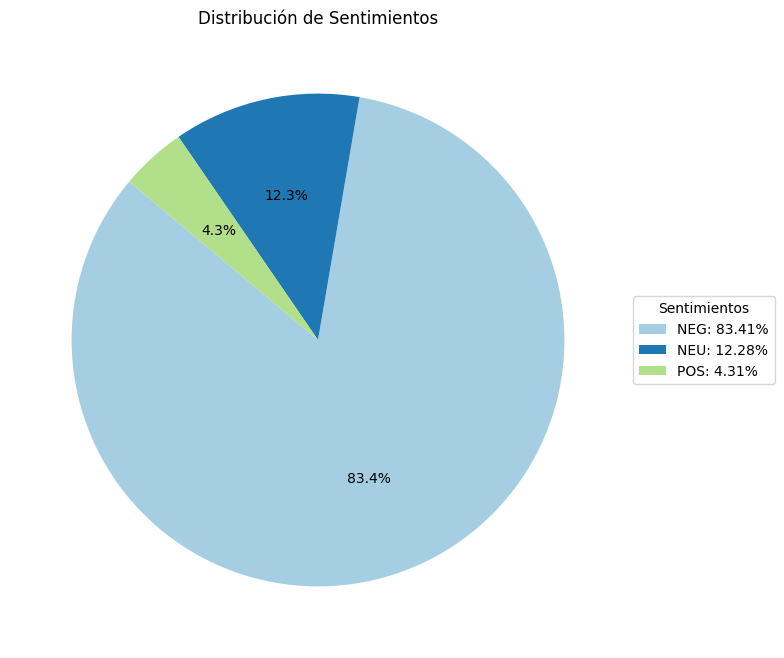

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
print("\nEjemplos de cada tipo de sentimiento:")
for sent_type, example in examples_per_sentiment.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento:
NEG: ['@twominbae cállate puta', '@Josumovic Puta Greta', '@monasterioR @julia_otero Eres patética', '@GretaThunberg Loca del coño', '@GretaThunberg cerda', '@outmarina Cállate puta de mierda', '@Valeryth_ Callate puta que te dejo en visto', '@LaFallaras Deja el alcohol cerda', '@AdaColau HIJA DE PUTA', '@Cannabianol Greta puta']

NEU: ['@LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica', 'La primera parada de transporte público equipada con cristales anti feminazis. http://t.co/', '@SinEmbargoMX greta la loca', '@LaFallaras @ContadorAltsasu Ojala sean muchos mas y contigo dentro pa q te manoseen un poco, cerda!!!!! http://t.co/', '@xeanort99 Sí, y que la menor se invente lo que quiera para condenarles a 38 años de cárcel, todo ok también. http://t.co/', 'Alguna feminazi te contó esto? http://t.co/', 'Mientras las feminazis juzgan Twitter hace su magia http://t.co/', '@FelyArianna @laSextaTV Seguro que ella lo provocó, el no la

--------------------------------------------


-----------------------------------------------

### Tweets de misogynous

-----------------------------------------------


In [16]:
text_misogynous = [text for text in df_misocorpus_train[df_misocorpus_train["label"] == 1]["tweet"].tolist()]
results_sentiment_analysis_misogynous = [analyze_sentiment(text) for text in tqdm(text_misogynous)]

  1%|          | 14/2237 [00:00<00:33, 66.26it/s]


-----------------------
Texto analizado: @twominbae cállate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7170911431312561, 'NEU': 0.19314627349376678, 'POS': 0.08976265043020248}

-----------------------
Texto analizado: @Josumovic Puta Greta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8340848088264465, 'NEU': 0.09842982143163681, 'POS': 0.06748536974191666}

-----------------------
Texto analizado: @monasterioR @julia_otero Eres patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9568045735359192, 'NEU': 0.030398527160286903, 'POS': 0.01279680710285902}

-----------------------
Texto analizado: @GretaThunberg Loca del coño
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7464326024055481, 'NEU': 0.18224261701107025, 'POS': 0.07132482528686523}

-----------------------
Texto analizado: @GretaThunberg cerda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7886508703231812, 'NEU': 0.14444740116596222, 'POS': 0.06690177321434021}

-----------------

  1%|          | 21/2237 [00:00<00:33, 65.66it/s]


-----------------------
Texto analizado: @LaFallaras Payasa háztelo mirar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8893329501152039, 'NEU': 0.07806739211082458, 'POS': 0.03259965404868126}

-----------------------
Texto analizado: esta es la loca que se la da de feminazi y al final el marido parece ser que es un violador o abusador http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9444366097450256, 'NEU': 0.04934275150299072, 'POS': 0.006220563780516386}

-----------------------
Texto analizado: Las feminazis del siglo XXI. Cualquier pendejada les parece una ofensa terrible: http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694560170173645, 'NEU': 0.023817256093025208, 'POS': 0.006726798135787249}

-----------------------
Texto analizado: @VauquitaS Me ha pasado lo mismo. Lo sigo haciendo y seguiré, es mi manera de saber si es una MUJER o una feminazi resentida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5144064426422119, 'NEU': 0

  2%|▏         | 35/2237 [00:00<00:36, 60.37it/s]


-----------------------
Texto analizado: #FEMINAZIS unidas con propósitos #PROMUERTE trabajando para PLANNED PARENTHOOD #GeorgeSoros #ippf #ONU #CIDH http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48228517174720764, 'NEU': 0.48084938526153564, 'POS': 0.036865394562482834}

-----------------------
Texto analizado: @vanesavallejo3 Esas feminazis, solo tienen y destilan odio, eso es una doctrina de mierda, le carbonizan el cerebro!.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9753730297088623, 'NEU': 0.018460892140865326, 'POS': 0.006166060920804739}

-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es Ahí ahí, demostrando que como buena feminazi hembrista la verdad te importa tres cojones. Sabes de sobra que ella es una mentirosa que quiere joderles la vida y aún así te la pela.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9233554005622864, 'NEU': 0.05929677188396454, 'POS': 0.017347894608974457

  2%|▏         | 49/2237 [00:00<00:37, 58.23it/s]


-----------------------
Texto analizado: Mostritas #Feminazi amenazando como ellas saben. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.873272716999054, 'NEU': 0.10653512924909592, 'POS': 0.020192209631204605}

-----------------------
Texto analizado: @alexandrahorler Sigue ahí, tienes condiciones. Vas a salir más empoderada que todas las flacas de facultades de sociales juntas, vas a salir con barrio, con calle. Ninguna de estas feminazis tiene eso por eso están refugiadas en sus facus con sus estudios de género y acción afirmativa.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.020774198696017265, 'NEU': 0.1129978597164154, 'POS': 0.8662278652191162}

-----------------------
Texto analizado: Esas feminazis son la cagada... ???? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9208540320396423, 'NEU': 0.06722905486822128, 'POS': 0.011916928924620152}

-----------------------
Texto analizado: @fightforkarol GRETA ES UNA PENDEJA
Sentimiento de

  3%|▎         | 63/2237 [00:01<00:35, 61.03it/s]


-----------------------
Texto analizado: @LaFallaras Estás loca de remate.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6776441335678101, 'NEU': 0.2225133329629898, 'POS': 0.09984248131513596}

-----------------------
Texto analizado: @AdaColau Perra!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4939138889312744, 'NEU': 0.2751401960849762, 'POS': 0.2309459000825882}

-----------------------
Texto analizado: @SinEmbargoMX greta la loca
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.361335426568985, 'NEU': 0.49740010499954224, 'POS': 0.1412644386291504}

-----------------------
Texto analizado: @politikcorrecta @olinguiito Esta niña suena a marioneta feminazi con grabación incluida ?‍♀️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7431057691574097, 'NEU': 0.24309806525707245, 'POS': 0.01379613671451807}

-----------------------
Texto analizado: @LaReinaDeNarnia Pero las feminazis ni un tweet para el extorsionandor de tweeter
Sentimiento detectado: NEG
Proba

  3%|▎         | 77/2237 [00:01<00:34, 62.60it/s]


-----------------------
Texto analizado: @LaFallaras Que pesadita eres hija!!! Cambia de disco....cerda http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9505332708358765, 'NEU': 0.03895516321063042, 'POS': 0.010511529631912708}

-----------------------
Texto analizado: @LaFallaras @PeioHR Hay alguna razón, algún motivo, alguna frustración, para ofender de esa manera? Dios me perdone!! Absoluta hija de la gran puta, descerebrada, alcohólica y porrera. A la Señora, a la madre del hijo de Dios, no la ofende Ud en mi presencia!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9569553136825562, 'NEU': 0.037388794124126434, 'POS': 0.005655855406075716}

-----------------------
Texto analizado: @kaguilar19 @diegovr29 @OscarUlloa88 Censurando las opiniones de los demás, pero después no quieren que les digan feminazis ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9074669480323792, 'NEU': 0.07740859687328339, 'POS': 0.015124447643756866}

-----------------------
T

  4%|▍         | 84/2237 [00:01<00:34, 62.75it/s]


-----------------------
Texto analizado: @romancendoya Las feministas(Feminazis) estan manejadas por las ONG de izquierda para desestabilizar la sociedas, nunca van alzar su voz por alguien de derecha o centro. Miren el caso Tavara. Asi que a Keiko peor. Para ellas Keiko es hombre, macho, varón por que solo la atacan. #izquierdanunca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.916184663772583, 'NEU': 0.07418909668922424, 'POS': 0.00962626002728939}

-----------------------
Texto analizado: Después dicen los feminazis que el patriarcado no sirve. Un padre muere en el incendio cuando intento salvar a su hijos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9615410566329956, 'NEU': 0.03257540985941887, 'POS': 0.005883614532649517}

-----------------------
Texto analizado: Hostia, no lo sabía. Que gustito me ha dado ver esto ???. Un bloqueo de feminazi al día evita la avería. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08883418142795563, '

  4%|▍         | 98/2237 [00:01<00:35, 59.81it/s]


-----------------------
Texto analizado: @carlosdanoz @vox_es El feminismo no es justicia. Y lo que ha ocurrido con la sentencia de arandina es feminismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9402197003364563, 'NEU': 0.05287574604153633, 'POS': 0.006904570385813713}

-----------------------
Texto analizado: Quiero ver a aquellas feminazis que van casi empelotas en sus marchas, usando hiyab y totalmente sometidas. Muy lindo hablar y bailar, pero la realidad es otra y no veo a ninguna de ellas ayudando a las iraníes. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695595502853394, 'NEU': 0.02625914476811886, 'POS': 0.004181187134236097}

-----------------------
Texto analizado: @Diameuwu1 CALLATE PUTA ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7022418975830078, 'NEU': 0.24121522903442383, 'POS': 0.05654289945960045}

-----------------------
Texto analizado: @ElTurnerCat Argentina esta contratando feminazis hablan cualquier mierda sin sent

  5%|▍         | 105/2237 [00:01<00:44, 47.61it/s]


-----------------------
Texto analizado: Cuidado: Perras Feminazis http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.825996458530426, 'NEU': 0.14030314981937408, 'POS': 0.0337003655731678}

-----------------------
Texto analizado: @GretaThunberg La cara de hija de puta que tenés es tremenda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.91852867603302, 'NEU': 0.05020572245121002, 'POS': 0.031265635043382645}

-----------------------
Texto analizado: @La_Nuri @luispablob Misógino por qe? Eso no tiene nada qe ver..tu seguro eres una feminazi que si dicen algo en contra o no apoyan la causa de una mujer entonces ya uno es un misógino violador opresor..el hecho de darme cuenta del trasfondo del "movimiento greta" no me hace misógino, te hace crédula
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9220518469810486, 'NEU': 0.07012409716844559, 'POS': 0.007824106141924858}

-----------------------
Texto analizado: esto quieren en Ecuador las silvites #Feminazis htt

  5%|▌         | 118/2237 [00:02<00:39, 53.99it/s]


-----------------------
Texto analizado: @waleska0328 Que mierda de Tweet es? Los cabecillas del adoctrinamiento feminazi ya no sabes qué tontería compartir.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9716129302978516, 'NEU': 0.023816728964447975, 'POS': 0.004570391029119492}

-----------------------
Texto analizado: @cayetanaAT hay q ser patética para ir provocando...pero oye y las risas q consigues se agradece
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8235747814178467, 'NEU': 0.13474029302597046, 'POS': 0.041684962809085846}

-----------------------
Texto analizado: @RubenSanchezTW Pues porque ni hubo violación ninguna ni la "víctima" fue tal sino una pija calentorra que mintió como una cerda para meter 38 años en la cárcel a 3 chavales inocentes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9176687002182007, 'NEU': 0.06952926516532898, 'POS': 0.012802008539438248}

-----------------------
Texto analizado: @youngAli__ @GretaThunberg Puta greta Putos rojo

  6%|▌         | 138/2237 [00:02<00:28, 73.93it/s]


-----------------------
Texto analizado: @LaFallaras Que te crees Marilyn Monroe puta gorda asquerosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8990226984024048, 'NEU': 0.07656038552522659, 'POS': 0.02441696636378765}

-----------------------
Texto analizado: Si a las feministas tanto les molesta Twitter y hombres en general ¡Ellas son sumamente independientes son el alfa y omega de nuestra sociedad¡ pueden crear un red social "FEMINAZI" y así dejan de joder al resto q no compartimos su enfermo pensamiento lleno odio y resentimiento.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8654767274856567, 'NEU': 0.10655684769153595, 'POS': 0.02796647883951664}

-----------------------
Texto analizado: Feminazis ni que hijueputas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.691902220249176, 'NEU': 0.20864808559417725, 'POS': 0.09944964945316315}

-----------------------
Texto analizado: @Flunitrazepam37 @reginaphalang8 @UninorteCO Feminazis en potencia. Esa carrera la

  7%|▋         | 158/2237 [00:02<00:24, 85.09it/s]


-----------------------
Texto analizado: @LaFallaras Toxicomana no, borracha y loca, que no es lo mismo. ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3937034606933594, 'NEU': 0.577198326587677, 'POS': 0.029098212718963623}

-----------------------
Texto analizado: @laSextaTV A los rojos no les hago ni caso pienso chupar la cabeza las patas y las antenas y si esos terribles enersoste libre me la pela que venga la Greta a fregar los platos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.866136372089386, 'NEU': 0.11713338643312454, 'POS': 0.016730254516005516}

-----------------------
Texto analizado: @LaFallaras No me sorprende que el alcohol la haya hecho convertirse en borracha, toxicomana, puta, loca y ladrona Uf, se te va a ir la vida y la pasta en terapias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760269522666931, 'NEU': 0.02023698203265667, 'POS': 0.0037360789719969034}

-----------------------
Texto analizado: Lo unico peor que una feminazi es otra femi

  8%|▊         | 178/2237 [00:02<00:22, 90.94it/s]


-----------------------
Texto analizado: @BonitaMilana_ Ponle unas chinchetas ó le das directamente los guantes y que se ponga a fregar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5320215821266174, 'NEU': 0.40687066316604614, 'POS': 0.061107736080884933}

-----------------------
Texto analizado: @mablanco60 @PAZLLORIA Las feministas habéis corrompido la justicia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9582369923591614, 'NEU': 0.03331594169139862, 'POS': 0.008447045460343361}

-----------------------
Texto analizado: @eliana_valera @larepublica_pe Más miedo me daría tener un pariente como tú, por lo limitada mental que eres. Los dementes seniles son dignos de compasión, sólo la psicosis feminazi se espanta y califica sin considerar que este sujeto está claramente enfermo mental y por lo tanto según la ley es inimputable.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9782654047012329, 'NEU': 0.017044197767972946, 'POS': 0.004690358880907297}

-

  9%|▉         | 199/2237 [00:02<00:22, 92.32it/s]


-----------------------
Texto analizado: @plaqueta @alereyes_c @kikijp3 @casamoradaEC @mariafernandamp @caathytorres Barcelona termina con tu grupito feminazi ..te metiste co lo que no debías meterte pendeja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9201645255088806, 'NEU': 0.06564861536026001, 'POS': 0.014186770655214787}

-----------------------
Texto analizado: @Stef_rodri Falta de respeto total para autoridades, compañeros, familares e invitados Feminazis = desubicadas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9681398868560791, 'NEU': 0.02438041940331459, 'POS': 0.007479638792574406}

-----------------------
Texto analizado: Los comunistas y las feminazis son complices de los asesinos islamicos. Silencio de Europa ante la condena a 55 años de cárcel de tres activistas iraníes por negarse a llevar velo http://t.co/ vía @publico_es
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9284006953239441, 'NEU': 0.05825521796941757, 'POS': 0.013344117440283298}

--

 10%|▉         | 219/2237 [00:03<00:21, 95.50it/s]


-----------------------
Texto analizado: @luciano_hang Greta idiota
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7880116105079651, 'NEU': 0.15316882729530334, 'POS': 0.058819565922021866}

-----------------------
Texto analizado: @carlitacz ahora censuras a las personas x ser hombres! Jajajaja sos patética. Tenían razón "se va a caer" si el feminismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9577862620353699, 'NEU': 0.032292332500219345, 'POS': 0.009921442717313766}

-----------------------
Texto analizado: Qué dicen las feminazis cuando una madre le pega a su hija? Si hubiese sido un hombre con el cinto en la mano ya está en cana. Si en cambio fuese una madre contra un niño... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9182451367378235, 'NEU': 0.07173532247543335, 'POS': 0.010019563138484955}

-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es La pregunta es ¿Por qué os fastidia tanto

 11%|█         | 239/2237 [00:03<00:20, 95.90it/s]


-----------------------
Texto analizado: YA VETE A FREGAR A OTRA PARTE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8797757625579834, 'NEU': 0.09209993481636047, 'POS': 0.02812432497739792}

-----------------------
Texto analizado: Jajajajajajaja ya no son feminazis ahora son femitrolas http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6404189467430115, 'NEU': 0.27253836393356323, 'POS': 0.08704270422458649}

-----------------------
Texto analizado: @liatrueba La comunidad LBGT...... tiene dentro de sus filas a mucha gente que le hace daño en su lucha, porque mezclan cosas, lo mismo ocurre con las feminazis que para ellas todos somos violadores, machistas y retrógrados.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97977614402771, 'NEU': 0.017126597464084625, 'POS': 0.003097252454608679}

-----------------------
Texto analizado: Así es!. Por ejemplo, ud es preciosa mi estimada exEscoria. Yo te veo en la calle y te lanzo tu piropito, así se cabree mi espo

 12%|█▏        | 260/2237 [00:03<00:20, 97.64it/s]


-----------------------
Texto analizado: @plaqueta @casamoradaEC @mariafernandamp Pendejadas de feminazis ridiculas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9424427151679993, 'NEU': 0.04259168729186058, 'POS': 0.01496565155684948}

-----------------------
Texto analizado: Acabo de pasar por una marcha feminazi y creo que el Rosario del pecho me vibraba como el medallón del brujo cuando tiene mounstros cerca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.737953782081604, 'NEU': 0.23007731139659882, 'POS': 0.03196893632411957}

-----------------------
Texto analizado: @AdaColau Querría veros igual de rápido multando Okupas, payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7786217927932739, 'NEU': 0.17664462327957153, 'POS': 0.04473355412483215}

-----------------------
Texto analizado: @Yarelis36210579 @jguaido Cállate puta defiendes lo indefendible ese cabron nos entrego y gente decerebrada como tú igual lo apoya pendeja, anda y le lo coges pero asegúrate 

 13%|█▎        | 280/2237 [00:03<00:20, 97.48it/s]


-----------------------
Texto analizado: Ay no te la puedo aguante mi prima la feminazi y el amigue invisible navideño http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8866851329803467, 'NEU': 0.08811753988265991, 'POS': 0.025197304785251617}

-----------------------
Texto analizado: Hoy escuché a una feminazi decir q si te ofende que te digan "violador" es pq tu personalidad está en construccion .. ?Me encantan cuando te dicen como debes pensar sin usar tu inteligencia? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7872695326805115, 'NEU': 0.19521735608577728, 'POS': 0.017513155937194824}

-----------------------
Texto analizado: @elcomercio_peru Y ahora que dirán las féminazis se quedaron sin caballito de batalla!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8164160251617432, 'NEU': 0.16353945434093475, 'POS': 0.020044535398483276}

-----------------------
Texto analizado: Video gráfico de como se deben tratar a las feminazi violentista

 13%|█▎        | 301/2237 [00:03<00:20, 95.78it/s]


-----------------------
Texto analizado: @LaFallaras @iunida @ahorapodemos @perecampscampos Estupida
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32201677560806274, 'NEU': 0.4954327642917633, 'POS': 0.18255038559436798}

-----------------------
Texto analizado: @MarthaCeciliaVL @FlavioArosemena El problema de las feminazis es que no se hacen responsables de sus actos. Solo se hace. Las víctimas y culpan de todo al hombre. Una dama de verdad no se toma esas fotos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9732725620269775, 'NEU': 0.0226841252297163, 'POS': 0.004043294582515955}

-----------------------
Texto analizado: @monasterioR @Alipese1 No se puede ser más cerda que tú ni tampoco más ladrona firmando lo que no podías firmar EXTRANJERA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9535048604011536, 'NEU': 0.04008781537413597, 'POS': 0.006407230161130428}

-----------------------
Texto analizado: @Ivaeel Y no viste como les dí como bombo en fiesta a las femi

 14%|█▍        | 322/2237 [00:04<00:19, 96.54it/s]


-----------------------
Texto analizado: @LaFallaras Loca, ladrona, putta, feminista, de izquierdas, toxicómana, hater, anlfabeta... verdaderamente encarna todos los valores de la izquierda como quizás solo los encarnó La Pasionaria.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9214252829551697, 'NEU': 0.06472984701395035, 'POS': 0.013844913803040981}

-----------------------
Texto analizado: @gildatrkovic El silencio cómplice de las feminazis.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9274365305900574, 'NEU': 0.059313613921403885, 'POS': 0.013249827548861504}

-----------------------
Texto analizado: @CNNEE Ja luego vio toda la puta lana que se puede mamar haciéndole al pendejo con un activismo estúpido como el que hace la idiota de su hija @GretaThunberg y fué ahí donde decidió ayudarla!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528521299362183, 'NEU': 0.03558528050780296, 'POS': 0.01156256627291441}

-----------------------
Texto analizado: @niss

 15%|█▌        | 342/2237 [00:04<00:19, 97.03it/s]


-----------------------
Texto analizado: @feminista48 @EIHuevoNeraId @luminecter @emilioer @silviacarce @gatosentado @DrProChoice @ColdasiceV @ElianaCabrera9 @Vynylplayer @Thortur1 @santhros @fjsv1974 @DocLuis_Litardo @CriticalExtremo @AndrParamore @altamirano_maxi @JulietaSagnay @FlorYCafe1 @Astrea1014 @Geovyj @DrBanner50 @piipoo7 @lizbetlunar @CorteConstEcu @ippf @DejemosM @DURANFUERZA @YoSoyDiamante12 @yamnef @Lorenaegas1 @MajoMancino @lopervar Hijita NO hijita matar o asesinar no es mi estilo de vida ni satisfacción . Las feminazis sienten alegria y satisfacción al decirlo y pensar establecerlo . Es normal conducta psicopatía de su secta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6691814661026001, 'NEU': 0.29203689098358154, 'POS': 0.03878162428736687}

-----------------------
Texto analizado: @eluniversocom Por fin se pone en marcha esta idea que tuve y por lo cual muchas feminazis me juzgaron.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08099047094583511, 'NEU

 16%|█▌        | 362/2237 [00:04<00:19, 97.64it/s]


-----------------------
Texto analizado: "Viva el patriarcado" "vuelve a la cocina" "feminazi :v" "el patriarcado ni se inmuta" "hazme un sandwich :vv" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5042290687561035, 'NEU': 0.4193167984485626, 'POS': 0.07645419985055923}

-----------------------
Texto analizado: Greta cabrona que tenes madera atrás. ¿Cuantos árboles se cortaron para hacer eso? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9667210578918457, 'NEU': 0.028070930391550064, 'POS': 0.005208021029829979}

-----------------------
Texto analizado: @jsanchezcristo Ahora las femilocas y feminazis, con que van a salir?!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8546115756034851, 'NEU': 0.1269538253545761, 'POS': 0.01843465305864811}

-----------------------
Texto analizado: @Guille_Sero Que paso! Varon... Relájese. Por usted luego las feminazis tienen mil motivos de hacerse más agresivas.
Sentimiento detectado: NEG
Probabilidades: 

 17%|█▋        | 382/2237 [00:04<00:20, 92.64it/s]


-----------------------
Texto analizado: @LNRevista @GretaThunberg Dejen de joder mira si la van a poner a esta pendeja zurda como personaje del año.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.92031329870224, 'NEU': 0.06520874798297882, 'POS': 0.014477974735200405}

-----------------------
Texto analizado: @Rcm33Rodolfo Si lo que quieres es crecer en esta red, al menos sé honesto hipócrita, y no te contesto más xq usas mi cuenta para que te vean xq eres invisible. Y para que estes claro te repito: que el #feminismo y el movimiento #Feminazi es Diabólico. Ahora defiéndelas tu hipócrita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.949220597743988, 'NEU': 0.04639127105474472, 'POS': 0.004388102795928717}

-----------------------
Texto analizado: Feminazi al cuete http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7424118518829346, 'NEU': 0.21629387140274048, 'POS': 0.04129428043961525}

-----------------------
Texto analizado: @DanielSamperO Solamente los

 18%|█▊        | 403/2237 [00:05<00:19, 95.43it/s]


-----------------------
Texto analizado: Woo..woo..Woo.? Detenme ese TREN #FEMINAZI de PREJUICIOS PENDEJOS q NO ayudan en NADA, sólo a hacer esta sociedad más en VERGA y de MIERDA?.Soy una MUJER de 36 años q se rasura porque me da la PUTA GANA, porque QUIERO,porque eso me da picazón tener los vellos muy largos PUNTO? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9701460003852844, 'NEU': 0.0270918570458889, 'POS': 0.002762159099802375}

-----------------------
Texto analizado: @La3EnDiscordia Típico programita feminazi y asqueroso. Aplaudiendo la infidelidad de la esposa hacia el marido. Es un asco que este tipo de programas exista si quiera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9824221730232239, 'NEU': 0.012733460403978825, 'POS': 0.004844400100409985}

-----------------------
Texto analizado: @reginaphalang8 @UninorteCO Hasta donde llegan las feminazis jajaja son pateticas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.952548086643219, 'NEU':

 19%|█▉        | 423/2237 [00:05<00:18, 95.53it/s]


-----------------------
Texto analizado: @josearamire El Papa como toda figura pública mundial tiene serías amenazas de muerte. Y si consideramos los atentados de las feminazis, su reacción es lo mas lógico del mundo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8361287713050842, 'NEU': 0.14472843706607819, 'POS': 0.019142882898449898}

-----------------------
Texto analizado: @LaFallaras VAYA PERRA AS COGIDO CHICA TE VA DAR ALGO Y TAMBIEN TE DIGO CANSINA CANSINA CANSINA http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9711299538612366, 'NEU': 0.02241523005068302, 'POS': 0.006454853340983391}

-----------------------
Texto analizado: A ver feminazis las veo hablando del tema... http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2601943612098694, 'NEU': 0.6856149435043335, 'POS': 0.054190654307603836}

-----------------------
Texto analizado: @vanesavallejo3 Así o más claro así se le habla a los vientres secos,resentidas sociales,que quieren llam

 20%|█▉        | 444/2237 [00:05<00:18, 97.05it/s]


-----------------------
Texto analizado: @LaFallaras ¿Por que no mandas las fotos de las monjas comiendo necoras??? Vaya por delante que a mi me bautizaron y comulgue de niño,y solo voy a la iglesia a bodas y algun entierro . Pero yo me pregunto..... Como puede ser tan puta y asquerosa la zorra esta de la Cristina Fallaras .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9601911306381226, 'NEU': 0.03584938123822212, 'POS': 0.003959557041525841}

-----------------------
Texto analizado: @LaFallaras @elisabeni Otra ZORRA, que diga otra LOBBA. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4139379858970642, 'NEU': 0.5318083167076111, 'POS': 0.054253701120615005}

-----------------------
Texto analizado: @LaFallaras @elnacionalcat @ContadorAltsasu Parece mentira que pertenezcas a la raza humana, eres un trozo de carne putrefacta, un puto cancer. Tranquila! Caeras como todos los demas, CERDA!!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96959

 21%|██        | 464/2237 [00:05<00:18, 97.86it/s]


-----------------------
Texto analizado: Dedicado con cariño a las mujeres que se han rebajado a sí mismas todo este año en este sinsentido. #Feminazis http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9536993503570557, 'NEU': 0.03810463845729828, 'POS': 0.008196068927645683}

-----------------------
Texto analizado: @LaFallaras Y algo zorra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14067807793617249, 'NEU': 0.6116705536842346, 'POS': 0.2476513534784317}

-----------------------
Texto analizado: @Eltalibanf Si es que tiene un gran corazón! Pero no sigamos magnificando las cualidades de este hermoso ejemplar porque pueden venir a reclamar las feminazis de tuirer ache ene
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.32122331857681274, 'NEU': 0.21819350123405457, 'POS': 0.4605831205844879}

-----------------------
Texto analizado: @susanadiaz Eres una payasa!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9522403478622437, 'NEU': 0.030906420201

 21%|██        | 474/2237 [00:05<00:18, 96.14it/s]


-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es Eres tan patética. Esos audios han sido difundidos por media España..y ahora mismo se siguen y se seguirán difundiendo. Que pasa, que te jode comprobar que esa niña no es ningún angelito y que de brutalmente violada nada?. A ti si que te van a crujir las dos neuronas que tienes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694132208824158, 'NEU': 0.023248029872775078, 'POS': 0.007338690105825663}

-----------------------
Texto analizado: @paulita_pro Si Y es terrible lo QUE pasa Aqui EN Venezuela, ESAS FEMINAZIS SON TERRORISTAS NO SON FEMINISTAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9649149775505066, 'NEU': 0.0266954954713583, 'POS': 0.008389472961425781}

-----------------------
Texto analizado: Esa feminazi si en realidad supiera lo q es un morbo q t digan n la calle capaz y arma la guerra mundial ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.

 22%|██▏       | 484/2237 [00:06<00:37, 46.31it/s]


-----------------------
Texto analizado: @jonatha28339368 ¡Duro con esa feminazi loca y apestosa!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8698685765266418, 'NEU': 0.09159254282712936, 'POS': 0.03853888437151909}

-----------------------
Texto analizado: @clarincom "Clases abiertas de perreo..." ... ¿QUÉ tiene que ver el perreo con los derechos igualitarios? Estas feminazis me tienen harta. Dentro de poco meterán a Papá Noel y a la Zumba en su mamada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9171335697174072, 'NEU': 0.07239799946546555, 'POS': 0.01046845130622387}

-----------------------
Texto analizado: Las feminazis van con todo, solo falta que le busquen pelea a don armando a freddy y a daniel valencia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4868737459182739, 'NEU': 0.40351203083992004, 'POS': 0.10961420834064484}

-----------------------
Texto analizado: @agencialavieja Aca no te acompaño, queridísimo Cubrepileta. Si lo hubiese he

 22%|██▏       | 492/2237 [00:06<00:38, 45.54it/s]


-----------------------
Texto analizado: @saveriovivas Soy mujer y bla bla bla, soy mujer y bla bla bla, soy mujer y bla bla bla bla bla bla.... LOCAS es lo que son las FEMINAZIS con su bla bla bla Comunista de mierda, FEMINAZIS LOCAS ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9471794962882996, 'NEU': 0.044224001467227936, 'POS': 0.00859643705189228}

-----------------------
Texto analizado: Aplaudo las luchas historicas de igualdad de genero por parte de mujeres heroicas, pero lo que no se debe aplaudir hoy dia es ese feminismo radical (feminazi) que esta contribuyendo al deterioro social ( la familia ). Y el estado es complice.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.962552011013031, 'NEU': 0.028809310868382454, 'POS': 0.008638699539005756}

-----------------------
Texto analizado: Feminazis digan lo suyo!!!! http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40285640954971313, 'NEU': 0.43483635783195496, 'POS': 0.1623072624206543}

--------

 22%|██▏       | 499/2237 [00:06<00:50, 34.76it/s]


-----------------------
Texto analizado: @CNNEE Es que no conoce a las feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6982300877571106, 'NEU': 0.25704100728034973, 'POS': 0.04472893103957176}

-----------------------
Texto analizado: hay tipos y tipas de cuidado en Twitter, muchos son trolls o feminazis que como no tienen léxico, van directo al insulto y a querer dañar y lo peor es que cada día aparecen más...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9744307398796082, 'NEU': 0.02241978421807289, 'POS': 0.003149428404867649}

-----------------------
Texto analizado: Según lógica feminazi, un hombre caballeroso puede ser tildado de acosador. Lo que buscan es que en un futuro la mujer no sepa que es la caballerosidad. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8781200647354126, 'NEU': 0.11150886118412018, 'POS': 0.010371045209467411}

-----------------------
Texto analizado: @Eltio_Concho @pulpitoalagalle Y las feminazis: “el violador er

 23%|██▎       | 505/2237 [00:06<00:53, 32.47it/s]


-----------------------
Texto analizado: @sdaquino Feminazis en vez de orcos.....así se pone más terrorífica la pelicula....
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1422111988067627, 'NEU': 0.6513016223907471, 'POS': 0.20648716390132904}

-----------------------
Texto analizado: @VickosAdventure Hay q tener cuidado con la conexión entre los pensamientos y el área del habla. A mí se me suele escapar un "vieja de mierda" o "¡qué feminazi incogible!".
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7864518761634827, 'NEU': 0.19277331233024597, 'POS': 0.02077478915452957}

-----------------------
Texto analizado: @carelou19 Así es. Hasta vendrán los de las feminazis y demás .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5059036016464233, 'NEU': 0.42597922682762146, 'POS': 0.0681171640753746}

-----------------------
Texto analizado: ME CUENTAN QUE UN GRUPO DE LESBIANAS Y FEMINAZIS ESTÁN EN DESACUERDO CON QUE ESTE ENTE NEGOCIE EN LAS REFORMAS,PUESTO QUE LAS SIGLAS

 23%|██▎       | 510/2237 [00:07<01:00, 28.60it/s]


-----------------------
Texto analizado: @ConocelosPeru Cuales son las "alarmates" cifras de "abuso sexual"? Donde están esos "alarmantes números"? Basta de manipulación y de propaganda feminazi.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9432151913642883, 'NEU': 0.05131370201706886, 'POS': 0.005471074488013983}

-----------------------
Texto analizado: Cuando te alucinas feminazi pero acusan a tu idolo de barro.. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.894294798374176, 'NEU': 0.09038364887237549, 'POS': 0.01532156951725483}

-----------------------
Texto analizado: Que tal si las Feminazis de enlistan en el ejército. No les parece muy machista eso de enviar solo hombres a la guerra?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8932188749313354, 'NEU': 0.09730229526758194, 'POS': 0.009478867053985596}

-----------------------
Texto analizado: Uno de los requisitos para ser feminazi es ser feisisimaaaa jajaja
Sentimiento detectado: NEG
Probab

 23%|██▎       | 514/2237 [00:07<01:04, 26.71it/s]


-----------------------
Texto analizado: @DoyletJuan @caathytorres @PoliciaEcuador Buena esa compita?? Todos los emelecistas UNIDOS contra las feminazis @silvitabuendia @LoloMino
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04276064783334732, 'NEU': 0.2922116219997406, 'POS': 0.6650276780128479}

-----------------------
Texto analizado: Bueno, ya, al Blueprint... la compañera mia, que le digo "perro mojado" de cariño hoy no quiso venir... que se siente agotada mentalmente.. y yo KHE? mardita si usas el cerebro... la propia perro mojado.. y despues anda pidiendo igualdad porque es medio feminazi.. que lo mame!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9743948578834534, 'NEU': 0.023583536967635155, 'POS': 0.002021606545895338}

-----------------------
Texto analizado: @MadresAccionPe Definitivamente lo peor que puede sucederle a la sociedad es estar rodeada de algunas feminazis. Mejor bailemos el ritmo del año y burlémonos de esa recua http://t.co/
Sentimiento detecta

 23%|██▎       | 518/2237 [00:07<01:02, 27.47it/s]


-----------------------
Texto analizado: @MilagrosLeivaG Yo pensé que era una loca feminazi de 26 años, por la cara en algunas fotos. Ahora que veo que es una chiquilla de 16, todo mi respeto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8325765132904053, 'NEU': 0.15745669603347778, 'POS': 0.009966802783310413}

-----------------------
Texto analizado: Una feminazi en pedo http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5162045359611511, 'NEU': 0.38944771885871887, 'POS': 0.09434771537780762}

-----------------------
Texto analizado: Jajajaja los jugadores de la sub 17 del América son unos putos cracks ? vaya interpretación del violador eres tú, hasta a mi me dieron ganas de hacer un video de tan majestuosa coreografía feminazi ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8599637150764465, 'NEU': 0.10116103291511536, 'POS': 0.03887523338198662}

-----------------------
Texto analizado: Respuesta ante tanta feminazi #FelizViernesATodos ¡¡¡ http://t.c

 23%|██▎       | 525/2237 [00:07<01:08, 24.87it/s]


-----------------------
Texto analizado: Pobrecita ella quiere ser feminazi pero hay un macho espesándola en casa ??????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9229447841644287, 'NEU': 0.07108577340841293, 'POS': 0.005969473160803318}

-----------------------
Texto analizado: @AnabelAngusA Que se rodeen de buenos asesores y no vuelvan a ser tan imbesiles con su imagen política. Que reconozcan que NO son políticos y sean humildes al respecto. Y que no se alien con FemiNazi, aborteras, indigenistas, ecologistas y toda esa manga de progres perversos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7755443453788757, 'NEU': 0.16178083419799805, 'POS': 0.062674880027771}

-----------------------
Texto analizado: @LibranosM @Leticia041271 Se cocinan en su propio caldo. Y esta vez, por más relato que quieran hacer, está su libro y hay películas de la época que demuestran su línea de pensamiento. ¡Feminazis! ¡¡CHÚPENLA!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.69

 24%|██▎       | 528/2237 [00:08<01:22, 20.80it/s]


-----------------------
Texto analizado: Q idiota ??‍♂️ como eras feminazi a están atacando a todo ???? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576627016067505, 'NEU': 0.03544247895479202, 'POS': 0.006894828286021948}

-----------------------
Texto analizado: Una cosa es ayudar a víctimas reales de violencia y otra ser feminazi o loca #Quedoclaro?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8921927809715271, 'NEU': 0.09447377920150757, 'POS': 0.013333444483578205}

-----------------------
Texto analizado: @HaroldA60148527 @InstitutoCato Estoy tomando que en los países donde hay mayor nivel de feminazis y comunistas son justamente en países donde el índice de analfabetismo se dan por distintas fallas, tanto estatales como geográficas, que impiden a un estudiante educarse debidamente.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9584459066390991, 'NEU': 0.038703080266714096, 'POS': 0.0028510140255093575}


 24%|██▎       | 531/2237 [00:08<01:33, 18.26it/s]


-----------------------
Texto analizado: @Colo1905Ok Sì, però solo de las Hdp. ...son las "cosas" más asquerosas de este mundo... algunos las llaman también feminazi ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9429457783699036, 'NEU': 0.05067915469408035, 'POS': 0.006375144235789776}

-----------------------
Texto analizado: @lilalvsherworld Eso dirán los niños cuando recuerden las marchas feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5799160599708557, 'NEU': 0.3553619682788849, 'POS': 0.06472192704677582}

-----------------------
Texto analizado: @OEMatias @Mr_Blonde77 @OsogordoIntenso Las mujeres normales si, las féminazis radicales son todas androginos sin culo sin tetas, sin alma...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8973590731620789, 'NEU': 0.09334217011928558, 'POS': 0.009298650547862053}


 24%|██▍       | 533/2237 [00:08<01:43, 16.51it/s]


-----------------------
Texto analizado: Feminazi, Asesina. El Abuelito Asesinado por una Feminazi... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9372866749763489, 'NEU': 0.048855483531951904, 'POS': 0.013857780024409294}

-----------------------
Texto analizado: @FalaciasProgres quieren igualdad las feminazis abortistas? pero castigan 1 boludo q se equivocó q tiene muy merecido el repudio social pero de ahí a sancionar se les fue la mano sólo para quedar bien con estúpidas d pañuelo verde q lo + suave q hacen es defecar en iglesias y mostrarse desnudas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9527679085731506, 'NEU': 0.03874059021472931, 'POS': 0.0084915179759264}

-----------------------
Texto analizado: A sido feminazi, con razón http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6576864123344421, 'NEU': 0.27813735604286194, 'POS': 0.06417626887559891}


 24%|██▍       | 537/2237 [00:08<01:51, 15.19it/s]


-----------------------
Texto analizado: El mejor meme anti-Feminazi que he visto. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14154066145420074, 'NEU': 0.21444305777549744, 'POS': 0.6440162658691406}

-----------------------
Texto analizado: @barbitarcic Imaginate, ya me ven como una feminazi jipi con 3 neuronas, se les revienta la matrix. ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9365828037261963, 'NEU': 0.05859192833304405, 'POS': 0.004825298674404621}

-----------------------
Texto analizado: Qué pensará sobre la medida que tomó el partido político que tanto defiende el gnomo parásito, feminazi y virgen de CUIL de @OfeFernandez_ ?! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9226245880126953, 'NEU': 0.06463566422462463, 'POS': 0.01273974310606718}


 24%|██▍       | 539/2237 [00:08<01:56, 14.57it/s]


-----------------------
Texto analizado: Y disculparan cualquier cosita, cualquier tweet que no les haya gustado.. Este mensaje va para todos menos para las feminazis.. Esas locas de mierda bien merecido se tienen cada palabra emitida ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8824224472045898, 'NEU': 0.1062348484992981, 'POS': 0.011342594400048256}

-----------------------
Texto analizado: Viendo el vídeo me coloco en su lugar y reaccionaria casi igual. Me estoy retirando y me agarran y jalan con brusquedad, claro que molesta además le dió un manoton como a los niños que hacen mal. Dejen la paja que es mujer y toda la sarta de tonterías feminazis. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8979418873786926, 'NEU': 0.09080788493156433, 'POS': 0.011250223964452744}

-----------------------
Texto analizado: @madigd @florfreijoo @LaSiglo21 Se quiso burlar de las feminazis, como lo hacen muchos, porque la verdad que ustedes y toda su ideología es bastant

 24%|██▍       | 543/2237 [00:09<02:08, 13.14it/s]


-----------------------
Texto analizado: @teloresumo @LaSiglo21 Pero qué falsos, no se vistió de víctima de feminicidio, eso claramente es una feminazi violenta y sesgada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9176762700080872, 'NEU': 0.07123799622058868, 'POS': 0.011085651814937592}

-----------------------
Texto analizado: @morridelagente @BSCkleber Talves kleber puede dar fe a veces tremendo culos pasan por el suburbio y la verdad nadie anda diciéndole mamita que rico sartén para freír este par de huevos está feminazis lo que quiere es llamar la atención
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7187954783439636, 'NEU': 0.2524017095565796, 'POS': 0.028802795335650444}

-----------------------
Texto analizado: ¿Os imagináis a un miembro de La Manada dando una conferencia en una universidad sobre cualquier tema relacionado con la mujer? Pensar el revuelo que eso causaría, sobretodo en el entorno feminazi. Pues eso está pasando en la UPV con la connivencia del

 24%|██▍       | 547/2237 [00:09<02:00, 14.00it/s]


-----------------------
Texto analizado: @AgusFruetWalter @LaSiglo21 Parodia de una feminazi, me extraña que te comas el verso de los medios que ni siquiera dieron derecho a replica, una vezdañaa escrache y condena social sin derecho a defensa alguna. Menos empatía, me uso de razón y más respeto a la libertad ajena.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9643937349319458, 'NEU': 0.030366072431206703, 'POS': 0.005240153055638075}

-----------------------
Texto analizado: @alonso_dm Pero a la mujer no con el pétalo ni que se enteren las feminazis le dirán el macho opresor y por que hay papá y no mamapa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7354114055633545, 'NEU': 0.24626632034778595, 'POS': 0.01832224801182747}

-----------------------
Texto analizado: ?No es q vienen, llegaron, los tiempos difíciles, ya están aquí con todo y sus movimientos apocalipticos del cambio climático , el demencial y patético feminazi el adoctrinamiento de genero y otro tanto más q

 25%|██▍       | 551/2237 [00:09<01:55, 14.59it/s]


-----------------------
Texto analizado: Las FemiNazi mexicanas llenas de odio e ira queman biblias y exigen al presidente que Dios sea borrado. Como en los días de la Nazi alemana de Hitler quemaban los libros y perseguian y asesinaban a los cristianos, judíos, homosexuales y gitanos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9516929388046265, 'NEU': 0.04068291187286377, 'POS': 0.00762406038120389}

-----------------------
Texto analizado: Así se le trata no solo a las #feminazis argentinas sino a los periodistas #progres de corte amarillescos, y así debería de hacerse en España hacia estas desgracias que dicen llamarse mujeres y no sabemos que son porque no tienen sexo definido. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9463532567024231, 'NEU': 0.047838255763053894, 'POS': 0.0058084577322006226}

-----------------------
Texto analizado: BRILLANTE RESPUESTA A UNA FEMINAZI!!!!!!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'

 25%|██▍       | 554/2237 [00:09<01:40, 16.77it/s]


-----------------------
Texto analizado: Más violenta, más feminazi, más cocainómana y más zurda resentida que Marisela Santibañez
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9449848532676697, 'NEU': 0.045179739594459534, 'POS': 0.00983546581119299}

-----------------------
Texto analizado: @lahistoriaec @mariapaularomo @PoliciaEcuador @caathytorres He visto a tantos policias con chicas que son mucho para ellos... Por lo que dudo que uno de ellos le haya dicho preciosa a esa feminazi..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7390660047531128, 'NEU': 0.22257636487483978, 'POS': 0.038357608020305634}

-----------------------
Texto analizado: Feminazi: "No me vas a coger, mi cuerpo es un templo" - "El partenón... se está cayendo a pedazos... lo primero que se cayó fue la teta..." O.O
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9405325651168823, 'NEU': 0.054410409182310104, 'POS': 0.005057099275290966}

-----------------------
Texto analizado: YO A LOS 14 AÑ

 25%|██▌       | 560/2237 [00:10<01:27, 19.17it/s]


-----------------------
Texto analizado: @Zambranitis @PinolilloV Y qué opinas de las lesbianas aborteras y feminazis que queman iglesias? Ahí no te rasgas las vestiduras ni te sentís ofendido? De seguro ellas si son muy civilizadas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4694000482559204, 'NEU': 0.4135749638080597, 'POS': 0.11702495068311691}

-----------------------
Texto analizado: @yosoyandrepro @lanena_dh Ustedes son las que crearon una canción ridícula, con la cual no han salvado ni una sola mujer. Más bien hacen un baile de algo tan delicado como la violación, dan asco como feminazis.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801165461540222, 'NEU': 0.014890660531818867, 'POS': 0.0049927979707717896}

-----------------------
Texto analizado: @Don_Muchin @silvitabuendia Si sras feminazis en este caso les doy la razón hay que matar ao feto. Pero sras feminazis porque no proponen la MUERTE del violador esa si es la solución porque el VIOLADOR seguirá viol

 25%|██▌       | 569/2237 [00:10<01:00, 27.65it/s]


-----------------------
Texto analizado: #19DElParoSigue Ayer cambié opiniones con una feminista, porque le dije que muchas eran femiNAZIS. Me dijo: “¿de dónde saca usted que los Nazis eran socialistas?”. Mi respuesta fue: “del nombre Partido «NacionalSOCIALISTA» Obrero Alemán”. Fue extraño cuando me dejó hablando solo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7256671190261841, 'NEU': 0.2635698616504669, 'POS': 0.010763056576251984}

-----------------------
Texto analizado: @ElTurnerCat Soy auto-eficaz :D cuando tu novia te salga con tonterias de feminazi por usar tanto esta palabra (arriba el patriarcado)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5686113834381104, 'NEU': 0.38501298427581787, 'POS': 0.04637562483549118}

-----------------------
Texto analizado: Detesto la soutas feminazis de mierda que se ocultan en las comisarías de familia en las fiscalia en en los jueces de mierda la nueva guerra es feminazi contra los machos esa es la 2 guerra mundial. http:

 26%|██▌       | 582/2237 [00:10<00:39, 41.44it/s]


-----------------------
Texto analizado: La Greta informa...????? te digo yo que esta niña es medio boba!!! ???? al final te digo yo, que los cubatas nos los vamos a tener que beber con las manos!!! ??‍♂️??‍♂️??‍♂️??‍♂️… http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.943919837474823, 'NEU': 0.05205647274851799, 'POS': 0.004023781977593899}

-----------------------
Texto analizado: @NiusDiario Ojalá os violen a todas a ver q hsceis iris a fregar barrer y cocinar anda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9250723719596863, 'NEU': 0.06148272007703781, 'POS': 0.013444892130792141}

-----------------------
Texto analizado: Greta la niña "*tonta del bote*". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6690021753311157, 'NEU': 0.2850398123264313, 'POS': 0.04595798999071121}

-----------------------
Texto analizado: @AliencitoKawaii Típico de las FEMINAZIS locas. ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8572590947151184, 'NE

 27%|██▋       | 595/2237 [00:10<00:32, 50.39it/s]


-----------------------
Texto analizado: greta hija puta devuélvenos la calefacción
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8821326494216919, 'NEU': 0.09078159183263779, 'POS': 0.027085792273283005}

-----------------------
Texto analizado: @blogcyh @wizagp @Alejandro_muba Solo miren la cara de esa cuatro ojos como lo miraba. Hay Feminazis, por que odian a los hombres?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9286131262779236, 'NEU': 0.06022924557328224, 'POS': 0.011157659813761711}

-----------------------
Texto analizado: @EllaDiarioAM @Tacirupeca @Aquisolomandoyo @hernanmilla72 @JovenEuropeo @67quijote Ay no ya llegaron las feminazi dolidas indignadas a darse golpes de pecho...me aburren... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9203412532806396, 'NEU': 0.06565900892019272, 'POS': 0.013999748043715954}

-----------------------
Texto analizado: @NairAliaga En estos días de las imposiciones de la ideología de genero y las feminazis,

 27%|██▋       | 607/2237 [00:11<00:33, 49.10it/s]


-----------------------
Texto analizado: ? Ni las feminazis se salvan jajajajajaja http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6373470425605774, 'NEU': 0.2986592650413513, 'POS': 0.06399375200271606}

-----------------------
Texto analizado: Patriarcado 1 feminazis 0 en ASTINAVE EP http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2569873631000519, 'NEU': 0.5691719651222229, 'POS': 0.17384067177772522}

-----------------------
Texto analizado: Para estos carnavales amiga feminista o féminazi mejor larguese de PTY porque si no morirá de rabia por la canción de carnaval. XD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8511064052581787, 'NEU': 0.14125372469425201, 'POS': 0.007639770861715078}

-----------------------
Texto analizado: ?Por un 2020 sin feminazis
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3837806284427643, 'NEU': 0.531510591506958, 'POS': 0.08470878005027771}

-----------------------
Texto analizado: @GretaThunberg Cál

 28%|██▊       | 619/2237 [00:11<00:32, 49.72it/s]


-----------------------
Texto analizado: @24h_tve @GretaThunberg Payasa mocosa, títere del progresismo comunista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8941774964332581, 'NEU': 0.07351570576429367, 'POS': 0.03230676427483559}

-----------------------
Texto analizado: @Algie__ Puta Greta qué daño ha hecho
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9630305767059326, 'NEU': 0.026517407968640327, 'POS': 0.010452106595039368}

-----------------------
Texto analizado: @rosaliavt Qué tal la crisis medioambiental desde tu avión privado. Vas a ir a Greta Majareta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9178647994995117, 'NEU': 0.07195168733596802, 'POS': 0.01018351037055254}

-----------------------
Texto analizado: la puta greta ha hecho que el edificio multiusos se prende fuego
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9642443656921387, 'NEU': 0.029556723311543465, 'POS': 0.006198870949447155}

-----------------------
Texto analizado: La Gret

 28%|██▊       | 632/2237 [00:11<00:28, 55.38it/s]


-----------------------
Texto analizado: ... Es lo que pasa por ser ECOLOGISTA... y procurar obtener ENERGÍA de fuentes LIMPIAS y RENOVABLES... ... Tal como era FRANCO... y no GRETA LA MAJARETA y sus fanáticos seguidores... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8258576989173889, 'NEU': 0.1330927014350891, 'POS': 0.04104955494403839}

-----------------------
Texto analizado: @GretaThunberg Me puedes comer los webos x debajo payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8155824542045593, 'NEU': 0.13327589631080627, 'POS': 0.05114162340760231}

-----------------------
Texto analizado: @lilialemoine @GretaThunberg Esta pendeja cara de pelotuda se los engrampó a todos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9424687623977661, 'NEU': 0.04889719933271408, 'POS': 0.00863401684910059}

-----------------------
Texto analizado: Habeis visto la peli de Ali G? Que lo contratan como mono de feria para representar al parlamento y manipularle y di

 29%|██▉       | 645/2237 [00:11<00:27, 58.59it/s]


-----------------------
Texto analizado: La cara de @zaid_solrac cuando ve un tuit de las feminazis http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7898798584938049, 'NEU': 0.17219193279743195, 'POS': 0.03792813792824745}

-----------------------
Texto analizado: @bbcmundo Las enfermedades mentales en la mujeres son más frecuentes en la actualidad la moda y las envidias son parte de esa locura las feminazis son locas por el sexo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8203898072242737, 'NEU': 0.16514261066913605, 'POS': 0.014467564411461353}

-----------------------
Texto analizado: @perezjuan1962 @Ternurita3103 @PaolaPabonC Desnudarse en la vía pública ahora, las FEMINAZIS también le llaman #Dignidad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7508680820465088, 'NEU': 0.22534072399139404, 'POS': 0.023791175335645676}

-----------------------
Texto analizado: Sigue la pura #CORRUPCIÓN en la @FGE_Veracruz @CuitlahuacGJ checalooooo @lopezobrador_

 29%|██▉       | 657/2237 [00:12<00:27, 57.36it/s]


-----------------------
Texto analizado: A ver a ver Carmen dejá de andar violando maldita feminazi te vas a morir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9397754669189453, 'NEU': 0.04955880716443062, 'POS': 0.01066575013101101}

-----------------------
Texto analizado: Las mujeres nunca mienten segun la ley feminazi. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38019800186157227, 'NEU': 0.44545289874076843, 'POS': 0.1743490844964981}

-----------------------
Texto analizado: @mpilartroyaf @ramirogarciaf @GretaThunberg Otra vieja blanca feminazi que se traga todas las mentiras de una pseudo activista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585718512535095, 'NEU': 0.032505545765161514, 'POS': 0.008922592736780643}

-----------------------
Texto analizado: @urievictorious Exclamó la desconocida! Rubius, tiene el derecho de vender lo que quiera, cuando quiera. Además que tiene el dinero para comprarse todas las putas del mundo y no pajearse

 30%|██▉       | 663/2237 [00:12<00:29, 53.44it/s]


-----------------------
Texto analizado: @realjuca UNA SOLA PALABRA , FEMINAZI. de ahi x otro lado existen mujeres normales q actuan sin odio a los hombres q aceptan un halago o un piropo educado y sutil sin sentirse invadidas en su espacio y obviamente repudian las groserias y la mala educacion ,como tiene q ser
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25983303785324097, 'NEU': 0.5851553082466125, 'POS': 0.15501168370246887}

-----------------------
Texto analizado: @MartaMirantes @JuanCarlosAG87 @FonsiLoaiza Eres, podemita verdad? Igual a feminazi atontada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8261380791664124, 'NEU': 0.14187701046466827, 'POS': 0.031984973698854446}

-----------------------
Texto analizado: @VinuezaCristin1 @seejaycuervo Benny Hill las feminazis estarían con ataque masivo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5840128660202026, 'NEU': 0.3762507438659668, 'POS': 0.03973638638854027}

-----------------------
Texto analizado: D

 30%|███       | 677/2237 [00:12<00:26, 57.92it/s]


-----------------------
Texto analizado: @adrianagalvezj Distinguida dama... Lea el. Contexto completo y luego su base a la combi. Yo hable primero en defensa de la joven que vio la masturbacion y denunció, la otra distinguida dama empezó a ofender, por ello digo.. Cuando a ella le pase FILME COMPLETO. Otra feminazi abordo. Lee lee lee
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3118845522403717, 'NEU': 0.6609051823616028, 'POS': 0.027210183441638947}

-----------------------
Texto analizado: Y las progres y feminazis no dirán, “y ¿por qué tiene que ser niño Jesús? ¿Acaso no puede ser la niña Jesusina?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7624374032020569, 'NEU': 0.21892708539962769, 'POS': 0.018635448068380356}

-----------------------
Texto analizado: Feminazis defendiendo a Jimena Barón, es una pervertida, además ella vive sexualizandose constantemente, su Instagram parece el perfil de una prostituta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9636

 31%|███       | 691/2237 [00:12<00:25, 60.20it/s]


-----------------------
Texto analizado: @JeanMary_ Me molesta lo del machismo por que para mi igual esta mal si la victima es mujer u hombre, pero uds las féminasis andan es colocando género a toda vaina, esta mal golpear pero que ladilla las feminazis superenlo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.946520209312439, 'NEU': 0.04619204252958298, 'POS': 0.007287675514817238}

-----------------------
Texto analizado: @clariron @LDanieri @Jesus_Silva_R Que esperan las feminazis chavistas para apoyar este solicitud?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7454021573066711, 'NEU': 0.22699974477291107, 'POS': 0.027598101645708084}

-----------------------
Texto analizado: @carolvaleria8a Es una loca feminazi, cuyo “interés” es darse a notar, obviamente lo que no tiene... Cerebro.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9371217489242554, 'NEU': 0.054009415209293365, 'POS': 0.008868860080838203}

-----------------------
Texto analizado: Y con “quemar” m

 31%|███▏      | 704/2237 [00:12<00:28, 54.39it/s]


-----------------------
Texto analizado: En la secta feminazi ya están haciendo sacrificios de onvres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8951278924942017, 'NEU': 0.09553411602973938, 'POS': 0.009338019415736198}

-----------------------
Texto analizado: Aquí Doña Rita hablando de violación de la democracia ¿Porqué esta”joven sin futuro”y”feminista de postal”,para disimular su desconocimiento de las normas municipales,trivializa el verbo violar. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9321540594100952, 'NEU': 0.061542488634586334, 'POS': 0.006303505040705204}

-----------------------
Texto analizado: @gene_llerena @RarityDiane Es feminazi? No pierdas el tiempo, no razonan, son obtusas ? me bloquearon por pensar diferente, sólo buscan adeptos que piensen igual sino no eres bienvenido ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8956908583641052, 'NEU': 0.0975426733493805, 'POS': 0.006766401696950197}

-------------------

 32%|███▏      | 720/2237 [00:13<00:23, 65.71it/s]


-----------------------
Texto analizado: Féminazis tijeresticas brutas ??‍♂️ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8616828322410583, 'NEU': 0.12262646108865738, 'POS': 0.01569073274731636}

-----------------------
Texto analizado: @cuervotb @Scarayado @cestico_rosso @lavozdegalicia Pues mira, me parece más ético defender a los jueces, juristas y policías que intentan proteger a las mujeres que atacarlos sistemáticamente porque me siento amenazado por el feminismo. Vuestra postura es completamente patética e impropia de adultos de verdad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751812815666199, 'NEU': 0.01946401409804821, 'POS': 0.0053547341376543045}

-----------------------
Texto analizado: @wandolitaa feminista de carton
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2769818902015686, 'NEU': 0.5773411989212036, 'POS': 0.1456768661737442}

-----------------------
Texto analizado: @valsdelangelus Era una gorda psicópata. ...Y feminazi ma

 33%|███▎      | 738/2237 [00:13<00:19, 76.89it/s]


-----------------------
Texto analizado: @TNocturna69 @Vernica44073685 @FlorLucas El feminismo 3.O se inventó para evitar q la especie humana se reproduzca y pagar 1/2 sueldo. Clara Schumann, Madame Curie...nacieron mucho antes...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.47725987434387207, 'NEU': 0.490660160779953, 'POS': 0.03207995370030403}

-----------------------
Texto analizado: @ActualidadRT el día que alexa me pueda masturbar me compraré una. Mientras tanto sigue siendo menos inútil una mujer. Este comentario machista fue patrocinado por #BolasPatriarcalesSAdeCV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.865218460559845, 'NEU': 0.12713821232318878, 'POS': 0.00764338718727231}

-----------------------
Texto analizado: @Nissan_ESP @RAEinforma Si las mujeres necesitan una vocal para ser visibles estan jodidas, o mejor dicho, no la necesitan es propaganda progre, de feminazis. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967491865158081, '

 34%|███▍      | 758/2237 [00:13<00:17, 86.61it/s]


-----------------------
Texto analizado: El Feminismo Actual es señalar al varón como el más criminal y violento y a la mujer como una eterna víctima.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9535523653030396, 'NEU': 0.0400724783539772, 'POS': 0.0063751619309186935}

-----------------------
Texto analizado: @nachomaturana @ACambiarlos ?||Femen: Emputecedora.!! "Cuales son sus pensamientos intimos tal es EL (Ella)...". ? La siembra del "pensamiento feminazi va tomando forma en la mentalidad juvenil, facil de manipular y PENETRAR. Y es pretexto para desnudarse...?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9074703454971313, 'NEU': 0.0854170173406601, 'POS': 0.007112688384950161}

-----------------------
Texto analizado: @PochoHarb2 Ya vienen en gajo las #Feminazis que no son más un poco de Marimachas, tortilleras con problemas PsicoVaginales a joder por aquí
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9689986705780029, 'NEU': 0.026490436866879463, 'POS': 0

 35%|███▍      | 778/2237 [00:13<00:15, 91.45it/s]


-----------------------
Texto analizado: @IsabellaNuques @FiscaliaEcuador @CynthiaViteri6 Esto como mecha y pólvora para que exploten las feminazis y tiren odio hacia los hombres generalizado que todos somos maltratadores, te hubieras guardado tu vida privada y denunciar a la policía (según leí ya lo hiciste. En fin, suerte!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9287015199661255, 'NEU': 0.06526845693588257, 'POS': 0.0060300063341856}

-----------------------
Texto analizado: @andresgarcia_y Si brother, Las feminazis andan como locas buscando cualquier webada para inventarse acoso.. ?‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9150924682617188, 'NEU': 0.07679026573896408, 'POS': 0.008117245510220528}

-----------------------
Texto analizado: Por eso no respeto a los zurdos y feminazis, pues en sus delirios afectan a terceros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585634469985962, 'NEU': 0.035942256450653076, 'POS': 0.005494370590895414}

-----

 36%|███▌      | 798/2237 [00:14<00:15, 93.54it/s]


-----------------------
Texto analizado: Las feminazis q hablan d vivir en un ? sin hombres, son de manual. Salen prácticamente desnudas y para que? Si les encanta llamar la atención, provocar. No jodan! Tener libertad no significa andar mostrando el traste a medio mundo, si queres respeto hacelo a vos misma.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9286016225814819, 'NEU': 0.059195976704359055, 'POS': 0.01220247708261013}

-----------------------
Texto analizado: @valsdelangelus Parece el discurso moral de las feminazis q salen a la calle a exigir 'igualdad' y respeto xlas mujeres, sin embargo, se ha visto en marchas q no son para nada pacíficas con las personas (agreden verbal y físicamente a todo aquel que no esté de acuerdo con su ideología absurda).
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.964767575263977, 'NEU': 0.02937578409910202, 'POS': 0.005856613162904978}

-----------------------
Texto analizado: @dojamami Perdona niña, pero ustedes no son feminista

 37%|███▋      | 818/2237 [00:14<00:14, 95.27it/s]


-----------------------
Texto analizado: @AranaFederica @ximeayocaso @JeanineAnez No es descontento MAS, feminazis, CC, P7 han decidido desprestigiar a la Presidente. Están buscándole por todos lados.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9424567818641663, 'NEU': 0.050709035247564316, 'POS': 0.0068342373706400394}

-----------------------
Texto analizado: En Manabí acaba de nacer “Julissa de Las Orquídeas Feminazi Puente de Las Américas”??‍♂️?‍♀️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3443571925163269, 'NEU': 0.6314511299133301, 'POS': 0.024191664531826973}

-----------------------
Texto analizado: @Rebeca_78 Por que la niña dice "el güebo mío"? Es una feminazi pichona? La vaina está jodida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9341526031494141, 'NEU': 0.060345254838466644, 'POS': 0.0055021364241838455}

-----------------------
Texto analizado: @JJGB1 KJakkajajakajjas..xD..este JJ..verga man..ya con tu post has hecho que 5 FEMINAZIS VOMITEN

 37%|███▋      | 838/2237 [00:14<00:15, 92.81it/s]


-----------------------
Texto analizado: @larepublica_pe Estoy de acuerdo con lo dicho por el sacerdote.... estás feminazis y LGTB hablan de pedofilia, cuando ellos apoyan a las organizaciones de pedofilos de eatados Unidos.... y no dicen nada sobre la NAMBLA... acá en Peru no van a prosperar....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9687806963920593, 'NEU': 0.026938574388623238, 'POS': 0.004280804190784693}

-----------------------
Texto analizado: Uy no! Le salió competencia a #SuirySobrino y a #DafneHuilca Otra terrorista biológica...entre feminazis abortistas renegadas de la heterosexualidad, que deforman su físico (el cerebro fundamentalmente) y taradas menstruantes que se sienten discriminadas. ??‍♂️?? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9497026801109314, 'NEU': 0.04610768333077431, 'POS': 0.004189596977084875}

-----------------------
Texto analizado: Esta feminazi es pulenta, flaite ordinaria.....y te voy a tratar más mal....ROTAAAA

 38%|███▊      | 858/2237 [00:14<00:14, 94.67it/s]


-----------------------
Texto analizado: @SIGFREDOAQP Esas serán las feminazis, pero esta cuenta es de sarcasmo contra el feminismo, socialismo, lenguaje inclusivo y demás hierbas actuales. Por eso el nombre Dafne Huilca, hoz y martillo, ubicación URSS y tuits. ? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.41155803203582764, 'NEU': 0.5635125041007996, 'POS': 0.024929488077759743}

-----------------------
Texto analizado: @igualdadreal_es Jajajajahaja?????????Vieja de mierda SORETE inmunda vomitiva la feminazi asquerosa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.930452823638916, 'NEU': 0.05428079888224602, 'POS': 0.015266439877450466}

-----------------------
Texto analizado: #ElVioladorEresTú Están de acuerdo en que la única manera de frenar a las #Feminazi es con un pelotón de fusilamiento en los encuentros feministas ? #elasesinosoyyo #AsuncionPresidencial #AlbertoFernandez #PlazaDeMayo #ChampionsLeague #BellasArtes #우린_매일_더_단단해져
Sentimiento detectad

 39%|███▉      | 878/2237 [00:14<00:14, 95.26it/s]


-----------------------
Texto analizado: la violencia no tiene genero! Niña de 2 años fue asesinada a puñaladas en Cordova Argentina. La asesina sería su propia madre, quien también se causó heridas, ante la separación de su esposo que recientemente habría abandonado la casa de la pareja. Protestaran las Feminazis? No
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8851800560951233, 'NEU': 0.09953974932432175, 'POS': 0.015280134975910187}

-----------------------
Texto analizado: @tuesta Y si eres troll y quieres atacar al antifujimorismo será - hasta los 25 flaca feminazi - hasta los 40 feminazi a secas - después de los 40 tia feminazi.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7530447840690613, 'NEU': 0.22653459012508392, 'POS': 0.020420582965016365}

-----------------------
Texto analizado: Hace tiempo que este gremio comunista da ASCO; en vez de preocuparse por elevar la calidad e infraestructura educativa, que está por los suelos... se preocupan por imponer esa AB

 40%|████      | 898/2237 [00:15<00:14, 94.97it/s]


-----------------------
Texto analizado: Vuelvan a estrenar Animales Fantástico y donde encontrarlos boicoteado por las feminazis seguidoras de Amber Heard.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3452118933200836, 'NEU': 0.6008740663528442, 'POS': 0.053914062678813934}

-----------------------
Texto analizado: @radiomitre Me imagino las feminazis revolcándose después de leer esta nota ... ??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7487296462059021, 'NEU': 0.2294064313173294, 'POS': 0.021863918751478195}

-----------------------
Texto analizado: @MisiaFernanda Me encantas mis cremas y perfumes, odienme feminazis!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5081751346588135, 'NEU': 0.3061724305152893, 'POS': 0.18565239012241364}

-----------------------
Texto analizado: '@Juampibello1 @Lu221b @sarubbibenitez Menos mal que dijiste tierno. Porque si llegabas a insultarla o decirle feminazi, o adoctrinada, o zurda te hace un escrache con "todes les chiqu

 41%|████      | 919/2237 [00:15<00:13, 96.05it/s]


-----------------------
Texto analizado: @reginaphalang8 @UninorteCO Otra feminazi más...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.878969132900238, 'NEU': 0.09942979365587234, 'POS': 0.021601108834147453}

-----------------------
Texto analizado: @fato_rangel Los análisis al cual hago referencia del sr irvin, son sobre geopolitica, medio Oriente y otras cosas de especial interés, no sobre FEMINAZIS paranoicas. Gracias. Un gusto interactuar con usted. Ojo no la estoy acosando. Cuidado.! :)
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0166352316737175, 'NEU': 0.2852782607078552, 'POS': 0.6980865001678467}

-----------------------
Texto analizado: @silvitabuendia JAJAJAJAJAJAJAJAJAJAJA los onvre cayeron en tu trampa feminazi Silvia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8629105687141418, 'NEU': 0.11539003998041153, 'POS': 0.021699391305446625}

-----------------------
Texto analizado: Yo por el grupo: h- Marta: Cállate puta
Sentimiento detectado: NEG
Pro

 42%|████▏     | 939/2237 [00:15<00:13, 94.33it/s]


-----------------------
Texto analizado: @txbraschi Estupideces de anormales y feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9397640228271484, 'NEU': 0.044419657438993454, 'POS': 0.015816286206245422}

-----------------------
Texto analizado: @amarielgg @carreragonzalo @GobiernodeChile @aprachile @Coquiangelica @GirealaDerecha @joseantoniokast @FridaSiKahlo @JFCuevasVila @supernova_alive Por lo menos está claro que en el @GobiernodeChile no hay nadie hace un par de meses. Un poco antes los vi bien preocupados tratando de sacarse fotos con una cabra chica histérica de nombre Greta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6505988836288452, 'NEU': 0.31733283400535583, 'POS': 0.03206828609108925}

-----------------------
Texto analizado: @SantiagoSernaOs Greta Thunberg, le quedó chiquita. Se parecen, solo que Greta es mona de verdad. QUE PATÉTICA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9140788912773132, 'NEU': 0.06931803375482559, 'POS': 0.01660

 43%|████▎     | 960/2237 [00:15<00:13, 96.35it/s]


-----------------------
Texto analizado: @SamanthaCatiel cállate puta que al rato voy por él ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4915256202220917, 'NEU': 0.41554105281829834, 'POS': 0.09293333441019058}

-----------------------
Texto analizado: @RominaAldacor Cállate puta jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7275413274765015, 'NEU': 0.18745070695877075, 'POS': 0.08500801771879196}

-----------------------
Texto analizado: @BaraGirls1 @GalernaCule Ves!! Jajaja lo que te acabo de decir jajaja, ahora la mandas a fregar y se indigna
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8528779149055481, 'NEU': 0.12345461547374725, 'POS': 0.023667510598897934}

-----------------------
Texto analizado: @RadClaudia Callate puta loca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7361041903495789, 'NEU': 0.18687881529331207, 'POS': 0.07701703906059265}

-----------------------
Texto analizado: @iagofrv Comeme la boca y callate, puta.
Sentimient

 44%|████▍     | 980/2237 [00:15<00:13, 96.16it/s]


-----------------------
Texto analizado: @CNNEE Greta es una estupida útil por los izquierdozos y verdosos....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562925696372986, 'NEU': 0.035630468279123306, 'POS': 0.00807694811373949}

-----------------------
Texto analizado: Greta, a robar a tu puta casa. Localcoño. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241897463798523, 'NEU': 0.060032106935977936, 'POS': 0.015778131783008575}

-----------------------
Texto analizado: Alguien lo tiene que decir La botija Greta, es un pedo, una mantenida y una pendeja atrevida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9452341198921204, 'NEU': 0.04476277530193329, 'POS': 0.010003113187849522}

-----------------------
Texto analizado: Mira callate puta tonta http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8019388914108276, 'NEU': 0.14045318961143494, 'POS': 0.05760787054896355}

-----------------------
Texto analizado: @alexaqb_ Cállate, puta

 45%|████▍     | 1000/2237 [00:16<00:13, 94.79it/s]


-----------------------
Texto analizado: Muy buen artículo y que razón tiene hasta el gorro de la histérica Vina-greta http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5074105858802795, 'NEU': 0.10660407692193985, 'POS': 0.3859853446483612}

-----------------------
Texto analizado: @la_patilla Esta Greta es una loca de Carretera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8556907176971436, 'NEU': 0.12290065735578537, 'POS': 0.021408721804618835}

-----------------------
Texto analizado: @DanielValderrey Pues yo me he comprado 50 cápsulas de @nespressoES hoy. Que venga a por mí la Greta Majareta ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26105085015296936, 'NEU': 0.6189953088760376, 'POS': 0.11995382606983185}

-----------------------
Texto analizado: @LORENT_SALEH ya entendemos por qué tu llamas imbécil el presidente de los Estados Unidos @realDonaldTrump, y porque tu indignación cuando Trump le dice mocosa a GRETA, ? la niña BOBA manipulada por l

 45%|████▌     | 1010/2237 [00:16<00:13, 94.26it/s]


-----------------------
Texto analizado: @closvr si callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7138241529464722, 'NEU': 0.20233309268951416, 'POS': 0.08384271711111069}

-----------------------
Texto analizado: Me descojono ? todo esto para decir que algunos la tienen pequeña ... no eres seria mujer, anda vete un rato a fregar a ver si se te pasa la angustia ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9691401720046997, 'NEU': 0.026587005704641342, 'POS': 0.0042727794498205185}

-----------------------
Texto analizado: callate puta o te secuestro tu celular http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7181167602539062, 'NEU': 0.2438613474369049, 'POS': 0.03802188113331795}

-----------------------
Texto analizado: @noyougirlss callate puta q te pwnsas q sigo siento tu pasiva? no mi amor areodillate y chupame la pija
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8865888118743896, 'NEU': 0.10032089799642563, 'POS'

 46%|████▌     | 1030/2237 [00:16<00:13, 91.49it/s]


-----------------------
Texto analizado: Dique tóxica con 13 años. Ponte a fregar muchacha.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9359569549560547, 'NEU': 0.05450856685638428, 'POS': 0.009534521959722042}

-----------------------
Texto analizado: @rhapstyls callate puta después jugamos al truco y t rompo el culo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7696042656898499, 'NEU': 0.17384867370128632, 'POS': 0.05654703825712204}

-----------------------
Texto analizado: no soporto a la puta Greta y sé que no tiene culpa de nada xq es un producto pero el enfoque lo pongo en ella y AAAA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9424893856048584, 'NEU': 0.05164601653814316, 'POS': 0.005864675622433424}

-----------------------
Texto analizado: @NellyRosas67 @jo52170739 @JesusSeade @CarlosLoret Cállate puta infeliz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7789004445075989, 'NEU': 0.1655360460281372, 'POS': 0.055563509464263916}

--------------

 47%|████▋     | 1051/2237 [00:16<00:12, 94.98it/s]


-----------------------
Texto analizado: Dios es que que mal me cae la puta greta ostia vaya niña mas subnormal gorda gorda puta gorda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.983567476272583, 'NEU': 0.011411089450120926, 'POS': 0.005021513439714909}

-----------------------
Texto analizado: Greta Thunberg: Un producto de marketing para gilipollas. Efectivamente, la pequeña revolucionaria del clima es un timo. Resulta que zarpa desde Virginia en un catamarán. Hilo:
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9020441174507141, 'NEU': 0.08887398988008499, 'POS': 0.00908181257545948}

-----------------------
Texto analizado: @jpolancol67 @LazarorijasM @el_pais Caballero, no intente razonar con esta gente, son como una secta. Va usted a comparar a los campesinos asesinados en su país con los sacrificios de "Greta Majareta", viajando en un barquito de millones de euros, en ave primera clase, etc... Hombre, por dios, donde va a parar.
Sentimiento detectado: NEG
Probabil

 48%|████▊     | 1071/2237 [00:16<00:12, 95.01it/s]


-----------------------
Texto analizado: Almmmmm como te mama hablar de los demás pinche morra estupida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9606538414955139, 'NEU': 0.026590831577777863, 'POS': 0.012755368836224079}

-----------------------
Texto analizado: Mira @GretaThunberg Pummm!! En tu puta cara!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7465724349021912, 'NEU': 0.168099045753479, 'POS': 0.08532851189374924}

-----------------------
Texto analizado: La Greta le dice a su mami que se hagan una fotico en el sofá de su casa en Suecia y no se le ocurre usar uno de diseño exclusivo Italiano de más de 8000 mil pavos,de piel de zorra.Tocate los huevos http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9550853371620178, 'NEU': 0.0369105339050293, 'POS': 0.008004158735275269}

-----------------------
Texto analizado: @Argote_gelehter @BoPunto Esa Greta pendeja está informando acerca de #australia desde hace muchos dias. Ella tiene 1

 49%|████▉     | 1091/2237 [00:17<00:12, 94.97it/s]


-----------------------
Texto analizado: Greta Majareta persona de ciencia. Te cagas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9706130623817444, 'NEU': 0.022848598659038544, 'POS': 0.00653831847012043}

-----------------------
Texto analizado: Greta Thunberg es una hija de re mil puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9190671443939209, 'NEU': 0.05354034900665283, 'POS': 0.027392521500587463}

-----------------------
Texto analizado: Como que tu racismo, simplemente los putos medios dan mas bombo a la puta greta http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9817857146263123, 'NEU': 0.01515242364257574, 'POS': 0.0030618254095315933}

-----------------------
Texto analizado: @crpandemonium Otra como Greta la majareta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4995582401752472, 'NEU': 0.45029184222221375, 'POS': 0.050149984657764435}

-----------------------
Texto analizado: Anda a estudiar greta hija de puta. http://t.co/
Sent

 50%|████▉     | 1111/2237 [00:17<00:11, 95.75it/s]


-----------------------
Texto analizado: Toma @GretaThunberg En tu puta cara!! @Espball http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8497744798660278, 'NEU': 0.10941331833600998, 'POS': 0.04081228747963905}

-----------------------
Texto analizado: @realCarola2Hope Quisiera ver a La Niña estupida de la Greta ver si pone la misma cara de pupu que con trumph
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8649230003356934, 'NEU': 0.11620953679084778, 'POS': 0.018867405131459236}

-----------------------
Texto analizado: Greta me parece una pendeja, y los otros 3,1 M son mas PENDEJOS QUE ELLA. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742984175682068, 'NEU': 0.018005287274718285, 'POS': 0.007696276530623436}

-----------------------
Texto analizado: @GretaThunberg No compres uno de raza, adopta uno sin casa...... Boba malparida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7305124402046204, 'NEU': 0.22686460614204407, 'POS': 0.04

 51%|█████     | 1131/2237 [00:17<00:11, 93.15it/s]


-----------------------
Texto analizado: Puta Greta estas q te sales http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9236210584640503, 'NEU': 0.052472274750471115, 'POS': 0.02390669658780098}

-----------------------
Texto analizado: Que malaaaaaa lechee puta greta pero quieen es esa niñaaaa. El bombo que la querais daaar que sabe ella de ma vida que monolgos tiene que daaaaaar deee verdad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9377802014350891, 'NEU': 0.053588636219501495, 'POS': 0.008631173521280289}

-----------------------
Texto analizado: @sebastianpinera La juventud te exije?... Baboso ctm, dale tribuna a la pendeja de greta, saco de huevas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.964177131652832, 'NEU': 0.027652259916067123, 'POS': 0.008170672692358494}

-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos La Greta loca a la carrera, pero por el billete sin más comentarios y punto.
Sentimiento detectado

 51%|█████▏    | 1151/2237 [00:17<00:11, 95.16it/s]


-----------------------
Texto analizado: Díganle a la pendeja carita chueca de @GretaThunberg (Pagada por la zurdería internacional) q sus seguidores chilenos q marchaban x un medio ambiente libre de contaminación hoy están haciendo mierda el aire quemando neumáticos, haciendo barricadas y destruyendo todo a su paso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9747658967971802, 'NEU': 0.019063614308834076, 'POS': 0.00617047306150198}

-----------------------
Texto analizado: GRETA HIJA DE PUTA COGE EL METRO Y DIME QUE NO PREFIERES IR EN UN DIÉSEL.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9396746158599854, 'NEU': 0.0472690649330616, 'POS': 0.013056240044534206}

-----------------------
Texto analizado: De eso Greta no ha dicho nada, valiente zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.931230366230011, 'NEU': 0.053113240748643875, 'POS': 0.015656404197216034}

-----------------------
Texto analizado: @el_pais Tanto postureo para acabar viajando en prim

 52%|█████▏    | 1171/2237 [00:17<00:11, 95.18it/s]


-----------------------
Texto analizado: Esta tía es gilipollas. ¿No entiende que hay gente cuyo único medio de transporte a la península o a cualquier otro sitio es coger un puto avión? ¿Qué pretende, que los que vivimos en una isla vayamos en un bonito catamarán como Greta hasta la otra orilla? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9690647125244141, 'NEU': 0.027332598343491554, 'POS': 0.0036026209127157927}

-----------------------
Texto analizado: @YolandaRuizCe Malala es una buena mujer la greta es una loca que predica pero no aplica
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14029735326766968, 'NEU': 0.35756582021713257, 'POS': 0.5021368861198425}

-----------------------
Texto analizado: a casa puta @GretaThunberg http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31040874123573303, 'NEU': 0.5217372179031372, 'POS': 0.16785405576229095}

-----------------------
Texto analizado: @AdaColau @GretaThunberg Mira Colau 

 53%|█████▎    | 1191/2237 [00:18<00:11, 94.31it/s]


-----------------------
Texto analizado: @fvvckmomo @GretaThunberg O coger y señalar a quienes de verdad están jodiendo el planeta, la muy cabrona va y te dice que la culpa es tuya Civil medio mierda de a pie que no llegas a fin de mes, venga hasta luego.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9805973172187805, 'NEU': 0.015856213867664337, 'POS': 0.0035465597175061703}

-----------------------
Texto analizado: Es q no me canso de encontrarle la razón. Esto, a diferencia del onanismo cerebral del progreizquierdismo, es hablar con datos, con evidencia. Q la pendeja iluminada de Greta, diga q estamos ad portas de una extinción masiva y q haya imbéciles q le rinden culto, preocupa. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9376670718193054, 'NEU': 0.04625215753912926, 'POS': 0.01608070358633995}

-----------------------
Texto analizado: Hay Presidentes como el de México, que ha sacado el avión presidencial a subasta porque va en contra de su moral usa

 54%|█████▍    | 1211/2237 [00:18<00:10, 94.92it/s]


-----------------------
Texto analizado: @EFEverde @GretaThunberg A veces esta escuintla hace unas caras d loca q de verdad dan miedo, asi ni ganas d apoyarla?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96821129322052, 'NEU': 0.02819417230784893, 'POS': 0.0035944690462201834}

-----------------------
Texto analizado: A veces hace falta que te digan que sos una pelotuda. Pero bueno, siempre termino haciendo lo mismo ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9586553573608398, 'NEU': 0.03826706483960152, 'POS': 0.003077602479606867}

-----------------------
Texto analizado: El Cranko sueco ha llegado a Madrid, eso sí, sin derroche de medios policiales pagados de nuestros bolsillos. Vete a Benidorm a tomar el sol, payasa. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6182886958122253, 'NEU': 0.22841010987758636, 'POS': 0.1533011645078659}

-----------------------
Texto analizado: @MiltonJuancl @nox_ven @Asisomos El “lado negro de Gre

 55%|█████▌    | 1232/2237 [00:18<00:10, 93.23it/s]


-----------------------
Texto analizado: @elenepelopolle Otra vez la puta niña intentando llamar la atención me riéndose con la greta tumberta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9411801695823669, 'NEU': 0.05282025784254074, 'POS': 0.005999587941914797}

-----------------------
Texto analizado: @DB_Presse Vamos que la Greta Majareta ha ido de postureo en plan pobre y resulta que la muy jeta iba en 1ª clase.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9564717411994934, 'NEU': 0.03970177099108696, 'POS': 0.003826563712209463}

-----------------------
Texto analizado: @lopezdoriga Está niña tiene una cara de loca y doble personalidad es un títere, engaña con sus rollos. ??. @GretaThunberg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461329579353333, 'NEU': 0.04581913352012634, 'POS': 0.008047818206250668}

-----------------------
Texto analizado: @DailyKaffee @GretaThunberg @LordofBoard Eres una tonta útil para aquellos que te manipulan...????????
Senti

 56%|█████▌    | 1253/2237 [00:18<00:10, 95.14it/s]


-----------------------
Texto analizado: Su condición de Asperger, no la da licencia para odiar al resto del mundo que no tenga sus ideas, no todos tenemos los medios de los que ella dispone, y lo peor es que cada vez la dan más eco. Vaya a estudiar mocosa @GretaThunberg, antes de que te roben más la infancia! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979332447052002, 'NEU': 0.01777823083102703, 'POS': 0.002889328170567751}

-----------------------
Texto analizado: @LNRevista @GretaThunberg Patética @LANACION . Si Mitre vieron esto se pega una triple mortal dentro del cajón
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9220042824745178, 'NEU': 0.0660782977938652, 'POS': 0.011917337775230408}

-----------------------
Texto analizado: Elon Musk ha hecho más por el medio ambiente que la mocosa de Greta Thunberg, se tenía que decir y se dijo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1560298353433609, 'NEU': 0.2056441605091095, 'POS': 0.63832604885

 57%|█████▋    | 1274/2237 [00:19<00:09, 96.44it/s]


-----------------------
Texto analizado: Que cabrona la Greta que decía que había calentamiento global... Pero calentamiento de que si ESTAMOS A -2 GRADOS. En fin hipocresía...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9465263485908508, 'NEU': 0.046428099274635315, 'POS': 0.007045540027320385}

-----------------------
Texto analizado: @GretaThunberg Hay que ser inútil e idiota, para creer a una niñata, que no le falta de nada. Pasate por África o por muchos países de Asia, vive como ellos, y después nos dices si es más importante el cambio climático, o los niños que se mueren de hambre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9668754935264587, 'NEU': 0.026452355086803436, 'POS': 0.006672047544270754}

-----------------------
Texto analizado: @GretaThunberg Pelotuda de mierda, te odio! Qué me venís a decir, si te juntas te con Cristina Lagarde, la forra usurera del FMI. Te la das de revolucionaria y sos una progresista barata. No podrías ser MAS FUNCIONAL AL CAP

 58%|█████▊    | 1294/2237 [00:19<00:10, 89.86it/s]


-----------------------
Texto analizado: @sallelorier "la violada ". No tiene límites ninguno . Toda la cabeza llena de materia fecal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9578923583030701, 'NEU': 0.031102288514375687, 'POS': 0.011005408130586147}

-----------------------
Texto analizado: @MGavian @LuchoXBolivia callate puta del orto, analfabeta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9118399024009705, 'NEU': 0.06293238699436188, 'POS': 0.025227682664990425}

-----------------------
Texto analizado: Callate il Ylenia cállate puta asquerosa. No tienes ni protagonismo sucia #TentacionesDBTFinal1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9450364112854004, 'NEU': 0.03859221935272217, 'POS': 0.016371363773941994}

-----------------------
Texto analizado: Ah pinches micos imbeciles, que les hacen los pobres mariconsitos, a nadie le afecta esa pinche pintura, al contrario se ve con madre, esta gente junto con las feministas extremistas, machistas y vio

 58%|█████▊    | 1304/2237 [00:19<00:10, 90.73it/s]


-----------------------
Texto analizado: @CarmeBarcelo Vete a fregar y a poner la cena a tus hijos en vez de abler de furbol guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9377042055130005, 'NEU': 0.04993877932429314, 'POS': 0.012357055209577084}

-----------------------
Texto analizado: @GretaThunberg Eres una niñata, boba. Ponte a estudiar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9544932842254639, 'NEU': 0.03448265790939331, 'POS': 0.011024069041013718}

-----------------------
Texto analizado: @skznoir callate puta no llames a tus fanshttps://t.co/8FZFgRmcLh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.780996561050415, 'NEU': 0.198958620429039, 'POS': 0.02004486322402954}

-----------------------
Texto analizado: @PODEMOS @IreneMontero Claro y tu pones por eso pones a una tía a fregar tu casoplon. Anda vete a cargar vende obreros. Tu eres la primera machista que eres un perro flauta acomplejada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.

 59%|█████▉    | 1324/2237 [00:19<00:10, 90.39it/s]


-----------------------
Texto analizado: La pelotuda de Greta thunberg tiene prensa porque los padres son gente reconocida en Suecia... Dejen de romper las pelotas. Está todo armado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9065436124801636, 'NEU': 0.08215530961751938, 'POS': 0.011301090940833092}

-----------------------
Texto analizado: @SintesisMexico @rcpenilou @stevenmnuchin1 Greta es una mocosa idiota manipulada por los comunistas reciclados en ongs
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9018962383270264, 'NEU': 0.08160039037466049, 'POS': 0.016503389924764633}

-----------------------
Texto analizado: Greta Thunberg registra su nombre y el de su movimiento como marcas comerciales. ¿Lo notaron? Hasta la loca de Greta admite que el capitalismo es lo que mueve al mundo, aún cuando va en contra de los progresistas que se rasgaron las vestiduras por ella. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23994405567646027, 'NEU': 0.4151175320

 60%|██████    | 1344/2237 [00:19<00:09, 93.84it/s]


-----------------------
Texto analizado: @CristiLondono @GretaThunberg @TIME Esta puta loca que se está forrando
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8869798183441162, 'NEU': 0.0976562425494194, 'POS': 0.015364021062850952}

-----------------------
Texto analizado: @GretaThunberg Greta es tonta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9117688536643982, 'NEU': 0.07189029455184937, 'POS': 0.0163408350199461}

-----------------------
Texto analizado: @GretaThunberg Busca oficio puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6207770705223083, 'NEU': 0.2822231650352478, 'POS': 0.09699977934360504}

-----------------------
Texto analizado: @uta3429 O tu por la idiota Greta puede que se haya rencarnado en ti
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5972059965133667, 'NEU': 0.3861894905567169, 'POS': 0.016604503616690636}

-----------------------
Texto analizado: Como la odio a esa greta la loca de la ecologia pendeja andate al baile culiate

 61%|██████    | 1364/2237 [00:20<00:09, 95.81it/s]


-----------------------
Texto analizado: Greta Thunberg es una marioneta de la izquierda. Es una mocosa que no sabe nada, solo dar rabiosos discursos sobre el cambio de clima, debería estar en la secundaria.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.978076159954071, 'NEU': 0.017581485211849213, 'POS': 0.004342400934547186}

-----------------------
Texto analizado: @revistavistazo A las femiNazi$ no les importa que mueran las mujeres... lo que les intere$a es el ASESINATO de Bebés inocentes en el vientre de sus Madres para VENDERLE$ el Aborto y luego el TRÁFICO DE ÓRGANO$ de sus hijos descuartizados... o enteros, que les paga más su IPPF que las mantiene.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635034799575806, 'NEU': 0.029447894543409348, 'POS': 0.007048596628010273}

-----------------------
Texto analizado: @LORENT_SALEH La perfecta idota es la nena boba Greta. Que paseo le dio Trump. Segui llorando zurdita.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 

 62%|██████▏   | 1384/2237 [00:20<00:08, 94.88it/s]


-----------------------
Texto analizado: @InesArrimadas eres la payasa mayor del reino Idiota!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9505546689033508, 'NEU': 0.03234495967626572, 'POS': 0.01710030995309353}

-----------------------
Texto analizado: @InesArrimadas @Cs_Andalucia Patètica, los falsos los has "contao". ?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.396001398563385, 'NEU': 0.5751577019691467, 'POS': 0.028840871527791023}

-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Menos dar clases de moral bonita!! Dimite y devuelve el dinero gastado en putas y coca hija de la gran puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9304348230361938, 'NEU': 0.04771484062075615, 'POS': 0.02185036614537239}

-----------------------
Texto analizado: @InesArrimadas No tiene suficientes escaños y adeptos por lo que llama a la rebelión en el @PSOE La montapollos patética "strike again" en una triste performance de chabacan

 62%|██████▏   | 1394/2237 [00:20<00:09, 90.54it/s]


-----------------------
Texto analizado: @InesArrimadas Vete un poquito solo un poquito a la puta MUERDA. DEGENERADA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9331923723220825, 'NEU': 0.046993013471364975, 'POS': 0.019814636558294296}

-----------------------
Texto analizado: @cayetanaAT @libertaddigital Supongo que te refieres a ti Payasa http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6183531284332275, 'NEU': 0.35047978162765503, 'POS': 0.031167156994342804}

-----------------------
Texto analizado: @cayetanaAT Venga Cayetana que tú has sido mucho más ingeniosa...te estás quedando sin chistes ya? Aún antes de que haya gobierno?guarda fuerzas y chistes Pal Congreso que yo estaré comiendo palomitas porque sois el club de la comedia,payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.716454029083252, 'NEU': 0.22201816737651825, 'POS': 0.06152781844139099}

-----------------------
Texto analizado: @InesArrimadas Muy sonriente con Boadella, se confirm

 63%|██████▎   | 1412/2237 [00:20<00:11, 73.12it/s]


-----------------------
Texto analizado: Que no volváisloca a la hermana que tiene toda la puta razón. QUE DIGAIS LAS PRUEBAS COÑO, MENOS ROLLOS Y LAS PRUEBAS QUE PERMITEN QUE SE META A UNOS CHAVALES A 38 AÑOS DE CÁRCEL. LOCOS QUE ESTÁIS LOCOS Y LA SOCIEDAD LO PAGARÁ. #espejo16d
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.957098662853241, 'NEU': 0.03429463878273964, 'POS': 0.008606670424342155}

-----------------------
Texto analizado: @XimPaula @LaFallaras @edurne_portela @mariabottito @Maite_BSI @Lafontaine14 @Kuka04423633 Porque fue la madre la que denunció, la chica no denunció. Denunció la madre cuando se enteró al leer los mensajes del movil de la chica. Era la chica la que los acosaba, y claro los chicos no son de piedra. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5927044153213501, 'NEU': 0.3622692823410034, 'POS': 0.045026328414678574}

-----------------------
Texto analizado: De verdad la gente puede pensar que lo de la chavala con los jugadore

 64%|██████▍   | 1428/2237 [00:20<00:11, 70.73it/s]


-----------------------
Texto analizado: @alexisaguirre72 ? quién es la payasa con coletas de colores en diagonal a la niñata de Greta?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8793634176254272, 'NEU': 0.10939223319292068, 'POS': 0.011244440451264381}

-----------------------
Texto analizado: @Alvisepf Los de la Arandina NO son culpables y se va a demostrar tarde o temprano. Qué barbaridad de linchamiento mediático, por qué no se han utilizado las pruebas que la chica tiene en su contra y demuestran que no fue violacion? Miraos al espejo y pensad si tenéis un gramo de empatía
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9450641870498657, 'NEU': 0.046546466648578644, 'POS': 0.008389420807361603}

-----------------------
Texto analizado: Uno ya no sabe que da más risa. Sí cuando todas se creían la bigotuda Frida o ahora que todas se creen o la versión fea de Harley Queen o la versión más pendeja de Greta Thunberg.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.

 65%|██████▍   | 1444/2237 [00:21<00:11, 71.41it/s]


-----------------------
Texto analizado: @InesArrimadas Deja ya de ser patetica ! España se rie de ti
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9552499651908875, 'NEU': 0.03440283238887787, 'POS': 0.010347199626266956}

-----------------------
Texto analizado: @InesArrimadas no le llegas a Lastra ni a la suela del zapato maja! Te gana en dignidad, en educación, discurso y en prácticamente todo, enhorabuena por tu irrelevancia, patética ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9597963690757751, 'NEU': 0.028634391725063324, 'POS': 0.011569197289645672}

-----------------------
Texto analizado: @cayetanaAT Lo haremos cada vez que nos salga de la punta la polla. No de la que tienes en la garganta, si no de la nuestra. Que tengas una puta nefasta entrada de año.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9714633226394653, 'NEU': 0.023762136697769165, 'POS': 0.004774498753249645}

-----------------------
Texto analizado: @monasterioR @julia_otero Déjelo ya

 65%|██████▌   | 1460/2237 [00:21<00:10, 71.86it/s]


-----------------------
Texto analizado: @FradeCelso @GretaThunberg Tú eres una persona muy tonta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9360160827636719, 'NEU': 0.052084147930145264, 'POS': 0.011899762786924839}

-----------------------
Texto analizado: @20m Pero en el TIMES aparece La Greta... La niña tonta esa! Hay que reconocer a los verdaderos... Los verdaderos HEROES Gracias por su tiempo su ayuda y su amor a la humanidad
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19383707642555237, 'NEU': 0.4222264587879181, 'POS': 0.38393646478652954}

-----------------------
Texto analizado: Que venga Greta aquí a pasar frío la hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.958706796169281, 'NEU': 0.03330567479133606, 'POS': 0.0079874899238348}

-----------------------
Texto analizado: @monasterioR @julia_otero Que cosa mas estúpida,eres vete a terminar tu carrera y deja de robar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955169141292572, 

 66%|██████▌   | 1476/2237 [00:21<00:10, 69.64it/s]


-----------------------
Texto analizado: @LaFallaras @isaserras @PAHMadrid @LA_PAH @PoderJudicialEs No es por manifestarte, EMBUSTERA!! Es por llamar a una policía «cocainómana», «mala madre» e «hija de puta» y escupir a la Policía así como lanzar botellas, piedras, adoquines, tiestos, macetas y otros objetos contundentes...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8932638764381409, 'NEU': 0.09051442891359329, 'POS': 0.01622169464826584}

-----------------------
Texto analizado: @AnabelAlonso_of me cago en tu puta madre, hija de la gran puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485690593719482, 'NEU': 0.031038738787174225, 'POS': 0.020392177626490593}

-----------------------
Texto analizado: @LaFallaras Das mucho asco y lo sabes. Amargada patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9697474241256714, 'NEU': 0.020434806123375893, 'POS': 0.009817798621952534}

-----------------------
Texto analizado: @AnabelAlonso_of Menuda estúpida!!! Sig

 67%|██████▋   | 1491/2237 [00:21<00:10, 69.68it/s]


-----------------------
Texto analizado: @LaFallaras Yo te imagino a ti y a tu puta familia en un hospital sin insumos médicos gracias a tu mierda de ideología. Zorra asquerosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.972109854221344, 'NEU': 0.01974077709019184, 'POS': 0.008149294182658195}

-----------------------
Texto analizado: @LaFallaras Pero que estúpida eres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8530314564704895, 'NEU': 0.1117478683590889, 'POS': 0.035220667719841}

-----------------------
Texto analizado: @LaFallaras Así te atropelle un camión, zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.798392653465271, 'NEU': 0.15311786532402039, 'POS': 0.0484895221889019}

-----------------------
Texto analizado: @AnabelAlonso_of PUTA BOCAZAS, asi, sin banderita y sin ná
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9499887824058533, 'NEU': 0.034760843962430954, 'POS': 0.015250354073941708}

-----------------------
Texto analizado: @LeticiaD

 67%|██████▋   | 1498/2237 [00:21<00:11, 66.65it/s]


-----------------------
Texto analizado: @LaFallaras Se lo ha pagado él, so estúpida. Hace con su dinero lo que le sale de los huevetes, como si quiere comprar una mansión en Galapagar. Ahí está el meollo de la basura como tú
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9477210640907288, 'NEU': 0.04072189703583717, 'POS': 0.011557023972272873}

-----------------------
Texto analizado: @LaFallaras @agarzon @populares @elpce @iunida Con los asesinos de niños te te refieres. Quien apoya a asesinos de niños es cómplice de esos asesinatos. Aplícatelo cerda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003686904907227, 'NEU': 0.08525976538658142, 'POS': 0.014371558092534542}

-----------------------
Texto analizado: @LaFallaras Tu ni para puta vales.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.92592853307724, 'NEU': 0.05097389593720436, 'POS': 0.02309747226536274}

-----------------------
Texto analizado: @AnabelAlonso_of Puta Gilipollas
Sentimiento detectado: NEG
P

 68%|██████▊   | 1512/2237 [00:22<00:11, 62.08it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Cuando acabe todo esto te diré lo hija de puta y oportunista que fuiste. De momento voy a centrarme en lo importante pedazo de anormal. Cuanta basura sobra en este país, de izquierdas y de derechas por supuesto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585415124893188, 'NEU': 0.03394343703985214, 'POS': 0.007515043951570988}

-----------------------
Texto analizado: @LaFallaras Esta nalfollada abre esa boca para señalar a unos presidentes q con sus luces y sombras han conseguido q entre otras cosas esta mamarracha pueda decir libremente sus chorradas, esa boca la debiera tener para otros menesteres más satisfactorios, y dejar de parecer una malfollada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9386340379714966, 'NEU': 0.04968822002410889, 'POS': 0.01167784072458744}

-----------------------
Texto analizado: @LaFallaras Todo esto es culpa de Más Abuelita hija de la gran puta.
Sentimiento detectado: NEG
Pro

 68%|██████▊   | 1526/2237 [00:22<00:11, 61.74it/s]


-----------------------
Texto analizado: @InesArrimadas ¡Patética! Lo no hicisteis con 57 diputados para una mayoría absoluta, pretendeis imponerlo ahora con 10. ¡Vergüenza !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9686558246612549, 'NEU': 0.022232018411159515, 'POS': 0.00911217462271452}

-----------------------
Texto analizado: @InesArrimadas Y tu rabiando como una perra ????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.800320565700531, 'NEU': 0.17303526401519775, 'POS': 0.0266441460698843}

-----------------------
Texto analizado: @InesArrimadas ERES LA TÍA MÁS PAYASA DEL SIGLO !!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9529688358306885, 'NEU': 0.031084807589650154, 'POS': 0.015946412459015846}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Se llama democracia, payasa facha fracasada...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8745055794715881, 'NEU': 0.10443149507045746, 'POS': 0.021062882617115974

 69%|██████▊   | 1533/2237 [00:22<00:11, 61.20it/s]


-----------------------
Texto analizado: @cayetanaAT Tú sabes mucho de ultras. Tu família apoyo a la junta militar argentina, asesina de miles de ciudadanos y te deleitas jodiendo a la ciudadanía de Catalunya, perra fascista. Me cago en tu calavera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9743820428848267, 'NEU': 0.017669079825282097, 'POS': 0.007948879152536392}

-----------------------
Texto analizado: @InesArrimadas grande maduro?? a los golpistas los defiendes ahora? tu puta estupidez es un orizonte infinito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9707247018814087, 'NEU': 0.02089557610452175, 'POS': 0.008379709906876087}

-----------------------
Texto analizado: @InesArrimadas A ver loca de los gatos. El conflicto lo has magnificado tú. Al apoyar la detención de un gobierno electo, detener a opositores sociales, no acatar el resultado de las elecciones catalanas ni europeas. Impedir nombrar presidente a las personas que la soberanía popular eligió, etc
Se

 69%|██████▉   | 1546/2237 [00:22<00:12, 55.62it/s]


-----------------------
Texto analizado: La Izquierda Indigenista ha llegado a poner leyes inútiles que favorezcan a ese sector sin importar que sean corruptos . La Izquierda de Mesa propone lo mismo,pero favoreciendo a las Feminazis . ¿Quieres feminazis Mexicanas que queman y destruyen Universidades y libros? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9740928411483765, 'NEU': 0.02234644442796707, 'POS': 0.003560766577720642}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs tia eres una puta pesadaaaaa, a ver ganado las elecciones que no respetais nada. 10 escaños, iros para casa de una puta vez
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9777911305427551, 'NEU': 0.01711428537964821, 'POS': 0.005094527266919613}

-----------------------
Texto analizado: @AnabelAlonso_of @pabloharour Hola estupida, como van las cifras?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19741001725196838, 'NEU': 0.7261958122253418, 'POS': 0.0763941

 70%|██████▉   | 1565/2237 [00:22<00:09, 72.67it/s]


-----------------------
Texto analizado: @Irene_Montero_ Que golfa eres...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9488593935966492, 'NEU': 0.031139742583036423, 'POS': 0.020000847056508064}

-----------------------
Texto analizado: @InesArrimadas Que tia mas payasa.?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485836625099182, 'NEU': 0.038047369569540024, 'POS': 0.013368960469961166}

-----------------------
Texto analizado: @AdaColau Hola patética te mando una felicitación bonita no la mierda de cajas que has puesto http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8442884683609009, 'NEU': 0.11468247324228287, 'POS': 0.04102902486920357}

-----------------------
Texto analizado: @cayetanaAT Hija de puta boluda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9206752181053162, 'NEU': 0.05274244025349617, 'POS': 0.02658231183886528}

-----------------------
Texto analizado: @cayetanaAT ¿Te volviste loca de pronto, o ya venías asi de Argentina

 71%|███████   | 1584/2237 [00:23<00:08, 79.87it/s]


-----------------------
Texto analizado: @InesArrimadas Estamos contentos casi ocho millones de españoles, te parece poco para que vayas por ahí faltandonos al respeto, sigues sin entender nada, estúpida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9580479860305786, 'NEU': 0.032415591180324554, 'POS': 0.00953642837703228}

-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Callate ya payasa!!!! Dedicate a buscar los millones de los ERES panda de ladrones.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9267023801803589, 'NEU': 0.05523449555039406, 'POS': 0.018063116818666458}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Vete a la puta mierda,so lerda, Estas desesperada porque sabes que vais a desaparecer,tonta más que tonta y lianta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9759995937347412, 'NEU': 0.018498346209526062, 'POS': 0.005502131301909685}

-----------------------
Texto analizado: @InesArrimad

 72%|███████▏  | 1604/2237 [00:23<00:07, 87.83it/s]


-----------------------
Texto analizado: @InesArrimadas Que te calles cerda!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6907036304473877, 'NEU': 0.22423648834228516, 'POS': 0.08505988121032715}

-----------------------
Texto analizado: @InesArrimadas Y tú que habéis echo con negociar con @vox?? Ay nadie os a dicho nada ni manifestaciones ni nada, encima sois tan cobardes que vais poniendo mensajeros por internet con amenazas, a vosotros os han amenazado para que no gobernéis con @vox?? Eres patetica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9755268692970276, 'NEU': 0.020686659961938858, 'POS': 0.003786445828154683}

-----------------------
Texto analizado: @InesArrimadas Al final vas a hacer que tu propia familia sienta vergüenza ajena...a parte de pasar a la historia ( que en unos años verán los que están por nacer) como la diputada mas VENENOSA, PATÉTICA Y MALEDUCADA! Conseguiste serlo en Catalunya y en Madrid lo estás bordando!
Sentimiento detectado: NEG
Probab

 73%|███████▎  | 1624/2237 [00:23<00:06, 91.19it/s]


-----------------------
Texto analizado: @monasterioR Prueba en el circo que como payasa lo bordas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8791083097457886, 'NEU': 0.10508464276790619, 'POS': 0.015807094052433968}

-----------------------
Texto analizado: @InesArrimadas Lo que has hecho con el cartel de hoy, con el CV de la portavoz socialista, bruja, que eres una bruja, no tiene nombre. Ridícula y patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9718719720840454, 'NEU': 0.020272547379136086, 'POS': 0.007855542935431004}

-----------------------
Texto analizado: @InesArrimadas Pero que payasa eres, Arrimadas. Menos mal que estais acabados políticamente. Porque vuestra estulticia es peligrosísima.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9657591581344604, 'NEU': 0.023181375116109848, 'POS': 0.011059470474720001}

-----------------------
Texto analizado: @InesArrimadas Ones, más tonta, q lo que llevas entremedio, que cojones pides, si tienes 10 D, d

 73%|███████▎  | 1644/2237 [00:23<00:06, 90.32it/s]


-----------------------
Texto analizado: @InesArrimadas La verdad es que es divertido ver como cada vez que habla es usted más y más patética, Doña Inés
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7718309760093689, 'NEU': 0.14150293171405792, 'POS': 0.0866660624742508}

-----------------------
Texto analizado: @cayetanaAT Jodete perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8676174879074097, 'NEU': 0.0918613076210022, 'POS': 0.040521290153265}

-----------------------
Texto analizado: @Irene_Montero_ Eres patética, pija de la Casta más rancia, Chavista, mentirosa.....por mucho q Sánchez os disfrace de Corderos, el Lobo seguirá ahí
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9600615501403809, 'NEU': 0.027269545942544937, 'POS': 0.012668867595493793}

-----------------------
Texto analizado: @cayetanaAT Ahora sólo falta decirle que su madre es puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3053129315376282, 'NEU': 0.5646399259567261, 'POS': 0.13

 74%|███████▍  | 1664/2237 [00:24<00:06, 92.19it/s]


-----------------------
Texto analizado: @Irene_Montero_ No te creo absolutamente nada, eres falsa como Iglesias, solo buscáis vuestro particular beneficio. Para vivir de puta madre sin dar un palo al agua. Dejar de engañar a la gente.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528156518936157, 'NEU': 0.03373158723115921, 'POS': 0.01345276553183794}

-----------------------
Texto analizado: @InesArrimadas Patética! No eres capaz de soportar la palabra democracia. Imposible que encuentres otro caldo de cultivo donde proliferar que no sea en VOX o más a su derecha
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9745481014251709, 'NEU': 0.01968785934150219, 'POS': 0.00576408114284277}

-----------------------
Texto analizado: @Irene_Montero_ Queréis más control socialista en las universidades. Os aprovechais de niños desorientados que no saben lo que quieren. Soy cubano, a mi no me engañas. Tu eres una cerda comunista. Que no ha tabajado en su vida Que vives de papa Estad

 75%|███████▌  | 1684/2237 [00:24<00:05, 93.79it/s]


-----------------------
Texto analizado: @InesArrimadas Ahh pero montapollos aún no ha dimitido, es patética
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9427375793457031, 'NEU': 0.04344136640429497, 'POS': 0.013821069151163101}

-----------------------
Texto analizado: @InesArrimadas LOCA...... ERES LOOOCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.547335684299469, 'NEU': 0.31091517210006714, 'POS': 0.14174917340278625}

-----------------------
Texto analizado: @cayetanaAT Lo voy a decir sencillito para que lo pueda entender una escoria humana como tú: HIJA DE PUTA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8948440551757812, 'NEU': 0.07907862216234207, 'POS': 0.026077356189489365}

-----------------------
Texto analizado: @InesArrimadas PAYASA DE PACOTILLA!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8851439356803894, 'NEU': 0.06823474168777466, 'POS': 0.04662137106060982}

-----------------------
Texto analizado: @InesArrimadas Que patética y

 76%|███████▌  | 1704/2237 [00:24<00:05, 93.71it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Tonta no lo siguiente, que sabrás tú del campo y su gente, PATETICA y ESTAFADORA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9577628374099731, 'NEU': 0.03330481797456741, 'POS': 0.008932334370911121}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Pd: un saludo de tu amigo el medico jesus Candel¡! Susana hija de la hran puta¡!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7929235100746155, 'NEU': 0.16911205649375916, 'POS': 0.03796444088220596}

-----------------------
Texto analizado: @fjalmar Sr, en Portugal, Italia o Alemania la edad de consentimiento son 14. En España el código civil permite a la misma chica casarse desde los 14 años. Tranquilícese. #Arandina
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.05492386966943741, 'NEU': 0.8901532888412476, 'POS': 0.054922860115766525}

-----------------------
Texto analizado: @monasterioR A llorar a la llorería, payasa.
Sentimi

 77%|███████▋  | 1724/2237 [00:24<00:05, 93.73it/s]


-----------------------
Texto analizado: @ameliarueda @GretaThunberg Si Oscar Arias le dieron el Nobel, porque nos va extrañar una ricachona, burgués, blanca histérica, que abandonó la escuela, y que se va inmortalizar con su vestimenta y apariencia de eterna niña, para vender lastima, se lo den..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688068628311157, 'NEU': 0.0278202835470438, 'POS': 0.0033728862181305885}

-----------------------
Texto analizado: @GAKRG Capa de ozono Calentamiento global Cambio climático Gurús ambientalistas La tonta greta Onu La población va se alimentar de pastillas producidas por la industria química? Van a poner restricción al aliento de ser humano? Al final son 24h/día de emisión de CO2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9478314518928528, 'NEU': 0.04870723932981491, 'POS': 0.003461396787315607}

-----------------------
Texto analizado: QUE HIJA DE RE MIL PUTA ES GRETA THUNBERG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 

 78%|███████▊  | 1744/2237 [00:24<00:05, 91.21it/s]


-----------------------
Texto analizado: @monasterioR @jbonR Cuando termina de hablar el hombre , hay una mujer de negro en la mesa, aplaudiendo como una loca en pleno subidón del Satisfyer... Cada día más cerca de berlín años 30.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6212067604064941, 'NEU': 0.3364006578922272, 'POS': 0.042392581701278687}

-----------------------
Texto analizado: @InesArrimadas Mira que eres patética, vas quedar pa GH o MHyV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9502156376838684, 'NEU': 0.039999160915613174, 'POS': 0.009785246104001999}

-----------------------
Texto analizado: @elconfidencial Tenía que haber registrado Greta Majareta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5874086022377014, 'NEU': 0.3522408604621887, 'POS': 0.06035054847598076}

-----------------------
Texto analizado: @Sr_HSmith Y yo con una que sea la mitad de puta que la de la Arandina...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.389149814844

 79%|███████▉  | 1764/2237 [00:25<00:05, 93.07it/s]


-----------------------
Texto analizado: @cayetanaAT Vete a cagar, payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9171577095985413, 'NEU': 0.05160463973879814, 'POS': 0.031237661838531494}

-----------------------
Texto analizado: @cayetanaAT Hija de puta loca. Si supieras la verdad. Aca en venezuela nadie apoya a ese cobarde de guaido. Nos traiciono y se lleno de millones de dolares. Vamos a ver si investigas un poquito pendeja de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948750376701355, 'NEU': 0.036887336522340775, 'POS': 0.01436232216656208}

-----------------------
Texto analizado: @AdaColau @IdiazAyuso Arregla tu ruinosa ciudad y deja en paz lo que funciona bien, payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9336063265800476, 'NEU': 0.05172227323055267, 'POS': 0.014671414159238338}

-----------------------
Texto analizado: @InesArrimadas Patetica , repetitiva, mentirosa . Cuando hablas de corrupcion , con quien gobiernas en Andaluci

 80%|███████▉  | 1784/2237 [00:25<00:04, 93.55it/s]


-----------------------
Texto analizado: @Irene_Montero_ @cristo01313 "Eres cocainómana, mala madre e hija de puta". Codo a codo y juntas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9047752022743225, 'NEU': 0.06727560609579086, 'POS': 0.027949191629886627}

-----------------------
Texto analizado: @cayetanaAT Eres una zorra de mierda ?. Tendrías que a ver sido una de ellas y saldrías en los nombres. Que bajo caes. Zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9772032499313354, 'NEU': 0.017629392445087433, 'POS': 0.005167332012206316}

-----------------------
Texto analizado: @AdaColau Apart de patetica ara ets humorista?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.681210994720459, 'NEU': 0.21587234735488892, 'POS': 0.1029166579246521}

-----------------------
Texto analizado: @AdaColau Con el suedo de esa cerda y el tuyo comerian muchos niños españoles !!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5693308711051941, 'NEU': 0.26753658056259155, 

 81%|████████  | 1804/2237 [00:25<00:04, 92.38it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Se refiere a Franco. Hija de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8306560516357422, 'NEU': 0.1449631154537201, 'POS': 0.024380788207054138}

-----------------------
Texto analizado: @monasterioR Tía, eres una payasa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9699814319610596, 'NEU': 0.021585505455732346, 'POS': 0.008433016017079353}

-----------------------
Texto analizado: @InesArrimadas Estas como una perra rabiosa en celo !!! No aceptas las decisiones judiciales de tribunales democraticos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.973316490650177, 'NEU': 0.01984618790447712, 'POS': 0.0068373652175068855}

-----------------------
Texto analizado: @InesArrimadas No en tens ni puta idea!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7330036163330078, 'NEU': 0.1566299945116043, 'POS': 0.11036641895771027}

-----------------------
Texto analizado: @susanadiaz @ParlamentoA

 82%|████████▏ | 1824/2237 [00:25<00:04, 89.63it/s]


-----------------------
Texto analizado: @LaFallaras Joder, pero a esta loca nadie le va a quitar el teléfono....?‍♂️. Que tía más pedante y repetitiva.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9692034721374512, 'NEU': 0.025028817355632782, 'POS': 0.005767800845205784}

-----------------------
Texto analizado: @LaFallaras De los moros violadores no dices ni mu puta gilipollas!! Tu solo intentas joder a quien te interesa. Eres repugnante y una vergüenza para las mujeres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9764205813407898, 'NEU': 0.014872762374579906, 'POS': 0.008706638589501381}

-----------------------
Texto analizado: @LaFallaras Enhorabuena, has reconocido tu alcoholismo, tu cleptomanía, que estás loca y afirmas que eres una prostituta. Ahora, que lo reconozcas no significa que dejes de serlo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8217153549194336, 'NEU': 0.12035150825977325, 'POS': 0.05793309211730957}

-----------------------
Texto ana

 82%|████████▏ | 1843/2237 [00:26<00:04, 91.86it/s]


-----------------------
Texto analizado: @LaFallaras No eres lobby. No eres #LOBBA Eres una #ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6842814683914185, 'NEU': 0.2741137742996216, 'POS': 0.04160476475954056}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Los catalanes merecen q dejes de hacer la payasa, un poquito de verguenza
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9236602187156677, 'NEU': 0.0595896914601326, 'POS': 0.016750136390328407}

-----------------------
Texto analizado: @AdaColau Que cabrona eres @AdaColau encima le das alas. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9557002186775208, 'NEU': 0.032319582998752594, 'POS': 0.01198026817291975}

-----------------------
Texto analizado: @monasterioR Estado de Israel.. puta nazi de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9342502951622009, 'NEU': 0.045705895870923996, 'POS': 0.020043805241584778}

-----------------------
Texto analizad

 83%|████████▎ | 1863/2237 [00:26<00:03, 94.87it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs No dejas de dar un asco terrorífico payasa ... deja la botella YA!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9668262600898743, 'NEU': 0.024141330271959305, 'POS': 0.009032336063683033}

-----------------------
Texto analizado: @cayetanaAT Déjate de preguntar por el #Delcypollas y cuéntanos esto de una puta vez, que esto sí que nos afecta a los españoles y a nuestros bolsillos... #vaga http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9564952850341797, 'NEU': 0.03991185128688812, 'POS': 0.0035928997676819563}

-----------------------
Texto analizado: @InesArrimadas Choni, eres patética.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9648221731185913, 'NEU': 0.024470755830407143, 'POS': 0.010707025416195393}

-----------------------
Texto analizado: @InesArrimadas Haz un favor a la humanidad, y CÁLLATE LA PUTA BOCA. Posrfavar!!!
Sentimiento detectado: NEG
Probabilidades: {'NE

 84%|████████▍ | 1883/2237 [00:26<00:03, 93.55it/s]


-----------------------
Texto analizado: @cayetanaAT Con vulva y con porra os vais a cagar, la bestia fascista es sagrada, Casado y yo somos el huevo que le faltaba al Generalísimo. Santa Puta, espantajo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9618563652038574, 'NEU': 0.027207499369978905, 'POS': 0.010936128906905651}

-----------------------
Texto analizado: @InesArrimadas Eres tan miserable como desgraciada. Suerte que ya sois mera comparsa. Asúmelo de una vez. Payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.95806485414505, 'NEU': 0.030817385762929916, 'POS': 0.01111784391105175}

-----------------------
Texto analizado: @InesArrimadas Empezando por tu marido!!! El corre,ve y dile de los Pujol!!!! A ver si se entera España de una “puta vez” que tu marido es uno de los chorizos del 3% ...... hipócrita, vividora y lame culos!!! Y’a está bien de tanto rollo!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9493175148963928, 'NEU': 0.03515034168958664, 

 85%|████████▌ | 1903/2237 [00:26<00:03, 93.05it/s]


-----------------------
Texto analizado: @LaFallaras Virgen porque según el cuento, se quedó en embarazada, sin que la empotraran contra la pared en una noche loca. Fue por el espíritu santo. Echar un polvo con una virgen, no es de lo mas placentero. Por cierto, tienes un polvazo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.11748502403497696, 'NEU': 0.29745230078697205, 'POS': 0.5850626826286316}

-----------------------
Texto analizado: @LaFallaras Supongo que te referirás a la hija de puta que ha matado a sus dos hijas y luego se ha suicidado. Podía haber empezado por matarse ella Donde están las feminazis??????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9220806956291199, 'NEU': 0.07110828161239624, 'POS': 0.006810995750129223}

-----------------------
Texto analizado: @LaFallaras Cristina, tengo cuatro botellas de varón dandy caducadas! Quisiera regalartelas para que te las tomes en cócteles! No quiero que pienses que es un regalo machista por no ser colonia de mu

 86%|████████▌ | 1913/2237 [00:26<00:03, 92.75it/s]


-----------------------
Texto analizado: @monasterioR Estás loca?yo creo que sí
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17843613028526306, 'NEU': 0.7173395156860352, 'POS': 0.1042243242263794}

-----------------------
Texto analizado: Socialismo/Comunismo Feminazis LGBTI Los Grillos Corona Virus Cancer SIDA La Chikis Paul Cahuenas Kevin Alvarado Franklin Nuques Alex Arroyo Barcedemente MenaChino http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5767538547515869, 'NEU': 0.39913225173950195, 'POS': 0.02411392331123352}

-----------------------
Texto analizado: @CanguroOk Yo nunca dije q no sea ofensivo... creo que esta mas que claro que mi intención es ofenderlas a las pelotudas malcogidas esas. Esque mostrar el culo es poco para las atrocidades q hacen estas FemiNazi criminales... mira: http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8966614007949829, 'NEU': 0.08724526315927505, 'POS': 0.016093319281935692}

-----------------------
Texto a

 86%|████████▋ | 1933/2237 [00:27<00:03, 89.25it/s]


-----------------------
Texto analizado: Y pues la niña terminó en ceiba en plena plaza bailando y cantando a todo pulmón el himno de las feminazis ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7901623249053955, 'NEU': 0.19915135204792023, 'POS': 0.010686385445296764}

-----------------------
Texto analizado: Así como los movimientos feminazis deberían aparecer movimientos masculeados (masculinos) para combatir el abuso,el maltrato y la violencia femenina......
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5518815517425537, 'NEU': 0.37471240758895874, 'POS': 0.07340606302022934}

-----------------------
Texto analizado: @libertyceless @sophy_tuetto Fui a colegio de mujeres. Con esa experiencia puedo asegurar q la sororidad no existe. Es un invento feminazi.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4748380780220032, 'NEU': 0.4365440905094147, 'POS': 0.08861782401800156}

-----------------------
Texto analizado: @caathytorres @PoliciaEcuador No queremos fem

 87%|████████▋ | 1952/2237 [00:27<00:03, 91.77it/s]


-----------------------
Texto analizado: @silvitabuendia Sabia que la persona que la asesinó fue la madre ? A mas de feminazi, es una perfecta pendeja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9406819939613342, 'NEU': 0.04634909704327583, 'POS': 0.012968838214874268}

-----------------------
Texto analizado: Está loca de mierda queriendo un boicot feminazi a Polar y esas jevitas ni siquiera viven aquí, todas viven afuera muy cómodas y tranquilas de la vida disfrutando de la plata que genera su modelaje. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8630459308624268, 'NEU': 0.11361777037382126, 'POS': 0.023336276412010193}

-----------------------
Texto analizado: @jazharb @PochoHarb2 Estamos con uds......y en contra de ese SUCUBO lolo miño. Fuera feminazis marimachos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7551664113998413, 'NEU': 0.18431037664413452, 'POS': 0.06052323803305626}

-----------------------
Texto analizado: @garaS87 Escribir un

 88%|████████▊ | 1972/2237 [00:27<00:02, 92.92it/s]


-----------------------
Texto analizado: @LaFallaras Ea porque las monjas son muy confiadas , no debieron dejar dinero cuando una roja hija de la gran puta estaba al acecho , sentiste el olor del dinero y no pudiste aguantar las ganas de acercarte cierto ? Son cortados con la misma tijera...?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9586840271949768, 'NEU': 0.03628820180892944, 'POS': 0.0050277747213840485}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Sra.por llamarla de alguna manera,Usted no está bien de la cabeza,verdad?.Sinceramente,creo,que una persona en su sano juicio,no puede decir tantas barbaridades. Y si no tiene ningún problema mental,es usted un bicho malo,pero malo de verdad. Da hasta pena,ver lo patética que es.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9645986557006836, 'NEU': 0.02963787317276001, 'POS': 0.005763447377830744}

-----------------------
Texto analizado: @LaFallaras Te sorprendería, ceporra, la canti

 89%|████████▉ | 1992/2237 [00:27<00:02, 93.38it/s]


-----------------------
Texto analizado: @darielcalero Me salió un feminazis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8672803640365601, 'NEU': 0.11452603340148926, 'POS': 0.018193574622273445}

-----------------------
Texto analizado: @AbgMaribelL @mariapaularomo @PoliciaEcuador @caathytorres EXCELENTE BIEN DICHO!!!! y q mejor q Venga de otra mujer pa q no se haga la ofendida....la verdad es q leí el hilo xq pensé q había algo mejorcito pero ha sido feminazi tons lo q ud dijo lo pensé p x respeto no escribí GRACIAS X EXPRESARSE X NOSOTROS LOS ABUSADORES jajajaja
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17975808680057526, 'NEU': 0.6739713549613953, 'POS': 0.14627057313919067}

-----------------------
Texto analizado: @angel2909pe Un tipo se recibió en la Siglo XXI y se disfrazó de feminazi asesinada, un disfraz un poco grotesco quizás, pero lleno de humor negro. Y como no podía ser distinto, las feminazis y sus mascotas quieren que lo azoten en la plaza, le quit

 90%|████████▉ | 2012/2237 [00:27<00:02, 91.00it/s]


-----------------------
Texto analizado: De mi podrán decir que estoy todo pendejo, que valgo verga o lo que les venga a la mente. Pero nunca que compartiré ideas solo porque estan socialmente aceptadas. NO SOY UN PUTO BORREGO. Y AL CHILE ME DA ASCO VER LA FOTO DE MALALA Y LA PENDEJA DE GRETA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.952502429485321, 'NEU': 0.04042016714811325, 'POS': 0.007077377289533615}

-----------------------
Texto analizado: @agro_estadista Y quien putas es esta pende... ya aburren con eso del aborto legal mire que galan lo mas practico asesinemos niños inocentes de plano que a esta gente esa puta ideologia de las feminazis ya les estropeo la mente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9780187606811523, 'NEU': 0.017632944509387016, 'POS': 0.004348242189735174}

-----------------------
Texto analizado: @InesArrimadas Vuestra democrazi es una basura como la que sacó tu madre al parirte. Puta España payasa.
Sentimiento detectado: NEG
Proba

 91%|█████████ | 2032/2237 [00:28<00:02, 91.85it/s]


-----------------------
Texto analizado: @AgustinLaje Yo si fuera técnico de un equipo colocaría puro trans en vez de mujeres; porque al tener la musculatura de varones son más fuertes y más rápidos . Las feminazis se quejarán cuando desaparezcan las mujeres del fútbol
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.569533109664917, 'NEU': 0.35632413625717163, 'POS': 0.07414275407791138}

-----------------------
Texto analizado: @rakeld12341234 @nolluevenosmean Y yo que pensaba que las feminazis no existían, pero viendo a ésta ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8751260042190552, 'NEU': 0.109658382833004, 'POS': 0.01521567814052105}

-----------------------
Texto analizado: @CesarSa30339654 @arielmou @aguirrechely Un bot hablando de lamehuevos en tono de feminazi? Jaja eres bien graciosa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8274965286254883, 'NEU': 0.13528230786323547, 'POS': 0.037221137434244156}

-----------------------
Texto analizado: @fl

 92%|█████████▏| 2052/2237 [00:28<00:02, 92.02it/s]


-----------------------
Texto analizado: @mislyds @annapratx Pero quién va fantasear contigo, saco de mierda ...ni con un palo. Estáis enfermas las feminazis...extinguiros ya.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9558316469192505, 'NEU': 0.03633822500705719, 'POS': 0.00783008523285389}

-----------------------
Texto analizado: Aplausos a este cabron,sera tigrere pero eso no tiene nada que ver con que dice absolutamente la verdad, saludos a las doblemoralistas piel delgadita millenials feminazis http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.845430314540863, 'NEU': 0.10315757244825363, 'POS': 0.051412057131528854}

-----------------------
Texto analizado: @Mazzinguerzett1 Que nos gobiernan indepes en Cataluña, terroristas e indepes en el Pais Vasco y todos juntos Gobiernan España junto a Comunistas y Perroflautas. Eso ya debería ser motivo para militarizar el país cuando se llene de mas miseria y mas mierda africana, feminazis... Etc.
Sentimiento dete

 93%|█████████▎| 2072/2237 [00:28<00:01, 94.39it/s]


-----------------------
Texto analizado: @LaFallaras Esta loca de atar http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3156537115573883, 'NEU': 0.47214850783348083, 'POS': 0.21219772100448608}

-----------------------
Texto analizado: @LaFallaras Cerda impresentable
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.920087993144989, 'NEU': 0.04242207109928131, 'POS': 0.0374898836016655}

-----------------------
Texto analizado: @LeticiaDolera Real es echar a trabajadoras embarazadas..... tekisya payasa.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9597256779670715, 'NEU': 0.03384115546941757, 'POS': 0.006433183327317238}

-----------------------
Texto analizado: @AnabelAlonso_of Cada vez que hablas sube el pan.... PAYASA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9425181150436401, 'NEU': 0.04634808748960495, 'POS': 0.011133790016174316}

-----------------------
Texto analizado: @LaFallaras Callao ya malditas locas del coños comunistas! !!! Por

 94%|█████████▎| 2092/2237 [00:28<00:01, 94.00it/s]


-----------------------
Texto analizado: @LaFallaras Maldita tú y tú Puta raza.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9351845383644104, 'NEU': 0.04258914291858673, 'POS': 0.02222631126642227}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Te imaginas si nos devuelven el oro robado, las obras de arte...coño! Y los millones de los Eres? Te imaginas? Pá qué te vas a imaginar eso....pá qué!! Payasa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8826972246170044, 'NEU': 0.10452426224946976, 'POS': 0.01277848333120346}

-----------------------
Texto analizado: @LaFallaras Si estas con bildu eres una etarra... y por consiguiente una hija de la gran puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9502031207084656, 'NEU': 0.03618115186691284, 'POS': 0.013615744188427925}

-----------------------
Texto analizado: @LaFallaras Smith está en cuarentena domiciliaria, estúpida. Por cierto, ideología a parte, si así fuera , es la obligación de 

 94%|█████████▍| 2112/2237 [00:28<00:01, 90.07it/s]


-----------------------
Texto analizado: @jclpereira Estos que van a reflexionar! Esta es roja,feminazi y proetarras....esperas mucho!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8954951167106628, 'NEU': 0.0907999575138092, 'POS': 0.01370494905859232}

-----------------------
Texto analizado: @LaFallaras pues anda que si a Irene Montero la atiende un médico de VOX, la viola y le mete mano esperando un si es un si, anda payasa callate y duerme la mona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9166485071182251, 'NEU': 0.07106494903564453, 'POS': 0.012286495417356491}

-----------------------
Texto analizado: @IrantzuVarela @enlafronteratv @publico_es das vergüenza, tu bajo nivel intelectual, tu alta ignorancia, y tus prejuicios demuestran lo patética que eres, tu eres un insulto a la mujer
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9789971113204956, 'NEU': 0.014591576531529427, 'POS': 0.006411339156329632}

-----------------------
Texto analizado: @LaFallar

 95%|█████████▌| 2132/2237 [00:29<00:01, 91.68it/s]


-----------------------
Texto analizado: @cayetanaAT @policia Tu eres imbécil o eres idiota? Fue una pelota de goma de un compañero, ya se demostró, pero tú, hija de puta, mintiendo para fomentar la violencia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9683073163032532, 'NEU': 0.026306765154004097, 'POS': 0.005385932046920061}

-----------------------
Texto analizado: @cayetanaAT La malfollada
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38378915190696716, 'NEU': 0.5149595737457275, 'POS': 0.1012512743473053}

-----------------------
Texto analizado: @monasterioR La Montera está encantada de ser menistra aunque no tenga ni puta idea de menestrear pero de decir gilipolleces sabe bastante.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10337836295366287, 'NEU': 0.3708668053150177, 'POS': 0.5257548689842224}

-----------------------
Texto analizado: @cayetanaAT Tú te importa una mierda. A Venezuela lá utilizáis a vuestro antojo para hacer la mierda de política que 

 96%|█████████▌| 2142/2237 [00:29<00:01, 92.39it/s]


-----------------------
Texto analizado: @InesArrimadas ¿Y qué te ha dicho el Rey????????eres patética, ya hasta te tomas la licencia de utilizar los escaños de PP
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9666613340377808, 'NEU': 0.025126056745648384, 'POS': 0.00821253564208746}

-----------------------
Texto analizado: @InesArrimadas Nauseas das tu chica que cabeza loca tienes vive y deja vivir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9726158976554871, 'NEU': 0.020137785002589226, 'POS': 0.007246367633342743}

-----------------------
Texto analizado: @cayetanaAT @Milin60 La realidad es que a esta pedazo de loca, al igual que el resto del PSOE y Podemos, no les importa España, por supuesto que mucho menos les importará Venezuela.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9452522397041321, 'NEU': 0.04837222397327423, 'POS': 0.006375501397997141}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Cerda ladrona
Sentimiento detectado: N

 97%|█████████▋| 2162/2237 [00:29<00:00, 92.04it/s]


-----------------------
Texto analizado: @InesArrimadas Patética payasa es inmune cuando salió elegido por sufragio universal.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9352339506149292, 'NEU': 0.046091463416814804, 'POS': 0.018674515187740326}

-----------------------
Texto analizado: @susanadiaz Jeje. Eso de la Igualdad es de coña. Que tu marido comparta, lo que habeis robado, y en proporcionalidad. Eso es igualdad. Partiendo de esa base..... Puta mentirosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8887515664100647, 'NEU': 0.09266498684883118, 'POS': 0.018583428114652634}

-----------------------
Texto analizado: @Irene_Montero_ Serás payasa...emoción de qué...de no obtener ni un puto voto y gobernar .,
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9539162516593933, 'NEU': 0.0386764258146286, 'POS': 0.007407288998365402}

-----------------------
Texto analizado: @LaFallaras En tu línea, loca del c..... y encima xlcólica. Vaya tela
Sentimiento detectado: 

 98%|█████████▊| 2182/2237 [00:29<00:00, 92.91it/s]


-----------------------
Texto analizado: @monasterioR eres patetica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9407808780670166, 'NEU': 0.03915642946958542, 'POS': 0.020062681287527084}

-----------------------
Texto analizado: @cayetanaAT Y quien es ésta PERRA, que ladra ????? No nos da la gana de ser colonia ni norteamericana ni mucho menos española, ya uds fueron expulsados de acá hace muchos años. Dediquense a poner orden en la cloaca esa que llaman la MONCLOA, que lo que hay es PURA MIERDA igual en la ZARZUELA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9583719968795776, 'NEU': 0.035934943705797195, 'POS': 0.005693038925528526}

-----------------------
Texto analizado: @annapratx Os prescribo este revolucionario y utilísimo modelo de lo más sofisticado en productos de auto-estimulación feminazi hembrista. Modelo que ha arrasado en Japón, Gran Bretaña y Estados Unidos. No os quedeis sin él. Os producirá sensaciones de placer inimaginables a las hembristas http:/

 98%|█████████▊| 2202/2237 [00:29<00:00, 91.46it/s]


-----------------------
Texto analizado: @InesArrimadas Eres la mejor payasa de este circo llamado España. De verdad. Felicidades. Eres como Jesucristo pero convirtiendo el agua en gasolina. Brillante. Explosivo. Como solo la mejor pirómana podría hacerlo. Los que no queremos ver un gobierno estable te lo agradecemos. ???????
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13776928186416626, 'NEU': 0.08055838942527771, 'POS': 0.7816722989082336}

-----------------------
Texto analizado: @nicoalessandrap @Jorgedelama Jajajajajaja macho jajajajajaja los rojetes son un chiste viviente pero si hacen fusión con las feminazis son un libro de chistes... jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7910379767417908, 'NEU': 0.16975605487823486, 'POS': 0.03920592740178108}

-----------------------
Texto analizado: Feminazis de los cojones
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8876597285270691, 'NEU': 0.07499819993972778, 'POS': 0.03734203428030014}

--------

 99%|█████████▉| 2222/2237 [00:30<00:00, 90.92it/s]


-----------------------
Texto analizado: @InesArrimadas Analfabeta mental y jurídica. Vuelve al cole estupida niñata y no@hables de temas que desconoces que causas vergüenza incluso entre los tuyos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942973792552948, 'NEU': 0.04750223830342293, 'POS': 0.009523924440145493}

-----------------------
Texto analizado: @InesArrimadas Estamos todos contigo Inés!! Sabemos que tú puedes!! Ves a llamar al telefonillo de la Moncloa hasta que te contesten!! ESTÁS MUY LOCA INÉS!! LO DE SACARLE JUGO A LA TARIFA PLANA INÉS!! NO TE SALTES MÁS LA MEDICACIÓN INÉS!! TÚ Y AYUSO, LAS GRECAS DE LA DEMOCRACIA INÉS!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.903408944606781, 'NEU': 0.07625764608383179, 'POS': 0.020333437249064445}

-----------------------
Texto analizado: @monasterioR Vaya que patética! Queriendo dar lecciones de moral cuando ni usted ni su partido la tiene Ud cree que mentir,estafar y ser corrupto se limpia con un Ave María e i

100%|██████████| 2237/2237 [00:30<00:00, 73.78it/s]


-----------------------
Texto analizado: @DelOtroLado141 Claro será que hasta ahora todo el colectivo LGTBI ,feminazis ,extranjeros y demás estaban escondidos y oprimidos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8947487473487854, 'NEU': 0.09696686267852783, 'POS': 0.008284319192171097}

-----------------------
Texto analizado: Las feminazis en el 99% de los casos cuando hablan es para ser ridículas nivel ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9274124503135681, 'NEU': 0.06627396494150162, 'POS': 0.00631349254399538}

-----------------------
Texto analizado: @bertrandmyd Seguro que es feminazi progre.?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7336044311523438, 'NEU': 0.22823207080364227, 'POS': 0.038163572549819946}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Vieja loca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6752139925956726, 'NEU': 0.23251822590827942, 'POS': 0.09226779639720917}

-----------

In [17]:
total_sentiment_counts_misogynous = Counter()
examples_per_sentiment_misogynous = defaultdict(list)

In [18]:
for result in tqdm(results_sentiment_analysis_misogynous):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts_misogynous[sentiment] += 1

  if len(examples_per_sentiment_misogynous[sentiment]) < 10:
    examples_per_sentiment_misogynous[sentiment].append(text)

total_texts_misogynous = sum(total_sentiment_counts_misogynous.values())
overall_sentiment_percentages_misogynous = {sent: (count / total_texts_misogynous) * 100 for sent, count in total_sentiment_counts_misogynous.items()}


print("\nDistribución de Sentimientos en los textos de misogynous:")
for sentiment, percentage in overall_sentiment_percentages_misogynous.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 2237/2237 [00:00<00:00, 831280.06it/s]


Distribución de Sentimientos en los textos de misogynous:
NEG: 90.34%
NEU: 7.38%
POS: 2.28%


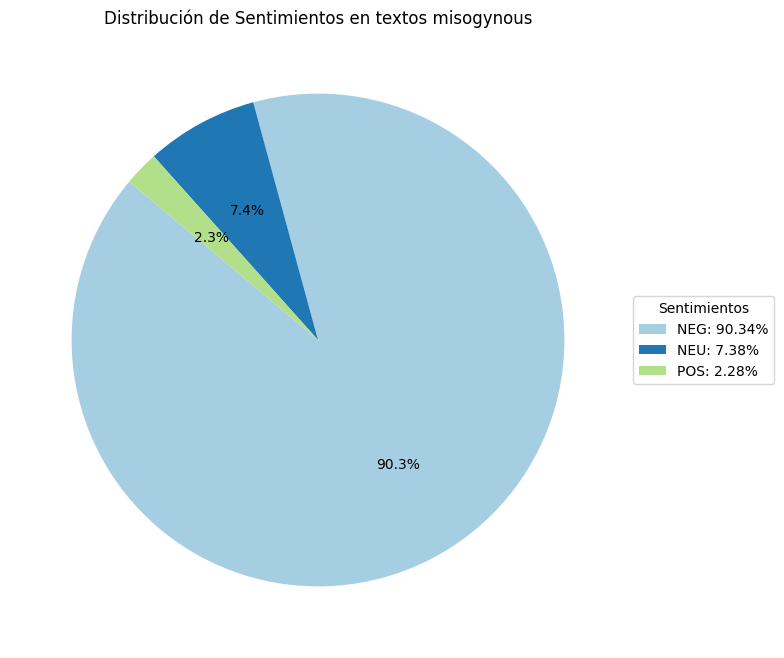

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos misogynous")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages_misogynous.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
print("\nEjemplos de cada tipo de sentimiento en textos misogynous:")
for sent_type, example in examples_per_sentiment_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos misogynous:
NEG: ['@twominbae cállate puta', '@Josumovic Puta Greta', '@monasterioR @julia_otero Eres patética', '@GretaThunberg Loca del coño', '@GretaThunberg cerda', '@outmarina Cállate puta de mierda', '@Valeryth_ Callate puta que te dejo en visto', '@LaFallaras Deja el alcohol cerda', '@AdaColau HIJA DE PUTA', '@Cannabianol Greta puta']

NEU: ['@LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica', 'La primera parada de transporte público equipada con cristales anti feminazis. http://t.co/', '@SinEmbargoMX greta la loca', '@LaFallaras @ContadorAltsasu Ojala sean muchos mas y contigo dentro pa q te manoseen un poco, cerda!!!!! http://t.co/', '@xeanort99 Sí, y que la menor se invente lo que quiera para condenarles a 38 años de cárcel, todo ok también. http://t.co/', 'Alguna feminazi te contó esto? http://t.co/', 'Mientras las feminazis juzgan Twitter hace su magia http://t.co/', '@FelyArianna @laSextaTV Seguro que ella


-----------------------------------------------

### Tweets no misogynous

-----------------------------------------------


In [22]:
text_not_misogynous = [text for text in df_misocorpus_train[df_misocorpus_train["label"] == 0]["tweet"].tolist()]
results_sentiment_analysis_not_misogynous = [analyze_sentiment(text) for text in tqdm(text_not_misogynous)]

  0%|          | 10/2797 [00:00<00:30, 92.59it/s]


-----------------------
Texto analizado: @jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 trozos de pizza ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8146587610244751, 'NEU': 0.17665155231952667, 'POS': 0.008689680136740208}

-----------------------
Texto analizado: Yo a mi jefe: yo vuelvo al restaurante pero no a fregar platos. Disney: toma, 7 meses pa fregar que se ve que no te hemos insistido suficiente con el contrato anterior que rechazaste.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8330945372581482, 'NEU': 0.16023096442222595, 'POS': 0.006674525793641806}

-----------------------
Texto analizado: @ElKillBulls @omarFermoselle @MariaMonte_16 A fregar todos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6731631755828857, 'NEU': 0.2609971761703491, 'POS': 0.06583960354328156}

-----------------------
Texto analizado: @Hammonyorkdista Estoy yendo a fregar para hacerle sitio al príncipe del infierno a las hord

  1%|          | 30/2797 [00:00<00:30, 90.94it/s]


-----------------------
Texto analizado: Bertín Osborne es un hijo de puta. Tú también. Provocar no es vestir una minifalda, es llevar una bandera de España a una manifestación independentista. Es que es como ir a una manifestación feminista y mandar a fregar. Pues te linchan. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9630970358848572, 'NEU': 0.029047047719359398, 'POS': 0.007855914533138275}

-----------------------
Texto analizado: @YaMamast Huchale ya me pasaste a fregar!!❗?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8321964144706726, 'NEU': 0.15491369366645813, 'POS': 0.01288988720625639}

-----------------------
Texto analizado: @JLozanoA Que pena que por obtener el poder se haya perdido del poco raciocinio e identidad que tenía este "politico" para volverse un seguidor ciego del presidente, y encima nos pasa a fregar a los poblanos... Grotesco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9857622385025024, 'NEU': 0.00932402815669775, 'POS

  2%|▏         | 50/2797 [00:00<00:29, 94.69it/s]


-----------------------
Texto analizado: “¿Cómo pueden dar espacio a una mocosa?” así se refirió Bolsonaro a Greta Thunberg http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8085240125656128, 'NEU': 0.16721729934215546, 'POS': 0.02425871603190899}

-----------------------
Texto analizado: @24h_tve @GretaThunberg ????? siii ha inventado una central electrica que funciona con aire. Que pensais la gente somos gilipollas o que ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8458799719810486, 'NEU': 0.13144874572753906, 'POS': 0.022671187296509743}

-----------------------
Texto analizado: “Es impresionante que la prensa le dé espacio a una mocosa como ella”: Bolsonaro sobre Greta Thunberg. Lea aquí la nota completa ➡️http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9130886197090149, 'NEU': 0.07361845672130585, 'POS': 0.013292939402163029}

-----------------------
Texto analizado: Histérica, marioneta y majareta: los insulto

  3%|▎         | 70/2797 [00:00<00:28, 94.45it/s]


-----------------------
Texto analizado: @ViKo_LH buaf a las 2, aqui los dominos a las 00:00 ya cortan y empiezan a fregar y tal a las 23:30
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2931688725948334, 'NEU': 0.6725534200668335, 'POS': 0.03427774831652641}

-----------------------
Texto analizado: El día que bajaste a la cocina a las 5:00 am @yami_despos y yo estaba ahí, esperando la muerte http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4308575391769409, 'NEU': 0.5295403003692627, 'POS': 0.03960214927792549}

-----------------------
Texto analizado: nunca olvidar cuando estaba durmiendo en la casa de novio y en una lo desperté a la madrugada porque tenía sed y no queria bajar sola a la cocina pues miedosa y el man SE DIO MEDIA VUELTA PARA SEGUIR DURMIENDO, ok gracias pd: fui a tomar agua del baño que esta al lado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5017951130867004, 'NEU': 0.46126052737236023, 'POS': 0.036944348365068436}

----------------

  3%|▎         | 90/2797 [00:00<00:29, 92.22it/s]


-----------------------
Texto analizado: @barcinator vale tu como yo ajkajja Es que me cuesta ponerme a fregar solo dos cosas prefiero que esté lo de un día y fregar solo una vez xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6345723867416382, 'NEU': 0.3541356027126312, 'POS': 0.011291958391666412}

-----------------------
Texto analizado: Enamora a menor por #Facebook y hasta le pidió ser novios; después abusó de ella http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5286238193511963, 'NEU': 0.4087928533554077, 'POS': 0.06258329749107361}

-----------------------
Texto analizado: 85 VIAJES A VENEZ. QUIEN LOS PAGÓ, FOTOS CON LOS MAYORES TRAFICANTES DE DROGAS DEL MUNDO, VIOLACIÓN DE LEYES LABORALES Y ROBO A TODO EL URUGUAY. PROCESADO SIN PRISIÓN. DIPUTADO FRENTEAMPLISTA HIJO PUTATIVO DE LA TRONCA ASESINA Y LA COMADREJA MUJICA! QUE LO SEPA EL MUNDO ENTERO!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9114834070205688, 'NEU': 0.0737834125757

  4%|▍         | 110/2797 [00:01<00:28, 93.82it/s]


-----------------------
Texto analizado: Que los chavales del arandina se han caído con todo el equipo lo saben hasta en el polo norte. Haya lo que haya hecho la chavala. Si no sabes torear pa que te metes, Manolete.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9602200388908386, 'NEU': 0.03418731689453125, 'POS': 0.005592683330178261}

-----------------------
Texto analizado: @PJoliCo Pues nada. Homicidio doloso 12 años, caer como un gilipollas en provocaciones de una menor, y swr un degenerado, 38 años, muy proporcional todo. Si la hubieran matado a puñaladas les caen 12 años como mucho..moraleja para criminales....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9628673195838928, 'NEU': 0.030069472268223763, 'POS': 0.007063181605190039}

-----------------------
Texto analizado: @PJoliCo Siento discrepar, pero mi madre que era tan analfabeta como sabia..., decía : " la que de 15 no es, de 20 no me la des... y que para ser puta y no ganar "na" , mejor ser mujer "honrá"...

  5%|▍         | 131/2797 [00:01<00:27, 95.77it/s]


-----------------------
Texto analizado: @orelmorales44 @tar_ab_elo @Koalemos4 @Bagaudas @pablom_m @MikelMoso ??? http://t.co/ Pues que los medios dicen cosas contradictorias, mejor ver lo que se dice en la sentencia. Y la sentencia no dice en ningún momento, que ellos reconocieran las relaciones.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7050817608833313, 'NEU': 0.27086490392684937, 'POS': 0.024053318426012993}

-----------------------
Texto analizado: Reporte Mundial 2019 @hrw_espanol @hrw:La impunidad x delitos violentos y violaciones d DDHH siguen siendo problemas serios. En Bolivia la admin del (ex) Pdte Evo Morales ha creado 1 ambiente hostil para defensores d los DDHH q socava su capacidad d trabajar d forma independiente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9664267301559448, 'NEU': 0.02853098139166832, 'POS': 0.005042314529418945}

-----------------------
Texto analizado: Informe de Naciones Unidas por crisis social en Chile: “Se han producido un ele

  5%|▌         | 151/2797 [00:01<00:27, 95.97it/s]


-----------------------
Texto analizado: @mishellyorozco La gente por A o por B van a fregar, así que ánimo mija póngase su short ?????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.764426052570343, 'NEU': 0.21708130836486816, 'POS': 0.01849270612001419}

-----------------------
Texto analizado: Que suerte tienen ustedes que no los mandaron a fregar y deben estar hasta la pinga de borrachos ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.865230143070221, 'NEU': 0.1153881773352623, 'POS': 0.019381724298000336}

-----------------------
Texto analizado: Ve, que sigamos gritando nos pide @Margaritarosadf . http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4207742512226105, 'NEU': 0.5045121908187866, 'POS': 0.0747135728597641}

-----------------------
Texto analizado: Tengo miedo por el coronavirus. No por mi, sino por la gente que ama la vida y esto se las viene a fregar. Me dicen que no me preocupe, que solo un pequeño % se complica. No sabe esa persona que 

  6%|▌         | 171/2797 [00:01<00:28, 92.19it/s]


-----------------------
Texto analizado: La pena de prisión x violación es 6 a 12 años. Si le han condenado a 24 meses es por: 1. No fue violación 2. Le apreciaron unas atenuantes muy cualificadas 3. Fue una tentativa, la acción no se consumó No mezcléis unos delitos con otros ni 1 condena con 1 petición de fiscal http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5514949560165405, 'NEU': 0.3908015787601471, 'POS': 0.0577034167945385}

-----------------------
Texto analizado: ¿Es posible decretar duelo nacional por la violación a los Derechos Humanos, al igual que se está haciendo por la tragedia del Hércules C-130?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7812539339065552, 'NEU': 0.20927825570106506, 'POS': 0.009467806667089462}

-----------------------
Texto analizado: La CIDH demanda la creación de un Grupo Internacional de Expertos Independientes, para investigar las graves violaciones a los derechos humanos durante la crisis post electoral que dejó 36 m

  7%|▋         | 192/2797 [00:02<00:27, 96.25it/s]


-----------------------
Texto analizado: Estoy aburrida de escuchar comentarios como: “¿una niña diciendo groserías?”, “es qué hay mujeres que no son tan femeninas”, “a mi esas feminazi no me representan, que boleta” ¡Que puto fastidio! Y que tristeza que quienes lo dicen, son mujeres... ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.989061713218689, 'NEU': 0.008565396070480347, 'POS': 0.0023730075918138027}

-----------------------
Texto analizado: Yo intentando tener una discusión sobre feminismo con un hombre sin que me llame "feminazi" o "sobaco verde" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5963489413261414, 'NEU': 0.3699335753917694, 'POS': 0.03371749073266983}

-----------------------
Texto analizado: @elpalomasjd Estas mal informado sobre el tema, no solo son palabras, es el contexto en el que se están diciendo. Es muy fácil responder a cualquier noticia como esta con un “feminazis hptas” cuando no eres conocedor del trasfondo que trae...
Sent

  8%|▊         | 213/2797 [00:02<00:26, 97.76it/s]


-----------------------
Texto analizado: @marianavilab Tocador es un poco machista y misógino, no?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8949708342552185, 'NEU': 0.09249360114336014, 'POS': 0.012535636313259602}

-----------------------
Texto analizado: @upxitsaria @Jestornu2 Reaccionario, es como cuando supuestos ML dicen que hay 2 millones de catalanes que quieren la independencia, y??? Somos materialistas y no idealistas, lo que ellos se sientan es una cosa y lo que son en realidad es otra. Él feminismo solapa la lucha de clases y convierte a+
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9519093632698059, 'NEU': 0.04249584302306175, 'POS': 0.005594851914793253}

-----------------------
Texto analizado: @LaTCorrupta @Ndemoniado Cultura de la delincuencia y del secuestro de menores es esto? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9061136245727539, 'NEU': 0.08695320785045624, 'POS': 0.006933189928531647}

-----------------------
Texto a

  8%|▊         | 233/2797 [00:02<00:26, 96.66it/s]


-----------------------
Texto analizado: El machismo en Venezuela es tal que al programa "Lo que callamos las mujeres" le cambiaron el nombre a "Lo que callan las mujeres" porque el voice over de la presentación la hace un hombre. ?‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9361998438835144, 'NEU': 0.061164941638708115, 'POS': 0.0026351583655923605}

-----------------------
Texto analizado: Que patético quedas usando el"feminazi".Que poca historia tenés sino sabrías todo el mal que hicieron los nazis contra los judíos , homosexuales y todas las personas q vayan en contra de ellos. Nosotras nos manifestamos para q nuestras voz se escuche .No matamos a machirulos . http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9670590758323669, 'NEU': 0.024876872077584267, 'POS': 0.008063960820436478}

-----------------------
Texto analizado: El dolor de ser consciente de tu existencia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9149893522262573, 'NEU': 0.07881

  9%|▉         | 254/2797 [00:02<00:25, 98.19it/s]


-----------------------
Texto analizado: @Irene_HH88 @elisabeni Q machista eres, con mujeres como tu no necesitamos hombres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9720295071601868, 'NEU': 0.019023658707737923, 'POS': 0.008946782909333706}

-----------------------
Texto analizado: @JellyZombie "Feminista desde siempre" jajajajajaj wn chistoso y ególatra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8996769785881042, 'NEU': 0.07249554246664047, 'POS': 0.027827441692352295}

-----------------------
Texto analizado: @MMagan82 El feminismo del siglo XXI. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4785415232181549, 'NEU': 0.39655178785324097, 'POS': 0.12490670382976532}

-----------------------
Texto analizado: @alfonsvarela No sé si es el rugby lo que les pudre el cerebro, quiero creer q no pq estoy a favor del deporte. Pero tmp te vengas a hacer el piola diciéndole a una mina como vivir su feminismo. La desconstrucción es para todxs, para vos y

 10%|▉         | 274/2797 [00:02<00:26, 94.35it/s]


-----------------------
Texto analizado: Bolsonaro le dice ‘mocosa’ a Greta Thunberg #LasNoticias con @ClaudioOchoaH http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5952343940734863, 'NEU': 0.30976277589797974, 'POS': 0.09500283002853394}

-----------------------
Texto analizado: Greta Thunberg viendo como soy un idiota empacando regalos y desperdicio mucho papel http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9598265886306763, 'NEU': 0.037093378603458405, 'POS': 0.0030800816603004932}

-----------------------
Texto analizado: Ya está bien de esta estupida cancel culture de perfección moral. A mi me la suda su vida privada y lo que haga aparte de la audiencia, seguiré viendo las películas de Greta Thun... De Woody Allen.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8812930583953857, 'NEU': 0.09827406704425812, 'POS': 0.02043292485177517}

-----------------------
Texto analizado: #CuartoMilenio Iker no te preocupes si a Greta no la comparan c

 11%|█         | 294/2797 [00:03<00:26, 96.24it/s]


-----------------------
Texto analizado: Posibles violadores http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5536607503890991, 'NEU': 0.34977421164512634, 'POS': 0.09656500071287155}

-----------------------
Texto analizado: Bolsonaro llama “mocosa” a Greta Thunberg http://t.co/ vía @24matins_es #10Dic #Noticias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4788624942302704, 'NEU': 0.46439993381500244, 'POS': 0.05673753842711449}

-----------------------
Texto analizado: Avisenle a @jairbolsonaro quién está en la Revista @time hoy ? Jair Bolsonaro llamó “mocosa” a Greta Thunberg: la reacción de la activista - Infobae http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6259776949882507, 'NEU': 0.32275182008743286, 'POS': 0.0512704998254776}

-----------------------
Texto analizado: @greta_bond19 Puta madre tengo ganas de verla
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2931492328643799, 'NEU': 0.31845343112945557, 'POS': 0.38839736580848

 11%|█         | 304/2797 [00:03<00:25, 97.04it/s]


-----------------------
Texto analizado: Cuando vamos a sacarnos esos términos de mierda para calificar a las mujeres?! Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg | Tecnología | EL PAÍS http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760740995407104, 'NEU': 0.021800560876727104, 'POS': 0.0021253612358123064}

-----------------------
Texto analizado: y habrá gente que creerá que tengo algo en contra de greta lol, pero si es una cria, igual de estúpida la gente que la alaba creyendo que es la salvadora de planeta como la gente que la insulta y se mete con ella.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9350628852844238, 'NEU': 0.05635528638958931, 'POS': 0.0085817975923419}

-----------------------
Texto analizado: Bolsonaro llama 'mocosa' a Greta Thunberg http://t.co/ vía @diariopanorama
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5561164021492004, 'NEU': 0.3431116044521332, 'POS': 0.100771963596344

 12%|█▏        | 324/2797 [00:03<00:27, 89.41it/s]


-----------------------
Texto analizado: Chadwick asegura que jamás permitió violación a los DD.HH. » http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4517969489097595, 'NEU': 0.390756756067276, 'POS': 0.1574462503194809}

-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/ via @elpais_tec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571296572685242, 'NEU': 0.03735091909766197, 'POS': 0.005519397556781769}

-----------------------
Texto analizado: Bolsonaro sorprendido por lo mediática que es Greta y la tilda de «mocosa» http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6786664724349976, 'NEU': 0.24661225080490112, 'POS': 0.0747213065624237}

-----------------------
Texto analizado: “Es impresionante que la prensa le dé espacio a esa mocosa”, dijo el mandatario, y repitió: “Esa mocosa”. @CronicaBalear_ #Greta #Bolsonaro http://t.co/
Sen

 12%|█▏        | 344/2797 [00:03<00:27, 90.77it/s]


-----------------------
Texto analizado: @el_pais Muy fuerte pero a ver si por aqui tanto Eguren como Del Rio y Cipriani tomen esa decision fatal y harian bien a la Curia Catolica lleno de Pederastas, violadores y los mencionados los defiende, sobre todo a los del Sodalicio que tienen una mochila pesada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9736579060554504, 'NEU': 0.021694369614124298, 'POS': 0.004647758323699236}

-----------------------
Texto analizado: #SepaQue El Centro de Derechos Humanos de la Ucab hizo un llamado a las autoridades colombianas a "garantizar el debido proceso y todos los DDHH a cualquier persona sometida a un procedimiento administrativo que pueda conducir a la deportación o expulsión” http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16266869008541107, 'NEU': 0.7719892263412476, 'POS': 0.06534209102392197}

-----------------------
Texto analizado: Según Piñera : 6. No hay violaciones de los DDHH en Chile porque no "hay un patrón d

 13%|█▎        | 364/2797 [00:03<00:27, 88.29it/s]


-----------------------
Texto analizado: @InesArrimadas Ese es un hijo de puta y el periodista que lo anima un cabrón
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9666863083839417, 'NEU': 0.02240176685154438, 'POS': 0.010911878198385239}

-----------------------
Texto analizado: @cayetanaAT Son de ñordia no tenen puta ideia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8905348181724548, 'NEU': 0.0739888921380043, 'POS': 0.035476382821798325}

-----------------------
Texto analizado: @cayetanaAT No tiene ni puta idea y los que la apoyan tampoco no saben nada y se erigen como si fueran maestros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9684770107269287, 'NEU': 0.02510843053460121, 'POS': 0.00641460670158267}

-----------------------
Texto analizado: @Irene_Montero_ A mi me viene gritando de esas maneras y directamente la mando a la puta mierda o a tomar por el culo, donde prefiera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9384622573852539, 'NEU': 0.

 14%|█▎        | 383/2797 [00:04<00:26, 91.59it/s]


-----------------------
Texto analizado: DATO: Luego de 38 años se repite una final mundial entre @Flamengo ?? y #Liverpoolfc ???????. El 13 de Diciembre de 1981 los brasileños ganaron la antigua Copa Intercontinental ?, tras golear 3-0 con doblete de João Batista Nunez y un tanto de Adílio de Oliveira. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13815927505493164, 'NEU': 0.7375397086143494, 'POS': 0.12430097907781601}

-----------------------
Texto analizado: Irmão a gente ta na final do mundial dps de 38 anos com o mesmo adversario de 38 anos atras, vc realmente acha q a gente vai por os pés no chão agora???? Kkkkkk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6332775950431824, 'NEU': 0.2520486116409302, 'POS': 0.11467374861240387}

-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu No Cristina no!! Eso no es una locura es una puta VENGANZA. Por desgracia no es la primera ni sera la ultima.
Sentimiento detectado: NEG
Probabilidades: {

 14%|█▍        | 404/2797 [00:04<00:25, 94.83it/s]


-----------------------
Texto analizado: @fladaniel_ @LFC @centraldanacao @Flamengo Galinha de Quintino ! Com Seleção ganhou o que? Por isto Todo o resto do Brasil Oodeeiiaa vcs!38 anos sem p. Nenhuma agora o cu pisca!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3231181204319, 'NEU': 0.4312557876110077, 'POS': 0.24562612175941467}

-----------------------
Texto analizado: puro DRAMA hateando algo que puedes disfrutar en paz y amar, pero verdad que la mayoria son puros incel de 38 años llorones
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.956626832485199, 'NEU': 0.03559667244553566, 'POS': 0.007776519749313593}

-----------------------
Texto analizado: "Aranda será feminista o no será", "Aranda será la tumba del machismo" . Cientos de personas se concentran en apoyo de la víctima de La Arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5714787244796753, 'NEU': 0.3213430643081665, 'POS': 0.1071782112121582}

-----------------------
Texto analizad

 15%|█▌        | 425/2797 [00:04<00:24, 97.15it/s]


-----------------------
Texto analizado: @monasterioR Tú no has visto Star Wars en tu puta vida, Hulia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9180259704589844, 'NEU': 0.06993892043828964, 'POS': 0.012035157531499863}

-----------------------
Texto analizado: @monasterioR @julia_otero La ganadería y agricultura son algunas de las actividades que más contaminan (sobre todo la primera) y vienes aquí a decir la mierda que dices. No tienes ni puta idea. Ve a ponerle unas velitas a Franco y a levantar la manita, que es para lo que servís.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9721512794494629, 'NEU': 0.021180039271712303, 'POS': 0.0066686635836958885}

-----------------------
Texto analizado: @monasterioR @julia_otero Tú sí q no tienes ni puta idea de lo q es el campo. Ven y te explico yo como es, con clases prácticas...ya verás q pronto se te quita esa sonrisa de la cara...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.3993939161300659, 'NEU': 0.3593809

 16%|█▌        | 445/2797 [00:04<00:24, 94.30it/s]


-----------------------
Texto analizado: Una mujer de 38 años se casó con un hombre de 38 años y en 1 recamara con 3 ventanas hicieron 3838 13 http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10942903161048889, 'NEU': 0.7868136763572693, 'POS': 0.10375723987817764}

-----------------------
Texto analizado: @BeatrizGimeno1 @Sergio01210846 Si es violacion ,altas penas ,si es con fuerza ,drogas,etc .mayor pena .si es menor mayor todavia ....pero violacion es si no es consentido ....hay la duda 38 años a personas que no tienen 20...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7106969356536865, 'NEU': 0.27555444836616516, 'POS': 0.01374859269708395}

-----------------------
Texto analizado: @ribeirlice Eu vou ser o cara de 30 que o pessoal vai fazer aqueles documentários "Ele tem 38 anos, mas pensa que ainda tem 14 anos"
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2749219238758087, 'NEU': 0.5185099244117737, 'POS': 0.2065681368112564}

-------------------

 17%|█▋        | 465/2797 [00:04<00:25, 90.98it/s]


-----------------------
Texto analizado: Engraçado os antis dizendo que estamos empolgados. Não me venha com hipocrisia. Esperamos 38 anos por isso. Não sabemos o que rolará no sábado, então o momento é pra ser desfrutado. Se seu time não te proporciona empolgação, o problema não é do Flamengo. É seu.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5900781750679016, 'NEU': 0.22393007576465607, 'POS': 0.18599174916744232}

-----------------------
Texto analizado: @mariioalvarezzz @RobertoJauregiM @OpenMinded40 @Piticlina1989 Es evidente que lo que hacen es de desvergonzados, y yo creo que deben pisar la cárcel, pero 38 años...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9414666295051575, 'NEU': 0.049617648124694824, 'POS': 0.008915687911212444}

-----------------------
Texto analizado: @susanadiaz Tal día como hoy CumFraude se reúnen con EH Bildu, olvidándose de los centenares asesinados por ETA, y tú no dices que los diputados socialistas andaluces votarán NO a la invest

 17%|█▋        | 485/2797 [00:05<00:24, 93.77it/s]


-----------------------
Texto analizado: @gmm223 En libertad hasta que tome el Tribunal la decisión de si ingresan o no, pero si los han dejado irse será porque no van a entrar finalmente. Muy loco todo, 38 años encima y en la calle.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7064407467842102, 'NEU': 0.2772137224674225, 'POS': 0.01634548231959343}

-----------------------
Texto analizado: VÍDEO ▶️| Libertad provisional a los tres exjugadores de la Arandina ?? Fiscalía y acusaciones solicitaban la prisión provisional incondicional para evitar el riesgo de fuga, por la gravedad del delito y por las penas elevadas http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20028920471668243, 'NEU': 0.7321369051933289, 'POS': 0.0675738975405693}

-----------------------
Texto analizado: @SofCastanon ¿Qué coño me estás contando? El caso de Arandina es un caso concreto, no se está acusando a todas las mujeres. Solo a una, porque hay pruebas de que no es violación y ha mentid

 18%|█▊        | 505/2797 [00:05<00:24, 95.28it/s]


-----------------------
Texto analizado: Multa de hasta 20 millones y 5 años de cárcel por difundir los audios de la víctima de la Arandina http://t.co/ via @ABC_CastyLeon
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6816022992134094, 'NEU': 0.2799716591835022, 'POS': 0.03842603787779808}

-----------------------
Texto analizado: @bunnyboye_ E meu primo de 38 anos se nega a jogar pois e um game 2d e o personagem parece um dente arrancado ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8885317444801331, 'NEU': 0.092514269053936, 'POS': 0.018953969702124596}

-----------------------
Texto analizado: @Alvisepf #CasoArandina #arandina ?El feminismo es un juez, que nos juzga x nacer.... Y el resultado, esta sentencia que ya ves!!! Y la culpa no era mia si tu estabas donde querías y la culpa no era mia Si solo buscabas adrenalina!! LA MENTIROSA ERES TÚ!!! #aranda #justicia #sioscreo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8012478947639465, 'NEU': 0.18819709122180

 19%|█▉        | 525/2797 [00:05<00:23, 95.75it/s]


-----------------------
Texto analizado: Estos pederastas no sólo difunden audios sobre la menor violada, además se mofan de la víctima y de quienes lo denunciamos #arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9146797060966492, 'NEU': 0.07832939922809601, 'POS': 0.006990915630012751}

-----------------------
Texto analizado: "Cabezas de turco". Los condenados por agresión sexual en el caso del Arandina siguen negando los hechos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.828086793422699, 'NEU': 0.15710808336734772, 'POS': 0.014805089682340622}

-----------------------
Texto analizado: La Asamblea Feminista de Aranda convoca una concentración de apoyo a la víctima del 'caso Arandina' http://t.co/ Lo cuenta @Radio_Aranda http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4408884346485138, 'NEU': 0.38614776730537415, 'POS': 0.17296381294727325}

-----------------------
Texto analizado: @LaikaOrbital Arandina?? ???
Sentim

 19%|█▉        | 545/2797 [00:05<00:23, 95.16it/s]


-----------------------
Texto analizado: Depois de 38 anos, tem o Melhor do mundo de volta ao Mundial... VAI PRA CIMA DELES MENGOOOOO ❤?❤?❤?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07771945744752884, 'NEU': 0.16100355982780457, 'POS': 0.7612769603729248}

-----------------------
Texto analizado: 38 años que en la cancha no se notan por el esfuerzo, huevo y corazón que dejas cada domingo en la cancha. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07656096667051315, 'NEU': 0.11642391979694366, 'POS': 0.8070151209831238}

-----------------------
Texto analizado: Con Blasco Ibañez, decir que en España se aborrece siempre el sexo, cuando son otros los que lo practican. La condena a los jugadores de la #Arandina devuelve a España a sus épocas más oscuras, luego os quejais si desde Flandes os recordamos la Leyenda Negra que forjais.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9725548028945923, 'NEU': 0.02457239106297493, 'POS': 0.002872870769351721}


 20%|██        | 565/2797 [00:06<00:24, 92.65it/s]


-----------------------
Texto analizado: @Mariana48190681 @lavecinadearri3 @Genu31759908 @Marcos19805 @JuanfraEscudero Con todas te incluyes, creo que la chica que denunció a los de Arandina es más madura que tú. Pero me van a salir las Navidades gratis
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28753358125686646, 'NEU': 0.6574771404266357, 'POS': 0.05498930439352989}

-----------------------
Texto analizado: Que sí...q.yo también tengo mi opinión sobre la sentencia de los jugadores de la #Arandina.... Y sí, efectivamente me la guardo. Principalmente porque creo q no tengo conocimiento suficiente. Y por q esto de no opinar me está gustando.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4145074188709259, 'NEU': 0.5408101677894592, 'POS': 0.044682394713163376}

-----------------------
Texto analizado: En cuanto a lo de la Arandina: la pena es un poco desmedida pero acostarse con una menor es siempre violación, y más teniendo un estatus como futbolista y algo de dinero
S

 21%|██        | 575/2797 [00:06<00:25, 87.57it/s]


-----------------------
Texto analizado: @Persona_regular @anarob12 @Malequith Mi argumento, ESCUCHA LOS AUDIOS y ten criterio propio. Con las brujas de Salen no hubo AUDIOS y en este caso la hoguera son 38 años, algo totalmente desproporcionado cuando en España, hay condenas de 2 o 5 años en casos de muerte... Si tu argumento es insultar mal vamos ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9110162258148193, 'NEU': 0.08195792138576508, 'POS': 0.007025840226560831}

-----------------------
Texto analizado: Caso #Arandina: Un pueblo partido por la banda http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6031269431114197, 'NEU': 0.36480197310447693, 'POS': 0.03207101672887802}

-----------------------
Texto analizado: Caso Arandina: por qué te pueden caer años de cárcel por difundir los audios de la víctima http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5108025074005127, 'NEU': 0.4412010610103607, 'POS': 0.04799649119377136}

---

 21%|██▏       | 595/2797 [00:06<00:24, 89.68it/s]


-----------------------
Texto analizado: @KaioCsarGB lkkkkkkkkkkkkkkj 38 anos pra não assistir por causa de CN?? Sei não ???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5202518105506897, 'NEU': 0.36868584156036377, 'POS': 0.11106235533952713}

-----------------------
Texto analizado: @OndaCero_es @julia_otero Viendo algunos comentarios a algunos les parece poca condena 38 años por una felación. Quieren cadena perpetua?. Se observa que el movimiento feminazi sigue avanzando.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9159815907478333, 'NEU': 0.07753488421440125, 'POS': 0.006483485456556082}

-----------------------
Texto analizado: Tiene pintas de Cura depravado. Vaya careto. 38 años de cárcel mínimo pichasss, que digo yo... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9525439739227295, 'NEU': 0.03670596331357956, 'POS': 0.010750045999884605}

-----------------------
Texto analizado: ?Video de @IsaacParejo sobre el caso: http://t.co/ ?Video de @a

 22%|██▏       | 615/2797 [00:06<00:24, 88.66it/s]


-----------------------
Texto analizado: @PicBravedick @MariaJamardoC Los 38 años es debido a dos penas por cooperación necesaria
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1139090359210968, 'NEU': 0.8310495018959045, 'POS': 0.055041417479515076}

-----------------------
Texto analizado: @Carmen06755533 @ebecadal @djmixe01 @camino_bueno @samuelbeticovlc @Andrea_Lazaro_8 @juvini100 Yo realmente entiendo la concentración. Tendrán familiares, amigos, algún radical político y forofos de la Arandina que no ven más allá del hecho de ser de su equipo de fútbol (unga, unga). Eso juntará unos 200 que solo verán eso. Que son sus colegas a los que hay que apoyar. ?‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.559572696685791, 'NEU': 0.41502317786216736, 'POS': 0.02540406584739685}

-----------------------
Texto analizado: 3- grupo de hombres viola a niña de 14 años borracha y drogada, inconsciente. -12 AÑOS DE PRISIÓN. 4- grupo de hombres viola niña de 15 años. -38 AÑOS DE P

 23%|██▎       | 632/2797 [00:06<00:28, 75.23it/s]


-----------------------
Texto analizado: ?DIRECTO| @AGUSTINMART, abogado de 'La Manada', sobre la condena a los exjugadores de la Arandina: “Hay una condena porque hay un cierto pavor por parte de algunos miembros de la autoridad judicial a ser la portada del periódico de mañana y ser tachado de misógino” #ESPejo13D http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9329403638839722, 'NEU': 0.06075778603553772, 'POS': 0.006301763467490673}

-----------------------
Texto analizado: Excelente hilo. ¿Lo siguiente, querida #España? ¡dejen de votar a @vox_es y a cualquier partido que justifique esto! Super sencillo para que algunas cosas mejoren. #Arandina http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3939611315727234, 'NEU': 0.5434341430664062, 'POS': 0.06260471045970917}

-----------------------
Texto analizado: @_PabloFdez_ Debería haberse cantado hoy en la concentración que va a haber en #Bembibre a favor de los violadores de la arandina. Qué pena.
Se

 23%|██▎       | 640/2797 [00:06<00:29, 73.44it/s]


-----------------------
Texto analizado: @StrangeLetrado @IsaacParejo: Llevo la mitad de la sentencia del caso Arandina. Es que no doy crédito a los hechos "probados". Parece una puta broma de mal gusto si no fuera porque les han caído 38 años. De verdad, es ALUCINANTE. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9690659642219543, 'NEU': 0.02616061456501484, 'POS': 0.004773488733917475}

-----------------------
Texto analizado: @LaFallaras Tia! Asi de amigui a amigui... no te flipes, q hay una parte q no tienes ni zorra, Puigdemont les salió rana, no queria chuparla a los d ñ a partir de ahí tu teoria se desconjuaringa, vas mal, muuu mal... para hablar de estas teorías empecemos x hablar de Madriz y Pujol...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.92949378490448, 'NEU': 0.06376255303621292, 'POS': 0.006743653677403927}

-----------------------
Texto analizado: Es fa difícil no estranyarse si comparem els casos del exmarit de Mónica Oltra y el dels ju

 23%|██▎       | 656/2797 [00:07<00:30, 70.43it/s]


-----------------------
Texto analizado: As 500 peroas, se é que son 500, que se manifestan en favor dos violadores da Arandina, merecen todo o desprezo como cómprices dunha violación en grupo a unha menor. En que carallo de mundo viven?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8714780211448669, 'NEU': 0.10171348601579666, 'POS': 0.02680843137204647}

-----------------------
Texto analizado: @AlxandraGil Listado de todos los periódicos que hicieron el copia-pega: @elperiodico: http://t.co/ @lavozdegalicia: http://t.co/ @20m: http://t.co/ @LaVanguardia: http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21383613348007202, 'NEU': 0.677709698677063, 'POS': 0.1084541529417038}

-----------------------
Texto analizado: De la Manada a la Arandina: las posibles condenas por difundir datos privados de una víctima | Newtral http://t.co/, see more http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7193248271942139, 'NEU': 0.23334187269210815, 'POS': 0.0

 24%|██▍       | 671/2797 [00:07<00:30, 68.70it/s]


-----------------------
Texto analizado: @CristinaSegui_ Pero tu no eras la que defensabas a los violadores de las Arandina? Que violaron a una niña de 15 años! También defiendes las violaciones en este libro de mierda?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9608067870140076, 'NEU': 0.03403034061193466, 'POS': 0.005162872839719057}

-----------------------
Texto analizado: @LeticiaDolera @CeliaFreijeiro @PremiosFeroz Loca por veros bailar
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06942291557788849, 'NEU': 0.26875928044319153, 'POS': 0.661817729473114}

-----------------------
Texto analizado: @_Dharma17 @fstmog Los de la Arandina van a pagar por todos los demás!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4759194850921631, 'NEU': 0.4603154957294464, 'POS': 0.06376510113477707}

-----------------------
Texto analizado: @OscarZamarreno @ElGlitchArt @PhilAMellows Y que pruebas hay en el caso del Arandina a parte de la declaración de la chica y de los chi

 25%|██▍       | 686/2797 [00:07<00:29, 70.67it/s]


-----------------------
Texto analizado: @vox_es ¿Esto es un hilo sobre el caso Arandina? Quién lo diría, sí es así, ¿por qué no mencionan al Diputado Ángel López Maraver que pidió cadena perpetua para los chicos sin esperar la sentencia del recurso? Soy de VOX, y mi voto es para VOX, pero esto que se ha hecho es una canallada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9480518102645874, 'NEU': 0.045877572149038315, 'POS': 0.006070604082196951}

-----------------------
Texto analizado: El ‘negro de Vox’ filtra los audios de la víctima del Arandina en Twitter via @El_Plural http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7826696038246155, 'NEU': 0.18471390008926392, 'POS': 0.032616518437862396}

-----------------------
Texto analizado: Llamadme raro, pero creo que lo grave del caso #Arandina es que muestra el resultado de hipersexualizar la sociedad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9647195339202881, 'NEU': 0.030190465971827507, 'POS': 0.

 25%|██▌       | 702/2797 [00:07<00:29, 71.57it/s]


-----------------------
Texto analizado: @EnricLopez8 @vox_es La prueba es la Sentencia de la Arandina
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10346439480781555, 'NEU': 0.817604660987854, 'POS': 0.07893096655607224}

-----------------------
Texto analizado: @vox_es 2-no os pronunciais en el caso #arandina porque a vuestros ojos fascistas encarnan la imagen de buenos chicos muy mucho españoles. si fueran inmigrantes ya los hubierais mandado al paredon.a nostras nos VIOLAN hombres, no pasaportes!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9431000351905823, 'NEU': 0.05103509500622749, 'POS': 0.005864880979061127}

-----------------------
Texto analizado: hai tanta contradición na xente de vox á que lle parece excesiva a condena de 38 anos para o caso arandina como na xente de esquerdas que se alegra das condenas infinitas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8390952348709106, 'NEU': 0.130609393119812, 'POS': 0.03029533289372921}

-------------------

 25%|██▌       | 710/2797 [00:08<00:30, 67.63it/s]


-----------------------
Texto analizado: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9549563527107239, 'NEU': 0.0381074883043766, 'POS': 0.006936087738722563}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Pues permíteme decir que los que trabajan en la revista son gilipollas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8502212166786194, 'NEU': 0.1318366378545761, 'POS': 0.01794210448861122}

-----------------------
Texto analizado: No hace falta ser una “mocosa” para saber que el descerebrado de Jair Bolsonaro es un corrupto asesino de tribus indígenas y también de los que no son indígenas. http://t.co/ vía @SputnikMundo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9445337057113647, 'NEU': 0.04577308148145676, 'POS': 0.009693202562630177}

-----------------------
Texto analizado: @TheAbetus @OdiaConFripozo Creo que en ningún momento 

 26%|██▌       | 725/2797 [00:08<00:31, 66.01it/s]


-----------------------
Texto analizado: Hay que admirar a @GretaThunberg. Después de que Jair Bolsonaro le llamase «pirralha» (mocosa), se lo ha puesto de biografía de Twitter. Con dos ovarios.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.4083157479763031, 'NEU': 0.17598216235637665, 'POS': 0.41570210456848145}

-----------------------
Texto analizado: ENTÉRATE: "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil - RT http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7608194351196289, 'NEU': 0.20032326877117157, 'POS': 0.03885727748274803}

-----------------------
Texto analizado: El primer mandatario de Brasil se refirió a la joven activista como "mocosa" luego de su denuncia http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4153831899166107, 'NEU': 0.49287423491477966, 'POS': 0.09174257516860962}

-----------------------
Texto analizado: @feider79 @GretaThunberg Jajaja más mierda eres tu

 26%|██▋       | 739/2797 [00:08<00:33, 62.01it/s]


-----------------------
Texto analizado: #10Dic #Cuba: Ejemplo de falta de etica y moral, me perdona #Brasil, pero como han podido elegir a Grosero, que mentira les hizio creer: Dijo; "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil - RT http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9200524687767029, 'NEU': 0.07402792572975159, 'POS': 0.005919544957578182}

-----------------------
Texto analizado: Bolsonaro la llamó “mocosa” y esta fue la respuesta de Greta. | #Super7FM #COP25 #COP25Madrid @GretaThunberg @jairbolsonaro #pirralha http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17888447642326355, 'NEU': 0.7433183193206787, 'POS': 0.07779722660779953}

-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter http://t.co/ ¡Madremiaaaaaa!!!! Leer todos los datos, y después a Trump y echar a correr. Pero ¿adonde?
Senti

 27%|██▋       | 755/2797 [00:08<00:30, 67.13it/s]


-----------------------
Texto analizado: “Es impresionante que la prensa le dé espacio a una mocosa como ella, una mocosa” dijo @jairbolsonaro sobre @GretaThunberg. http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9527534246444702, 'NEU': 0.03931879624724388, 'POS': 0.007927744649350643}

-----------------------
Texto analizado: nosotras: hola somos fleteras mutual: ?????? nosotras: fleteras llora pija gc de greta mutual: ... nosotras: queremos chuparle la pija a un kiszka mutual: ahhh filho da puta agora sim entendo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4396907091140747, 'NEU': 0.4965965449810028, 'POS': 0.06371268630027771}

-----------------------
Texto analizado: ¡Jair Bolsonaro llama "mocosa" a Greta Thunberg! Toda la información en #ImagenNoticas con @YuririaSierra http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.40170758962631226, 'NEU': 0.3955153524875641, 'POS': 0.20277708768844604}

-----------------------
Texto a

 28%|██▊       | 775/2797 [00:08<00:24, 81.31it/s]


-----------------------
Texto analizado: Bolsonaro llamó "mocosa" a Greta Thunberg. Ese es el nivel de frivolidad con el que este sujeto gobierna el país con la mayor reserva forestal del planeta. Gracias a tipos como éste (y todos los Trump del planeta), surgen líderes como Greta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.877979040145874, 'NEU': 0.09078947454690933, 'POS': 0.031231429427862167}

-----------------------
Texto analizado: Presidente Bolsonaro (@jairbolsonaro) se refiere a Greta Thunberg como una “mocosa” http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39017394185066223, 'NEU': 0.4923783242702484, 'POS': 0.11744770407676697}

-----------------------
Texto analizado: ⚡ Presidente de Brasil llama “mocosa” a Greta Thunberg http://t.co/ #América http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4185914099216461, 'NEU': 0.5329113602638245, 'POS': 0.048497267067432404}

-----------------------
Texto analizado: El País ú

 28%|██▊       | 794/2797 [00:09<00:23, 84.95it/s]


-----------------------
Texto analizado: ? Hay modales y luego está el comportamiento de @jairbolsonaro. El presidente de Brasil criticó así a #GretaThunberg, quien se pronunció por un ataque a indígenas en la Amazonia. ⬇️ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6127821207046509, 'NEU': 0.3680800497531891, 'POS': 0.019137853756546974}

-----------------------
Texto analizado: Pregunta en serio, cuando alguien le explique a Greta Thunberg que su propia respiración genera CO2: ¿Le explotará el cerebro y se quedará en coma autista de por vida? ¿Se quemará a lo bonzo, y decenas de miles de gilipollas en todo el mundo seguirán su ejemplo?!! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.922721803188324, 'NEU': 0.0721064880490303, 'POS': 0.0051717269234359264}

-----------------------
Texto analizado: No haceis ni puta gracia haciendo chistes de que si la Greta Thunberg se mete cosas colega que es una puta cría
Sentimiento detectado: NEG
Probabil

 29%|██▉       | 814/2797 [00:09<00:22, 89.15it/s]


-----------------------
Texto analizado: Tusa - Carol G Pero si le ponen la canción (Hmm) Le da una depresión tonta Llorando lo comienza a llamar Pero él la dejó en buzón (No) ¿Será porque con otra está (Con otra está) Fingiendo que a otra se puede amar?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7848982810974121, 'NEU': 0.2096184641122818, 'POS': 0.005483241751790047}

-----------------------
Texto analizado: ?#DIRECTO Greta Thunberg da una rueda prensa con otros representates del movimiento #FridaysForFuture que ha empezado hablando de que aunque hay más movilizaciones «esto no se traduce en en acciones políticas» #MarchaPorElClima http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5645501017570496, 'NEU': 0.39764419198036194, 'POS': 0.0378057025372982}

-----------------------
Texto analizado: @Mejor_con_Vox Esta Greta es la prueba final de que somos una sociedad gretina y estupida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.972422778

 30%|██▉       | 834/2797 [00:09<00:21, 92.76it/s]


-----------------------
Texto analizado: Confirmado: Greta Thunberg estará en la marcha climática de este viernes en Madrid http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13563361763954163, 'NEU': 0.4010160565376282, 'POS': 0.4633502960205078}

-----------------------
Texto analizado: #ÚltimaHora #COP25 |Greta Thunberg llega a Madrid para participar en la Cumbre del Clima http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4229334890842438, 'NEU': 0.46121785044670105, 'POS': 0.11584862321615219}

-----------------------
Texto analizado: ?#ÚLTIMAHORA Greta Thunberg llega a Madrid para participar en la #CumbreDelClima #Cop25Madrid2019 http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3381493091583252, 'NEU': 0.5771345496177673, 'POS': 0.08471617847681046}

-----------------------
Texto analizado: A las 18h comenzará en Madrid la #MarchaPorElClima a la que ha confirmado su asistencia Greta Thunberg. En plena #COP2

 31%|███       | 854/2797 [00:09<00:20, 94.68it/s]


-----------------------
Texto analizado: #Internacional | Bolsonaro (@jairbolsonaro) tilda a Greta (@GretaThunberg) de “mocosa” y ella le responde http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.46678534150123596, 'NEU': 0.44899705052375793, 'POS': 0.08421759307384491}

-----------------------
Texto analizado: Jair Bolsonaro reacciona contra Greta Thunberg y la llama "mocosa": El presidente de Brasil cargó… http://t.co/ - Argentina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6750746965408325, 'NEU': 0.25843584537506104, 'POS': 0.06648939102888107}

-----------------------
Texto analizado: Clarín | Jair Bolsonaro reacciona contra Greta Thunberg y la llama "mocosa" http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5857705473899841, 'NEU': 0.3109218180179596, 'POS': 0.10330764204263687}

-----------------------
Texto analizado: Presidente de #Brasil llama 'mocosa' a #GretaThunberg. ▶️ http://t.co/ http://t.co/
Sentimien

 31%|███       | 874/2797 [00:09<00:20, 95.97it/s]


-----------------------
Texto analizado: @follow_2710 Eso es de puta madre, colega
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.020473448559641838, 'NEU': 0.04655059427022934, 'POS': 0.9329759478569031}

-----------------------
Texto analizado: me gustan todas las canciones nuevas de los 1975 menos la PUTA INTRO DEL DISCO CON GRETA THUNBERG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8216843008995056, 'NEU': 0.12508609890937805, 'POS': 0.05322958156466484}

-----------------------
Texto analizado: Greta la puta madre por qué no lo mandaste al frente al otro imbécil? #BabylonBerlin
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9601365327835083, 'NEU': 0.03086184710264206, 'POS': 0.009001549333333969}

-----------------------
Texto analizado: @Yeya_S Lol estás más loca que yo . Pero tiene sentido me gusta que analices , yo siento que debemos calmarnos alfinal somos hormiguitas. Donde está Greta hoy ? Haha lol
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0

 32%|███▏      | 884/2797 [00:10<00:19, 95.82it/s]


-----------------------
Texto analizado: 21 grados. Ya hay que ser hijo de puta. Greta Thunberg fan account.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512971639633179, 'NEU': 0.04051115736365318, 'POS': 0.008191720582544804}

-----------------------
Texto analizado: A ver Greta, translate this. Me parece bien que te preocupes por el medio ambiente, pero por mucho que reciclemos nosotros, si las grandes empresas no lo hacen nos vamos a la puta mierda igualmente. Así que da el sermón a las grandes empresas y no a nosotros. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9310943484306335, 'NEU': 0.05651114135980606, 'POS': 0.012394503690302372}

-----------------------
Texto analizado: Greta cariño en cuanto me saque el carnet no vuelvo a coger un cercanías en mi puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8691778182983398, 'NEU': 0.11185754090547562, 'POS': 0.018964674323797226}

-----------------------
Texto analizado: #Mundo Presidente 

 32%|███▏      | 904/2797 [00:10<00:20, 94.00it/s]


-----------------------
Texto analizado: -Noticias: Fracaso en el COP25 - Greta:???? - Some People: la cumbre la ha patrocinado Iberdrola y a tí tu familia rica. - Greta: Ahh filho do puta agora sim entendo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8277168273925781, 'NEU': 0.15543857216835022, 'POS': 0.016844596713781357}

-----------------------
Texto analizado: "Cuando Trump dice que Greta Thunberg es una niña histérica es probable que por su boca hable también un sector importante del poder global. Cínicos que siguen creyendo que poseen las herramientas necesarias para esquivar esta situación". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9680224657058716, 'NEU': 0.028025126084685326, 'POS': 0.003952334634959698}

-----------------------
Texto analizado: Puta madre por qué Greta Thunberg no es activista a favor de que echen a Ernesto Valverde a la mierda La puta madre hacele caras a Bartomeu bendita salvanos de este terror :(
Sentimiento detectado: N

 33%|███▎      | 925/2797 [00:10<00:19, 94.85it/s]


-----------------------
Texto analizado: @Juanalo777 @tomaspar @ibonpereztv @UGT_Comunica @vox_es Pero de verdad quiero hacer una llamada al patriotismo. Os necesitamos, necesitamos que los que os llamáis de izquierdas os quitéis de una puta vez la venda, dejéis las gilipolleces de la religión del cambio climático a lo Greta,
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8055669665336609, 'NEU': 0.15309886634349823, 'POS': 0.04133415222167969}

-----------------------
Texto analizado: Histérica, estupida, puta y marioneta son los insultos que hombres dedican a Greta Thunberg en Twitter. ¿En serio no ven la violencia hacía las mujeres? Sin importar su edad, color de piel, condición social, si son casadas o solteras, las mujeres son víctimas de violencia. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9794715642929077, 'NEU': 0.01685297302901745, 'POS': 0.0036754817701876163}

-----------------------
Texto analizado: Jair Bolsonaro llama “mocosa” a Greta Thunbe

 34%|███▍      | 945/2797 [00:10<00:19, 96.23it/s]


-----------------------
Texto analizado: Jair Bolsonaro llama ‘mocosa’ a la activista Greta Thunberg http://t.co/ #Internacional
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5741959810256958, 'NEU': 0.36759132146835327, 'POS': 0.05821266025304794}

-----------------------
Texto analizado: De verdad hay quien sigue pensando que no nos están tomando por gilipollas? Ya sólo falta que sea ella quien diga cuándo intervienen científicos de primer nivel. En fin.... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9415212869644165, 'NEU': 0.05169421061873436, 'POS': 0.006784543395042419}

-----------------------
Texto analizado: El punto de inflexión ha llegado. Cada generación que nos venga será más idiota que la anterior... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9237194061279297, 'NEU': 0.07075539976358414, 'POS': 0.005525172222405672}

-----------------------
Texto analizado: Greta Thunberg elegida como Persona del Año por la revista @TIM

 35%|███▍      | 966/2797 [00:10<00:18, 97.62it/s]


-----------------------
Texto analizado: "Una mocosa": Greta Thunberg acude a la ironía para responder a Bolsonaro http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5764857530593872, 'NEU': 0.351060152053833, 'POS': 0.07245407998561859}

-----------------------
Texto analizado: Bolsonaro tilda a activista Greta Thunberg de "mocosa" y ella lo asume en su cuenta Twitter - http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6080944538116455, 'NEU': 0.3295488655567169, 'POS': 0.062356676906347275}

-----------------------
Texto analizado: Nadie: Greta: Cuidad el medio ambiente hijos de puta! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8229038715362549, 'NEU': 0.13215787708759308, 'POS': 0.04493829980492592}

-----------------------
Texto analizado: @varo_maya que va, ademas asi reciclas que esta de puta madre lo dice greta thunberg
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.016029443591833115, 'NEU': 0.097573406994

 35%|███▌      | 986/2797 [00:11<00:18, 97.02it/s]


-----------------------
Texto analizado: Mientras @GretaThunberd, documenta y reclama ciencia y acción en esta emergencia climática: "Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg" este es el nivel http://t.co/ vía @elpais_tec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9708597660064697, 'NEU': 0.024729542434215546, 'POS': 0.004410645924508572}

-----------------------
Texto analizado: Ojito a los insultos que le dedican a Greta Thunberg los hombres españoles en esta red social (por orden decreciente de uso): histérica, estúpida, puta, majareta, gilipollas, patética, loca, niñata y marioneta. Acojonante. ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717920422554016, 'NEU': 0.024167772382497787, 'POS': 0.004040186293423176}

-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thunberg tras condenar asesinato de indígenas La activista de tan sólo 16 años, se ha convertido en un ícono d

 36%|███▌      | 1006/2797 [00:11<00:19, 91.78it/s]


-----------------------
Texto analizado: No viajo en Avión una puta mierda, el útimo que cogí fue en verano del año pasado. ¿Pero sois conscientes de lo que Greta le está haciendo a la gente de a pie con sus mierdas ecologistas?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9777557849884033, 'NEU': 0.018608085811138153, 'POS': 0.0036361305974423885}

-----------------------
Texto analizado: Bolsonaro calificó de «mocosa» a Greta Thunberg y así respondió la joven sueca http://t.co/ Comparte0 Tweet La activista Greta Thunberg, que asiste a la Cumbre del Clima de Madrid (COP25), fue tildada este martes de «mocosa» ... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48568984866142273, 'NEU': 0.43105119466781616, 'POS': 0.0832589715719223}

-----------------------
Texto analizado: Pase lo que pase na na na na na na hijos de puta me siento peor que Greta no se que, how daré You , kircherismo me robaste la esperanza y la fe en el futuro , en serio no se cómo pude lle

 37%|███▋      | 1026/2797 [00:11<00:18, 93.60it/s]


-----------------------
Texto analizado: Llamada "mocosa" por #Bolsonaro, Greta Thunberg es la Persona del Año de la revista TIME. #Pirralha #BolsonaroEnvergonhaOBrasil #Brasil http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5419663190841675, 'NEU': 0.3975995182991028, 'POS': 0.06043411046266556}

-----------------------
Texto analizado: Muchos la llamarán gilipollas o que hay gente más importante que ella realizando la misma lucha. Pero he de decir que esa gente no nos ha dejado tan buenos memes. Descansa en paz, Greta Tintin Eleonora Ernman Thunberg. #RIPGreta http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9438512325286865, 'NEU': 0.04766186699271202, 'POS': 0.008486935868859291}

-----------------------
Texto analizado: Mi primera navidad sin nieve en estos últimos 4 años. No ha caído un copito de nieve ni parece que caerá en las próximas semanas ? pero mi amiga Greta está loca ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8717730045318

 37%|███▋      | 1046/2797 [00:11<00:18, 94.36it/s]


-----------------------
Texto analizado: Nos debemos estar volviendo gilipollas. Greta relevante en la ciencia??? Que esté luchando contra el cambio climático y sea una influecer no la convierte en científica http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9394643902778625, 'NEU': 0.05086589977145195, 'POS': 0.009669686667621136}

-----------------------
Texto analizado: bro lo del platano y lo d Greta de lo paso, pero lo demás wtf q te pasa en la puta cabeza xd hueles a polla desde aqui http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9116244912147522, 'NEU': 0.07537784427404404, 'POS': 0.012997612357139587}

-----------------------
Texto analizado: @ElNinodeltabaco Greta es la puta ama y punto!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01897837221622467, 'NEU': 0.06950268149375916, 'POS': 0.9115189909934998}

-----------------------
Texto analizado: Bolsonaro tilda a Greta Thunberg de ''mocosa'' y ella lo asume en Twitter &gt;&gt;&gt;htt

 38%|███▊      | 1066/2797 [00:12<00:18, 94.91it/s]


-----------------------
Texto analizado: Viendo Betty la fea... Marico, que desdichada era Doña Julia (mama de Betty) un matrimonio obligado con un marido insoportable, controlador, machista. Esa señora quería el divorcio desde hace aaaaaaaaños, o que se muriera ese hombre...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9718272686004639, 'NEU': 0.024873586371541023, 'POS': 0.0032990502659231424}

-----------------------
Texto analizado: @ExatlonMx @kenomartell @AztecaUno Wow es en serio? En mi punto de vista hacer eso por "defender" a su equipo no esta bien, no se arrepiente ? solo paso a fregar al equipo que tanto cuida, vaya persona y actitud
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9637601375579834, 'NEU': 0.031698163598775864, 'POS': 0.004541717004030943}

-----------------------
Texto analizado: A los gritos de “mono, puta, a fregar, maricón...” se hace oídos sordos o cómo va esto? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9386267662048

 39%|███▉      | 1086/2797 [00:12<00:18, 91.32it/s]


-----------------------
Texto analizado: @lussssyyy @GarroboXXI JAJAJJAJAJAJAJAJJAJA bueno m han ayudado a fregar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4982403814792633, 'NEU': 0.443442702293396, 'POS': 0.05831688642501831}

-----------------------
Texto analizado: @pillarwamuu *No hace mucho más a parte de it a fregar los platos y leer mientras duerme, echándole alguna mirada de vez en cuando asegurándose de que estaba bien*
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02449469454586506, 'NEU': 0.37786218523979187, 'POS': 0.5976430773735046}

-----------------------
Texto analizado: Le encontré el lado divertido a fregar... ? http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.041017431765794754, 'NEU': 0.5813786387443542, 'POS': 0.3776039183139801}

-----------------------
Texto analizado: Trump, o su Darth Vader estepario, de secano y patriotero hayan cargado contra ella mandándola al cole, con la misma inquina con la que los hooligans gritan de

 40%|███▉      | 1106/2797 [00:12<00:18, 91.77it/s]


-----------------------
Texto analizado: Gente, hace muchísimos años lanzan películas que se ríen de la homosexualidad, del feminismo, de las otras religiones, etc. Si no les gusta alguna de estas películas, NO LA VEAN.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9230853319168091, 'NEU': 0.06659761816263199, 'POS': 0.010317076928913593}

-----------------------
Texto analizado: ¿Es la cena de Navidad una reunión machista? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7350084781646729, 'NEU': 0.25196120142936707, 'POS': 0.01303030550479889}

-----------------------
Texto analizado: @JoseNome @Rayenaraya Eso no es feminismo compadre. No por ser mujer no se le puede criticar, rechazar o incluso condenar si se hizo algo malo. El femin. busca apoyo mutuo para que la cancha sea pareja. Según tu entnces una mujer juez nunca pdría condenar a otra a la cárcel. súper básico tu análisis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8333454728126526, 'NEU': 0.1

 40%|████      | 1126/2797 [00:12<00:17, 94.05it/s]


-----------------------
Texto analizado: Amigas, quiero decirles que este artículo me removió estos últimos 10 años de mi vida... ojo aguado, revolcones en la panza, corazón latiendo... Sí: ¡feminista hasta la muerte! Mujeres de la Universa: Gracias infinitas. Me debo a ustedes ? http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027532225474715233, 'NEU': 0.1820390522480011, 'POS': 0.7904286980628967}

-----------------------
Texto analizado: @ Nobunaga, deja que te hable del ✨feminismo✨ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11793184280395508, 'NEU': 0.741917073726654, 'POS': 0.14015108346939087}

-----------------------
Texto analizado: a mi me revuelca el estómago cada vez que mami se tira un comentario machista ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9644595980644226, 'NEU': 0.033285561949014664, 'POS': 0.0022548099514096975}

-----------------------
Texto analizado: Metro bcn 17:28, mujer embarazada, nadie se aixeca, hombr

 41%|████      | 1146/2797 [00:12<00:17, 93.27it/s]


-----------------------
Texto analizado: Se va a caer. Movilizaciones populares, rechazo al oficialismo, empoderamiento feminista y de minorías, son factores comunes a los gobs de Kamenei y Trump. Se vienen elecciones en EEUU y en Irán el descontento está extendido. Estudios feministas. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8828884959220886, 'NEU': 0.10522150248289108, 'POS': 0.011890078894793987}

-----------------------
Texto analizado: Hola @sergiodelmolino. Aquí están los números. Y no engañan como las palabras de tu MISERABLE Y MACHISTA ARTICULITO en @el_pais. 7 millones de espectadores con @anneigartiburu_ y 4'6 millones con @CristiPedroche ¿Quién ganó? Anda, imprímelo, lo haces CACHITOS, y te lo comes. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9343563318252563, 'NEU': 0.054689228534698486, 'POS': 0.010954465717077255}

-----------------------
Texto analizado: @tecoaburto @bb0un @Prem_space Nos pasó a fregar jajaja si el. Es Go

 42%|████▏     | 1166/2797 [00:13<00:17, 94.26it/s]


-----------------------
Texto analizado: Si eres mujer y apoyas a las mujeres, eres feminazi y si las odias, eres parte de "el peor enemigo de la mujer es otra mujer". Tonces que se hace? Los leo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.916120171546936, 'NEU': 0.07803846150636673, 'POS': 0.005841373465955257}

-----------------------
Texto analizado: Feminazi es un término que no existe DEJEN DE UTILIZARLO COMO si EXISTIERA, las feministas pueden ser radicales y extremistas Y CSM CHICA CUANDO UNA FEMINISTA HA DICHO ESA PENDEJADA http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9188757538795471, 'NEU': 0.07102463394403458, 'POS': 0.010099568404257298}

-----------------------
Texto analizado: Mi papá: Ahora a la feministas radicales le dicen feminazis,no? Yo: Siempre le han dicho así, los machirulos de mierda. *Mi papá se va riendo y medio enojado*
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9187137484550476, 'NEU': 0.07512831687927246, 'POS': 0.0

 42%|████▏     | 1176/2797 [00:13<00:17, 94.19it/s]


-----------------------
Texto analizado: #PreguntaSeria Si una hija de ustedes, Dios no quiera, se viera reflejada en estas frases: Y la culpa no era mia, Ni donde estaba, Ni como vestía, El violador / acosador eras tú. ¿La llamarían feminazi? ? #FelizJueves #FelizViernes #Mujer #Niña #Hija #Madre
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4018033444881439, 'NEU': 0.5656582117080688, 'POS': 0.03253844380378723}

-----------------------
Texto analizado: Como quieren q no odie a los hombres si mis hermanos son unos enfermos machistas q uno pasa cantando el violador este tu pero burlandose y diciendome feminazi q queremos ventajas????????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528996348381042, 'NEU': 0.04107784107327461, 'POS': 0.006022511050105095}

-----------------------
Texto analizado: Bueno, ya les dijo "feminazi" su hater de turno o qué
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8556782007217407, 'NEU': 0.13395389914512634, 'POS': 0.0103679010644

 43%|████▎     | 1196/2797 [00:13<00:17, 90.78it/s]


-----------------------
Texto analizado: @edufeiok Bien que te gusta decir clientA y sirvientA Es PresidentA y no hay discusión ni argumento en contra posible. Lo contrario es capricho ideológico o machismo.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2827433943748474, 'NEU': 0.6157613396644592, 'POS': 0.10149522870779037}

-----------------------
Texto analizado: Excelencias Gourmet dedica su portada al V Centenario de la Habana El nº. 90 de la revista @excelen_gourmet dedica su portada al V centenario de la Habana y a la cocina de los alimentos de ida y vuelta. http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02341264858841896, 'NEU': 0.31362611055374146, 'POS': 0.6629611849784851}

-----------------------
Texto analizado: ➡️ Com es medeix el #feminisme en una #empresa? ➡️ ¿Cómo se mide el #feminismo en una #empresa? Via @elperiodico http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3611833155155182, 'NEU': 0.6075901389122009, '

 43%|████▎     | 1216/2797 [00:13<00:16, 93.56it/s]


-----------------------
Texto analizado: @feminazi_xd si como siempre
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16887126863002777, 'NEU': 0.5462867021560669, 'POS': 0.2848420739173889}

-----------------------
Texto analizado: Mi tío me dijo feminazi... FEMINAZI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8410641551017761, 'NEU': 0.1375979781150818, 'POS': 0.02133791521191597}

-----------------------
Texto analizado: @c_escipion Que vergüenza, es absurdo, esto no es ni machismo ni feminismo ni nada, es un equipo que necesita un MÍNIMO, y si es así es porque es imprescindible, la solución de verdad es omitir esa evaluación? Vergüenza e inseguridad en un cuerpo de élite.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9791507720947266, 'NEU': 0.017295444384217262, 'POS': 0.0035538121592253447}

-----------------------
Texto analizado: @Llega_Ixtab @RadfemNoEsTerf @P_Feminista @JaumedUrgell Bloqueadores, no hormonas. Ya que difamas aprende de lo que hablas, aunq

 44%|████▍     | 1236/2797 [00:13<00:16, 93.76it/s]


-----------------------
Texto analizado: ¿Que puede hacer Greta con lo que sucede en Australia? Gente pendeja que la critica y la atacan.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9825971722602844, 'NEU': 0.014194553717970848, 'POS': 0.003208325244486332}

-----------------------
Texto analizado: Patricia Madrid dice que la gente no es tonta... ? Se comieron la pastilla con Greta... los padres están currando como locos y la gurisa ni termina el liceo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9373612403869629, 'NEU': 0.05878923833370209, 'POS': 0.0038494730833917856}

-----------------------
Texto analizado: El fascista le responde así a una niña:"Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8651875257492065, 'NEU': 0.11478836089372635, 'POS': 0.020024145022034645}

-----------------------
Texto analizado: El tercer insulto más veces ded

 45%|████▍     | 1256/2797 [00:14<00:16, 95.50it/s]


-----------------------
Texto analizado: Impresionante como le dan espacio a una mocosa: Bolsonaro a Greta Thunberg y ella le respondió http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7873607873916626, 'NEU': 0.179213747382164, 'POS': 0.033425528556108475}

-----------------------
Texto analizado: La activista de tan sólo 16 años, se ha convertido en un ícono de la juventud preocupada con el cambio climático #GretaThunberg #Activista #CambioClimatico http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.561024010181427, 'NEU': 0.3648794889450073, 'POS': 0.07409648597240448}

-----------------------
Texto analizado: artistamiyares: INSULTOS A GRETA THUNBERG COMO HISTÉRICA,MARIONETA... http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.888237476348877, 'NEU': 0.10070552676916122, 'POS': 0.011056987568736076}

-----------------------
Texto analizado: No se bajan de la camioneta, tienen el estilo de vida más depredador, ni siquiera

 46%|████▌     | 1276/2797 [00:14<00:16, 93.81it/s]


-----------------------
Texto analizado: A la perra de mi hermana, Greta, ayer casi le da un infarto por los petardos. A los niños podemos enseñarles a divertirse con un yoyo y no con pirotécnica.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7577611804008484, 'NEU': 0.1879720538854599, 'POS': 0.054266780614852905}

-----------------------
Texto analizado: Y ni hablar del día q mi papá me cago a pedo porque “casi” me tomo el agua de la perra que x cierro era kin y estaba en la heladera. PERDÓN GRETA, PERDÓN X TENER SED Y CASI TOMARME TU AGUA BAJA EN SODIOOO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9268170595169067, 'NEU': 0.06736166775226593, 'POS': 0.0058213816955685616}

-----------------------
Texto analizado: Más que el porcentaje por género -que también es muy interesante, pero igualmente las mujeres reflejan misoginia interiorizada, aunque tienda a ser menor-, es el tipo de insultos. "Histérica" "Puta" "Majareta" Indudablemente hay mucho de misoginia detrás de

 46%|████▋     | 1297/2797 [00:14<00:16, 93.24it/s]


-----------------------
Texto analizado: Greta Thunberg cede su voz a jóvenes activistas e indígenas: «Necesitan contar su historia» #CumbreDelClima http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3332945704460144, 'NEU': 0.37244218587875366, 'POS': 0.29426318407058716}

-----------------------
Texto analizado: #Internacional | Greta Thunberg, persona del año 2019 de la revista “Time” ➡ “Es una adolescente ordinaria que, al reunir el coraje para decir la verdad al poder, se convirtió en el ícono de una generación”, dice la publicación. Más aquí http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2078799456357956, 'NEU': 0.6369109153747559, 'POS': 0.15520912408828735}

-----------------------
Texto analizado: Parábola de Greta y Pedro http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09407057613134384, 'NEU': 0.453141987323761, 'POS': 0.45278748869895935}

-----------------------
Texto analizado: Tanta Greta y tanto clima...p

 47%|████▋     | 1317/2797 [00:14<00:15, 95.28it/s]


-----------------------
Texto analizado: ? #EnDirecto #MarchaPorElClima ➡ Greta Thunberg a los políticos: "El cambio viene os guste o no". Sigue en directo la marcha por aquí y en nuestra web ⤵ http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3581436574459076, 'NEU': 0.5696898102760315, 'POS': 0.0721665769815445}

-----------------------
Texto analizado: ? CRÓNICA | Greta Thunberg inspira una gran Marcha por el Clima: "La esperanza no está en la COP, está aquí, con vosotros" http://t.co/ Por @belenremacha, con fotos de @OlmoCalvo y vídeos de @Alejandrov_NB, @nandoochando y @joseverdu #MarchaPorElClima http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08124831318855286, 'NEU': 0.4273541569709778, 'POS': 0.4913974702358246}

-----------------------
Texto analizado: ✍ OPINIÓN | "Greta Thunberg ha llegado a España como si llegara una profeta. La cumbre del clima ha sido un fenómeno mediático pero se ha agotado en titulares, en parte porque no 

 48%|████▊     | 1337/2797 [00:14<00:15, 95.85it/s]


-----------------------
Texto analizado: No conocéis a ninguna de las dos pero tenéis muy claro que a Greta Thunberg (16) la están utilizando y le han destrozado la infancia y la violada por los del Arandina (15) es una zorra que sabía dónde se metía... son niñas o adultas según lo que os interese ¿no?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9364305734634399, 'NEU': 0.05695279687643051, 'POS': 0.006616588216274977}

-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres dedican a Greta Thunberg en Twitter (y también las mujeres, se le ha olvidado escribir a ese idiota) http://t.co/ vía @elpais_tec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9728946685791016, 'NEU': 0.02407136932015419, 'POS': 0.0030339742079377174}

-----------------------
Texto analizado: #INTERNACIONAL Bolsonaro cuestionó el espacio dado por los medios de comunicación a Thunberg luego de que la adolescente se refiriera el sábado a un atentado en Maran

 49%|████▊     | 1357/2797 [00:15<00:14, 96.44it/s]


-----------------------
Texto analizado: Estoy encantado con Greta, la determinación de esa chica que representa a la generación que ha conseguido por fin que la #EmergenciaClimática sea El Tema. Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8748359680175781, 'NEU': 0.0738278403878212, 'POS': 0.05133619159460068}

-----------------------
Texto analizado: Che entre Greta, Tuli, Belen y Lula no se con cual me quedo dios que cositas del bien la puta madre ?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08669359236955643, 'NEU': 0.2706330418586731, 'POS': 0.6426734328269958}

-----------------------
Texto analizado: LA PUTA MADRE LA VOZ D GRETA http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2739534080028534, 'NEU': 0.24826888740062714, 'POS': 0.47777771949768066}

-----------------------
Texto analizado: Bolsonaro llama ‘mocosa’ a la activi

 49%|████▉     | 1377/2797 [00:15<00:15, 91.48it/s]


-----------------------
Texto analizado: os metéis con greta tunberi yo con vuestra puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8999269604682922, 'NEU': 0.07860784232616425, 'POS': 0.021465172991156578}

-----------------------
Texto analizado: Cuanto retrasado que pone que se ha muerto Greta para descargarse diciendo que la odia por decir verdades. Yo me cago en la puta España y sus putos españoles. Pais de mierda, pais de retrasados.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9850276708602905, 'NEU': 0.011333766393363476, 'POS': 0.0036385112907737494}

-----------------------
Texto analizado: Presidente de Brasil llama “mocosa” a Greta Thunberg y así le responde ella http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4355745315551758, 'NEU': 0.4144682288169861, 'POS': 0.14995722472667694}

-----------------------
Texto analizado: Jair Bolsonaro llamó "mocosa" a Greta Thunberg: la reacción de la activista - http://t.co/ Política - http://t

 50%|████▉     | 1397/2797 [00:15<00:15, 90.07it/s]


-----------------------
Texto analizado: El presidente de Brasil Jair Bolsonaro llama ‘mocosa’ a Greta Thunberg http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6536636352539062, 'NEU': 0.27123889327049255, 'POS': 0.07509743422269821}

-----------------------
Texto analizado: Bolsonaro llama “mocosa” a Greta Thunberg. ? http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6167337894439697, 'NEU': 0.32057493925094604, 'POS': 0.06269127130508423}

-----------------------
Texto analizado: Que hartura de los que defienden violadores. Tipo medio, que defiende que una chavala de 15 años es una puta, y en la misma cuenta 10 días antes dice de Greta que es una niña sin cabeza. A ver si nos ponemos de acuerdo! Las niñas pueden follar pero no hablar? #ArandaNoMeGusta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9729406833648682, 'NEU': 0.02251937985420227, 'POS': 0.004539929796010256}

-----------------------
Texto analizado: Lógica fascista: G

 51%|█████     | 1417/2797 [00:15<00:14, 92.74it/s]


-----------------------
Texto analizado: @SoliaAlain @Caza39228849 @sandygdlperez @Dani_Konte @DalasReview por estúpida, así fácil, pero eso no justifica que una persona adulta chatee y pida fotos a una menor de edad, jaghaghkaghkaghka que forma mas patética de justificar a un pedófilo kahgkaghkaghk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8875190019607544, 'NEU': 0.10310529917478561, 'POS': 0.009375757537782192}

-----------------------
Texto analizado: @ATCoco2017 @PabloMIturrieta ¿Usted ha estado en Iowa?¿Conoce al ciudadano medio de allí? Se lo digo porque si conoce a algún ciudadano le pregunte su opinión al respecto, yo lo he hecho...y más o menos piensan lo que muchos de nosotros sobre la sentencia del Arandina...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1705731749534607, 'NEU': 0.8014896512031555, 'POS': 0.02793719805777073}

-----------------------
Texto analizado: @DalasReview Según la constitución mexicana la vida es lo más importante, así que con es

 51%|█████▏    | 1437/2797 [00:16<00:14, 94.53it/s]


-----------------------
Texto analizado: Greta, vete a hacer los deberes http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7173141837120056, 'NEU': 0.2334233969449997, 'POS': 0.04926242306828499}

-----------------------
Texto analizado: La esperanza para enfrentar la crisis climática viene de las personas: Greta Thunberg. http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2292681485414505, 'NEU': 0.3682655096054077, 'POS': 0.4024663269519806}

-----------------------
Texto analizado: El presidente brasileño llamó mocosa a @GretaThunberg ; el estadounidense, histérica, y los hombres la tildan de estúpida y hasta de puta. ¿Sería diferente si fuera un joven? http://t.co/ Vía @RevistaCromos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9129028916358948, 'NEU': 0.08122653514146805, 'POS': 0.005870568100363016}

-----------------------
Texto analizado: #MedioAmbiente | Greta Thunberg publica una foto en un tren abarrotado aunque viajó en p

 52%|█████▏    | 1457/2797 [00:16<00:14, 93.55it/s]


-----------------------
Texto analizado: Aguado se une a quienes critican a Greta Thunberg: "Contra el cambio climático no se lucha viniendo en catamarán" http://t.co/ #Cop25Madrid2019
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.806277871131897, 'NEU': 0.1563040018081665, 'POS': 0.03741809353232384}

-----------------------
Texto analizado: Un coche eléctrico y un patinete esperan a Greta Thunberg en Madrid http://t.co/ #COP25Madrid
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.35166341066360474, 'NEU': 0.4942972660064697, 'POS': 0.15403927862644196}

-----------------------
Texto analizado: @Ovi_Master A ver si me llega la paga por ser una feminazi ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.588003933429718, 'NEU': 0.3974841237068176, 'POS': 0.014511976391077042}

-----------------------
Texto analizado: ¿Qué es el síndrome de Asperger? El trastorno que hace «diferente» a Greta Thunberg http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.69434

 52%|█████▏    | 1467/2797 [00:16<00:14, 92.46it/s]


-----------------------
Texto analizado: 'El intermedio' | El alegato ecologista de 'El Green Wyoming': "Acuérdate de Greta" http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4570487141609192, 'NEU': 0.3977782726287842, 'POS': 0.14517298340797424}

-----------------------
Texto analizado: @LaFallaras Si el que está más loco es el que sigue al loco (o la loca), yo estaré de atar. Quiero más periodistas como tú, Cristina.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13288789987564087, 'NEU': 0.30789119005203247, 'POS': 0.5592209100723267}

-----------------------
Texto analizado: @AnabelAlonso_of @AnabelAlonso_of me pareces una gran cómica, pero esto ya no tiene ni puta gracia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9626655578613281, 'NEU': 0.026013396680355072, 'POS': 0.011321088299155235}

-----------------------
Texto analizado: Comparar delitos y sus penas, solo por las condenas de más o menos años, es populismo. Lo hagan ahora los críticos de l

 53%|█████▎    | 1487/2797 [00:16<00:14, 89.23it/s]


-----------------------
Texto analizado: Greta Thunberg llegará con hambre: sufre escasez de comida en su catamarán por “mala planificación” http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9385336637496948, 'NEU': 0.05444619804620743, 'POS': 0.0070201135240495205}

-----------------------
Texto analizado: Greta Thunberg: "Cuando la gente en el poder te critica es solo una prueba de que tienes impacto" http://t.co/ #Cop25Madrid2019
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7205674648284912, 'NEU': 0.20528291165828705, 'POS': 0.07414956390857697}

-----------------------
Texto analizado: ##COP25 | Así será el viaje de Greta de Portugal a Madrid ➡ La activista al final irá desde Salamanca y no por Galicia por culpa del mal tiempo para llegar a la Cumbre del Clima de la Capital. http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2726428508758545, 'NEU': 0.6818892359733582, 'POS': 0.04546795040369034}

-----------------------
Texto a

 54%|█████▍    | 1507/2797 [00:16<00:14, 91.46it/s]


-----------------------
Texto analizado: Bolsonaro le dice “mocosa” a Greta Thunberg y ella responde: http://t.co/ #ExpresoDeLaMañana http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.35373654961586, 'NEU': 0.548841118812561, 'POS': 0.09742230921983719}

-----------------------
Texto analizado: Greta Thunberg es una “mocosa”, según Jair Bolsonaro http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.45989611744880676, 'NEU': 0.43648049235343933, 'POS': 0.10362333804368973}

-----------------------
Texto analizado: Eligieron como “Persona del año” a Greta Thunberg y Bolsonaro la calificó como “mocosa” http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32969456911087036, 'NEU': 0.5523346662521362, 'POS': 0.11797072738409042}

-----------------------
Texto analizado: @SiberetSiberet Yo en ese titular echo de menos la palabra filoetarra y feminazi... No están muy lúcidos, debe ser el estrés que no les deja pensar bien.
Sentimiento detectado: NEG


 55%|█████▍    | 1527/2797 [00:16<00:13, 91.97it/s]


-----------------------
Texto analizado: @Fuck_Socialismo Las mujeres a las que vos denostas llamando “feminazis” son las que luchan por tus derechos. Muchas vinieron antes que vos, y gracias a ellas podes votar, acceder a una educación, etc.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.37624701857566833, 'NEU': 0.2730596661567688, 'POS': 0.35069334506988525}

-----------------------
Texto analizado: ? ¿La ley es igual para todos?... #Arandina http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14878596365451813, 'NEU': 0.7901403307914734, 'POS': 0.0610736720263958}

-----------------------
Texto analizado: Marcha por el Clima: horario y recorrido de la protesta a la que acudirá Greta Thunberg http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10464227199554443, 'NEU': 0.6430110931396484, 'POS': 0.25234660506248474}

-----------------------
Texto analizado: @DalasReview Una pena que el nieto sea gilipollas pobre mujer
Sentimiento detectado: NEG
Pro

 55%|█████▌    | 1547/2797 [00:17<00:13, 92.97it/s]


-----------------------
Texto analizado: Greta Thunberg figura en la portada de la revista Time con el título “El poder de la juventud” http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.09622613340616226, 'NEU': 0.4278915524482727, 'POS': 0.47588226199150085}

-----------------------
Texto analizado: Nuevo ataque de Donald Trump, nuevo troleo de Greta Thunberg: ahora ha sido después de que el presidente de Estados Unidos mandase a ir al cine y "relajarse" a la activista sueca http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8991860151290894, 'NEU': 0.08853144198656082, 'POS': 0.012282471172511578}

-----------------------
Texto analizado: @centuriondevox @laura01571825 Es el enfrentamiento permanente de la izquierda: izquierda contra derecha, hombres contra mujeres, religiosos contra ateos, gays contra heterosexuales, etc. Nunca construir y siempre destruir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9006749391555786, 'NEU': 0.088

 56%|█████▌    | 1567/2797 [00:17<00:13, 88.65it/s]


-----------------------
Texto analizado: @kharlips @SoultanaAiman @MousemallowTV @XhanShu @DalasReview No son dibujadas sabes? llaman irreales a mujeres que literalmente tienen frente a sus ojos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8203791379928589, 'NEU': 0.16142623126506805, 'POS': 0.01819460466504097}

-----------------------
Texto analizado: La fama se la han ganado solitos, durante décadas... Igual merito aparte el de que trates de "feminazis" a la sororidad de las mujeres...la cagaste http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9739641547203064, 'NEU': 0.019762972369790077, 'POS': 0.006272826809436083}

-----------------------
Texto analizado: El abogado de ‘La Manada’ le sacude la tontería a Sonsoles Ónega por el caso Arandina: «Las feministas ya pueden estar satisfechas» http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.3303316533565521, 'NEU': 0.31582069396972656, 'POS': 0.35384759306907654}

----------------

 57%|█████▋    | 1587/2797 [00:17<00:13, 91.94it/s]


-----------------------
Texto analizado: "La conciencia de esta lucha global no puede estar solo en manos de Greta Thunberg" http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36078381538391113, 'NEU': 0.4196005165576935, 'POS': 0.219615638256073}

-----------------------
Texto analizado: Jajajajaajaj ya a los 15 era feminazi http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5786839127540588, 'NEU': 0.37459489703178406, 'POS': 0.0467211939394474}

-----------------------
Texto analizado: @FelipeM24898154 @MEMEOPERU Votarían los rojos, caviares, ambientalistas, feminazis, LGTB y demás fauna izquierdista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6411617994308472, 'NEU': 0.3350900709629059, 'POS': 0.02374810352921486}

-----------------------
Texto analizado: @PATRICIOACHURRA @mvacarezza Señor Achurra , usted que hace papel de galán y caballero en las telenovelas rascas ¿así le enseñaron a comportarse ante la opinión de una mujer? y ¿qué dicen la

 57%|█████▋    | 1607/2797 [00:17<00:12, 92.92it/s]


-----------------------
Texto analizado: vamos a lo importante: COMO NO VAN A NOMINAR A GRETA HIJOS DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9253723621368408, 'NEU': 0.06097574159502983, 'POS': 0.013651905581355095}

-----------------------
Texto analizado: Activista sí, pero tonta no: @GretaThunberg registra tanto su nombre como el movimiento que fundó como marca http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.30713605880737305, 'NEU': 0.5897598266601562, 'POS': 0.10310415178537369}

-----------------------
Texto analizado: Las preguntas estúpidas que se hace el pavo son retóricas porque él está seguro de la respuesta: solo hablamos de Greta. La realidad es que no leyó ni una puta línea de lo que mis compañeros y yo escribimos sobre la COP25. Y como este indocumentado, muchos. Y desde "la izquierda"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9664314985275269, 'NEU': 0.031034745275974274, 'POS': 0.0025337401311844587}

-----

 58%|█████▊    | 1627/2797 [00:18<00:12, 92.91it/s]


-----------------------
Texto analizado: “500 personas se unen a la concentración de apoyo a la víctima del Caso Arandina”, vía @diariodeburgos http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2270483821630478, 'NEU': 0.4616926312446594, 'POS': 0.31125906109809875}

-----------------------
Texto analizado: El testimonio congruente de la víctima sirvió para condenar a los exfutbolistas de la Arandina http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36267969012260437, 'NEU': 0.5507627129554749, 'POS': 0.08655758947134018}

-----------------------
Texto analizado: @Tebano10 Greta no me cae mal, me cae mal la atención mediática que genera una niña con buenas intenciones pero ni puta idea.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9516214728355408, 'NEU': 0.03940679505467415, 'POS': 0.008971722796559334}

-----------------------
Texto analizado: No puedo probarlo, pero Eduardo Inda sólo califica de escoria humana y de animales a los sentenciados

 59%|█████▉    | 1647/2797 [00:18<00:12, 92.20it/s]


-----------------------
Texto analizado: En la calle, 3 hombres comentaban indignados la sentencia a los de #Arandina indignados eh? Cuánto por hacer...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7869823575019836, 'NEU': 0.19565357267856598, 'POS': 0.01736408658325672}

-----------------------
Texto analizado: @AgenciaAfni @DocuSilenciados Por no decir que, al menos que yo sepa, la cara de estos individuos no se ha dado a conocer públicamente. No siendo así con los jugadores de fútbol del Arandina, la manada de Pamplona... Me da que cuando los responsables son extranjeros, se intenta tapar. Igual es cosa mía.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9383237957954407, 'NEU': 0.059040218591690063, 'POS': 0.0026359984185546637}

-----------------------
Texto analizado: Determinados colectivos han estado defendiendo que los abusos sexuales y violaciones se acabarían con penas más duras. Y ahora protestan por la condena a 38 años por el caso de la manada de Arandi

 59%|█████▉    | 1657/2797 [00:18<00:13, 87.49it/s]


-----------------------
Texto analizado: @Telegrafia02 @LVetrinbajo Que los juzgue el juez del caso Arandina a ver si tiene narices de condenarles a 38 años.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7786569595336914, 'NEU': 0.19184952974319458, 'POS': 0.029493484646081924}

-----------------------
Texto analizado: Buenísima explicación de la sentencia del caso Arandina http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04404919221997261, 'NEU': 0.21285253763198853, 'POS': 0.743098258972168}

-----------------------
Texto analizado: Realmente lo triste del caso de los futbolistas del #Arandina es que si hubieran matado a la chica, les habrían condenado a menos años
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.974477231502533, 'NEU': 0.02215680480003357, 'POS': 0.0033659145701676607}

-----------------------
Texto analizado: Cristina Fallarás, muy crítica con la filtración de los audios de la víctima del ‘caso Arandina’: “Quien defiende a unos violador

 60%|█████▉    | 1676/2797 [00:18<00:12, 88.02it/s]


-----------------------
Texto analizado: @Proserpinasb @JudgeTheZipper Así a primera vista, y siendo lego en leyes, partiendo de la base de que las leyes no han cambiado entre un juicio y otro, San Fermines vs Arandina, aprecio un abismo en la valoración de la prueba de un juzgado a otro, un abismo tal que me hace desconfiar de la justicia. ????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9211563467979431, 'NEU': 0.07445747405290604, 'POS': 0.004386167041957378}

-----------------------
Texto analizado: @emarinuk Lamentablemente, no se hacen eco no. Hace un mes era Greta y ahora es Venezuela. Al final, somos los gilipollas los que nos preocupamos y no nos cansamos de pedir vías seguras para esta gente . 14 muertos y 2 pateras desaparecidas en Canarias, fijo que algún nigeriano en ellas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9748218059539795, 'NEU': 0.022646503522992134, 'POS': 0.002531675389036536}

-----------------------
Texto analizado: "Nos gobierna @sanche

 61%|██████    | 1693/2797 [00:18<00:15, 73.34it/s]


-----------------------
Texto analizado: Guillermina si ves esto tu gato Luno y Greta me tiene podrido los voy a dar en adopción. HACETE CARGO DE TUS GATOS BASURA. TE VAS Y NI CARGO LOCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9707462787628174, 'NEU': 0.02287021093070507, 'POS': 0.006383477710187435}

-----------------------
Texto analizado: @elespanolcom Una preguntita tonta! No le han puesto nombre? Es que es muy raro que a mediados de Enero haga frío,nieve,viento,no superamos los 10 grados y ya algo escandaloso es que las temperaturas se desplomen y vengan las heladas!? A rascar el coche! Y en Enero! A Greta le va a dar algo!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9795740842819214, 'NEU': 0.018208833411335945, 'POS': 0.0022170329466462135}

-----------------------
Texto analizado: Mi perra Greta esta enferma de los riñones. Varios me recomendaron el mejor nefrologo veterinario del GBA. La lleve y el hombre me dice : A Ud.lo conozco...y detras de él esta 

 61%|██████    | 1701/2797 [00:19<00:15, 70.28it/s]


-----------------------
Texto analizado: Recientemente se dijo que la joven activista tiene el Síndrome de Asperger #Internacional @GretaThunberg http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46013155579566956, 'NEU': 0.4847101867198944, 'POS': 0.05515830218791962}

-----------------------
Texto analizado: Tirarme todo el hate que queráis pero en tema de los chicos de Arandina muchos conservadores y pseudoliberales habéis metido la pata hasta el fondo. Hay cosas que están mal y son inmorales, aprovecharte de las niñas o niños lo es, no hay discusión. Es de mala persona.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9786190390586853, 'NEU': 0.016579946503043175, 'POS': 0.004801061004400253}

-----------------------
Texto analizado: Pensé que no hacía falta decirlo, pero está visto que la gente es gilipollas (not surprised). Criticar el discurso de Greta, la salvajada que están haciendo sus padres con ella y lo que representa: Necesario ✅✅ Meterse con ella: Er

 61%|██████    | 1709/2797 [00:19<00:15, 68.24it/s]


-----------------------
Texto analizado: @jokin04262750 No estoy empeñado. Es q ERES UN NAZI. Defiendes a nazis como victor lainez y los violadores pederastas de la arandina... Asumelo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9568969011306763, 'NEU': 0.035455942153930664, 'POS': 0.007647206541150808}

-----------------------
Texto analizado: @miximad8 @Enzo_Galb Que se les condene cuando sean violadores, en el caso arandina supuestamente follaron y se hicieron mamadas pero no hay ninguna prueba de ello, se inspeccionó la casa y no se encontró absolutamente nada y no hay indicios de que limpiaran algo en concreto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8687458038330078, 'NEU': 0.12273970991373062, 'POS': 0.008514449000358582}

-----------------------
Texto analizado: Twiter obligada a eliminar los audios de la víctima, de los futbolista de Arandina por orden de la AEPD.El expediente de la (AEPD) remitió a twiter las medidas cautelares previstas en la ley y l

 61%|██████▏   | 1716/2797 [00:19<00:22, 48.40it/s]


-----------------------
Texto analizado: ‘Caso Arandina’: condenados los tres exjugadores a 38 años de cárcel por agresión sexual a una menor | Sociedad | EL PAÍS http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.511051595211029, 'NEU': 0.43179890513420105, 'POS': 0.057149551808834076}

-----------------------
Texto analizado: Supongo que los tipos que reclaman el 'día del orgullo hetero' deben de ser los mismos que se manifiestan a favor de los violadores del Arandina. Es evidente que los valores tradicionales se están perdiendo si después de violar no te puedes ir a jugar al parchís
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.966940701007843, 'NEU': 0.030379334464669228, 'POS': 0.002680010162293911}

-----------------------
Texto analizado: Caso Arandina ¿Una Sentencia Justa ? http://t.co/ vía @YouTube #Arandina #SentenciaArandina #Opinion
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33877691626548767, 'NEU': 0.5754123330116272, 'POS': 0.085810810327

 62%|██████▏   | 1727/2797 [00:19<00:26, 40.82it/s]


-----------------------
Texto analizado: Unas 350 personas se concentraron el sábado por la tarde en la Plaza Mayor de Aranda de Duero (Burgos) para manifestar su rechazo a la reciente condena por agresión sexual a una menor de 15 años en el "Caso Arandina". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6507511138916016, 'NEU': 0.2856977880001068, 'POS': 0.06355109065771103}

-----------------------
Texto analizado: El padre de la víctima del caso Arandina: 'Me avergüenza el apoyo que el Ayuntamiento muestra a los que se manifiestan en favor de unos violadores' http://t.co/ vía @laSextaTV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97648024559021, 'NEU': 0.01921163871884346, 'POS': 0.004308015573769808}

-----------------------
Texto analizado: Estáis tratando a Greta como haríais con ET. Sois unos hijos de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9768044352531433, 'NEU': 0.01804615929722786, 'POS': 0.005149435251951218}

----------------

 62%|██████▏   | 1732/2797 [00:19<00:28, 37.88it/s]


-----------------------
Texto analizado: A vos, que te burlas de las marchas y movimientos feministas, A vos, qué pretendes llamar la atención y hacerte sentir grande llamándome feminazi, A vos, que te conté lo que me pasó cuánto tenía 4 años, A vos, que nunca me diste una palabra de apoyo con respecto a ese tema +
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9620205760002136, 'NEU': 0.030521785840392113, 'POS': 0.007457610685378313}

-----------------------
Texto analizado: @Expresoec El machismo está en J. Porque cuando se hace público su comportamiento dice que se ha violado su privacidad pero no recuerda que los sucesos se dieron en un centro de diversión para adultos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9368510246276855, 'NEU': 0.05810433626174927, 'POS': 0.005044594872742891}

-----------------------
Texto analizado: @KETOCONASOLE Disculpe, pero no entiendo a qué viene el comentario de lo de "feminazi"...??‍♀️
Sentimiento detectado: NEG
Probabilidades: {

 62%|██████▏   | 1741/2797 [00:20<00:31, 33.67it/s]


-----------------------
Texto analizado: #Tribunales | La Justicia no ve peligro de fuga en los jugadores del Arandina, como ha ocurrido con la Manada de los de Manresa Por María José Pintor Sánchez-Ocaña http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5654849410057068, 'NEU': 0.40315893292427063, 'POS': 0.031356099992990494}

-----------------------
Texto analizado: A Greta Thunberg se la puede criticar por muchas cosas pero por mucho que te caiga mal si tu forma de expresar esto es un video en el que sobrepones audio de una porno sobre su voz eres puta escoria
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9644849896430969, 'NEU': 0.02998312935233116, 'POS': 0.005531990434974432}

-----------------------
Texto analizado: “Medio millar de feministas se desplazan hasta Aranda de Duero para mostrar su apoyo a la víctima de la Arandina” http://t.co/ vía @eldiariocyl
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4642646610736847, 'NEU': 0.4377105236053467, 

 62%|██████▏   | 1745/2797 [00:20<00:31, 33.04it/s]


-----------------------
Texto analizado: Qué grande Ricky Gervais en los Globos de Oro, diciéndole a la progresía del gremio que no suban a dar discursos políticos, que no tienen ni puta idea sobre el mundo real, y que la mayoría tienen menos estudios que Greta Thunberg.??? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7114308476448059, 'NEU': 0.15566246211528778, 'POS': 0.13290664553642273}

-----------------------
Texto analizado: Convocan una concentración en Aranda de Duero en contra de la sentencia del caso Arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.572129487991333, 'NEU': 0.3451133668422699, 'POS': 0.0827571302652359}

-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que hombres españoles dedican a Greta Thunbe… http://t.co/ ➜ http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9384241104125977, 'NEU': 0.05094313621520996, 'POS': 0.010632693767547607}

----------------

 63%|██████▎   | 1753/2797 [00:20<00:31, 33.37it/s]


-----------------------
Texto analizado: 38 años de cárcel para los de la Arandina http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5291222929954529, 'NEU': 0.3838624358177185, 'POS': 0.08701525628566742}

-----------------------
Texto analizado: CASAR EX-JUGADORES ARANDINA: EL JUEZ PONENTE DEBE MARCHARSE DE BURGOS SALVO QUE SE RECONOZCA…………….. http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5976756811141968, 'NEU': 0.37875404953956604, 'POS': 0.023570222780108452}

-----------------------
Texto analizado: Si usas el término “feminazi” automáticamente estás descartado... wtf??? imposible usar ese término recibiendo el mínimo de educación, un niño de primaria sabe eso xd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8976351618766785, 'NEU': 0.09731826931238174, 'POS': 0.00504655484110117}

-----------------------
Texto analizado: En verdad Greta se lo ha montado de puta madre no va a clase y viaja por el mundo de forma

 63%|██████▎   | 1763/2797 [00:20<00:26, 38.33it/s]


-----------------------
Texto analizado: Será que en Bolivia no hay gente digna, intachable..Dios de asesor del comité, ministro tenemos esta gente que que defiende narco, violadores y deli cuentes como Cronenbold..Jerjes Justiniano Atalá, el jurista a la sombra del poder http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9735243320465088, 'NEU': 0.022087523713707924, 'POS': 0.00438807625323534}

-----------------------
Texto analizado: SODA CÁUSTICA en el agua del guanaco, no lo puedo creer !! eso claramente es una violación sistemática de los derechos humanos por parte de una institución del estado de Chile. #RenunciaPiñera #RenunciaRozas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.952557384967804, 'NEU': 0.04077036678791046, 'POS': 0.006672283168882132}

-----------------------
Texto analizado: Podemos apreciar tanto a Boyan Slat y a Greta Thunberg sin que sea una gilipollez de pelea y todos podamos ser felices????? Gracias por su atención Y si la respuesta 

 63%|██████▎   | 1774/2797 [00:21<00:22, 44.64it/s]


-----------------------
Texto analizado: Caso Arandina: “Se cometen delitos con la creencia de que son pornografía” | Sociedad | EL PAÍS http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7260632514953613, 'NEU': 0.2556251883506775, 'POS': 0.018311522901058197}

-----------------------
Texto analizado: Aznar dice que Greta Thunberg, debería estar en la escuela, lo dice un miserable cómplice de miles de asesinatos, corrupto hasta las orejas y sin pisar la cárcel, este HIJO DE PUTA, de Aznar, no tiene derecho ni a respirar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9750537872314453, 'NEU': 0.019681749865412712, 'POS': 0.005264441482722759}

-----------------------
Texto analizado: Vox, ese partido para el que los violadores (inmigrantes) deberian ser expulsados o ser encerrados bajo la PPR, mientras que con los jugadores del Arandina 38 años de prisión es mucho. Alguno seguirá diciendo que la nacionalidad no tiene nada que ver con esto. #Arandina
Sentimiento det

 64%|██████▍   | 1785/2797 [00:21<00:22, 45.38it/s]


-----------------------
Texto analizado: Justo lo que la humanidad necesita: micro plástico contaminante para hacer caca de colores. No les dará por tragar dinamita, a esos hijos de puta? Me pongo Greta perdido con estas cosas. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9863878488540649, 'NEU': 0.011490654200315475, 'POS': 0.0021214461885392666}

-----------------------
Texto analizado: Bolsonaro llama “mocosa” a Greta Thunberg http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48995375633239746, 'NEU': 0.3949693739414215, 'POS': 0.11507683247327805}

-----------------------
Texto analizado: ¿Qué problema tienen los hombres españoles con una niña de 14 años que señala el cambio climático en la Tierra? Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a @GretaThunberg | Tecnología | EL PAÍS http://t.co/ ¡Bravo Greta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9795272946357727, 'NEU': 0.01782604306936264, 'POS':

 64%|██████▍   | 1802/2797 [00:21<00:16, 59.52it/s]


-----------------------
Texto analizado: @Igarrigavaz @vox_es Ignacio eso no es cierto, porque no es un juez, ni un fiscal y nadie para decidir eso, no saben que inventar ya la prensa política que tenemos en España, bulos políticos. No sois jueces para el caso Arandina y para todo esto si sois jueces y verdugos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.97576504945755, 'NEU': 0.020390288904309273, 'POS': 0.0038447275292128325}

-----------------------
Texto analizado: Un homicidio doloso, pena máxima de 15 años (sin agravantes). Una violación grupal, sin penetración, 38 años. El caso Arandina motivará una revisión de la legislación, la falta de proporcionalidad es evidente. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.797636866569519, 'NEU': 0.1899794489145279, 'POS': 0.012383694760501385}

-----------------------
Texto analizado: Más de 200 personas acudieron este domingo a la concentración convocada a través d las redes sociales en La Bóveda de Toro p

 65%|██████▍   | 1809/2797 [00:21<00:19, 49.48it/s]


-----------------------
Texto analizado: Enteraos de una puta vez que Greta no da su opinión ni hace política, solo comunica datos científicos que aseguran que nos estamos cargando el puto planeta ??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9699196219444275, 'NEU': 0.0270590391010046, 'POS': 0.0030213133431971073}

-----------------------
Texto analizado: ? Los hombres odian a Greta: "Histérica", "estúpida" y "puta" son los insultos que recibe la activista por parte de varones adultos http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9724771976470947, 'NEU': 0.02391967549920082, 'POS': 0.0036030709743499756}

-----------------------
Texto analizado: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.953066885471344, 'NEU': 0.03974396735429764, 'POS': 0.007189236115664244}

-----------------------
Texto analizado: Greta no es ni histérica mi majareta

 65%|██████▌   | 1822/2797 [00:21<00:17, 54.35it/s]


-----------------------
Texto analizado: Somos gilipollas - El mundo necesita a una Greta Thunberg, pero no de esta manera http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9178422093391418, 'NEU': 0.06919490545988083, 'POS': 0.01296292059123516}

-----------------------
Texto analizado: Decid de Greta Thunberg lo que queráis pero reconoced que cuando se pone frases de Donald Trump de bio es una puta ídola
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.41841381788253784, 'NEU': 0.23279763758182526, 'POS': 0.34878847002983093}

-----------------------
Texto analizado: La Audiencia de Burgos mantiene la situación de libertad provisional de los tres condenados por el caso Arandina http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20185381174087524, 'NEU': 0.6912974119186401, 'POS': 0.10684875398874283}

-----------------------
Texto analizado: Lo que es una j*** barbaridad es este tweet. No, no se condena igual a las chavalas, porque las chavalas son

 66%|██████▌   | 1836/2797 [00:22<00:16, 58.56it/s]


-----------------------
Texto analizado: @InesArrimadas , chica, te has coronado. Puta ama. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012089762836694717, 'NEU': 0.04141595959663391, 'POS': 0.9464943408966064}

-----------------------
Texto analizado: @gmartinmarco @JorgeMaciel1978 Que se vaya a fregar tu amigo el doctorsito, que como todo conservador ridículo me bloqueó? vale más que después somos las feministas las que bloqueamos por "falta de argumentos". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9487232565879822, 'NEU': 0.04416400194168091, 'POS': 0.007112761028110981}

-----------------------
Texto analizado: Todo eso bien, pero no voy a respetar un programa que defiende una violación http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8714392781257629, 'NEU': 0.10732551664113998, 'POS': 0.021235167980194092}

-----------------------
Texto analizado: Veamos si los fascistas que utilizan estos mecanismo contra los pueblo

 66%|██████▌   | 1850/2797 [00:22<00:15, 60.00it/s]


-----------------------
Texto analizado: @InesArrimadas Puta manía de pretender siempre ser el primero , como si los segundos, incluso terceros, no tuvieran gran mérito en la gesta ,!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9345803260803223, 'NEU': 0.05489048734307289, 'POS': 0.010529205203056335}

-----------------------
Texto analizado: @InesArrimadas Hoy en el Parlamento hemos asistido, al lamentable espectáculo, de ver a los bastardos hijos de puta, insultando a la representante EH Bildu.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9822602868080139, 'NEU': 0.014018047600984573, 'POS': 0.003721667220816016}

-----------------------
Texto analizado: @monasterioR @julia_otero Rocío eres genial caña a los millonarios progre, que ellos como viven de puta madre quieren que los pobres vivan mendigando, como en cualquier Estado comunista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8244872093200684, 'NEU': 0.08137977123260498, 'POS': 0.09413303434848785}

--

 67%|██████▋   | 1864/2797 [00:22<00:15, 60.04it/s]


-----------------------
Texto analizado: @carmenrogo10 @RubenSanchezTW Pronto tu familia no va a fregar suelos ni cargar cajas... Latinoamerica ya sufrió comunismo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8741873502731323, 'NEU': 0.11669094115495682, 'POS': 0.009121666662395}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Esto es la política en España, este es el mísero nivel de los políticos, este es el reflejo de una sociedad estúpida que los políticos estúpidos nos trata como a ellos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.984239935874939, 'NEU': 0.013071107678115368, 'POS': 0.0026889380533248186}

-----------------------
Texto analizado: @InesArrimadas Los de vox si que están contentos con vosotros q habéis hechado tanta gasolina al fuego q al final la gente decidió votar al original. Seguid así y lo único bueno q pasará es q desaparezcais de una puta vez del congreso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7145531773567

 67%|██████▋   | 1871/2797 [00:22<00:17, 53.72it/s]


-----------------------
Texto analizado: yo pensando que iba a fregar y listo y mi padre ha fregado para así encasquetarme tender la ropa :(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.939666748046875, 'NEU': 0.055917490273714066, 'POS': 0.0044157849624753}

-----------------------
Texto analizado: Enserio? Mi muela empieza a fregar hoy 24 cuando lo que más se hace es comer??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9623989462852478, 'NEU': 0.034959353506565094, 'POS': 0.002641664817929268}

-----------------------
Texto analizado: @Irene_Montero_ Y mucho hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8941861391067505, 'NEU': 0.07704630494117737, 'POS': 0.02876749262213707}

-----------------------
Texto analizado: @InesArrimadas Mucho se habla de la "casta política", pero también existe la "casta judicial". Individuos intocables, no digas nada sobre ellos ni sus condenas o te condenan a ti. Hay que cambiar las leyes y aplicarlas: juez que le pr

 68%|██████▊   | 1891/2797 [00:23<00:15, 56.68it/s]


-----------------------
Texto analizado: La menor de edad indicó tanto al doctor como a sus tutores que la pareja sentimental de su madre la agredía. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7269150018692017, 'NEU': 0.24723443388938904, 'POS': 0.025850536301732063}

-----------------------
Texto analizado: General Mario Rozas confirma “responsabilidad de carabineros” en denuncias de violaciones a los DD.HH. ➡ http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.45235270261764526, 'NEU': 0.496754914522171, 'POS': 0.05089237540960312}

-----------------------
Texto analizado: @InesArrimadas Que puta verguenza
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9602124691009521, 'NEU': 0.02875381149351597, 'POS': 0.01103376317769289}

-----------------------
Texto analizado: Ayer llegué a las 8 del bolixe detonadísima y me puse a fregar unas remeras con jabón blanco. La tía, siempre.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.

 68%|██████▊   | 1903/2797 [00:23<00:15, 55.97it/s]


-----------------------
Texto analizado: @InesArrimadas No sera que, como decimos muchos, España esta hecha desde la imposición y la fuerza castellanas y contra la gente que habita los territorios y sin respetar nada? Y por eso España sólo se sostiene con represión y violencia. Apréndelo de una puta vez. Mala persona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806388020515442, 'NEU': 0.016179975122213364, 'POS': 0.0031812519300729036}

-----------------------
Texto analizado: Me tienen que dar trabajo, acá no hay otra, la culpa no es mía, eso de acá a Japón. Yo quiero un trabajo bien pago en buenas condiciones, exijo un trabajo bien pago acorde a mi categoría. Soy Jorge Porcel hijo, no voy a fregar pisos.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23298659920692444, 'NEU': 0.7215527892112732, 'POS': 0.04546058923006058}

-----------------------
Texto analizado: @InesArrimadas @guardiacivil @PSOE Leyendo estas cosas y viendo la bajada d Pantalones tan brutal del mon

 68%|██████▊   | 1915/2797 [00:23<00:16, 54.60it/s]


-----------------------
Texto analizado: Ayer asaltaron a Doña Roxy (la señora que nos ayuda con el aseo) en un taxi. Se podría decir que sufrió casi una violación porque además la manosearon y lastimaron. Inclusive cuando intentó huir se regresaron para tirarla piso y patearla. Dos “hombres” a una SEÑORA...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9017124176025391, 'NEU': 0.0875113233923912, 'POS': 0.010776183567941189}

-----------------------
Texto analizado: @monasterioR @julia_otero Al menos confirmas con la ausencia de tu contra-argumento que no tienes ni puta idea del cambio climático. Más, confirmas que efectivamente te equivaste al decir urbanista a Julia, ya que te ha demostrado que es lo contrario y que la urbanista eres tú. Gracias por darle la razón
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.853160560131073, 'NEU': 0.11056192964315414, 'POS': 0.036277562379837036}

-----------------------
Texto analizado: @Irene_Montero_ @MayoralRafa @Yolanda_Diaz_ @

 69%|██████▊   | 1922/2797 [00:23<00:15, 56.96it/s]


-----------------------
Texto analizado: "Buscaremos justicia": parlamentarios reaccionan al devastador informe de la ONU sobre violaciones a los derechos humanos http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8298790454864502, 'NEU': 0.13357754051685333, 'POS': 0.03654348850250244}

-----------------------
Texto analizado: @InesArrimadas Claro que todos estos años atrás a sido de puta madre , por eso no tenemos ni autovía que una las dos ciudades más grandes de la comunidad ... aunque eso os la pela, se ve que lo que os importa mucho por lo visto es el ave... en 2 años esta usted en vox porque ciudadanos muere
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9549581408500671, 'NEU': 0.03446342796087265, 'POS': 0.01057846937328577}

-----------------------
Texto analizado: @InesArrimadas Está claro que estamos instalados en el reino del disparate. A ver quien tiene la ocurrencia más estúpida. Lo que pasa es que no creo que ciudadanos con sus bandazo

 69%|██████▉   | 1935/2797 [00:23<00:14, 57.49it/s]


-----------------------
Texto analizado: #Chile mantiene su preocupación por violaciones de #DDHH en #Venezuela -* http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5243923664093018, 'NEU': 0.4394803047180176, 'POS': 0.03612736985087395}

-----------------------
Texto analizado: sabe que estoy sola en casa y no soy amante a la cocina, lo amo. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05575599521398544, 'NEU': 0.39583319425582886, 'POS': 0.5484108924865723}

-----------------------
Texto analizado: @monasterioR @julia_otero No has estado en el campo en tu puta vida. La gente del campo es la más concienciada con el medio ambiente no como vosotros que lo que hacéis es engañar a la gente para seguir viviendo la vida padre, vendiendo viviendas firmadas sin licencia por ejemplo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9523239135742188, 'NEU': 0.039884600788354874, 'POS': 0.007791562471538782}

-----------------------
Texto analizado: @mon

 70%|██████▉   | 1947/2797 [00:24<00:16, 52.56it/s]


-----------------------
Texto analizado: @AlmudenaAlonso @geminis1234567 @rosadiezglez Lo llamas machirulo..cuando tu defiendes a los futbolistas de la arandina??? Muy coherente lo tuyo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9471670985221863, 'NEU': 0.0448189303278923, 'POS': 0.008013997226953506}

-----------------------
Texto analizado: @cayetanaAT Lo vivido nos toca pagarlo a nosotros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7686783075332642, 'NEU': 0.19947536289691925, 'POS': 0.03184635192155838}

-----------------------
Texto analizado: La familia de los exjugadores de la Arandina defienden su inocencia y afirman que el caso de La Manada influyó en su fallo http://t.co/ #Oaxaca #twitteroax
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33455196022987366, 'NEU': 0.5796887874603271, 'POS': 0.08575921505689621}

-----------------------
Texto analizado: Una manifestación contra la sentencia del caso Arandina. Y una mierda para todos los que vayáis
Sent

 70%|███████   | 1959/2797 [00:24<00:16, 51.34it/s]


-----------------------
Texto analizado: @susanadiaz di algo, y haz algo productivo por tu país y que no este gobernado por la panda de HIJOS DE PUTA que se nos echa encima. Tu silencio es CÓMPLICE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9650569558143616, 'NEU': 0.02378195896744728, 'POS': 0.011161074042320251}

-----------------------
Texto analizado: @InesArrimadas http://t.co/ Mejor llama a @telepizza, alli tu opinión tendrá algo de valor. Una oportunidad de oro desperdiciada en la anterior legislatura, con esa estupida idea de "no vamos a pactar con el PSOE"....y ahora dices que si.... os quedan 2 telediarios
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9606539607048035, 'NEU': 0.03324632719159126, 'POS': 0.006099771708250046}

-----------------------
Texto analizado: Obvio tuve que volver a la cocina para acordarme
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5145981311798096, 'NEU': 0.46796125173568726, 'POS': 0.01744057796895504}

------------------

 71%|███████   | 1978/2797 [00:24<00:11, 69.72it/s]


-----------------------
Texto analizado: La verdad es que el juicio de la Arandina me ha dejada mareado. No entiendo como se ha llegado a esa sentencia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9670714735984802, 'NEU': 0.02577791176736355, 'POS': 0.007150625344365835}

-----------------------
Texto analizado: Es curioso: con el caso Arandina por fin entiendo lo que me explicaban de que "ok boomer" no hace referencia a la edad. Y oye, teníais razón. Hay un montón de gente más joven que yo que hoy se están ganando el "ok boomer"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.3862312138080597, 'NEU': 0.37960976362228394, 'POS': 0.23415908217430115}

-----------------------
Texto analizado: Madrid fue paralizada por políticos y medios para una patética manifestación con “Greta contra el fin del mundo”:20.000. Ahora en la multimillonaria Roma llamados por todos los medios “conquistan las calles contra Salvini”:30.000 El ridículo cada vez es mayor. El hartazgo también http

 71%|███████▏  | 1996/2797 [00:24<00:10, 77.09it/s]


-----------------------
Texto analizado: No te vas a follar a una de 15. El piso de tus padres, a repartir con tus hermanos, no vale más de 2 millones. Y por muchas horas extras que hagas no vas a salir de mileurista, pero sigue creyendo que lo del Arandina, el impuesto de sucesiones y la reforma del IRPF te afectan.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8919708728790283, 'NEU': 0.0945914015173912, 'POS': 0.013437694869935513}

-----------------------
Texto analizado: Feministas consideran "ejemplarizante" la sentencia contra los jugadores de La Arandina: "No hace falta cambiar la ley" http://t.co/ vía @Tfeminista_
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.775161862373352, 'NEU': 0.1787116378545761, 'POS': 0.04612642899155617}

-----------------------
Texto analizado: COOPERACION NECESARIA. Apenas conozco detalles del caso de los jugadores del Arandina. Sé que matar a golpes a una persona se castiga con cinco años y que los asesinatos, comúnmente se castigan 

 72%|███████▏  | 2016/2797 [00:25<00:09, 85.32it/s]


-----------------------
Texto analizado: @InesArrimadas Este asesino hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9350858926773071, 'NEU': 0.04625485837459564, 'POS': 0.018659207969903946}

-----------------------
Texto analizado: @elnestorruiz Yo no voy a discutir con nadie. A tomar por culo. No me comunico con mentes así. Me voy a fregar. Que tengas un buen día.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5683732628822327, 'NEU': 0.3045147955417633, 'POS': 0.12711194157600403}

-----------------------
Texto analizado: @InesArrimadas @_esther_sanz Hay que ser hijo de la gran puta para ser etarra y criticar a un dictador tambien asesino como los comunistas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9675049781799316, 'NEU': 0.024278314784169197, 'POS': 0.008216599933803082}

-----------------------
Texto analizado: Gracias a @lildrevv no volveré a fregar un tenedor en mucho tiempo http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.

 73%|███████▎  | 2035/2797 [00:25<00:08, 89.32it/s]


-----------------------
Texto analizado: Me he puesto a fregar el comedor, se me ha volcado el cubo y acto seguido ha caído el tendedero encima del agua con lejía. Es increíble, pero no se me da
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528605341911316, 'NEU': 0.04002209007740021, 'POS': 0.0071173436008393764}

-----------------------
Texto analizado: @monasterioR @julia_otero Neormarxismo??? ?????????? me río en tu puta cara
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8628053069114685, 'NEU': 0.11559084057807922, 'POS': 0.021603863686323166}

-----------------------
Texto analizado: @InesArrimadas Decir "tamayazo" es decir transfuguismo, es pervertir las reglas de la democracia, no respetar el resultado de las urnas, pero es también la proclama que ha salido por boca de de Arrimadas y de algunos dirigentes del PP. Debes de respetar. Tu a actitud es patetica.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.971721351146698, 'NEU': 0.023654023185372353, 'POS': 

 73%|███████▎  | 2054/2797 [00:25<00:08, 90.73it/s]


-----------------------
Texto analizado: @Isabelvieneotra ¡Mentira y podrida! Yo mando en casa. Por ejemplo, ayer dije 'voy a fregar' y fregué y mi mujer calladita ¿cómo te queas?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8791694045066833, 'NEU': 0.11307112872600555, 'POS': 0.007759485859423876}

-----------------------
Texto analizado: Ya somos dos. ¿Dormiste mal? —Ya se había encaminado a la cocina donde enseguida tomó la cafetera de uno de los armarios.— http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26440826058387756, 'NEU': 0.6400669813156128, 'POS': 0.09552476555109024}

-----------------------
Texto analizado: @Martalolailo @JairoExtre Quién piensas que tendrá más probabilidad de cambiar su actitud: un hombre al que toda la vida se lo han hecho todo y que tiene que pasar de estar tirado en el sofá a fregar o cocinar, o una mujer que tiene que hacerlo todo y que ya está agotada?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9682969450950623, 

 74%|███████▍  | 2074/2797 [00:25<00:07, 92.63it/s]


-----------------------
Texto analizado: @GiveMePatient Como vas a estar mejor educado en un plan educativo de la dictadura? Así tienes a un montón de puretas que dicen gilipolleces de la guerra civil, o que franco inventó no se que mentira, o que eso del feminismo es un extremismo... en un mundo justo repetirían el colegio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.962924599647522, 'NEU': 0.032490167766809464, 'POS': 0.004585270304232836}

-----------------------
Texto analizado: @El_Plural El Mondongo aparte de machista, racista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9557977914810181, 'NEU': 0.03244609013199806, 'POS': 0.011756065301597118}

-----------------------
Texto analizado: Yo soy re feminista,y respeto su decisión,pero no la comparto,me parece bastante absurdo exponerse de esa forma y pidiendo respeto http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9137513041496277, 'NEU': 0.07320855557918549, 'POS': 0.013040154241025448}

--------

 75%|███████▍  | 2084/2797 [00:25<00:07, 91.41it/s]


-----------------------
Texto analizado: Hostias, os juro que llevo todo el día confundiendo a Terry Jones con Terry Gilliam y estaba pensando "bueno, era un poquito gilipollas machista". Lo siento mucho, Terry Jones, lo siento, se me dan fatal los nombres :(((
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9754958748817444, 'NEU': 0.02193911001086235, 'POS': 0.0025649312883615494}

-----------------------
Texto analizado: @infobae Ahí no comparto. El amor romántico es una más de los.engsños del patriarcado para someter a la mujer. La heterogeneidad es opresión machista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9243045449256897, 'NEU': 0.06547242403030396, 'POS': 0.010223052464425564}

-----------------------
Texto analizado: @PahoCardenas Pues lo mio tambien es reciente, pero la vida siempre esta hay oara cobrar todo, animo y no te sientas mal las terapias van ayudar bastante, y no te preocupes por ese machista.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0

 75%|███████▌  | 2104/2797 [00:25<00:07, 89.70it/s]


-----------------------
Texto analizado: @LaFallaras Ya hasta a una niña de 15 años la llaman zorra imagínate lo que nos llaman al resto de mujeres más crecidas, esto es intolerable
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9826923608779907, 'NEU': 0.014346133917570114, 'POS': 0.0029614095110446215}

-----------------------
Texto analizado: @Miguel__Lorente @UGR_Igualdad @CanalUGR Así es y me parece vergonzoso, decepcionante y asquerosamente machista. ¿este es el ejemplo que se les da a los jóvenes? el de que se puede violar y agredir a una mujer y no sólo no pasa nada sino que encima les pueden hacer la ola. Si pudiera me iba a otro planeta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9845563173294067, 'NEU': 0.012945575639605522, 'POS': 0.002498089103028178}

-----------------------
Texto analizado: Tenéis amigos maltratadores que encima se juntan con más maltratadores y violadores pero el feminismo y la sororidad por delante eh comedme el ojete.
Sentimiento detec

 76%|███████▌  | 2124/2797 [00:26<00:07, 91.58it/s]


-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarezAlvarez @gabrielrufian @Pablo_Iglesias_ @agarzon Has nombrado a todos los partidos hijos de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.904615581035614, 'NEU': 0.07727774977684021, 'POS': 0.01810658536851406}

-----------------------
Texto analizado: @DonNadieOficial Machista!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8151182532310486, 'NEU': 0.12647904455661774, 'POS': 0.0584026463329792}

-----------------------
Texto analizado: "El violador eres tú": la historia detrás de la canción que se ha convertido en un 'himno' en contra de la violencia machista.Cuatro chilenas crearon la canción 'Un violador en tu camino' para denunciar en un performance la enquistada violencia de género en Chile. Se volvió viral http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5365643501281738, 'NE

 77%|███████▋  | 2144/2797 [00:26<00:07, 91.40it/s]


-----------------------
Texto analizado: Formada al calor de los movimientos sociales de los que también es parte activa, Raquel Gutiérrez Aguilar constata la gran fuerza que han conseguido las rebeliones feministas, siendo en varios de los países masivas y radicales. http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029563507065176964, 'NEU': 0.15570929646492004, 'POS': 0.8147271871566772}

-----------------------
Texto analizado: @DalasReview Ambos dieron buenos puntos, pero se notó mucho que tu tienes mucha más experiencia debatiendo. Tienes más control de los nervios y mejor elección de palabras. Me gustaría ver un debate con una feminista chilena muy bien estudiada del tema y fuentes a la mano.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0038274661637842655, 'NEU': 0.026246272027492523, 'POS': 0.9699262380599976}

-----------------------
Texto analizado: @Peregil74 @europapress Otro miserable machista hasta que el drama de una mujer violada, por ej. tu he

 77%|███████▋  | 2164/2797 [00:26<00:06, 91.21it/s]


-----------------------
Texto analizado: #LosDesayunos el borrachuzo abalos no tiene desperdicio, vaya cara más dura, y todo para seguir robando sin riesgo de ir a la cárcel. Habla de extrema derecha, y el negociando con la más ultra izquierda que se conoce la del GRAN CERDO MACHISTA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9465528726577759, 'NEU': 0.042288776487112045, 'POS': 0.011158357374370098}

-----------------------
Texto analizado: @CesarHuanca007 El que lidera el movimiento es un ABUSADOR! Como todos tienes que CAER! El feminismo nos iguala, nos protege
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9486267566680908, 'NEU': 0.04046965390443802, 'POS': 0.010903543792665005}

-----------------------
Texto analizado: Si no se aprueba #ParidadDeGenero en el Congreso, prepárense para manifestaciones espectaculares los dias posteriores. El movimiento feminista ha demostrado ser el grupo mas organizado y potente de todo el estallido, atrévanse a provocarlas más
Se

 78%|███████▊  | 2183/2797 [00:26<00:07, 85.45it/s]


-----------------------
Texto analizado: #RedesSociales ? "Somos hijas de un feminismo pop. ¿Y qué?" ► Laura Tabarés es la creadora de la cuenta de Instagram La Pícara Justina, una referencia que acumula miles de seguidores http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1433504968881607, 'NEU': 0.6859349012374878, 'POS': 0.1707145720720291}

-----------------------
Texto analizado: Alicia Rubio explica por qué el feminismo está en decadencia http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7980359792709351, 'NEU': 0.17484799027442932, 'POS': 0.027116071432828903}

-----------------------
Texto analizado: No es solo en nuestro país. El ser humano ha alcanzado niveles incomprensibles de bloqueo mental. La sociedad está enferma, el machismo está en el adn y sólo cambiaría cuando la educación llame a las cosas por su nombre. http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9748495817184448, 'NEU': 0.02202843874692917, 'POS'

 79%|███████▉  | 2203/2797 [00:27<00:06, 89.48it/s]


-----------------------
Texto analizado: “Si un día entras a la cocina y la cebolla te hace llorar, recuerda a esta amiga que nunca te olvidará.” http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6174318790435791, 'NEU': 0.2805435061454773, 'POS': 0.10202458500862122}

-----------------------
Texto analizado: @AdaColau tu políticas son una puta mierda. Ir de Sant vicenç a Santa Eulalia casi 10 euros, ida y vuelta. Vergüenza os tendría que dar ¿Donde cojones esta la T-familiar? Porque ni esta para comprar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799689650535583, 'NEU': 0.015930110588669777, 'POS': 0.004100950434803963}

-----------------------
Texto analizado: @LeticiaDolera me ví 6 del tirón ayer!!!!! que puta maravilla!!!!!!!!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01286657340824604, 'NEU': 0.06262536346912384, 'POS': 0.9245080351829529}

-----------------------
Texto analizado: cupcakes en el hornooo ✌? ahora a fregar las cosas mientras es

 79%|███████▉  | 2223/2797 [00:27<00:06, 90.86it/s]


-----------------------
Texto analizado: La moraleja es que no tenía lo que se requería (ganas, disciplina y condición) para iniciar en el mundo del ejercicio semiprofesional. Si seguía con ese ritmo me iba a fregar las rodillas, la espalda, etc. Si algo te parece un exceso con el que no puedes, ¿por qué no renunciar?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9166553020477295, 'NEU': 0.07961040735244751, 'POS': 0.003734179539605975}

-----------------------
Texto analizado: @AdaColau Debe ser una puta broma ¿no? “ciudad abierta". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7124473452568054, 'NEU': 0.2573186457157135, 'POS': 0.03023405186831951}

-----------------------
Texto analizado: @tiogdc Hasta en twitter vienen a fregar los de omnilife
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9684239029884338, 'NEU': 0.024420084431767464, 'POS': 0.007156021427363157}

-----------------------
Texto analizado: @zaynreynolds Asqueroso!! Machista!! Yo me 

 80%|████████  | 2243/2797 [00:27<00:06, 91.68it/s]


-----------------------
Texto analizado: @nats_vega Tiene que haber sido asunto de drogas, nada tiene que ver con violencia de género.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5704344511032104, 'NEU': 0.3884402811527252, 'POS': 0.041125278919935226}

-----------------------
Texto analizado: @cayetanaAT @EmmanuelMacron Sois como los del chiste del que va circulando contradirección, pero sin puta gracia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9487963914871216, 'NEU': 0.041260238736867905, 'POS': 0.009943267330527306}

-----------------------
Texto analizado: Me pregunto si hubiera hecho el video si el que les pregunta es un chico si puede quedarse con ellos... Yo sólo veo mucho machismo y perversión en sus palabras. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9053629636764526, 'NEU': 0.09031018614768982, 'POS': 0.004326863680034876}

-----------------------
Texto analizado: @LaFallaras Que horror!! Y que los ciudadanos tengamos que sentir 

 81%|████████  | 2263/2797 [00:27<00:05, 92.11it/s]


-----------------------
Texto analizado: @84_vinci @DeluxeSabado Con comentarios como el tuyo, cómo vas acabar con el machismo, vamos que tu también lo serás, sino no aplaudarias al mierda del Kiko
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7895994186401367, 'NEU': 0.11376792937517166, 'POS': 0.09663262963294983}

-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu Es una puta vergüenza que este individuo sea de Zaragoza. No puedes dar más pena.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9809995889663696, 'NEU': 0.013577927835285664, 'POS': 0.005422496702522039}

-----------------------
Texto analizado: Defender y reproducir el machismo es mancharse las manos con sangre ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9300742745399475, 'NEU': 0.06166951730847359, 'POS': 0.008256173692643642}

-----------------------
Texto analizado: @IrantzuVarela Es el poema. Y no tiene gracia ni tu comentario, ni tú al hacerlo. Forzadísimo. Ve

 81%|████████▏ | 2273/2797 [00:27<00:05, 88.29it/s]


-----------------------
Texto analizado: Rapa Nui y su creciente movimiento feminista http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15387409925460815, 'NEU': 0.44383811950683594, 'POS': 0.4022878408432007}

-----------------------
Texto analizado: Ahhhh, mi yo feminista te odia pero mi yo de 13 años está gritando que te ama y que la preñes http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5966730713844299, 'NEU': 0.32023894786834717, 'POS': 0.0830879732966423}

-----------------------
Texto analizado: ▶️ Un comentario sobre la convivencia con Laurita Fernández generó revuelo en las redes sociales http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6212570667266846, 'NEU': 0.3363591134548187, 'POS': 0.04238389432430267}

-----------------------
Texto analizado: Por primera vez en la historia, se ha suspendido un partido por llamar nazi a un jugador (de la filiación ultra de ese jugador hablaremos más tarde). El listón acaba

 82%|████████▏ | 2293/2797 [00:28<00:05, 90.94it/s]


-----------------------
Texto analizado: a veces.. la vida te da lecciones.. como decirte que te levantes de la cama a fregar platos o tu madre te va a pegar un chanclazo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8940585255622864, 'NEU': 0.09602547436952591, 'POS': 0.009916028007864952}

-----------------------
Texto analizado: Por muy desastrosa que sea la teoría queer o por mucha infiltración neoliberal que pueda haber en el discurso y la práctica (algo que se da al interior del propio feminismo también), apuntar a un colectivo históricamente desfavorecido va en contra del principio de igualdad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9527298212051392, 'NEU': 0.04282069578766823, 'POS': 0.004449513275176287}

-----------------------
Texto analizado: @monasterioR Meten anticapitalismo y odio a la iglesia a saco es una puta vergüenza! http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979684591293335, 'NEU': 0.01566043496131897, 'POS': 0.00465501

 83%|████████▎ | 2313/2797 [00:28<00:05, 91.90it/s]


-----------------------
Texto analizado: Voy a tener una nena y ya me estoy volviendo medio feminazi, perdón
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9065045118331909, 'NEU': 0.08529289066791534, 'POS': 0.008202572353184223}

-----------------------
Texto analizado: @LaFallaras La unica diferencia es que el hijo de puta no se ha suicidado, la madre de la pequeña asesinada se tiro de un puente, solo demuestra que muy bien de la cabeza no estaba.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7533705234527588, 'NEU': 0.19661158323287964, 'POS': 0.05001794174313545}

-----------------------
Texto analizado: @isaimarivent Menos mal que son los abanderados de la intolerancia y del feminismo. Estará él y su familia orgullosos del discursito
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.09761001914739609, 'NEU': 0.1656487137079239, 'POS': 0.736741304397583}

-----------------------
Texto analizado: El feminismo está siendo destruido por la política de la identidad, c

 83%|████████▎ | 2333/2797 [00:28<00:05, 90.87it/s]


-----------------------
Texto analizado: en fin ya los están excusando, luego una mujer se manifiesta y es una feminazi pero un rapero dice lo q le sale de ahi y es por el "contexto de la batalla" y bla bla me poneis enferma
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9702448844909668, 'NEU': 0.025606976822018623, 'POS': 0.00414811447262764}

-----------------------
Texto analizado: Saquen otro bochinche, lo del "piropo" aunque no esté de acuerdo me pareció sobredimensionado, desde que nació como tema feminazi y evolucionó a tildar al Barcelonista de machista y misoginia...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9506179094314575, 'NEU': 0.04371681064367294, 'POS': 0.005665171425789595}

-----------------------
Texto analizado: @RickyAH @DanidonostiMAD @EricArthurBlai2 @MarcMiSan @MrKalimotxo @PolaSamanta @policia Vuelves a mentir. Tengo muchos tuits defendiendo a las mujeres que sufren desigualdades, por ejemplo en países que aplican la Sharia radical y machista

 84%|████████▍ | 2353/2797 [00:28<00:04, 90.99it/s]


-----------------------
Texto analizado: @Hrzernott @hcorralt Vergonzoso que personas de la tercera edad, no hayan aprendido nada en la vida. Más que ajustarse a un sistema machista tratando de verse dignas, y jóvenes sin exito evidente. Es como decir que su marido la engaña, Porque LO DESCUIDO "LA VIEJITA". Argumentos prejuiciosos. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9843481183052063, 'NEU': 0.013068780303001404, 'POS': 0.0025830287486314774}

-----------------------
Texto analizado: Llevo dos días aquí y todavía no me han llamado feminazi, bollera de mierda, dirigente del lobby gay o roja trasnochada... La verdad, se me hace raro.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9525473117828369, 'NEU': 0.0428762249648571, 'POS': 0.004576556384563446}

-----------------------
Texto analizado: Mucho más si duraste 5 años llamando loca radical feminazi a tu ex (a la que le decías que hace par meses lo mucho que querías y planeaste matarla) BOBORECONTR

 85%|████████▍ | 2373/2797 [00:28<00:04, 88.33it/s]


-----------------------
Texto analizado: Hoy ha dicho q quien es machista en españa lo es xq quiere, q en España no se educa en el machismo, q a él nadie le ha enseñado q la mujer es menos q el hombre. El mismo q dice "feminazi" y "a la parienta le echas un polvo y adiós, así puedes jugar al lol"
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8779710531234741, 'NEU': 0.10018767416477203, 'POS': 0.021841291338205338}

-----------------------
Texto analizado: Si tanto te molesta que reclamemos igualdad y a cualquier feminista digas feminazi, no tengo ya otra palabra para describirte mas que pelotudo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9746556878089905, 'NEU': 0.020200571045279503, 'POS': 0.005143728572875261}

-----------------------
Texto analizado: La emoción de @tomhanks, el poderoso discurso feminista de Michelle Williams y el pedido de Joaquin Phoenix: los mejores momentos de los #GoldenGlobes http://t.co/ http://t.co/
Sentimiento detectado: POS
Probabilidade

 86%|████████▌ | 2392/2797 [00:29<00:04, 90.73it/s]


-----------------------
Texto analizado: @carli_kuka @Masculinista_Pe @PetrusDCM @giulianacaccia Se confundió el quería decir matriarcado ya que según el somos feminazis, pero no tiene idea de lo que habla!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7969309687614441, 'NEU': 0.18822738528251648, 'POS': 0.014841621741652489}

-----------------------
Texto analizado: cuando los manes dicen que se sienten oprimidos y que no apoyan el feminismo porque ahora las “feminazis” están muy a la defensiva con las situaciones de acoso o cualquiero tipo de violencia que viven a diario y que para convencerlos tienen que ser más tiernas y calmadas http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.891877293586731, 'NEU': 0.09634575992822647, 'POS': 0.011776934377849102}

-----------------------
Texto analizado: Si su novio dice "feminazi", quiéranse poquito y x favor termínenlo ? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.820445716381073, 'NEU': 0.163300

 86%|████████▌ | 2412/2797 [00:29<00:04, 90.73it/s]


-----------------------
Texto analizado: Si criticas algo sos una loca histérica feminazi, pero ellos estan en todo el derecho de bardear y unx no puede decir nada? Quienes son lxs violentxs al final del cuento? Ponganse un espejo al frente primero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9608020782470703, 'NEU': 0.03442748636007309, 'POS': 0.004770447034388781}

-----------------------
Texto analizado: @Kleit10 @elcuaracom un grupo feminazi chileno, es un himno en contra de las violaciones y acoso a las mujeres.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22663730382919312, 'NEU': 0.3911001980304718, 'POS': 0.38226252794265747}

-----------------------
Texto analizado: no voy a olvidar nunca el primer dia de la de fe y cultura que nos dijo (a mi y a mis amigas) feminazis y le pregunte por que comparaba el nazismo con el feminismo cuando son dos cosas completamente diferentes, y no supo que responder y cambio de tema ajajaskskelf
Sentimiento detectado: NEG
Probabi

 87%|████████▋ | 2422/2797 [00:29<00:04, 85.93it/s]


-----------------------
Texto analizado: Me indigna cómo cualquier tipo se cree con derecho a grabar a una mujer que ha tenido ese percance y compartirlo para burlarse. Le respondo a mi amigo. Ya después me dijo feminazi ??‍♀️ y nos bloqueamos mutuamente. 2/2 http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9619998335838318, 'NEU': 0.03319448605179787, 'POS': 0.004805650562047958}

-----------------------
Texto analizado: @FantasmaLunati1 @Paradox2598 @Elsimbionte1 @telefenoticias @gisebu @lucianapeker @myriambregman @vikidonda @slospennato @juliamengo @lilianahendel No describiste a las "feminazis" les dijiste feminazis a las personas que profesan la corrientes del feminismo radical. De ahí viene el: infórmate antes de hablar que las feministas radicales no plantean eso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7564685940742493, 'NEU': 0.2068333774805069, 'POS': 0.03669808804988861}

-----------------------
Texto analizado: No hay absolutamente nada racio

 87%|████████▋ | 2441/2797 [00:29<00:04, 86.54it/s]


-----------------------
Texto analizado: @LaFallaras El relato abolicionista es falaz. El abolicionismo fomenta la trata. No es más esclava una puta que una aparadora que se tira 16 horas detrás de una máquina de coser, por 3 céntimos las pieza.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9416576027870178, 'NEU': 0.05075429752469063, 'POS': 0.0075881024822592735}

-----------------------
Texto analizado: @adnradiochile Estamos en un mundo machista y siendo machista no lo notamos, como el pez en el agua. Si obtenemos beneficios por ser tratados como un objeto o por pertenecer a grupo privilegiado, es probable que se defienda la discriminación del machismo. En el fondo... Carencia de Empatía!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9780459403991699, 'NEU': 0.019307347014546394, 'POS': 0.0026467787101864815}

-----------------------
Texto analizado: Enésimo ej. de que en #España solo adoctrinan los que, aún por encima, se inventan #adoctrinamientos inexistentes: htt

 88%|████████▊ | 2460/2797 [00:29<00:03, 86.53it/s]


-----------------------
Texto analizado: No me quiero poner en defensora de Juangra, pero el título está fuertemente descontextualizado, #infobae, #kesorpresa (de hecho ya cambiaron "feminismo" por "progresismo").
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8852831125259399, 'NEU': 0.11031822115182877, 'POS': 0.004398673307150602}

-----------------------
Texto analizado: #LoMásLeído No continuarán en el América Sub-17 ?? http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5301495790481567, 'NEU': 0.40844133496284485, 'POS': 0.061409059911966324}

-----------------------
Texto analizado: @AnabelAlonso_of Vete a la PUTA MIERDA PESTOSO MISERABLE PÚDRETE CERDO CHORIZO FELIPIN DINOSAURIO MOMIA PANCISTA SILLONERO, estás acabadito CHUPÓN estómago agradecido, oportunista carroñero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9598318934440613, 'NEU': 0.026994744315743446, 'POS': 0.01317343208938837}

-----------------------
Texto analizado: Me predisponía a tene

 89%|████████▊ | 2479/2797 [00:30<00:03, 88.60it/s]


-----------------------
Texto analizado: @OriiOrozco X2 y machista ahre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6525213122367859, 'NEU': 0.306049644947052, 'POS': 0.04142904654145241}

-----------------------
Texto analizado: Disculpe? Usted no entiende nada de lo que está pasando, ni tampoco entiende la importancia del feminismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9294335246086121, 'NEU': 0.061986733227968216, 'POS': 0.008579695597290993}

-----------------------
Texto analizado: @InesArrimadas Eres la puta ama. Ole tus ovarios!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.016191348433494568, 'NEU': 0.02002442441880703, 'POS': 0.9637842178344727}

-----------------------
Texto analizado: ❤ Movimiento Feminista de Albacete, Rozalén y Luis Pastor ,“ex aequo”, y la Asociación por un Acceso Justo al Medicamento, serán reconocidos este jueves con los XI Premios Solidarios del Grupo ‘La Cerca’⤵ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {

 89%|████████▉ | 2498/2797 [00:30<00:03, 90.10it/s]


-----------------------
Texto analizado: Tengo que eliminar de una vez a gente de la facultad de mi Instagram que sigue subiendo memes sobre homofobia, “feminazis” y riéndose de gente con capacidades diversas y todavía piensa que es gracioso...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9725766777992249, 'NEU': 0.0246590506285429, 'POS': 0.0027642049826681614}

-----------------------
Texto analizado: Algunitos. Llevan 10 años en la universidad y usan el término "feminazi". http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8851675391197205, 'NEU': 0.10563219338655472, 'POS': 0.009200292639434338}

-----------------------
Texto analizado: @AnabelAlonso_of “Carta a vuestra puta moralidad abusiva y llena de miedo” Nuestra experiencia y opinión narrada por mi hermano http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942150890827179, 'NEU': 0.04359140619635582, 'POS': 0.01425774022936821}

-----------------------
Texto analizado: Leí el largo hilo 

 90%|█████████ | 2518/2797 [00:30<00:03, 91.30it/s]


-----------------------
Texto analizado: De los mismos creadores de «el clima no está cambiando» y «Yo no marcho, yo trabajo» presenta «un violador en tu camino me ofende y nadie te está matando, feminazi» 20 mujeres muertas en un m s de 30 días, que horror. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9822947978973389, 'NEU': 0.014285886660218239, 'POS': 0.0034192835446447134}

-----------------------
Texto analizado: @LaFallaras unos hhijos de puta ya andan amenazando y pintorrojeando paredes al pobre diputado de teruel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.973254919052124, 'NEU': 0.01828969083726406, 'POS': 0.008455358445644379}

-----------------------
Texto analizado: Ustedes me ven toda normal, pero una vez le lloré a mi suegra diciéndole que había criado un gran hijo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4866076707839966, 'NEU': 0.46577414870262146, 'POS': 0.04761824384331703}

-----------------------
Texto analizado: @LaFalla

 91%|█████████ | 2538/2797 [00:30<00:02, 91.98it/s]


-----------------------
Texto analizado: @gancho213 @Vermutin2 Esto no es problema ni es algo que preocupe al actual gobierno porque el propio gobierno dice que es feminista.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.45461854338645935, 'NEU': 0.4959750175476074, 'POS': 0.04940645769238472}

-----------------------
Texto analizado: @steeler_36 @FSMex_ @EstefaniaVeloz No hay resentimientos, hay realidad. Yo tuve el privilegio de ser criada en un hogar en donde me enseñaron a ser independiente y me apoyaron con el estudio. Hay muchas mujeres que no y el feminismo es necesario para que todas tengamos las mismas oportunidades.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04926590994000435, 'NEU': 0.26497143507003784, 'POS': 0.6857627034187317}

-----------------------
Texto analizado: @LastLince No lo considero feminismo. Detesto cualquier tipo de violencia pero me siento agredida como persona y respondo con una actitud similar. Aquí las buenas palabras no serían útiles.

 91%|█████████▏| 2558/2797 [00:31<00:02, 89.34it/s]


-----------------------
Texto analizado: Jaja cómo no entiendo lo que dicen porque soy machista voy a hacer captura y a hacer como que sí lo entiendo y a reírme con otro machista. Desde luego sí que ha implosionado. http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7207316160202026, 'NEU': 0.23915670812129974, 'POS': 0.040111713111400604}

-----------------------
Texto analizado: @AnabelAlonso_of Malditos fascistas hijos de perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.946029782295227, 'NEU': 0.032750193029642105, 'POS': 0.02121998742222786}

-----------------------
Texto analizado: #Música ? Marilina Giménez formó, junto a Marina La Grasta y Ani Castoldi, el trío musical Yilet. En su película "Una banda de chicas" muestra los ensayos del conjunto electro pop y también los recitales y pruebas de sonido de otras bandas. http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.04179023951292038, 'NEU': 0.5209656357765198, 'POS': 0.437244176864624}



 92%|█████████▏| 2577/2797 [00:31<00:02, 90.92it/s]


-----------------------
Texto analizado: @mariu_tf Lo que hacemos con nuestroas hijoas en los primeros 10 años da el resultado actual del acoso, tortura, falta de respeto y machismo que se vive actualmente. El escrito es mucho más largo y no cabe en un tw.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9767894148826599, 'NEU': 0.020546797662973404, 'POS': 0.0026636787224560976}

-----------------------
Texto analizado: También si usan el termino "feminazi" ni me hablen. Hasta vi a alguien escribirlo "feminaci" ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8753818869590759, 'NEU': 0.11965847760438919, 'POS': 0.004959614481776953}

-----------------------
Texto analizado: @Maka_Artist a lo del arandina, que supongo que sea el motivo de ese hilo pero que en cualquier caso desmonta lo de que no se puede se puede decir que alguien de más de 21 años o una profesora con un alumno no pueden tener sexo con un chico de 15, pero no se puede decir que no se puede nunca
Sentimiento 

 92%|█████████▏| 2587/2797 [00:31<00:02, 77.20it/s]


-----------------------
Texto analizado: @JuanitaCalamid2 @Giliprogre23 @Pasajera73 @RubenSanchezTW @fiscal_es La psicóloga que atendió a la chica asegura que le dijo que le dijo que el sexo fue consentido http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16857780516147614, 'NEU': 0.6476870179176331, 'POS': 0.183735191822052}

-----------------------
Texto analizado: @GMezquina @MichMejiaF @DebbieRace1 @JoeDredd2019 Al parecer esté es un caso de una obsesión enfermiza que tiene el señor con una tuitera que quizá no le hizo caso, pero aquí que no venga a fregar porque se tragara sus palabra, esta es la hora que el poco hombre no da la cara.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9756172895431519, 'NEU': 0.021271752193570137, 'POS': 0.003111015073955059}

-----------------------
Texto analizado: @GremioDocente Que arroz con mango, cómo irán a fregar a los pobres viejitos de la 3era edad....Uds creen que a estás alturas del partido hay que seguir poniendo má

 93%|█████████▎| 2604/2797 [00:31<00:02, 71.65it/s]


-----------------------
Texto analizado: Unidas Podemos denunciará ante la Fiscalía la difusión de los audios de la víctima de la Arandina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5681444406509399, 'NEU': 0.38027897477149963, 'POS': 0.05157659202814102}

-----------------------
Texto analizado: @LaFallaras Diossssss qué puta impotencia, rabia e indignación me da ver esto joder! ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776188135147095, 'NEU': 0.017515065148472786, 'POS': 0.0048661003820598125}

-----------------------
Texto analizado: @LaFallaras Punto 1. Si no has visto la película calla la puta boca. No hay punto 2.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7245981693267822, 'NEU': 0.2435966283082962, 'POS': 0.031805168837308884}

-----------------------
Texto analizado: @IrantzuVarela @Santi_ABASCAL @ivanedlm Seguro que le invitan, el señor de los chiringuitos no ha pagado cultura en su puta existencia. Por eso tiene la cabeza llena

 94%|█████████▎| 2620/2797 [00:31<00:02, 70.83it/s]


-----------------------
Texto analizado: @LaFallaras Estos machos asesinos tenian que entrar en la carcel para toda su puta vida y a trabajos forzados, mi mas sincero pesame a toda la familia, y los machos de VOX ya codenaron estos asesinatos ?????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9782285094261169, 'NEU': 0.017012199386954308, 'POS': 0.004759291186928749}

-----------------------
Texto analizado: @LaFallaras Ni puta idea, Cristina.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6484516859054565, 'NEU': 0.28213024139404297, 'POS': 0.06941808760166168}

-----------------------
Texto analizado: La pataneria y la desacreditación caracteristica de la derecha radical @jairbolsonaro_1 al insultar A @GretaThunberg como una mocosa se le olvido que todos lo fuimos de niño,pero esta jovencita merece mi admiración y este señor el repudio internacional.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9649972319602966, 'NEU': 0.029162241145968437, 'POS': 0.00584048032

 94%|█████████▍| 2628/2797 [00:32<00:02, 68.32it/s]


-----------------------
Texto analizado: Bueno, depende quién seas. Si tienes poder, dá igual que sean menores y digan los que digan las víctimas. (http://t.co/) http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39790958166122437, 'NEU': 0.5131813883781433, 'POS': 0.08890906721353531}

-----------------------
Texto analizado: Si todas las condenas fueran así, se lo pensarían mucho antes de violar. #LaCafeteraUKexit "El contundente mensaje que lanza la sentencia de la Arandina servirá para prevenir violaciones grupales" http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.35269874334335327, 'NEU': 0.5375151634216309, 'POS': 0.10978611558675766}

-----------------------
Texto analizado: Se termina 2019 y esta es mi última pieza para @Disidentia. Un soliloquio incentivado por todo lo que sucede y por todos vosotros, los que siempre me interpeláis... http://t.co/
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04512384533882141, 'NEU': 0.3029189109802246,

 94%|█████████▍| 2643/2797 [00:32<00:02, 69.13it/s]


-----------------------
Texto analizado: @barandista @maquiaveh @hiperfalcon y no es machismo que no haya minas en el área? Es cultura machista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8132829666137695, 'NEU': 0.1754293143749237, 'POS': 0.011287746019661427}

-----------------------
Texto analizado: @Maikel06362053 A mi un día una me llamó machista por rechazar a su amiga.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.724008321762085, 'NEU': 0.2570904791355133, 'POS': 0.01890121027827263}

-----------------------
Texto analizado: Bueno, pues voy a fregar. Me gusta cocinar pero fregar...ag.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09368184953927994, 'NEU': 0.4629523754119873, 'POS': 0.44336575269699097}

-----------------------
Texto analizado: @CristinaSegui_ Vete ahorrando para pagar la multa que te va a caer por difundir los audios de la chica del caso Arandina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8702621459960938, 'NEU': 0.10776172578

 95%|█████████▍| 2657/2797 [00:32<00:02, 67.21it/s]


-----------------------
Texto analizado: @cayetanaAT Pero, ¿qué puta obsesión tienes tú con los reyes, tía?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9169245362281799, 'NEU': 0.07414385676383972, 'POS': 0.008931565098464489}

-----------------------
Texto analizado: Hombres: ay, pinches viejas como exageran el acoso, jajaja, no están persiguiendo jeje feminazis xdzdxsxs Also hombre: hola linda, quieres salir? *mandar mucho mensajes a la misma mujer* *mandar foto del pene al dm* *hacer comentarios en la calle*
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5752118825912476, 'NEU': 0.38442257046699524, 'POS': 0.04036549851298332}

-----------------------
Texto analizado: Te das cuenta que a esto le falta tanto cuando el machismo esta arraigado tan dentro. Y la excusa "es que mujeres como tal" si se lo merece. NINGUNA LO MERECE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9730355739593506, 'NEU': 0.024149948731064796, 'POS': 0.002814469626173377}

--------------

 96%|█████████▌| 2673/2797 [00:32<00:01, 70.68it/s]


-----------------------
Texto analizado: Preguntas y respuestas del #casoArandina: ¿por qué ha bastado la palabra de la víctima para condenarles a 38 años? http://t.co/ vía @laSextaTV #movimientojupsin #gentejupsin NO al #acoso y a la #discriminación Información para decidir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.708672821521759, 'NEU': 0.2781112790107727, 'POS': 0.013215865008533001}

-----------------------
Texto analizado: @GHJR30403894 @gandini_thiago @eldiariodedross El feminismo es un movimiento de mujeres. Que uds se crean que pueden apropiarse y opinar sobre todo, no implica que tengan razón. Soy peronista porque fue la base del Kirchnerismo, y porque Eva también era peronista e hizo más por las mujeres que vos mansplaineandome a mí.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.29892775416374207, 'NEU': 0.4423331618309021, 'POS': 0.25873908400535583}

-----------------------
Texto analizado: Todos los que justificais la basura de los jugadores del arandin

 96%|█████████▌| 2689/2797 [00:32<00:01, 73.14it/s]


-----------------------
Texto analizado: Por qué verga no se mueren? Voy a salir a acribillar pajeros y así si usen el término feminazi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9283671975135803, 'NEU': 0.06076868623495102, 'POS': 0.01086416095495224}

-----------------------
Texto analizado: Hay jóvenes como @GretaThunberg y luego también hay gilipollas como este http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8937723636627197, 'NEU': 0.08790576457977295, 'POS': 0.01832190342247486}

-----------------------
Texto analizado: Que feito se sintió cuando me enteré que una de las pocas personas que quiero de mi familia usa la palabra “Feminazi” como si no fuera escupirle en la cara a la lucha por los derechos que tengo yo, que tienen sus hermanas, que tiene su hija y que tienen todas las mujeres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9861636757850647, 'NEU': 0.01116893906146288, 'POS': 0.002667482476681471}

-----------------------
Texto analiza

 97%|█████████▋| 2704/2797 [00:33<00:01, 64.55it/s]


-----------------------
Texto analizado: @puringerMe Mierda de sociedad, si no es poco el que estos casos (Arandina y similares) te remuevan recuerdos muy desagradables, además "de premio" tienes que aguantar a auténticas basuras humanas. Como hombre siento vergüenza ajena. De corazón, un enorme abrazo. ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9848979115486145, 'NEU': 0.010521458461880684, 'POS': 0.004580606706440449}

-----------------------
Texto analizado: @Benito_Camela_1 Ahhh Mira me llamas feminazi, malnacida, hija de puta pero ok a mi me vale verga lo que personas tan patéticas y con tanta ignorancia tengan que decir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461002349853516, 'NEU': 0.04065823182463646, 'POS': 0.01324154157191515}

-----------------------
Texto analizado: ⚖️ La reflexión viral sobre el caso Arandina que debería hacer pensar a quienes atacan a la joven http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4721449017524719, 'N

 97%|█████████▋| 2711/2797 [00:33<00:01, 64.06it/s]


-----------------------
Texto analizado: @vanesavallejo3 @lorenzmurcia No es malo tratarlos bien y que nos traten bien. el punto es la equidad de género . No confunda feministas con feminazis . Y si tampoco le gustan las feministas , entonces renuncie a los derechos de poder votar , planificar a sus hijos , estudiar una carrera y tantos mas logros.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17178091406822205, 'NEU': 0.621068000793457, 'POS': 0.2071511298418045}

-----------------------
Texto analizado: Los lemas bajo los que se convocó la concentración eran “hermana yo sí te creo” y “si no me matan no me creéis” http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3734368085861206, 'NEU': 0.5546839833259583, 'POS': 0.07187922298908234}

-----------------------
Texto analizado: @GyfWarrick @alonso_dm Pero oye, que si quieres llorar lo malas que son las feminazis y adoctrinadoras comebebés que osan tener personajes principales en géneros de acción, no seré yo quie

 97%|█████████▋| 2725/2797 [00:33<00:01, 59.19it/s]


-----------------------
Texto analizado: @Barbijaputa Pero qué puta mierda acabo de leer? ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7901360392570496, 'NEU': 0.1752598136663437, 'POS': 0.03460418060421944}

-----------------------
Texto analizado: @LaFallaras Vaya hijosdeputa y por qué a ellos no se le corta la puta polla? Q asco!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9722076058387756, 'NEU': 0.02047034166753292, 'POS': 0.007321962621062994}

-----------------------
Texto analizado: Presunción de inocencia para los condenados y presunción de culpabilidad para la víctima. Lo de siempre, los de siempre. #Arandina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6823437809944153, 'NEU': 0.2889160215854645, 'POS': 0.028740227222442627}

-----------------------
Texto analizado: @LaFallaras Como acabo de dejar en otro tuit, estamos en manos de hijos de puta, que defienden y justifican a grandísimos hijos de puta. Un fuerte y solidario abrazo con tu lucha, que 

 98%|█████████▊| 2737/2797 [00:33<00:01, 55.09it/s]


-----------------------
Texto analizado: Un repaso a la sentencia del Arandina http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17462609708309174, 'NEU': 0.4575634002685547, 'POS': 0.36781045794487}

-----------------------
Texto analizado: Si eres de los que utiliza con relativa frecuencia la palabra #Feminazi y crees que todas las feministas son mujeres masculinizadas, mi primer artículo del año en @ElHuffPost es para ti: algunas cosas que una activista quiere que sepas este 2020 http://t.co/ http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.44752779603004456, 'NEU': 0.4350283741950989, 'POS': 0.11744384467601776}

-----------------------
Texto analizado: ➡ Analizamos la sentencia del caso Arandina en el que se ha condenado a 38 años de cárcel a los tres implicados ?‍⚖ Reflexionamos sobre la proporcionalidad de las penas comparando con otros casos ? #DIRECTO ? http://t.co/ http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.152779102325

 98%|█████████▊| 2752/2797 [00:34<00:00, 64.05it/s]


-----------------------
Texto analizado: Si es verídico no se le puede tachar a alguien de feminazi o machista. Si es opinion, entonces si. A todo esto — en MI opinión.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3617055118083954, 'NEU': 0.597953200340271, 'POS': 0.040341299027204514}

-----------------------
Texto analizado: Por un 2020 en el que dejen de decirnos feminazis y se sumen a la lucha
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.512103259563446, 'NEU': 0.3361416459083557, 'POS': 0.15175512433052063}

-----------------------
Texto analizado: Por un 2020 donde nadie de mi círculo social diga “feminazi”.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4280208349227905, 'NEU': 0.4644867181777954, 'POS': 0.10749246925115585}

-----------------------
Texto analizado: @buttercri Vete recogiendo poco a poco, eso es un atracon a fregar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.47770175337791443, 'NEU': 0.45411762595176697, 'POS': 0.0681806206703186}

 99%|█████████▉| 2770/2797 [00:34<00:00, 74.77it/s]


-----------------------
Texto analizado: Lo negativo de que estas personas se hagan famosas en Youtube por "destruir" a feministas en debates, es que muchas personas (más que todo hombres machitos que usan la palabra "feminazi"), en vez de tomar argumentos de ambas partes para crear una opinión propia...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9815675616264343, 'NEU': 0.01617613062262535, 'POS': 0.0022563824895769358}

-----------------------
Texto analizado: Cuando me peleó con mi mamá y voy a buscar comida a la cocina http://t.co/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.570094883441925, 'NEU': 0.3976576030254364, 'POS': 0.03224750608205795}

-----------------------
Texto analizado: @LANACION Por cobrar? Andate a la puta que te pario¡¡¡¡ greta lo hace gratis...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9088584184646606, 'NEU': 0.0766586884856224, 'POS': 0.014482816681265831}

-----------------------
Texto analizado: Sentencia del 'caso Arandina': 

100%|█████████▉| 2789/2797 [00:34<00:00, 84.01it/s]


-----------------------
Texto analizado: @acanteo Ya me han dicho chaira, feminazi, izquierdista, comunista y demás "insultos" que me tienen profundamente triste y desconsolada.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9831333756446838, 'NEU': 0.014388052746653557, 'POS': 0.0024786097928881645}

-----------------------
Texto analizado: Cientos de personas se concentran en Aranda en apoyo de la víctima de La Arandina http://t.co/
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3612252473831177, 'NEU': 0.4638362228870392, 'POS': 0.17493854463100433}

-----------------------
Texto analizado: @xkalittx la palabra feminazi me parece grotesca, empezando por ahí, pero si considero que es un psicópata en general y ya, no es un exclusivo feminicida, igual no soy psiquiatra, no sé nada de eso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8252513408660889, 'NEU': 0.16104036569595337, 'POS': 0.013708322308957577}

-----------------------
Texto analizado: @LaFallaras @RojaR

100%|██████████| 2797/2797 [00:34<00:00, 81.04it/s]


-----------------------
Texto analizado: Los que usan el término “feminazi” para referirse a las mujeres que protestan por sus derechos y ser escuchadas son los mismos que defienden a ignorantes e imbéciles como Javierhalamadrid.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9652740359306335, 'NEU': 0.028640732169151306, 'POS': 0.006085187196731567}

-----------------------
Texto analizado: @patriciagamarra Realmente ese señor es super agresivo con los que no piensan como él: habla de destruir a las "feminazis" y no sé qué tanta tonteria. Y encima se cree muy cristiano... Si Dios realmente existe, gente como este señor jamás accederá al poder.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695759415626526, 'NEU': 0.02323906123638153, 'POS': 0.007185033056885004}

-----------------------
Texto analizado: Un hombre asesino es un “presunto” una mujer asesina es una “feminazi” Yo veo periodismo de calidad con mucha igualdad de términos... ¡Periodistas misóginos fuera!! http:

In [23]:
total_sentiment_counts_not_misogynous = Counter()
examples_per_sentiment_not_misogynous = defaultdict(list)

In [24]:
for result in tqdm(results_sentiment_analysis_not_misogynous):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts_not_misogynous[sentiment] += 1

  if len(examples_per_sentiment_not_misogynous[sentiment]) < 10:
    examples_per_sentiment_not_misogynous[sentiment].append(text)

total_texts_not_misogynous = sum(total_sentiment_counts_not_misogynous.values())
overall_sentiment_percentages_not_misogynous = {sent: (count / total_texts_not_misogynous) * 100 for sent, count in total_sentiment_counts_not_misogynous.items()}


print("\nDistribución de Sentimientos en los textos de NO misogynous:")
for sentiment, percentage in overall_sentiment_percentages_not_misogynous.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 2797/2797 [00:00<00:00, 469371.38it/s]


Distribución de Sentimientos en los textos de NO misogynous:
NEG: 77.87%
NEU: 16.20%
POS: 5.93%


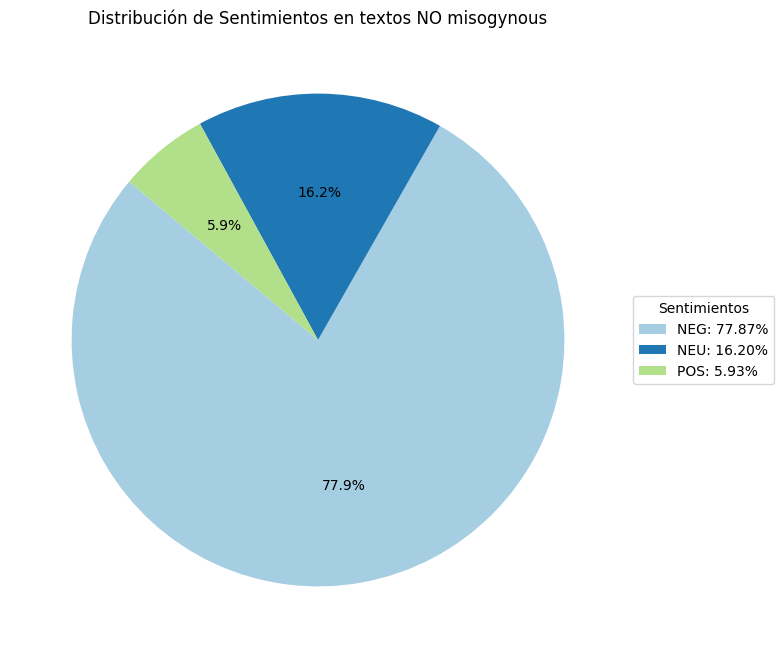

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages_not_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos NO misogynous")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages_not_misogynous.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [26]:
print("\nEjemplos de cada tipo de sentimiento en textos NO misogynous:")
for sent_type, example in examples_per_sentiment_not_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO misogynous:
NEG: ['@jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 trozos de pizza ?', 'Yo a mi jefe: yo vuelvo al restaurante pero no a fregar platos. Disney: toma, 7 meses pa fregar que se ve que no te hemos insistido suficiente con el contrato anterior que rechazaste.', '@ElKillBulls @omarFermoselle @MariaMonte_16 A fregar todos', '@Hammonyorkdista Estoy yendo a fregar para hacerle sitio al príncipe del infierno a las hordas del terror', 'Me puse a fregar y ahora siento que el brazo derecho se me va a caer del dolor. Xq eres asi Ariana xq no fuiste al médico cuando debías', '@alfredodelmazo Y EL PASAJE POR QUE LO SUBISTE INGELIZ, RATA CORRUPTA PRIMERO TU BOLSA Y A FREGAR A LOS NECESITADOS', '@CarymeSierraG Te voy a fregar', 'Ese es mi mood cuando estoy en paz en mi cuarto, llega mami y me comienza a vocear que baje a fregar, hacer oficio y que nadie la ayuda que todos somos malagradec

-----------------------------------------------

### Comparación entre todos los tweets, tweets misogynous y no misogynous

-----------------------------------------------


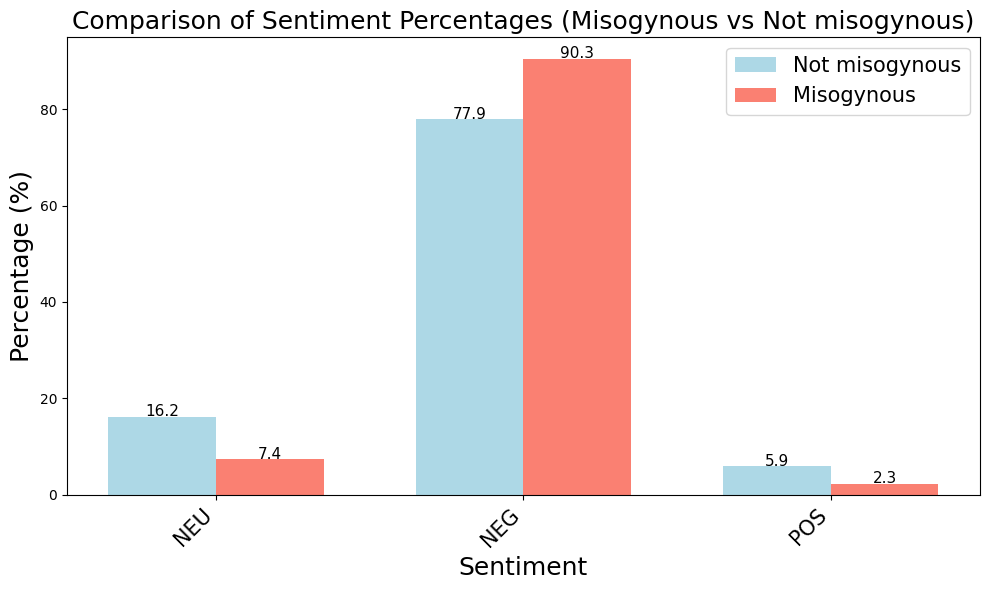

In [28]:
all_sentiments = list(set(overall_sentiment_percentages_not_misogynous.keys()).union(set(overall_sentiment_percentages_misogynous.keys())))

not_misogynous_percentages = [overall_sentiment_percentages_not_misogynous.get(sent, 0) for sent in all_sentiments]
misogynous_percentages = [overall_sentiment_percentages_misogynous.get(sent, 0) for sent in all_sentiments]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_sentiments))
bar1 = ax.bar(index - bar_width/2, not_misogynous_percentages, bar_width, label='Not misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogynous_percentages, bar_width, label='Misogynous', color='salmon')
for i, v in enumerate(not_misogynous_percentages):
  ax.text(index[i] - bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11,  color='black')
for i, v in enumerate(misogynous_percentages):
  ax.text(index[i] + bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11, color='black')

ax.set_xlabel('Sentiment', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_title('Comparison of Sentiment Percentages (Misogynous vs Not misogynous)', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(all_sentiments, rotation=45, ha='right', fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()